In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.transforms import ScaledTranslation
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    #skip data note in data files
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    #clean the data columns with spacing between lines
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    #converting the date in the data column to standard date-time
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict')
DAY22

Time_Start           Time_Stop  Latitude_THORNHILL   
0     2022-06-02 11:19:14 2022-06-02 11:19:15           32.363607  \
1     2022-06-02 11:19:15 2022-06-02 11:19:16           32.363719   
2     2022-06-02 11:19:16 2022-06-02 11:19:17           32.363850   
3     2022-06-02 11:19:17 2022-06-02 11:19:18           32.363985   
4     2022-06-02 11:19:18 2022-06-02 11:19:19           32.364120   
...                   ...                 ...                 ...   
10798 2022-06-02 14:19:12 2022-06-02 14:19:13           32.361526   
10799 2022-06-02 14:19:13 2022-06-02 14:19:14           32.361626   
10800 2022-06-02 14:19:14 2022-06-02 14:19:15           32.361728   
10801 2022-06-02 14:19:15 2022-06-02 14:19:16           32.361828   
10802 2022-06-02 14:19:16 2022-06-02 14:19:17           32.361877   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
0               -64.676112                 -27.670         570.235  \
1               -64.676758                 -27.460         572.020   
2               -64.677509                 -27.115         585.970   
3               -64.678276                 -26.515         573.050   
4               -64.679059                 -25.485         536.430   
...                    ...                     ...             ...   
10798           -64.664178                 -20.060         486.880   
10799           -64.664754                 -22.350         482.760   
10800           -64.665325                 -24.230         483.890   
10801           -64.665892                 -25.695         454.140   
10802           -64.666175                 -26.330         442.980   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
0              423.680                 221.620                        245.520  \
1              414.995                 222.280                        227.515   
2              425.525                 219.355                        249.490   
3              443.275                 217.430                        242.205   
4              425.105                 219.110                        243.865   
...                ...                     ...                            ...   
10798          379.490                 231.065                        222.910   
10799          371.345                 225.090                        215.680   
10800          362.570                 222.870                        220.380   
10801          356.120                 220.195                        217.250   
10802          351.280                 217.510                        203.345   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
0                             31.435                          1.335  \
1                             33.850                          1.590   
2                             35.670                          1.600   
3                             30.075                          1.130   
4                             31.615                          1.265   
...                              ...                            ...   
10798                         27.430                          1.055   
10799                         27.485                          1.065   
10800                         28.135                          1.165   
10801                         27.295                          1.170   
10802                         25.045                          1.005   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
0                            0.52                      10.345  \
1                            0.52                      10.345   
2                            0.00                       0.000   
3                            0.00                       0.000   
4                            0.00                       0.000   
...                           ...                         ...   
10798                        1.55                       9.235   

In [4]:
list(DAY22)

['Time_Start',
 'Time_Stop',
 'Latitude_THORNHILL',
 'Longitude_THORNHILL',
 'GPS_Altitude_THORNHILL',
 'CNgt3nm_ZIEMBA',
 'CNgt10nm_ZIEMBA',
 'CNgt10nm_nonvol_ZIEMBA',
 'IntegN_100to1000nm_LAS_ZIEMBA',
 'IntegS_100to1000nm_LAS_ZIEMBA',
 'IntegV_100to1000nm_LAS_ZIEMBA',
 'IntegN_gt1000nm_LAS_ZIEMBA',
 'IntegS_gt1000nm_LAS_ZIEMBA',
 'IntegV_gt1000nm_LAS_ZIEMBA',
 'nSMPS_ZIEMBA',
 'sSMPS_ZIEMBA',
 'vSMPS_ZIEMBA']

In [5]:
#creating a new column for 3/10 ratio
DAY22['3/10'] = DAY22['CNgt3nm_ZIEMBA']/DAY22['CNgt10nm_ZIEMBA']
DAY22

Time_Start           Time_Stop  Latitude_THORNHILL   
0     2022-06-02 11:19:14 2022-06-02 11:19:15           32.363607  \
1     2022-06-02 11:19:15 2022-06-02 11:19:16           32.363719   
2     2022-06-02 11:19:16 2022-06-02 11:19:17           32.363850   
3     2022-06-02 11:19:17 2022-06-02 11:19:18           32.363985   
4     2022-06-02 11:19:18 2022-06-02 11:19:19           32.364120   
...                   ...                 ...                 ...   
10798 2022-06-02 14:19:12 2022-06-02 14:19:13           32.361526   
10799 2022-06-02 14:19:13 2022-06-02 14:19:14           32.361626   
10800 2022-06-02 14:19:14 2022-06-02 14:19:15           32.361728   
10801 2022-06-02 14:19:15 2022-06-02 14:19:16           32.361828   
10802 2022-06-02 14:19:16 2022-06-02 14:19:17           32.361877   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
0               -64.676112                 -27.670         570.235  \
1               -64.676758                 -27.460         572.020   
2               -64.677509                 -27.115         585.970   
3               -64.678276                 -26.515         573.050   
4               -64.679059                 -25.485         536.430   
...                    ...                     ...             ...   
10798           -64.664178                 -20.060         486.880   
10799           -64.664754                 -22.350         482.760   
10800           -64.665325                 -24.230         483.890   
10801           -64.665892                 -25.695         454.140   
10802           -64.666175                 -26.330         442.980   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
0              423.680                 221.620                        245.520  \
1              414.995                 222.280                        227.515   
2              425.525                 219.355                        249.490   
3              443.275                 217.430                        242.205   
4              425.105                 219.110                        243.865   
...                ...                     ...                            ...   
10798          379.490                 231.065                        222.910   
10799          371.345                 225.090                        215.680   
10800          362.570                 222.870                        220.380   
10801          356.120                 220.195                        217.250   
10802          351.280                 217.510                        203.345   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
0                             31.435                          1.335  \
1                             33.850                          1.590   
2                             35.670                          1.600   
3                             30.075                          1.130   
4                             31.615                          1.265   
...                              ...                            ...   
10798                         27.430                          1.055   
10799                         27.485                          1.065   
10800                         28.135                          1.165   
10801                         27.295                          1.170   
10802                         25.045                          1.005   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
0                            0.52                      10.345  \
1                            0.52                      10.345   
2                            0.00                       0.000   
3                            0.00                       0.000   
4                            0.00                       0.000   
...                           ...                         ...   
10798                        1.55                       9.235   

In [6]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict')
DAY22['3/10'] = DAY22['CNgt3nm_ZIEMBA']/DAY22['CNgt10nm_ZIEMBA']
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))


DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY22_subset


Time_Start           Time_Stop  Latitude_THORNHILL   
5981 2022-06-02 12:58:55 2022-06-02 12:58:56           32.901061  \
5982 2022-06-02 12:58:56 2022-06-02 12:58:57           32.901505   
5983 2022-06-02 12:58:57 2022-06-02 12:58:58           32.901950   
5984 2022-06-02 12:58:58 2022-06-02 12:58:59           32.902395   
5985 2022-06-02 12:58:59 2022-06-02 12:59:00           32.902841   
...                  ...                 ...                 ...   
6641 2022-06-02 13:09:55 2022-06-02 13:09:56           32.856578   
6642 2022-06-02 13:09:56 2022-06-02 13:09:57           32.856534   
6643 2022-06-02 13:09:57 2022-06-02 13:09:58           32.856492   
6644 2022-06-02 13:09:58 2022-06-02 13:09:59           32.856451   
6645 2022-06-02 13:09:59 2022-06-02 13:10:00           32.856409   

      Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
5981           -69.417865                 115.705         447.000  \
5982           -69.416658                 115.605         445.980   
5983           -69.415451                 114.775         449.970   
5984           -69.414241                 113.025         474.700   
5985           -69.413027                 110.485         478.800   
...                   ...                     ...             ...   
6641           -69.176604                3810.860        1007.500   
6642           -69.174895                3811.410        1016.620   
6643           -69.173186                3812.340         991.600   
6644           -69.171477                3813.680         976.190   
6645           -69.169767                3815.470         951.645   

      CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
5981          360.580                 228.035                        212.800  \
5982          355.330                 227.495                        195.340   
5983          353.085                 225.835                        196.425   
5984          352.330                 222.555                        200.795   
5985          346.340                 224.465                        191.300   
...               ...                     ...                            ...   
6641          666.535                 386.210                        133.090   
6642          669.565                 379.345                        142.025   
6643          657.395                 369.450                        137.090   
6644          651.425                 372.565                        131.055   
6645          663.055                 378.015                        125.480   

      IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
5981                         29.200                          1.440  \
5982                         26.135                          1.225   
5983                         25.900                          1.010   
5984                         28.665                          1.305   
5985                         27.425                          1.355   
...                             ...                            ...   
6641                          9.655                          0.305   
6642                         10.280                          0.310   
6643                         11.325                          0.445   
6644                         10.665                          0.450   
6645                          8.760                          0.275   

      IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
5981                        0.00                       0.000  \
5982                        0.52                       4.085   
5983                        0.52                       4.085   
5984                        0.00                       0.000   
5985                        0.00                       0.000   
...                          ...                         ...   
6641                        0.00                       0.000   
6642                        0.00                      

In [7]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY22_subset.GPS_Altitude_THORNHILL.min(), DAY22_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY22_subset['Bins'] = pd.cut(DAY22_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY22_subset_1000 = DAY22_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000a_subset_1000a = DAY22_subset_1000[start_index:stop_index]
DAY1000a_subset_1000a


Time_Start               Time_Stop   
Bins                                                                 
(105.985, 143.17]  2022-06-02 12:59:00.500 2022-06-02 12:59:01.500  \
(143.17, 180.354]  2022-06-02 12:59:09.500 2022-06-02 12:59:10.500   
(180.354, 217.539] 2022-06-02 12:59:14.500 2022-06-02 12:59:15.500   
(217.539, 254.723] 2022-06-02 12:59:20.500 2022-06-02 12:59:21.500   
(254.723, 291.908] 2022-06-02 12:59:26.000 2022-06-02 12:59:27.000   
(291.908, 329.092] 2022-06-02 12:59:32.000 2022-06-02 12:59:33.000   
(329.092, 366.277] 2022-06-02 12:59:37.000 2022-06-02 12:59:38.000   
(366.277, 403.461] 2022-06-02 12:59:40.500 2022-06-02 12:59:41.500   
(403.461, 440.646] 2022-06-02 12:59:45.500 2022-06-02 12:59:46.500   
(440.646, 477.83]  2022-06-02 12:59:51.000 2022-06-02 12:59:52.000   
(477.83, 515.015]  2022-06-02 12:59:55.500 2022-06-02 12:59:56.500   
(515.015, 552.2]   2022-06-02 13:00:00.000 2022-06-02 13:00:01.000   
(552.2, 589.384]   2022-06-02 13:00:04.500 2022-06-02 13:00:05.500   
(589.384, 626.569] 2022-06-02 13:00:09.000 2022-06-02 13:00:10.000   
(626.569, 663.753] 2022-06-02 13:00:14.000 2022-06-02 13:00:15.000   
(663.753, 700.938] 2022-06-02 13:00:19.000 2022-06-02 13:00:20.000   
(700.938, 738.122] 2022-06-02 13:00:23.000 2022-06-02 13:00:24.000   
(738.122, 775.307] 2022-06-02 13:00:26.500 2022-06-02 13:00:27.500   
(775.307, 812.491] 2022-06-02 13:00:31.500 2022-06-02 13:00:32.500   
(812.491, 849.676] 2022-06-02 13:00:36.500 2022-06-02 13:00:37.500   
(849.676, 886.861] 2022-06-02 13:00:40.500 2022-06-02 13:00:41.500   
(886.861, 924.045] 2022-06-02 13:00:44.500 2022-06-02 13:00:45.500   
(924.045, 961.23]  2022-06-02 13:00:49.500 2022-06-02 13:00:50.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(105.985, 143.17]            32.903514           -69.411194  \
(143.17, 180.354]            32.907635           -69.400132   
(180.354, 217.539]           32.910235           -69.394203   
(217.539, 254.723]           32.914346           -69.387850   
(254.723, 291.908]           32.919085           -69.383209   
(291.908, 329.092]           32.925125           -69.379793   
(329.092, 366.277]           32.930599           -69.378595   
(366.277, 403.461]           32.934451           -69.378665   
(403.461, 440.646]           32.939847           -69.379819   
(440.646, 477.83]            32.945418           -69.382565   
(477.83, 515.015]            32.949410           -69.385954   
(515.015, 552.2]             32.952780           -69.390190   
(552.2, 589.384]             32.955383           -69.395118   
(589.384, 626.569]           32.957161           -69.400518   
(626.569, 663.753]           32.958185           -69.406852   
(663.753, 700.938]           32.958112           -69.413337   
(700.938, 738.122]           32.957171           -69.418410   
(738.122, 775.307]           32.955767           -69.422637   
(775.307, 812.491]           32.952946           -69.428230   
(812.491, 849.676]           32.949224           -69.433108   
(849.676, 886.861]           32.945670           -69.436304   
(886.861, 924.045]           32.941719           -69.438795   
(924.045, 961.23]            32.936339           -69.440821   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(105.985, 143.17]                 113.9000        453.4050         352.7450  \
(143.17, 180.354]                 160.4275        441.5275         354.0525   
(180.354, 217.539]                199.8250        452.3500         351.3375   
(217.539, 254.723]                234.4575        451.1250         348.6575   
(254.723, 291.908]                276.6850        449.0700         349.7800   
(291.908, 329.092]                304.7050        439.0550         347.9900   
(329.092, 366.277]                345.2250        431.3050         350.65

In [8]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY22_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000a_subset_3000a = DAY22_subset_1000[start_index:stop_index]
DAY3000a_subset_3000a

Time_Start               Time_Stop   
Bins                                                                   
(998.414, 1035.599]  2022-06-02 13:00:58.500 2022-06-02 13:00:59.500  \
(1035.599, 1072.783] 2022-06-02 13:01:03.000 2022-06-02 13:01:04.000   
(1072.783, 1109.968] 2022-06-02 13:01:08.000 2022-06-02 13:01:09.000   
(1109.968, 1147.152] 2022-06-02 13:01:13.000 2022-06-02 13:01:14.000   
(1147.152, 1184.337] 2022-06-02 13:01:17.500 2022-06-02 13:01:18.500   
...                                      ...                     ...   
(3266.672, 3303.856] 2022-06-02 13:06:03.500 2022-06-02 13:06:04.500   
(3303.856, 3341.041] 2022-06-02 13:06:09.000 2022-06-02 13:06:10.000   
(3341.041, 3378.225] 2022-06-02 13:06:13.500 2022-06-02 13:06:14.500   
(3378.225, 3415.41]  2022-06-02 13:06:18.000 2022-06-02 13:06:19.000   
(3415.41, 3452.594]  2022-06-02 13:06:24.000 2022-06-02 13:06:25.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(998.414, 1035.599]            32.926077           -69.440875  \
(1035.599, 1072.783]           32.921032           -69.439333   
(1072.783, 1109.968]           32.915694           -69.436460   
(1109.968, 1147.152]           32.910879           -69.432361   
(1147.152, 1184.337]           32.907172           -69.427752   
...                                  ...                  ...   
(3266.672, 3303.856]           32.971773           -69.393744   
(3303.856, 3341.041]           32.970076           -69.401513   
(3341.041, 3378.225]           32.967769           -69.407456   
(3378.225, 3415.41]            32.964751           -69.412901   
(3415.41, 3452.594]            32.959690           -69.419173   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(998.414, 1035.599]                 1020.465        449.5750         338.7325  \
(1035.599, 1072.783]                1057.400        427.7850         320.3900   
(1072.783, 1109.968]                1089.620        423.1450         319.0750   
(1109.968, 1147.152]                1128.500        457.9850         321.5400   
(1147.152, 1184.337]                1167.055        455.3550         334.1975   
...                                      ...             ...              ...   
(3266.672, 3303.856]                3284.205        809.1025         573.7375   
(3303.856, 3341.041]                3322.510        821.9700         555.1850   
(3341.041, 3378.225]                3359.940        861.5625         606.5075   
(3378.225, 3415.41]                 3397.350        904.9600         630.1750   
(3415.41, 3452.594]                 3436.490        970.8400         667.4000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(998.414, 1035.599]                 188.8525                       168.9225  \
(1035.599, 1072.783]                171.6800                       150.1000   
(1072.783, 1109.968]                169.2100                       137.3850   
(1109.968, 1147.152]                172.3400                       129.9900   
(1147.152, 1184.337]                172.2000                       116.1550   
...                                      ...                            ...   
(3266.672, 3303.856]                292.9375                       100.8450   
(3303.856, 3341.041]                401.5100                       137.3650   
(3341.041, 3378.225]                438.7450                       174.8950   
(3378.225, 3415.41]                 454.9150                       186.8900   
(3415.41, 3452.594]                 438.7050                       161.0400   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(998.414, 1035.599]                          21.035  \
(103

In [9]:
nbins = 15
bins = np.linspace(DAY22_subset.GPS_Altitude_THORNHILL.min(), DAY22_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY22_subset['Bins'] = pd.cut(DAY22_subset['GPS_Altitude_THORNHILL'], bins)
DAY22_subset_median = DAY22_subset.groupby('Bins').median()
DAY22_subset_median
DAY22_subset_25 = DAY22_subset_median - DAY22_subset.groupby('Bins').quantile(.25)
DAY22_subset_25
DAY22_subset_75 = DAY22_subset.groupby('Bins').quantile(.75) - DAY22_subset_median
DAY22_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(105.985, 353.882]   0 days 00:00:10.250000128 0 days 00:00:10.250000128  \
(353.882, 601.779]      0 days 00:00:07.500000    0 days 00:00:07.500000   
(601.779, 849.676]   0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(849.676, 1097.573]     0 days 00:00:07.500000    0 days 00:00:07.500000   
(1097.573, 1345.47]            0 days 00:00:07           0 days 00:00:07   
(1345.47, 1593.367]            0 days 00:00:08           0 days 00:00:08   
(1593.367, 1841.264]           0 days 00:00:07           0 days 00:00:07   
(1841.264, 2089.161] 0 days 00:00:07.749999872 0 days 00:00:07.749999872   
(2089.161, 2337.058]    0 days 00:00:08.500000    0 days 00:00:08.500000   
(2337.058, 2584.955] 0 days 00:00:08.749999872 0 days 00:00:08.749999872   
(2584.955, 2832.852] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(2832.852, 3080.749]    0 days 00:00:09.500000    0 days 00:00:09.500000   
(3080.749, 3328.646]           0 days 00:00:09           0 days 00:00:09   
(3328.646, 3576.543]    0 days 00:00:09.500000    0 days 00:00:09.500000   
(3576.543, 3824.44]     0 days 00:00:47.500000    0 days 00:00:47.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.985, 353.882]              0.008324             0.009282  \
(353.882, 601.779]              0.005838             0.004135   
(601.779, 849.676]              0.000944             0.009258   
(849.676, 1097.573]             0.008391             0.001904   
(1097.573, 1345.47]             0.004462             0.009465   
(1345.47, 1593.367]             0.007195             0.007795   
(1593.367, 1841.264]            0.007559             0.001138   
(1841.264, 2089.161]            0.001011             0.010089   
(2089.161, 2337.058]            0.008221             0.006972   
(2337.058, 2584.955]            0.008262             0.010617   
(2584.955, 2832.852]            0.004084             0.009373   
(2832.852, 3080.749]            0.011775             0.001654   
(3080.749, 3328.646]            0.001587             0.011555   
(3328.646, 3576.543]            0.008919             0.008792   
(3576.543, 3824.44]             0.024453             0.077618   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(105.985, 353.882]                  70.39250         9.42125          1.46125  \
(353.882, 601.779]                  56.08000        13.32500          7.59750   
(601.779, 849.676]                  62.43875        16.79875          3.05625   
(849.676, 1097.573]                 68.86000         9.24500          4.96250   
(1097.573, 1345.47]                 72.31000        19.30000          3.54000   
(1345.47, 1593.367]                 55.97000        15.90500          3.77500   
(1593.367, 1841.264]                60.77000         8.48000          3.53500   
(1841.264, 2089.161]                52.72000        38.27875         27.38750   
(2089.161, 2337.058]                56.68500       318.82500        243.22750   
(2337.058, 2584.955]                62.71000        43.27000         10.18250   
(2584.955, 2832.852]                75.99250        36.08125         22.07625   
(2832.852, 3080.749]                50.71500        81.64750         57.32250   
(3080.749, 3328.646]                56.42000        69.83500         41.80500   
(3328.646, 3576.543]                46.85500        52.17000         30.97250   
(3576.543, 3824.44]                 12.94500        78.94000         46.04250   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(105.985, 353.882]                   1.86500                       12.21125  \
(353.882, 601.779]    

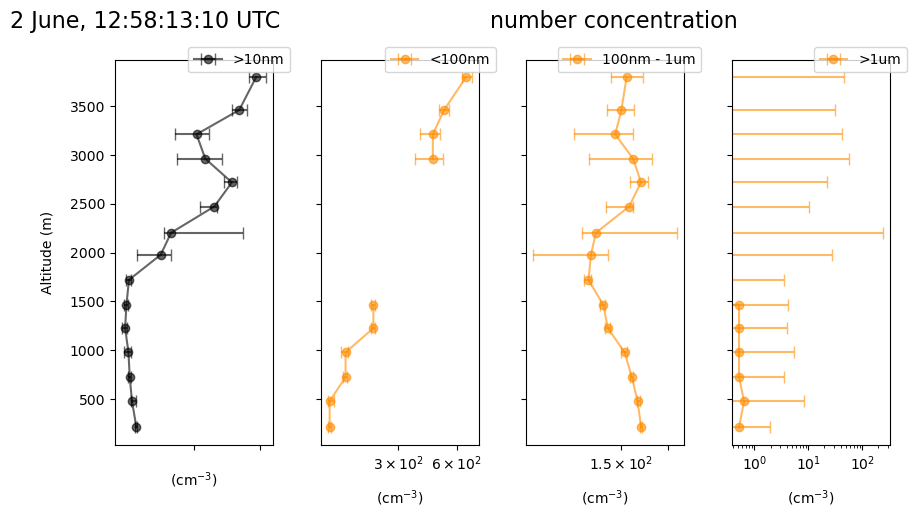

In [10]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(10, 5))
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY22_subset_median['CNgt10nm_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="black", label = '>10nm')
ax[1].errorbar(DAY22_subset_median['nSMPS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY22_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY22_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '2 June, 12:58:13:10 UTC', ha='left', va='top', fontsize=16)
# Set the title
fig.suptitle('number concentration', ha = 'left', fontsize=16)

plt.show()


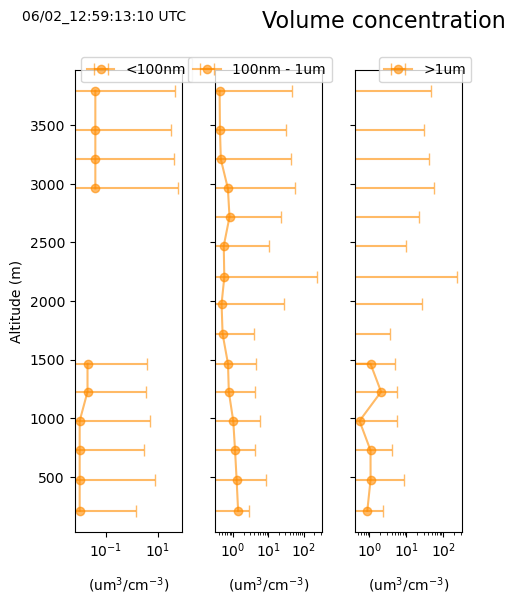

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY22_subset_median['vSMPS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY22_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY22_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY22_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY22_subset_25['CNgt10nm_ZIEMBA'], DAY22_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/02_12:59:13:10 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha='left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [12]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L1_20230625T113221.ict')
DAY2['3/10'] = DAY22['CNgt3nm_ZIEMBA']/DAY2['CNgt10nm_ZIEMBA']

start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))

DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY2_subset


Time_Start           Time_Stop  Latitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01           32.397719  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02           32.397400   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03           32.397079   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04           32.396758   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05           32.396435   
...                   ...                 ...                 ...   
10301 2022-06-02 14:10:55 2022-06-02 14:10:56           32.264343   
10302 2022-06-02 14:10:56 2022-06-02 14:10:57           32.263327   
10303 2022-06-02 14:10:57 2022-06-02 14:10:58           32.262289   
10304 2022-06-02 14:10:58 2022-06-02 14:10:59           32.261232   
10305 2022-06-02 14:10:59 2022-06-02 14:11:00           32.260159   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
8926            -65.920473                 1896.68         476.375  \
8927            -65.918900                 1897.28         450.215   
8928            -65.917327                 1898.01         457.285   
8929            -65.915754                 1898.83         460.935   
8930            -65.914182                 1899.75         456.205   
...                    ...                     ...             ...   
10301           -65.038703                 3176.07         852.260   
10302           -65.039317                 3180.14         854.940   
10303           -65.039886                 3184.23         886.390   
10304           -65.040413                 3188.41         854.975   
10305           -65.040895                 3192.83         822.065   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
8926           351.620                 161.290                        109.395  \
8927           344.275                 159.470                         98.900   
8928           346.865                 155.815                         90.705   
8929           348.770                 160.780                         94.045   
8930           348.780                 159.545                         85.935   
...                ...                     ...                            ...   
10301          586.900                 168.840                         54.880   
10302          589.310                 165.950                         52.285   
10303          601.265                 172.635                         65.045   
10304          606.655                 176.390                         58.865   
10305          619.475                 178.680                         61.210   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
8926                          11.555                          0.410  \
8927                          11.855                          0.515   
8928                          10.505                          0.460   
8929                          10.440                          0.445   
8930                          11.370                          0.585   
...                              ...                            ...   
10301                          4.980                          0.175   
10302                          5.195                          0.205   
10303                          7.075                          0.295   
10304                          6.570                          0.295   
10305                          7.110                          0.405   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
8926                         0.00                        0.00  \
8927                         0.00                        0.00   
8928                         0.65                        2.04   
8929                         1.30                        4.08   
8930                         1.17                        8.54   
...                           ...                         ...   
10301                        0.00                        0.00   

In [13]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2_subset.GPS_Altitude_THORNHILL.min(), DAY2_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2_subset['Bins'] = pd.cut(DAY2_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2_subset_1000 = DAY2_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000 = DAY2_subset_1000[start_index:stop_index]
DAY1000_subset_1000


Time_Start               Time_Stop   
Bins                                                                 
(106.28, 137.146]  2022-06-02 13:58:08.000 2022-06-02 13:58:09.000  \
(137.146, 168.011] 2022-06-02 13:58:50.000 2022-06-02 13:58:51.000   
(168.011, 198.876] 2022-06-02 13:59:04.000 2022-06-02 13:59:05.000   
(198.876, 229.742] 2022-06-02 13:57:05.500 2022-06-02 13:57:06.500   
(229.742, 260.607] 2022-06-02 13:56:58.500 2022-06-02 13:56:59.500   
(260.607, 291.473] 2022-06-02 13:59:25.500 2022-06-02 13:59:26.500   
(291.473, 322.338] 2022-06-02 13:56:44.500 2022-06-02 13:56:45.500   
(322.338, 353.204] 2022-06-02 13:56:34.500 2022-06-02 13:56:35.500   
(353.204, 384.069] 2022-06-02 13:59:47.000 2022-06-02 13:59:48.000   
(384.069, 414.935] 2022-06-02 13:59:51.000 2022-06-02 13:59:52.000   
(414.935, 445.8]   2022-06-02 13:54:28.000 2022-06-02 13:54:29.000   
(445.8, 476.666]   2022-06-02 13:55:41.000 2022-06-02 13:55:42.000   
(476.666, 507.531] 2022-06-02 14:00:07.500 2022-06-02 14:00:08.500   
(507.531, 538.397] 2022-06-02 14:00:20.000 2022-06-02 14:00:21.000   
(538.397, 569.262] 2022-06-02 14:00:38.500 2022-06-02 14:00:39.500   
(569.262, 600.128] 2022-06-02 13:52:51.000 2022-06-02 13:52:52.000   
(600.128, 630.993] 2022-06-02 14:00:54.000 2022-06-02 14:00:55.000   
(630.993, 661.859] 2022-06-02 14:01:01.000 2022-06-02 14:01:02.000   
(661.859, 692.724] 2022-06-02 14:01:10.500 2022-06-02 14:01:11.500   
(692.724, 723.59]  2022-06-02 14:01:20.000 2022-06-02 14:01:21.000   
(723.59, 754.455]  2022-06-02 14:01:30.000 2022-06-02 14:01:31.000   
(754.455, 785.321] 2022-06-02 14:01:39.000 2022-06-02 14:01:40.000   
(785.321, 816.186] 2022-06-02 14:01:47.000 2022-06-02 14:01:48.000   
(816.186, 847.052] 2022-06-02 14:01:52.500 2022-06-02 14:01:53.500   
(847.052, 877.917] 2022-06-02 14:01:58.000 2022-06-02 14:01:59.000   
(877.917, 908.783] 2022-06-02 14:02:02.000 2022-06-02 14:02:03.000   
(908.783, 939.648] 2022-06-02 13:57:08.500 2022-06-02 13:57:09.500   
(939.648, 970.514] 2022-06-02 14:02:09.500 2022-06-02 14:02:10.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(106.28, 137.146]            32.208306           -65.047757  \
(137.146, 168.011]           32.204224           -64.996812   
(168.011, 198.876]           32.212466           -64.981598   
(198.876, 229.742]           32.234272           -65.119394   
(229.742, 260.607]           32.237123           -65.127642   
(260.607, 291.473]           32.233410           -64.973290   
(291.473, 322.338]           32.242777           -65.144480   
(322.338, 353.204]           32.246491           -65.156887   
(353.204, 384.069]           32.249040           -64.980342   
(384.069, 414.935]           32.250794           -64.982372   
(414.935, 445.8]             32.284362           -65.324863   
(445.8, 476.666]             32.264527           -65.224574   
(476.666, 507.531]           32.269132           -64.993207   
(507.531, 538.397]           32.276747           -65.008660   
(538.397, 569.262]           32.277137           -65.024284   
(569.262, 600.128]           32.309722           -65.463105   
(600.128, 630.993]           32.269307           -65.034341   
(630.993, 661.859]           32.263417           -65.037047   
(661.859, 692.724]           32.254422           -65.037830   
(692.724, 723.59]            32.245002           -65.036159   
(723.59, 754.455]            32.236055           -65.029756   
(754.455, 785.321]           32.229810           -65.020831   
(785.321, 816.186]           32.226264           -65.011139   
(816.186, 847.052]           32.225041           -65.003937   
(847.052, 877.917]           32.224689           -64.996571   
(877.917, 908.783]           32.225160           -64.991219   
(908.783, 939.648]           32.272964           -65.255076   
(939.648, 970.514]           32.227201           -64.981436   

                    GPS_Altitude_THORNHI

In [14]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000 = DAY2_subset_1000[start_index:stop_index]
DAY3000_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1001.379, 1032.245] 2022-06-02 14:02:21.500 2022-06-02 14:02:22.500  \
(1032.245, 1063.11]  2022-06-02 14:02:28.000 2022-06-02 14:02:29.000   
(1063.11, 1093.976]  2022-06-02 14:02:35.000 2022-06-02 14:02:36.000   
(1093.976, 1124.842] 2022-06-02 14:02:41.000 2022-06-02 14:02:42.000   
(1124.842, 1155.707] 2022-06-02 14:02:47.500 2022-06-02 14:02:48.500   
...                                      ...                     ...   
(3007.637, 3038.502] 2022-06-02 14:10:25.500 2022-06-02 14:10:26.500   
(3038.502, 3069.368] 2022-06-02 14:10:32.000 2022-06-02 14:10:33.000   
(3069.368, 3100.234] 2022-06-02 14:10:36.500 2022-06-02 14:10:37.500   
(3100.234, 3131.099] 2022-06-02 14:10:41.500 2022-06-02 14:10:42.500   
(3131.099, 3161.964] 2022-06-02 14:10:48.000 2022-06-02 14:10:49.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1001.379, 1032.245]           32.233572           -64.967034  \
(1032.245, 1063.11]            32.238559           -64.960542   
(1063.11, 1093.976]            32.244854           -64.954807   
(1093.976, 1124.842]           32.250788           -64.951200   
(1124.842, 1155.707]           32.257540           -64.948780   
...                                  ...                  ...   
(3007.637, 3038.502]           32.281787           -65.007364   
(3038.502, 3069.368]           32.280306           -65.015731   
(3069.368, 3100.234]           32.278437           -65.021220   
(3100.234, 3131.099]           32.275587           -65.026859   
(3131.099, 3161.964]           32.270786           -65.033293   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(1001.379, 1032.245]                1016.815        437.1575         340.6450  \
(1032.245, 1063.11]                 1051.000        445.7350         333.6650   
(1063.11, 1093.976]                 1077.130        429.2150         340.9550   
(1093.976, 1124.842]                1108.710        448.7050         348.2250   
(1124.842, 1155.707]                1139.915        480.3975         353.3200   
...                                      ...             ...              ...   
(3007.637, 3038.502]                3024.730        782.3650         539.7450   
(3038.502, 3069.368]                3053.620        821.5800         539.9050   
(3069.368, 3100.234]                3084.940        784.8475         549.4775   
(3100.234, 3131.099]                3115.715        740.4375         515.2125   
(3131.099, 3161.964]                3147.090        666.4950         473.7950   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(1001.379, 1032.245]                209.5150                       194.7675  \
(1032.245, 1063.11]                 202.1850                       174.3450   
(1063.11, 1093.976]                 205.8550                       171.8750   
(1093.976, 1124.842]                199.1400                       160.1100   
(1124.842, 1155.707]                207.4250                       157.4425   
...                                      ...                            ...   
(3007.637, 3038.502]                386.5975                       131.0250   
(3038.502, 3069.368]                386.6750                       139.4600   
(3069.368, 3100.234]                385.4900                       145.6425   
(3100.234, 3131.099]                259.2375                       118.7125   
(3131.099, 3161.964]                167.4800                        82.8900   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(1001.379, 1032.245]                        25.8925  \
(103

In [15]:
nbins = 15
bins = np.linspace(DAY2_subset.GPS_Altitude_THORNHILL.min(), DAY2_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2_subset['Bins'] = pd.cut(DAY2_subset['GPS_Altitude_THORNHILL'], bins)
DAY2_subset_median = DAY2_subset.groupby('Bins').median()
DAY2_subset_median


Time_Start               Time_Stop   
Bins                                                                 
(106.28, 312.05]   2022-06-02 13:58:09.500 2022-06-02 13:58:10.500  \
(312.05, 517.82]   2022-06-02 13:55:14.500 2022-06-02 13:55:15.500   
(517.82, 723.59]   2022-06-02 14:00:40.500 2022-06-02 14:00:41.500   
(723.59, 929.36]   2022-06-02 14:01:35.000 2022-06-02 14:01:36.000   
(929.36, 1135.13]  2022-06-02 14:02:18.000 2022-06-02 14:02:19.000   
(1135.13, 1340.9]  2022-06-02 14:03:04.000 2022-06-02 14:03:05.000   
(1340.9, 1546.67]  2022-06-02 14:03:50.000 2022-06-02 14:03:51.000   
(1546.67, 1752.44] 2022-06-02 14:04:38.000 2022-06-02 14:04:39.000   
(1752.44, 1958.21] 2022-06-02 13:49:53.500 2022-06-02 13:49:54.500   
(1958.21, 2163.98] 2022-06-02 14:06:41.500 2022-06-02 14:06:42.500   
(2163.98, 2369.75] 2022-06-02 14:07:28.000 2022-06-02 14:07:29.000   
(2369.75, 2575.52] 2022-06-02 14:08:20.000 2022-06-02 14:08:21.000   
(2575.52, 2781.29] 2022-06-02 14:09:13.000 2022-06-02 14:09:14.000   
(2781.29, 2987.06] 2022-06-02 14:09:57.500 2022-06-02 14:09:58.500   
(2987.06, 3192.83] 2022-06-02 14:10:39.000 2022-06-02 14:10:40.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(106.28, 312.05]             32.217524           -65.046017  \
(312.05, 517.82]             32.273443           -65.260880   
(517.82, 723.59]             32.276152           -65.036650   
(723.59, 929.36]             32.232325           -65.025113   
(929.36, 1135.13]            32.244854           -64.970988   
(1135.13, 1340.9]            32.284176           -64.964993   
(1340.9, 1546.67]            32.287176           -65.017685   
(1546.67, 1752.44]           32.253051           -65.029950   
(1752.44, 1958.21]           32.363196           -65.739137   
(1958.21, 2163.98]           32.275654           -64.979505   
(2163.98, 2369.75]           32.274279           -65.032643   
(2369.75, 2575.52]           32.227559           -65.026966   
(2575.52, 2781.29]           32.230851           -64.962378   
(2781.29, 2987.06]           32.274555           -64.972399   
(2987.06, 3192.83]           32.277118           -65.024112   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(106.28, 312.05]                  148.5100        426.5050         332.8500  \
(312.05, 517.82]                  443.0550        432.9650         336.6250   
(517.82, 723.59]                  603.7425        441.6050         334.8875   
(723.59, 929.36]                  800.6900        436.6900         335.2050   
(929.36, 1135.13]                1042.2500        444.5650         337.3150   
(1135.13, 1340.9]                1243.2400        437.0750         326.6900   
(1340.9, 1546.67]                1442.1400        457.2750         344.7150   
(1546.67, 1752.44]               1638.7300        511.1450         378.7100   
(1752.44, 1958.21]               1896.2750        524.9350         381.2150   
(1958.21, 2163.98]               2048.3650        625.1575         433.8500   
(2163.98, 2369.75]               2256.7600        735.4700         508.5700   
(2369.75, 2575.52]               2451.7200        683.4900         470.9550   
(2575.52, 2781.29]               2691.9800        623.4850         430.9350   
(2781.29, 2987.06]               2870.0700        689.3325         491.4975   
(2987.06, 3192.83]               3100.7200        775.5750         539.8850   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(106.28, 312.05]                  203.3025                       211.5000  \
(312.05, 517.82]                  210.6450                       216.8825   
(517.82, 723.59]                  207.9650                       214.3900   
(723.59, 929.36]                  199.17

In [16]:
DAY2_subset_25 = DAY2_subset_median - DAY2_subset.groupby('Bins').quantile(.25)
DAY2_subset_25

Time_Start                 Time_Stop   
Bins                                                                     
(106.28, 312.05]   0 days 00:00:44.749999872 0 days 00:00:44.749999872  \
(312.05, 517.82]   0 days 00:01:04.749999872 0 days 00:01:04.749999872   
(517.82, 723.59]   0 days 00:07:43.749999872 0 days 00:07:43.749999872   
(723.59, 929.36]             0 days 00:09:09           0 days 00:09:09   
(929.36, 1135.13]            0 days 00:10:13           0 days 00:10:13   
(1135.13, 1340.9]     0 days 00:11:15.500000    0 days 00:11:15.500000   
(1340.9, 1546.67]            0 days 00:12:22           0 days 00:12:22   
(1546.67, 1752.44]    0 days 00:13:30.500000    0 days 00:13:30.500000   
(1752.44, 1958.21] 0 days 00:00:56.749999872 0 days 00:00:56.749999872   
(1958.21, 2163.98] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(2163.98, 2369.75]           0 days 00:00:11           0 days 00:00:11   
(2369.75, 2575.52]    0 days 00:00:14.500000    0 days 00:00:14.500000   
(2575.52, 2781.29]    0 days 00:00:11.500000    0 days 00:00:11.500000   
(2781.29, 2987.06] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2987.06, 3192.83]           0 days 00:00:10           0 days 00:00:10   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(106.28, 312.05]              0.013043             0.050999  \
(312.05, 517.82]              0.013412             0.089117   
(517.82, 723.59]              0.014777             0.417930   
(723.59, 929.36]              0.006846             0.475866   
(929.36, 1135.13]             0.012304             0.562550   
(1135.13, 1340.9]             0.011565             0.594260   
(1340.9, 1546.67]             0.006081             0.573620   
(1546.67, 1752.44]            0.020048             0.592908   
(1752.44, 1958.21]            0.109123             0.091390   
(1958.21, 2163.98]            0.007526             0.013344   
(2163.98, 2369.75]            0.008682             0.008544   
(2369.75, 2575.52]            0.006781             0.013800   
(2575.52, 2781.29]            0.008279             0.011368   
(2781.29, 2987.06]            0.007956             0.011964   
(2987.06, 3192.83]            0.007176             0.010063   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(106.28, 312.05]                   24.6925         8.97125          2.16875  \
(312.05, 517.82]                    8.7525        15.59250          4.55250   
(517.82, 723.59]                   59.6325        13.13500          3.39250   
(723.59, 929.36]                   45.2500        12.36000          3.05000   
(929.36, 1135.13]                  55.1400        22.15500          8.15500   
(1135.13, 1340.9]                  47.3400        10.17000          2.95250   
(1340.9, 1546.67]                  54.9800        14.91000         15.94000   
(1546.67, 1752.44]                 38.1500        27.96000         20.20750   
(1752.44, 1958.21]                  9.6575        27.27875         14.24000   
(1958.21, 2163.98]                 51.2700        26.05750         29.86750   
(2163.98, 2369.75]                 58.7800       125.12500        139.21500   
(2369.75, 2575.52]                 43.9150        56.45500         24.91000   
(2575.52, 2781.29]                 49.5000        15.54750          9.92750   
(2781.29, 2987.06]                 58.9475        51.58375         48.05375   
(2987.06, 3192.83]                 62.3600        51.98000         20.10000   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(106.28, 312.05]                   2.11000                       14.34750  \
(312.05, 517.82]                   4.49500                        9.31000   
(517.82, 723.59]                   5.42625         

In [17]:
DAY2_subset_75 = DAY2_subset.groupby('Bins').quantile(.75) - DAY2_subset_median
DAY2_subset_75

Time_Start                 Time_Stop   
Bins                                                                     
(106.28, 312.05]   0 days 00:00:45.749999872 0 days 00:00:45.749999872  \
(312.05, 517.82]   0 days 00:01:04.749999872 0 days 00:01:04.749999872   
(517.82, 723.59]   0 days 00:00:22.749999872 0 days 00:00:22.749999872   
(723.59, 929.36]             0 days 00:00:16           0 days 00:00:16   
(929.36, 1135.13]            0 days 00:00:15           0 days 00:00:15   
(1135.13, 1340.9]     0 days 00:00:16.500000    0 days 00:00:16.500000   
(1340.9, 1546.67]            0 days 00:00:16           0 days 00:00:16   
(1546.67, 1752.44]    0 days 00:00:19.500000    0 days 00:00:19.500000   
(1752.44, 1958.21] 0 days 00:15:26.749999872 0 days 00:15:26.749999872   
(1958.21, 2163.98] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(2163.98, 2369.75]           0 days 00:00:11           0 days 00:00:11   
(2369.75, 2575.52]    0 days 00:00:14.500000    0 days 00:00:14.500000   
(2575.52, 2781.29]    0 days 00:00:11.500000    0 days 00:00:11.500000   
(2781.29, 2987.06] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2987.06, 3192.83]           0 days 00:00:10           0 days 00:00:10   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(106.28, 312.05]              0.013290             0.055552  \
(312.05, 517.82]              0.015259             0.084947   
(517.82, 723.59]              0.031932             0.008415   
(723.59, 929.36]              0.083928             0.019185   
(929.36, 1135.13]             0.076811             0.014692   
(1135.13, 1340.9]             0.041854             0.013552   
(1340.9, 1546.67]             0.043554             0.016068   
(1546.67, 1752.44]            0.083566             0.004665   
(1752.44, 1958.21]            0.016408             0.737598   
(1958.21, 2163.98]            0.004306             0.011428   
(2163.98, 2369.75]            0.005788             0.011447   
(2369.75, 2575.52]            0.011222             0.017907   
(2575.52, 2781.29]            0.011578             0.005893   
(2781.29, 2987.06]            0.005157             0.009678   
(2987.06, 3192.83]            0.004052             0.012201   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(106.28, 312.05]                  77.73875        10.62750          2.66250  \
(312.05, 517.82]                   9.56375        11.15750          7.22875   
(517.82, 723.59]                  63.76125        21.03625          9.73125   
(723.59, 929.36]                  50.80000        10.76000          1.94000   
(929.36, 1135.13]                 43.58000        15.67000          8.22500   
(1135.13, 1340.9]                 42.92500        11.18750          4.16000   
(1340.9, 1546.67]                 63.35000        25.70000         18.77000   
(1546.67, 1752.44]                51.71000        10.80250          5.14250   
(1752.44, 1958.21]                11.01250        17.40375          8.04750   
(1958.21, 2163.98]                59.29750        44.60750         18.73500   
(2163.98, 2369.75]                62.03000        58.02000         43.04000   
(2369.75, 2575.52]                54.35500        29.37750         26.41000   
(2575.52, 2781.29]                43.10000        11.76750         14.91250   
(2781.29, 2987.06]                62.88000        60.36875         45.79375   
(2987.06, 3192.83]                50.33000        39.55000          9.03000   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(106.28, 312.05]                   2.59875                       12.09500  \
(312.05, 517.82]                   5.74750                       12.09750   
(517.82, 723.59]                   4.57375         

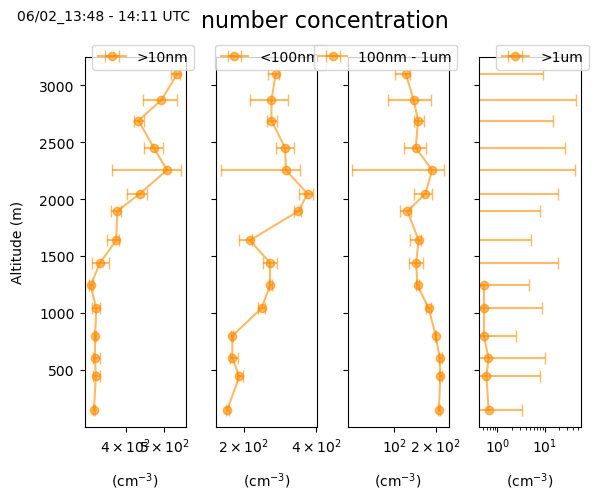

In [18]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY2_subset_median['CNgt10nm_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY2_subset_median['nSMPS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY2_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY2_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/02_13:48 - 14:11 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


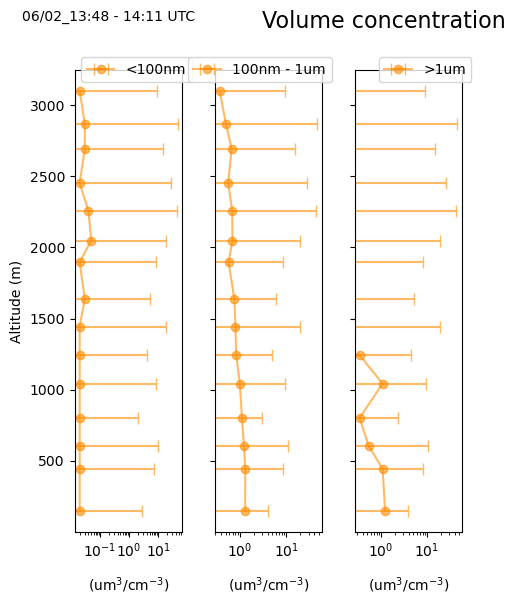

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY2_subset_median['vSMPS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY2_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY2_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY2_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2_subset_25['CNgt10nm_ZIEMBA'], DAY2_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/02_13:48 - 14:11 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha='left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [20]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220602_R0_L2_20230625T113221.ict')
DAY2b['3/10'] = DAY2b['CNgt3nm_ZIEMBA']/DAY2b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY2b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9180  2022-06-02 18:36:00 2022-06-02 18:36:01           32.312301  \
9181  2022-06-02 18:36:01 2022-06-02 18:36:02           32.312336   
9182  2022-06-02 18:36:02 2022-06-02 18:36:03           32.312332   
9183  2022-06-02 18:36:03 2022-06-02 18:36:04           32.312294   
9184  2022-06-02 18:36:04 2022-06-02 18:36:05           32.312221   
...                   ...                 ...                 ...   
10195 2022-06-02 18:52:55 2022-06-02 18:52:56           32.205808   
10196 2022-06-02 18:52:56 2022-06-02 18:52:57           32.205215   
10197 2022-06-02 18:52:57 2022-06-02 18:52:58           32.204648   
10198 2022-06-02 18:52:58 2022-06-02 18:52:59           32.204104   
10199 2022-06-02 18:52:59 2022-06-02 18:53:00           32.203586   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
9180            -65.009805                 191.225         558.415  \
9181            -65.010962                 193.480         594.965   
9182            -65.012116                 195.600         592.730   
9183            -65.013268                 197.010         581.840   
9184            -65.014415                 197.440         577.595   
...                    ...                     ...             ...   
10195           -64.977280                3678.610        2029.370   
10196           -64.976028                3684.900        1908.520   
10197           -64.974760                3691.340        1939.280   
10198           -64.973478                3697.790        1982.860   
10199           -64.972182                3704.160        1991.820   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
9180           462.300                 265.765                        234.440  \
9181           456.110                 265.355                        225.530   
9182           458.450                 271.345                        243.735   
9183           466.090                 271.975                        245.780   
9184           471.435                 273.580                        240.595   
...                ...                     ...                            ...   
10195         1320.600                 892.980                        198.300   
10196         1332.000                 911.085                        207.165   
10197         1339.090                 935.005                        209.575   
10198         1362.780                 965.300                        216.630   
10199         1420.610                 994.975                        209.545   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
9180                          29.640                          1.095  \
9181                          29.485                          1.120   
9182                          34.800                          1.615   
9183                          39.350                          2.285   
9184                          36.300                          1.905   
...                              ...                            ...   
10195                         12.520                          0.335   
10196                         13.790                          0.405   
10197                         13.865                          0.410   
10198                         14.905                          0.560   
10199                         15.075                          0.580   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
9180                         0.65                       2.035  \
9181                         0.65                       2.035   
9182                         0.00                       0.000   
9183                         0.00                       0.000   
9184                         0.00                       0.000   
...                           ...                         ...   
10195                        0.00                       0.000   

In [21]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2b_subset.GPS_Altitude_THORNHILL.min(), DAY2b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2b_subset['Bins'] = pd.cut(DAY2b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2b_subset_1000 = DAY2b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000b = DAY2b_subset_1000[start_index:stop_index]
DAY1000_subset_1000b


Time_Start               Time_Stop   
Bins                                                                 
(132.5, 168.217]   2022-06-02 18:36:33.500 2022-06-02 18:36:34.500  \
(168.217, 203.933] 2022-06-02 18:36:12.000 2022-06-02 18:36:13.000   
(203.933, 239.65]  2022-06-02 18:37:02.000 2022-06-02 18:37:03.000   
(239.65, 275.366]  2022-06-02 18:37:13.000 2022-06-02 18:37:14.000   
(275.366, 311.083] 2022-06-02 18:37:24.000 2022-06-02 18:37:25.000   
(311.083, 346.8]   2022-06-02 18:37:38.000 2022-06-02 18:37:39.000   
(346.8, 382.516]   2022-06-02 18:37:53.000 2022-06-02 18:37:54.000   
(382.516, 418.233] 2022-06-02 18:38:07.000 2022-06-02 18:38:08.000   
(418.233, 453.949] 2022-06-02 18:38:19.000 2022-06-02 18:38:20.000   
(453.949, 489.666] 2022-06-02 18:38:28.500 2022-06-02 18:38:29.500   
(489.666, 525.383] 2022-06-02 18:38:42.000 2022-06-02 18:38:43.000   
(525.383, 561.099] 2022-06-02 18:38:58.000 2022-06-02 18:38:59.000   
(561.099, 596.816] 2022-06-02 18:39:09.500 2022-06-02 18:39:10.500   
(596.816, 632.532] 2022-06-02 18:39:21.000 2022-06-02 18:39:22.000   
(632.532, 668.249] 2022-06-02 18:39:32.500 2022-06-02 18:39:33.500   
(668.249, 703.966] 2022-06-02 18:39:44.000 2022-06-02 18:39:45.000   
(703.966, 739.682] 2022-06-02 18:39:55.000 2022-06-02 18:39:56.000   
(739.682, 775.399] 2022-06-02 18:40:06.500 2022-06-02 18:40:07.500   
(775.399, 811.115] 2022-06-02 18:40:19.500 2022-06-02 18:40:20.500   
(811.115, 846.832] 2022-06-02 18:40:31.000 2022-06-02 18:40:32.000   
(846.832, 882.549] 2022-06-02 18:40:41.000 2022-06-02 18:40:42.000   
(882.549, 918.265] 2022-06-02 18:40:50.500 2022-06-02 18:40:51.500   
(918.265, 953.982] 2022-06-02 18:41:01.500 2022-06-02 18:41:02.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(132.5, 168.217]             32.294860           -65.039923  \
(168.217, 203.933]           32.310300           -65.023333   
(203.933, 239.65]            32.265793           -65.038849   
(239.65, 275.366]            32.254715           -65.034943   
(275.366, 311.083]           32.245041           -65.027102   
(311.083, 346.8]             32.237004           -65.011946   
(346.8, 382.516]             32.236630           -64.992675   
(382.516, 418.233]           32.244388           -64.977146   
(418.233, 453.949]           32.255430           -64.969121   
(453.949, 489.666]           32.265326           -64.967156   
(489.666, 525.383]           32.278827           -64.970259   
(525.383, 561.099]           32.291045           -64.982198   
(561.099, 596.816]           32.295205           -64.994366   
(596.816, 632.532]           32.294635           -65.007150   
(632.532, 668.249]           32.289321           -65.018170   
(668.249, 703.966]           32.280204           -65.024973   
(703.966, 739.682]           32.269728           -65.026238   
(739.682, 775.399]           32.259073           -65.022063   
(775.399, 811.115]           32.249653           -65.011510   
(811.115, 846.832]           32.244869           -64.998809   
(846.832, 882.549]           32.243755           -64.986508   
(882.549, 918.265]           32.245390           -64.974729   
(918.265, 953.982]           32.250738           -64.962283   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(132.5, 168.217]                  151.3675        628.8800         478.8525  \
(168.217, 203.933]                186.7200        604.8300         473.7300   
(203.933, 239.65]                 214.3750        630.3500         483.1500   
(239.65, 275.366]                 260.1500        582.4000         455.6900   
(275.366, 311.083]                289.4500        521.5600         408.6800   
(311.083, 346.8]                  332.1600        464.0250         359.7300   
(346.8, 382.516]                  362.9050        433.1100         340.51

In [22]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000b = DAY2b_subset_1000[start_index:stop_index]
DAY3000_subset_3000b

Time_Start               Time_Stop   
Bins                                                                   
(989.698, 1025.415]  2022-06-02 18:41:23.000 2022-06-02 18:41:24.000  \
(1025.415, 1061.132] 2022-06-02 18:41:31.500 2022-06-02 18:41:32.500   
(1061.132, 1096.848] 2022-06-02 18:41:40.500 2022-06-02 18:41:41.500   
(1096.848, 1132.565] 2022-06-02 18:41:52.500 2022-06-02 18:41:53.500   
(1132.565, 1168.281] 2022-06-02 18:42:04.500 2022-06-02 18:42:05.500   
...                                      ...                     ...   
(3275.561, 3311.277] 2022-06-02 18:51:48.500 2022-06-02 18:51:49.500   
(3311.277, 3346.994] 2022-06-02 18:51:54.000 2022-06-02 18:51:55.000   
(3346.994, 3382.711] 2022-06-02 18:51:59.000 2022-06-02 18:52:00.000   
(3382.711, 3418.427] 2022-06-02 18:52:04.500 2022-06-02 18:52:05.500   
(3418.427, 3454.144] 2022-06-02 18:52:12.000 2022-06-02 18:52:13.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(989.698, 1025.415]            32.269872           -64.947192  \
(1025.415, 1061.132]           32.278880           -64.945719   
(1061.132, 1096.848]           32.288332           -64.947078   
(1096.848, 1132.565]           32.299232           -64.954250   
(1132.565, 1168.281]           32.306221           -64.966341   
...                                  ...                  ...   
(3275.561, 3311.277]           32.275042           -65.008039   
(3311.277, 3346.994]           32.268640           -65.008712   
(3346.994, 3382.711]           32.262831           -65.009201   
(3382.711, 3418.427]           32.256458           -65.009504   
(3418.427, 3454.144]           32.247691           -65.009065   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(989.698, 1025.415]                 1010.300        449.5750         328.9200  \
(1025.415, 1061.132]                1046.060        448.1200         331.1150   
(1061.132, 1096.848]                1080.155        429.6725         335.8350   
(1096.848, 1132.565]                1111.995        454.9625         340.9125   
(1132.565, 1168.281]                1150.090        451.5800         338.5000   
...                                      ...             ...              ...   
(3275.561, 3311.277]                3293.650       1866.3750        1225.7400   
(3311.277, 3346.994]                3329.670       1759.2600        1151.8900   
(3346.994, 3382.711]                3366.390       1632.4600        1070.8500   
(3382.711, 3418.427]                3406.315       1559.9900        1012.8250   
(3418.427, 3454.144]                3433.390       1550.4700        1035.4400   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(989.698, 1025.415]                 184.6600                       153.9700  \
(1025.415, 1061.132]                185.0325                       158.3900   
(1061.132, 1096.848]                181.5325                       154.7550   
(1096.848, 1132.565]                180.7400                       148.2450   
(1132.565, 1168.281]                182.0300                       149.0975   
...                                      ...                            ...   
(3275.561, 3311.277]                470.8075                       104.3900   
(3311.277, 3346.994]                514.1650                       124.8500   
(3346.994, 3382.711]                604.8600                       148.2500   
(3382.711, 3418.427]                599.9425                       156.5725   
(3418.427, 3454.144]                623.4800                       153.4300   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(989.698, 1025.415]                         19.5200  \
(102

In [23]:
nbins = 15
bins2b = np.linspace(DAY2b_subset.GPS_Altitude_THORNHILL.min(), DAY2b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2b_subset['Bins'] = pd.cut(DAY2b_subset['GPS_Altitude_THORNHILL'], bins2b)
DAY2b_subset_median= DAY2b_subset.groupby('Bins').median()
DAY2b_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(132.5, 370.611]     2022-06-02 18:36:58.000 2022-06-02 18:36:59.000  \
(370.611, 608.721]   2022-06-02 18:38:37.000 2022-06-02 18:38:38.000   
(608.721, 846.832]   2022-06-02 18:39:57.500 2022-06-02 18:39:58.500   
(846.832, 1084.943]  2022-06-02 18:41:09.000 2022-06-02 18:41:10.000   
(1084.943, 1323.053] 2022-06-02 18:42:19.500 2022-06-02 18:42:20.500   
(1323.053, 1561.164] 2022-06-02 18:43:33.000 2022-06-02 18:43:34.000   
(1561.164, 1799.275] 2022-06-02 18:44:38.500 2022-06-02 18:44:39.500   
(1799.275, 2037.385] 2022-06-02 18:45:43.000 2022-06-02 18:45:44.000   
(2037.385, 2275.496] 2022-06-02 18:46:52.500 2022-06-02 18:46:53.500   
(2275.496, 2513.607] 2022-06-02 18:48:02.000 2022-06-02 18:48:03.000   
(2513.607, 2751.717] 2022-06-02 18:49:20.500 2022-06-02 18:49:21.500   
(2751.717, 2989.828] 2022-06-02 18:50:30.500 2022-06-02 18:50:31.500   
(2989.828, 3227.939] 2022-06-02 18:51:15.500 2022-06-02 18:51:16.500   
(3227.939, 3466.049] 2022-06-02 18:51:56.500 2022-06-02 18:51:57.500   
(3466.049, 3704.16]  2022-06-02 18:52:39.000 2022-06-02 18:52:40.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.5, 370.611]               32.269897           -65.031199  \
(370.611, 608.721]             32.274007           -64.975419   
(608.721, 846.832]             32.267326           -65.018402   
(846.832, 1084.943]            32.256383           -64.955351   
(1084.943, 1323.053]           32.301242           -64.984247   
(1323.053, 1561.164]           32.249634           -64.983248   
(1561.164, 1799.275]           32.279049           -64.916933   
(1799.275, 2037.385]           32.333781           -64.948824   
(2037.385, 2275.496]           32.322605           -65.026203   
(2275.496, 2513.607]           32.254465           -65.004291   
(2513.607, 2751.717]           32.274475           -64.915935   
(2751.717, 2989.828]           32.333383           -64.950740   
(2989.828, 3227.939]           32.312539           -64.999105   
(3227.939, 3466.049]           32.265733           -65.008549   
(3466.049, 3704.16]            32.218223           -64.994763   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(132.5, 370.611]                    209.2100        594.9650         465.3150  \
(370.611, 608.721]                  502.0200        418.8550         323.2200   
(608.721, 846.832]                  733.3125        420.0500         320.5050   
(846.832, 1084.943]                 958.6250        439.8275         332.9150   
(1084.943, 1323.053]               1206.5900        456.8325         343.5775   
(1323.053, 1561.164]               1451.8300        470.5700         349.2700   
(1561.164, 1799.275]               1689.1100        556.0175         387.3425   
(1799.275, 2037.385]               1915.8500        825.1550         542.3400   
(2037.385, 2275.496]               2152.1900        795.0525         572.0575   
(2275.496, 2513.607]               2403.7800        649.0550         453.2150   
(2513.607, 2751.717]               2641.1850        672.7025         456.1725   
(2751.717, 2989.828]               2861.3500        835.7875         582.3275   
(2989.828, 3227.939]               3074.8400       1390.4050         939.4025   
(3227.939, 3466.049]               3347.3200       1693.9800        1102.2650   
(3466.049, 3704.16]                3569.8300       1664.9800        1146.1600   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(132.5, 370.611]                    269.4100                       203.8700  \
(370.611, 608.721]                  190.7300                       180.0850   
(608.721,

In [24]:
DAY2b_subset_25 = DAY2b_subset_median - DAY2b_subset.groupby('Bins').quantile(.25)
DAY2b_subset_25
DAY2b_subset_75 = DAY2b_subset.groupby('Bins').quantile(.75) - DAY2b_subset_median
DAY2b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(132.5, 370.611]        0 days 00:00:28.500000    0 days 00:00:28.500000  \
(370.611, 608.721]      0 days 00:00:20.500000    0 days 00:00:20.500000   
(608.721, 846.832]   0 days 00:00:19.250000128 0 days 00:00:19.250000128   
(846.832, 1084.943]            0 days 00:00:16           0 days 00:00:16   
(1084.943, 1323.053] 0 days 00:00:18.749999872 0 days 00:00:18.749999872   
(1323.053, 1561.164]    0 days 00:00:17.500000    0 days 00:00:17.500000   
(1561.164, 1799.275] 0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(1799.275, 2037.385]           0 days 00:00:17           0 days 00:00:17   
(2037.385, 2275.496] 0 days 00:00:17.250000128 0 days 00:00:17.250000128   
(2275.496, 2513.607]           0 days 00:00:17           0 days 00:00:17   
(2513.607, 2751.717] 0 days 00:00:21.749999872 0 days 00:00:21.749999872   
(2751.717, 2989.828] 0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(2989.828, 3227.939] 0 days 00:00:09.250000128 0 days 00:00:09.250000128   
(3227.939, 3466.049] 0 days 00:00:10.749999872 0 days 00:00:10.749999872   
(3466.049, 3704.16]            0 days 00:00:10           0 days 00:00:10   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.5, 370.611]                0.029579             0.013920  \
(370.611, 608.721]              0.016751             0.006175   
(608.721, 846.832]              0.017803             0.008953   
(846.832, 1084.943]             0.015585             0.008454   
(1084.943, 1323.053]            0.005059             0.022068   
(1323.053, 1561.164]            0.009691             0.023025   
(1561.164, 1799.275]            0.015690             0.002397   
(1799.275, 2037.385]            0.006080             0.017684   
(2037.385, 2275.496]            0.012793             0.015473   
(2275.496, 2513.607]            0.013187             0.021239   
(2513.607, 2751.717]            0.024602             0.005796   
(2751.717, 2989.828]            0.001819             0.015969   
(2989.828, 3227.939]            0.009352             0.006270   
(3227.939, 3466.049]            0.012512             0.000891   
(3466.049, 3704.16]             0.010124             0.010341   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(132.5, 370.611]                    88.25000        31.25750         13.86750  \
(370.611, 608.721]                  45.35000        14.28750          5.54500   
(608.721, 846.832]                  55.32125         9.46000          2.30500   
(846.832, 1084.943]                 61.81500        11.32000          3.89500   
(1084.943, 1323.053]                47.42250        17.15500         10.14875   
(1323.053, 1561.164]                57.46000        20.79750          5.63000   
(1561.164, 1799.275]                43.10000        19.73375         11.32875   
(1799.275, 2037.385]                74.11000        32.82500         52.60000   
(2037.385, 2275.496]                58.22250        55.10375         29.04625   
(2275.496, 2513.607]                56.12000        29.43000         13.08000   
(2513.607, 2751.717]                66.25250        15.66000          8.64375   
(2751.717, 2989.828]                83.66750       172.06000        106.98625   
(2989.828, 3227.939]                78.64500        88.88500         22.47250   
(3227.939, 3466.049]                70.79750       132.44750         87.53250   
(3466.049, 3704.16]                 73.78000       243.54000        170.54000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(132.5, 370.611]                     8.84500                       17.90000  \
(370.611, 608.721]    

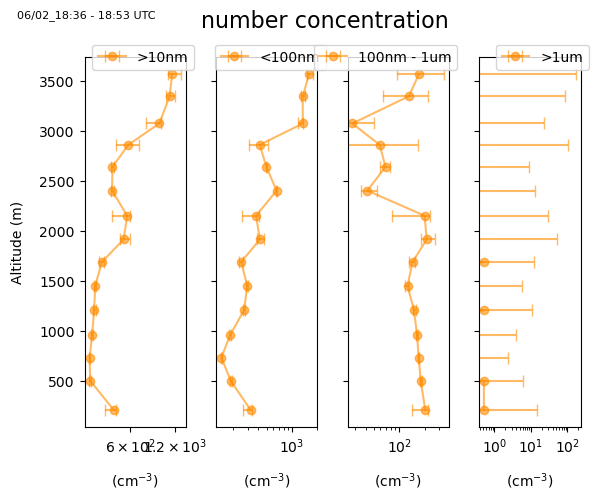

In [25]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY2b_subset_median['CNgt10nm_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY2b_subset_median['nSMPS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY2b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY2b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/02_18:36 - 18:53 UTC', ha='left', va='top', fontsize=8)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


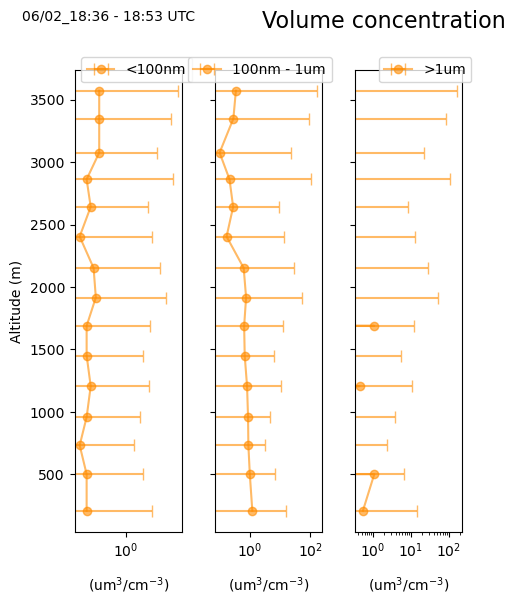

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY2b_subset_median['vSMPS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY2b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY2b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY2b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY2b_subset_25['CNgt10nm_ZIEMBA'], DAY2b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/02_18:36 - 18:53 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [27]:
DAY3 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220603_R0_20230625T113221.ict')
start_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 13:30:00"))
stop_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
DAY3_subset = DAY3[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY3_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
2467 2022-06-03 13:30:00 2022-06-03 13:30:01           33.872982  \
2468 2022-06-03 13:30:01 2022-06-03 13:30:02           33.872534   
2469 2022-06-03 13:30:02 2022-06-03 13:30:03           33.872086   
2470 2022-06-03 13:30:03 2022-06-03 13:30:04           33.871638   
2471 2022-06-03 13:30:04 2022-06-03 13:30:05           33.871187   
...                  ...                 ...                 ...   
7862 2022-06-03 14:59:55 2022-06-03 14:59:56           32.712767   
7863 2022-06-03 14:59:56 2022-06-03 14:59:57           32.712103   
7864 2022-06-03 14:59:57 2022-06-03 14:59:58           32.711441   
7865 2022-06-03 14:59:58 2022-06-03 14:59:59           32.710779   
7866 2022-06-03 14:59:59 2022-06-03 15:00:00           32.710116   

      Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
2467           -67.052387                 2858.90         667.570  \
2468           -67.053832                 2861.55         664.350   
2469           -67.055272                 2863.82         668.485   
2470           -67.056704                 2865.57         690.095   
2471           -67.058127                 2866.59         653.280   
...                   ...                     ...             ...   
7862           -65.244314                 2413.61         985.320   
7863           -65.243151                 2408.15         980.100   
7864           -65.241989                 2402.02         925.350   
7865           -65.240827                 2395.43         930.080   
7866           -65.239666                 2388.66        1003.310   

      CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
2467          483.760                 268.835                         61.745  \
2468          480.900                 274.010                         65.915   
2469          480.130                 270.200                         52.340   
2470          479.325                 265.675                         62.350   
2471          477.020                 269.410                         72.910   
...               ...                     ...                            ...   
7862          639.040                  97.300                         49.000   
7863          648.095                  92.760                         50.140   
7864          655.680                  90.215                         45.040   
7865          665.200                  87.335                         35.765   
7866          668.035                  82.115                         43.255   

      IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
2467                          7.130                          0.410  \
2468                          8.355                          0.530   
2469                          5.670                          0.270   
2470                          5.435                          0.175   
2471                          7.350                          0.335   
...                             ...                            ...   
7862                          5.195                          0.255   
7863                          5.130                          0.255   
7864                          4.325                          0.165   
7865                          4.410                          0.290   
7866                          4.545                          0.275   

      IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
2467                         0.0                         0.0  \
2468                         0.0                         0.0   
2469                         0.0                         0.0   
2470                         0.0                         0.0   
2471                         0.0                         0.0   
...                          ...                         ...   
7862                         0.0                         0.0   
7863                         0.0                      

In [28]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY3_subset.GPS_Altitude_THORNHILL.min(), DAY3_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY3_subset['Bins'] = pd.cut(DAY3_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY3_subset_1000 = DAY3_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_3 = DAY3_subset_1000[start_index:stop_index]
DAY1000_subset_3


Time_Start               Time_Stop   
Bins                                                                 
(94.825, 149.89]   2022-06-03 13:45:28.500 2022-06-03 13:45:29.500  \
(149.89, 204.956]  2022-06-03 13:54:59.500 2022-06-03 13:55:00.500   
(204.956, 260.021] 2022-06-03 14:00:22.500 2022-06-03 14:00:23.500   
(260.021, 315.086] 2022-06-03 13:56:57.000 2022-06-03 13:56:58.000   
(315.086, 370.151] 2022-06-03 13:55:36.500 2022-06-03 13:55:37.500   
(370.151, 425.217] 2022-06-03 14:04:58.500 2022-06-03 14:04:59.500   
(425.217, 480.282] 2022-06-03 14:05:23.500 2022-06-03 14:05:24.500   
(480.282, 535.347] 2022-06-03 14:10:05.000 2022-06-03 14:10:06.000   
(535.347, 590.412] 2022-06-03 14:14:56.000 2022-06-03 14:14:57.000   
(590.412, 645.478] 2022-06-03 14:15:06.000 2022-06-03 14:15:07.000   
(645.478, 700.543] 2022-06-03 14:15:15.000 2022-06-03 14:15:16.000   
(700.543, 755.608] 2022-06-03 13:34:19.000 2022-06-03 13:34:20.000   
(755.608, 810.673] 2022-06-03 13:34:13.000 2022-06-03 13:34:14.000   
(810.673, 865.739] 2022-06-03 14:24:05.500 2022-06-03 14:24:06.500   
(865.739, 920.804] 2022-06-03 14:20:44.500 2022-06-03 14:20:45.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(94.825, 149.89]             34.142639           -67.165956  \
(149.89, 204.956]            33.928738           -67.590937   
(204.956, 260.021]           34.111793           -67.404486   
(260.021, 315.086]           33.959246           -67.563614   
(315.086, 370.151]           33.976991           -67.341925   
(370.151, 425.217]           34.251154           -67.066855   
(425.217, 480.282]           34.249331           -67.072107   
(480.282, 535.347]           34.179626           -67.299747   
(535.347, 590.412]           33.993495           -67.622091   
(590.412, 645.478]           33.994342           -67.635976   
(645.478, 700.543]           33.998420           -67.647716   
(700.543, 755.608]           33.807625           -67.082234   
(755.608, 810.673]           33.812632           -67.087934   
(810.673, 865.739]           34.268631           -67.163961   
(865.739, 920.804]           34.106785           -67.381978   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(94.825, 149.89]                  122.9500        431.5250         342.4750  \
(149.89, 204.956]                 187.3925        435.2875         343.7650   
(204.956, 260.021]                247.7050        466.6975         361.7925   
(260.021, 315.086]                275.4400        466.6650         357.8250   
(315.086, 370.151]                339.8950        483.4600         381.1050   
(370.151, 425.217]                406.7575        468.7925         366.7875   
(425.217, 480.282]                456.6750        488.7500         369.0875   
(480.282, 535.347]                499.2650        492.0250         380.5200   
(535.347, 590.412]                562.7650        420.6900         328.5200   
(590.412, 645.478]                623.9650        415.1850         317.1100   
(645.478, 700.543]                668.4250        422.5450         313.3750   
(700.543, 755.608]                723.0550        417.1450         311.9750   
(755.608, 810.673]                784.9050        416.6100         320.9400   
(810.673, 865.739]                849.2050        474.3125         357.6275   
(865.739, 920.804]                907.6875        436.9775         330.7125   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(94.825, 149.89]                  222.9475                       226.5650  \
(149.89, 204.956]                 221.5225                       203.8850   
(204.956, 260.021]                230.8125                       235.4775   
(260.021, 315.086]                233.04

In [29]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY3_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3_subset_3000 = DAY3_subset_1000[start_index:stop_index]
DAY3_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(975.869, 1030.934]  2022-06-03 14:16:33.500 2022-06-03 14:16:34.500  \
(1030.934, 1086.0]   2022-06-03 14:16:45.000 2022-06-03 14:16:46.000   
(1086.0, 1141.065]   2022-06-03 14:16:31.500 2022-06-03 14:16:32.500   
(1141.065, 1196.13]  2022-06-03 13:33:26.500 2022-06-03 13:33:27.500   
(1196.13, 1251.195]  2022-06-03 14:25:41.000 2022-06-03 14:25:42.000   
(1251.195, 1306.26]  2022-06-03 13:33:12.000 2022-06-03 13:33:13.000   
(1306.26, 1361.326]  2022-06-03 13:59:32.500 2022-06-03 13:59:33.500   
(1361.326, 1416.391] 2022-06-03 14:26:11.500 2022-06-03 14:26:12.500   
(1416.391, 1471.456] 2022-06-03 13:32:49.000 2022-06-03 13:32:50.000   
(1471.456, 1526.522] 2022-06-03 14:27:02.500 2022-06-03 14:27:03.500   
(1526.522, 1581.587] 2022-06-03 14:30:05.500 2022-06-03 14:30:06.500   
(1581.587, 1636.652] 2022-06-03 14:29:30.500 2022-06-03 14:29:31.500   
(1636.652, 1691.717] 2022-06-03 13:32:23.000 2022-06-03 13:32:24.000   
(1691.717, 1746.783] 2022-06-03 14:02:58.500 2022-06-03 14:02:59.500   
(1746.783, 1801.848] 2022-06-03 13:32:11.000 2022-06-03 13:32:12.000   
(1801.848, 1856.913] 2022-06-03 13:32:04.500 2022-06-03 13:32:05.500   
(1856.913, 1911.978] 2022-06-03 13:31:58.500 2022-06-03 13:31:59.500   
(1911.978, 1967.044] 2022-06-03 13:31:53.000 2022-06-03 13:31:54.000   
(1967.044, 2022.109] 2022-06-03 14:02:55.500 2022-06-03 14:02:56.500   
(2022.109, 2077.174] 2022-06-03 13:31:40.000 2022-06-03 13:31:41.000   
(2077.174, 2132.239] 2022-06-03 13:31:34.000 2022-06-03 13:31:35.000   
(2132.239, 2187.304] 2022-06-03 13:31:27.500 2022-06-03 13:31:28.500   
(2187.304, 2242.37]  2022-06-03 13:31:22.000 2022-06-03 13:31:23.000   
(2242.37, 2297.435]  2022-06-03 13:31:17.000 2022-06-03 13:31:18.000   
(2297.435, 2352.5]   2022-06-03 13:31:11.000 2022-06-03 13:31:12.000   
(2352.5, 2407.566]   2022-06-03 14:34:35.000 2022-06-03 14:34:36.000   
(2407.566, 2462.631] 2022-06-03 14:47:14.500 2022-06-03 14:47:15.500   
(2462.631, 2517.696] 2022-06-03 14:34:48.500 2022-06-03 14:34:49.500   
(2517.696, 2572.761] 2022-06-03 14:34:52.500 2022-06-03 14:34:53.500   
(2572.761, 2627.826] 2022-06-03 14:34:59.500 2022-06-03 14:35:00.500   
(2627.826, 2682.892] 2022-06-03 14:35:05.000 2022-06-03 14:35:06.000   
(2682.892, 2737.957] 2022-06-03 14:35:13.000 2022-06-03 14:35:14.000   
(2737.957, 2793.022] 2022-06-03 14:35:19.500 2022-06-03 14:35:20.500   
(2793.022, 2848.088] 2022-06-03 14:35:26.500 2022-06-03 14:35:27.500   
(2848.088, 2903.153] 2022-06-03 14:35:31.500 2022-06-03 14:35:32.500   
(2903.153, 2958.218] 2022-06-03 14:58:37.500 2022-06-03 14:58:38.500   
(2958.218, 3013.283] 2022-06-03 14:58:28.500 2022-06-03 14:58:29.500   
(3013.283, 3068.348] 2022-06-03 14:58:17.500 2022-06-03 14:58:18.500   
(3068.348, 3123.414] 2022-06-03 14:58:02.000 2022-06-03 14:58:03.000   
(3123.414, 3178.479] 2022-06-03 14:57:46.500 2022-06-03 14:57:47.500   
(3178.479, 3233.544] 2022-06-03 14:57:37.000 2022-06-03 14:57:38.000   
(3233.544, 3288.61]  2022-06-03 14:57:29.500 2022-06-03 14:57:30.500   
(3288.61, 3343.675]  2022-06-03 14:57:21.000 2022-06-03 14:57:22.000   
(3343.675, 3398.74]  2022-06-03 14:46:45.000 2022-06-03 14:46:46.000   
(3398.74, 3453.805]  2022-06-03 14:36:24.000 2022-06-03 14:36:25.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(975.869, 1030.934]            33.965128           -67.706089  \
(1030.934, 1086.0]             33.975829           -67.718794   
(1086.0, 1141.065]             33.988404           -67.726647   
(1141.065, 1196.13]            33.858219           -67.077414   
(1196.13, 1251.195]            34.283454           -67.038518   
(1251.195, 1306.26]            33.862823           -67.056964   
(1306.26, 1361.326]            34.076123           -67.027614   
(1361.326, 1416.391]           34.301374           -67.000262   

In [30]:
nbins = 20
bins3 = np.linspace(DAY3_subset.GPS_Altitude_THORNHILL.min(), DAY3_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY3_subset['Bins'] = pd.cut(DAY3_subset['GPS_Altitude_THORNHILL'], bins3)
DAY3_subset_median= DAY3_subset.groupby('Bins').median()
DAY3_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(94.825, 370.151]    2022-06-03 13:49:57.000 2022-06-03 13:49:58.000  \
(370.151, 645.478]   2022-06-03 14:09:49.000 2022-06-03 14:09:50.000   
(645.478, 920.804]   2022-06-03 14:22:42.000 2022-06-03 14:22:43.000   
(920.804, 1196.13]   2022-06-03 14:18:42.500 2022-06-03 14:18:43.500   
(1196.13, 1471.456]  2022-06-03 14:25:43.000 2022-06-03 14:25:44.000   
(1471.456, 1746.782] 2022-06-03 14:29:51.000 2022-06-03 14:29:52.000   
(1746.782, 2022.109] 2022-06-03 13:32:08.500 2022-06-03 13:32:09.500   
(2022.109, 2297.435] 2022-06-03 13:31:37.500 2022-06-03 13:31:38.500   
(2297.435, 2572.761] 2022-06-03 14:34:40.500 2022-06-03 14:34:41.500   
(2572.761, 2848.088] 2022-06-03 14:35:15.500 2022-06-03 14:35:16.500   
(2848.088, 3123.414] 2022-06-03 14:58:10.000 2022-06-03 14:58:11.000   
(3123.414, 3398.74]  2022-06-03 14:57:20.500 2022-06-03 14:57:21.500   
(3398.74, 3674.066]  2022-06-03 14:56:30.500 2022-06-03 14:56:31.500   
(3674.066, 3949.392] 2022-06-03 14:55:43.500 2022-06-03 14:55:44.500   
(3949.392, 4224.719] 2022-06-03 14:55:07.000 2022-06-03 14:55:08.000   
(4224.719, 4500.045] 2022-06-03 14:54:30.500 2022-06-03 14:54:31.500   
(4500.045, 4775.371] 2022-06-03 14:53:50.500 2022-06-03 14:53:51.500   
(4775.371, 5050.698] 2022-06-03 14:39:43.000 2022-06-03 14:39:44.000   
(5050.698, 5326.024] 2022-06-03 14:40:19.000 2022-06-03 14:40:20.000   
(5326.024, 5601.35]  2022-06-03 14:46:38.500 2022-06-03 14:46:39.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(94.825, 370.151]              34.115487           -67.206434  \
(370.151, 645.478]             34.173190           -67.281351   
(645.478, 920.804]             34.202326           -67.234070   
(920.804, 1196.13]             34.026322           -67.536288   
(1196.13, 1471.456]            34.283647           -67.030360   
(1471.456, 1746.782]           34.175179           -67.254158   
(1746.782, 2022.109]           33.812818           -67.042618   
(2022.109, 2297.435]           33.799565           -67.081631   
(2297.435, 2572.761]           33.820365           -67.095526   
(2572.761, 2848.088]           33.855042           -67.081203   
(2848.088, 3123.414]           32.780791           -65.369475   
(3123.414, 3398.74]            32.814824           -65.432314   
(3398.74, 3674.066]            32.851543           -65.492765   
(3674.066, 3949.392]           32.885643           -65.551360   
(3949.392, 4224.719]           32.911334           -65.597782   
(4224.719, 4500.045]           32.937929           -65.644701   
(4500.045, 4775.371]           32.969439           -65.695278   
(4775.371, 5050.698]           33.762338           -67.077324   
(5050.698, 5326.024]           33.732467           -67.022060   
(5326.024, 5601.35]            33.375901           -66.393270   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(94.825, 370.151]                    131.235        447.7650         351.4800  \
(370.151, 645.478]                   498.600        486.2900         373.3600   
(645.478, 920.804]                   863.570        443.2200         336.0850   
(920.804, 1196.13]                   936.840        420.9625         322.0600   
(1196.13, 1471.456]                 1327.480        439.9450         331.8950   
(1471.456, 1746.782]                1555.080        910.8250         677.1200   
(1746.782, 2022.109]                1886.845        884.4500         655.9175   
(2022.109, 2297.435]                2149.580        963.0275         671.4175   
(2297.435, 2572.761]                2450.625        920.9850         630.9700   
(2572.761, 2848.088]                2725.220        774.3575         505.0725   
(2848.088, 3123.414]                2990.300  

In [31]:
DAY3_subset_25 = DAY3_subset_median - DAY3_subset.groupby('Bins').quantile(.25)
DAY3_subset_25
DAY3_subset_75 = DAY3_subset.groupby('Bins').quantile(.75) - DAY3_subset_median
DAY3_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(94.825, 370.151]              0 days 00:07:29           0 days 00:07:29  \
(370.151, 645.478]      0 days 00:02:42.500000    0 days 00:02:42.500000   
(645.478, 920.804]      0 days 00:01:15.500000    0 days 00:01:15.500000   
(920.804, 1196.13]   0 days 00:02:38.250000128 0 days 00:02:38.250000128   
(1196.13, 1471.456]     0 days 00:00:22.500000    0 days 00:00:22.500000   
(1471.456, 1746.782]           0 days 00:01:57           0 days 00:01:57   
(1746.782, 2022.109] 0 days 01:01:47.250000128 0 days 01:01:47.250000128   
(2022.109, 2297.435] 0 days 01:02:40.250000128 0 days 01:02:40.250000128   
(2297.435, 2572.761] 0 days 00:24:57.250000128 0 days 00:24:57.250000128   
(2572.761, 2848.088] 0 days 00:23:52.250000128 0 days 00:23:52.250000128   
(2848.088, 3123.414]           0 days 00:00:23           0 days 00:00:23   
(3123.414, 3398.74]  0 days 00:00:16.749999872 0 days 00:00:16.749999872   
(3398.74, 3674.066]  0 days 00:00:21.250000128 0 days 00:00:21.250000128   
(3674.066, 3949.392] 0 days 00:00:18.749999872 0 days 00:00:18.749999872   
(3949.392, 4224.719]    0 days 00:00:15.500000    0 days 00:00:15.500000   
(4224.719, 4500.045] 0 days 00:00:16.749999872 0 days 00:00:16.749999872   
(4500.045, 4775.371] 0 days 00:00:19.250000128 0 days 00:00:19.250000128   
(4775.371, 5050.698]    0 days 00:13:46.500000    0 days 00:13:46.500000   
(5050.698, 5326.024]    0 days 00:12:42.500000    0 days 00:12:42.500000   
(5326.024, 5601.35]  0 days 00:03:06.749999872 0 days 00:03:06.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(94.825, 370.151]               0.115971             0.077436  \
(370.151, 645.478]              0.080624             0.190818   
(645.478, 920.804]              0.059937             0.094632   
(920.804, 1196.13]              0.101843             0.208143   
(1196.13, 1471.456]             0.010911             0.025582   
(1471.456, 1746.782]            0.085818             0.140580   
(1746.782, 2022.109]            0.207986             0.016846   
(2022.109, 2297.435]            0.204335             0.016025   
(2297.435, 2572.761]            0.165831             1.830987   
(2572.761, 2848.088]            0.111330             1.781192   
(2848.088, 3123.414]            1.091295             0.028046   
(3123.414, 3398.74]             1.118391             0.021024   
(3398.74, 3674.066]             1.057939             0.025631   
(3674.066, 3949.392]            1.000049             0.023678   
(3949.392, 4224.719]            0.951544             0.019689   
(4224.719, 4500.045]            0.898677             0.021606   
(4500.045, 4775.371]            0.838269             0.024497   
(4775.371, 5050.698]            0.015417             1.353852   
(5050.698, 5326.024]            0.012110             1.256879   
(5326.024, 5601.35]             0.175182             0.309672   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(94.825, 370.151]                   113.6500        33.44000         21.11000  \
(370.151, 645.478]                    8.7725       280.71500        224.61000   
(645.478, 920.804]                   43.5000        53.53000         35.73500   
(920.804, 1196.13]                   54.4625        30.43250         11.46500   
(1196.13, 1471.456]                  54.5850        16.03000          4.60000   
(1471.456, 1746.782]                 12.2200        62.48000         45.91000   
(1746.782, 2022.109]                 69.3600        96.45375         46.56250   
(2022.109, 2297.435]                 65.3625        67.14750         70.96000   
(2297.435, 2572.761]                 63.3725        75.56000         69.31875   
(2572.761, 2848.088]                 55.9

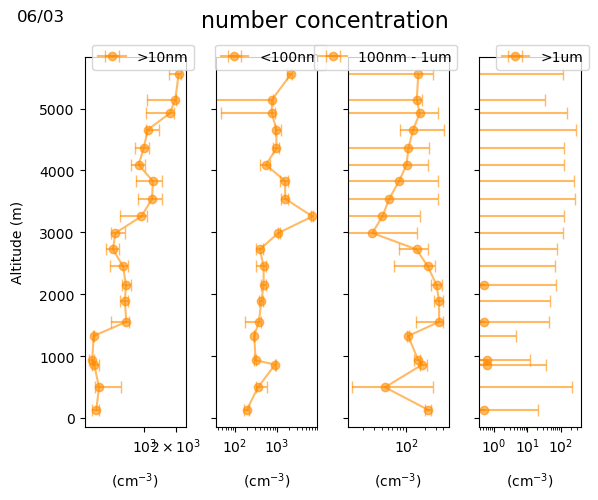

In [32]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY3_subset_median['CNgt10nm_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY3_subset_median['nSMPS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY3_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY3_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())


# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/03', ha='left', va='top', fontsize=12)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


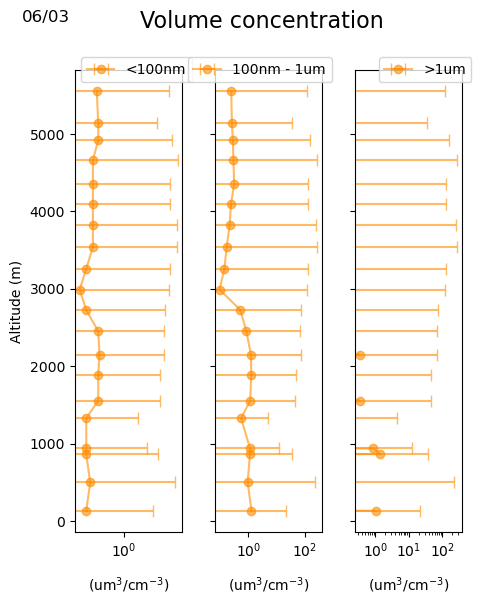

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY3_subset_median['vSMPS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY3_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY3_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY3_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY3_subset_25['CNgt10nm_ZIEMBA'], DAY3_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/03', ha='left', va='top', fontsize=12)
fig.suptitle('Volume concentration', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [34]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220607_R0_L1_20230625T113222.ict')
DAY7['3/10'] = DAY7['CNgt3nm_ZIEMBA']/DAY7['CNgt10nm_ZIEMBA']
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:48:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY7_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10397 2022-06-07 14:32:00 2022-06-07 14:32:01           32.250498  \
10398 2022-06-07 14:32:01 2022-06-07 14:32:02           32.249883   
10399 2022-06-07 14:32:02 2022-06-07 14:32:03           32.249267   
10400 2022-06-07 14:32:03 2022-06-07 14:32:04           32.248648   
10401 2022-06-07 14:32:04 2022-06-07 14:32:05           32.248027   
...                   ...                 ...                 ...   
11352 2022-06-07 14:47:55 2022-06-07 14:47:56           32.223583   
11353 2022-06-07 14:47:56 2022-06-07 14:47:57           32.222625   
11354 2022-06-07 14:47:57 2022-06-07 14:47:58           32.221687   
11355 2022-06-07 14:47:58 2022-06-07 14:47:59           32.220775   
11356 2022-06-07 14:47:59 2022-06-07 14:48:00           32.219891   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10397           -64.999220                 127.595        1479.020  \
10398           -64.998233                 126.585        1506.670   
10399           -64.997244                 125.870        1477.210   
10400           -64.996254                 125.955        1433.030   
10401           -64.995263                 126.990        1361.160   
...                    ...                     ...             ...   
11352           -64.933389                3141.930         994.665   
11353           -64.932625                3139.810        1044.300   
11354           -64.931820                3135.420        1044.100   
11355           -64.930970                3129.020        1049.200   
11356           -64.930073                3120.770        1028.160   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10397         1130.190                 888.840                        483.165  \
10398         1140.410                 886.460                        455.645   
10399         1150.300                 900.190                        485.655   
10400         1149.960                 905.725                        508.490   
10401         1139.110                 900.205                        510.830   
...                ...                     ...                            ...   
11352          666.380                 366.985                        134.810   
11353          693.965                 384.470                        124.320   
11354          691.845                 376.700                        120.065   
11355          662.225                 357.785                        122.135   
11356          641.435                 315.930                         98.805   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10397                         46.910                          2.060  \
10398                         46.970                          2.330   
10399                         48.740                          2.360   
10400                         47.900                          1.950   
10401                         46.175                          1.805   
...                              ...                            ...   
11352                          8.755                          0.230   
11353                          9.410                          0.315   
11354                          9.390                          0.330   
11355                         10.390                          0.525   
11356                          9.150                          0.490   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10397                       1.555                      10.760  \
10398                       1.560                      10.785   
10399                       1.040                       6.695   
10400                       1.035                      10.560   
10401                       1.555                      14.675   
...                           ...                         ...   
11352                       0.000                       0.000   

In [35]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7_subset.GPS_Altitude_THORNHILL.min(), DAY7_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7_subset['Bins'] = pd.cut(DAY7_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7_subset_1000 = DAY7_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7 = DAY7_subset_1000[start_index:stop_index]
DAY1000_subset_7


Time_Start               Time_Stop   
Bins                                                                 
(125.87, 156.031]  2022-06-07 14:32:05.500 2022-06-07 14:32:06.500  \
(156.031, 186.191] 2022-06-07 14:32:17.500 2022-06-07 14:32:18.500   
(186.191, 216.352] 2022-06-07 14:32:32.000 2022-06-07 14:32:33.000   
(216.352, 246.512] 2022-06-07 14:32:43.000 2022-06-07 14:32:44.000   
(246.512, 276.673] 2022-06-07 14:32:56.500 2022-06-07 14:32:57.500   
(276.673, 306.834] 2022-06-07 14:33:10.000 2022-06-07 14:33:11.000   
(306.834, 336.994] 2022-06-07 14:33:22.500 2022-06-07 14:33:23.500   
(336.994, 367.155] 2022-06-07 14:33:36.500 2022-06-07 14:33:37.500   
(367.155, 397.315] 2022-06-07 14:33:47.000 2022-06-07 14:33:48.000   
(397.315, 427.476] 2022-06-07 14:33:58.500 2022-06-07 14:33:59.500   
(427.476, 457.637] 2022-06-07 14:34:11.000 2022-06-07 14:34:12.000   
(457.637, 487.797] 2022-06-07 14:34:24.000 2022-06-07 14:34:25.000   
(487.797, 517.958] 2022-06-07 14:34:36.000 2022-06-07 14:34:37.000   
(517.958, 548.118] 2022-06-07 14:34:48.500 2022-06-07 14:34:49.500   
(548.118, 578.279] 2022-06-07 14:35:03.000 2022-06-07 14:35:04.000   
(578.279, 608.44]  2022-06-07 14:35:16.000 2022-06-07 14:35:17.000   
(608.44, 638.6]    2022-06-07 14:35:28.000 2022-06-07 14:35:29.000   
(638.6, 668.761]   2022-06-07 14:35:41.000 2022-06-07 14:35:42.000   
(668.761, 698.921] 2022-06-07 14:35:54.000 2022-06-07 14:35:55.000   
(698.921, 729.082] 2022-06-07 14:36:07.000 2022-06-07 14:36:08.000   
(729.082, 759.243] 2022-06-07 14:36:19.500 2022-06-07 14:36:20.500   
(759.243, 789.403] 2022-06-07 14:36:32.000 2022-06-07 14:36:33.000   
(789.403, 819.564] 2022-06-07 14:36:44.500 2022-06-07 14:36:45.500   
(819.564, 849.724] 2022-06-07 14:36:56.500 2022-06-07 14:36:57.500   
(849.724, 879.885] 2022-06-07 14:37:08.500 2022-06-07 14:37:09.500   
(879.885, 910.046] 2022-06-07 14:37:21.500 2022-06-07 14:37:22.500   
(910.046, 940.206] 2022-06-07 14:37:34.000 2022-06-07 14:37:35.000   
(940.206, 970.367] 2022-06-07 14:37:45.000 2022-06-07 14:37:46.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(125.87, 156.031]            32.247084           -64.993783  \
(156.031, 186.191]           32.238512           -64.982933   
(186.191, 216.352]           32.224748           -64.974263   
(216.352, 246.512]           32.212704           -64.972458   
(246.512, 276.673]           32.198293           -64.976183   
(276.673, 306.834]           32.186671           -64.986863   
(306.834, 336.994]           32.180313           -65.000790   
(336.994, 367.155]           32.179169           -65.018100   
(367.155, 397.315]           32.182422           -65.030220   
(397.315, 427.476]           32.189344           -65.041040   
(427.476, 457.637]           32.199805           -65.048462   
(457.637, 487.797]           32.212158           -65.050221   
(487.797, 517.958]           32.223039           -65.046419   
(517.958, 548.118]           32.232050           -65.037442   
(548.118, 578.279]           32.237683           -65.022598   
(578.279, 608.44]            32.237255           -65.007751   
(608.44, 638.6]              32.232216           -64.995106   
(638.6, 668.761]             32.222500           -64.984702   
(668.761, 698.921]           32.209859           -64.979520   
(698.921, 729.082]           32.196332           -64.980486   
(729.082, 759.243]           32.184483           -64.987138   
(759.243, 789.403]           32.175559           -64.998415   
(789.403, 819.564]           32.170876           -65.012642   
(819.564, 849.724]           32.170954           -65.027082   
(849.724, 879.885]           32.175415           -65.040249   
(879.885, 910.046]           32.183753           -65.051764   
(910.046, 940.206]           32.193866           -65.059867   
(940.206, 970.367]           32.203883           -65.064122   

                    GPS_Altitude_THORNHI

In [36]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7_subset_3000 = DAY7_subset_1000[start_index:stop_index]
DAY7_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1000.527, 1030.688] 2022-06-07 14:38:08.500 2022-06-07 14:38:09.500  \
(1030.688, 1060.849] 2022-06-07 14:38:18.000 2022-06-07 14:38:19.000   
(1060.849, 1091.009] 2022-06-07 14:38:29.000 2022-06-07 14:38:30.000   
(1091.009, 1121.17]  2022-06-07 14:38:41.000 2022-06-07 14:38:42.000   
(1121.17, 1151.33]   2022-06-07 14:38:52.000 2022-06-07 14:38:53.000   
...                                      ...                     ...   
(2960.966, 2991.127] 2022-06-07 14:47:25.500 2022-06-07 14:47:26.500   
(2991.127, 3021.288] 2022-06-07 14:47:30.000 2022-06-07 14:47:31.000   
(3021.288, 3051.448] 2022-06-07 14:47:35.000 2022-06-07 14:47:36.000   
(3051.448, 3081.609] 2022-06-07 14:47:40.000 2022-06-07 14:47:41.000   
(3081.609, 3111.769] 2022-06-07 14:47:45.000 2022-06-07 14:47:46.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1000.527, 1030.688]           32.226197           -65.063460  \
(1030.688, 1060.849]           32.234533           -65.059455   
(1060.849, 1091.009]           32.243113           -65.052401   
(1091.009, 1121.17]            32.250523           -65.041995   
(1121.17, 1151.33]             32.254166           -65.030077   
...                                  ...                  ...   
(2960.966, 2991.127]           32.247455           -64.960510   
(2991.127, 3021.288]           32.244711           -64.955429   
(3021.288, 3051.448]           32.241233           -64.950133   
(3051.448, 3081.609]           32.237341           -64.945253   
(3081.609, 3111.769]           32.233066           -64.940834   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(1000.527, 1030.688]                1014.245        1219.925          920.325  \
(1030.688, 1060.849]                1049.390        1039.370          748.365   
(1060.849, 1091.009]                1076.340         963.720          736.495   
(1091.009, 1121.17]                 1104.090         975.025          723.980   
(1121.17, 1151.33]                  1136.620         930.930          707.580   
...                                      ...             ...              ...   
(2960.966, 2991.127]                2976.480        1158.535          796.425   
(2991.127, 3021.288]                3005.480        1108.740          782.295   
(3021.288, 3051.448]                3037.260        1206.490          830.140   
(3051.448, 3081.609]                3067.880        1069.200          764.835   
(3081.609, 3111.769]                3096.950         855.000          589.660   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(1000.527, 1030.688]                715.7225                       473.4475  \
(1030.688, 1060.849]                546.3000                       414.5100   
(1060.849, 1091.009]                526.8300                       427.6850   
(1091.009, 1121.17]                 518.9950                       399.0500   
(1121.17, 1151.33]                  503.3800                       401.8800   
...                                      ...                            ...   
(2960.966, 2991.127]                607.2625                       197.7175   
(2991.127, 3021.288]                606.2850                       188.1850   
(3021.288, 3051.448]                631.9250                       207.6300   
(3051.448, 3081.609]                530.3500                       182.5550   
(3081.609, 3111.769]                312.3450                       104.2050   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(1000.527, 1030.688]                        43.2650  \
(103

In [37]:
nbins = 15
bins = np.linspace(DAY7_subset.GPS_Altitude_THORNHILL.min(), DAY7_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7_subset['Bins'] = pd.cut(DAY7_subset['GPS_Altitude_THORNHILL'], bins)
DAY7_subset_median = DAY7_subset.groupby('Bins').median()
DAY7_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(125.87, 326.941]    2022-06-07 14:32:43.500 2022-06-07 14:32:44.500  \
(326.941, 528.011]   2022-06-07 14:34:06.000 2022-06-07 14:34:07.000   
(528.011, 729.082]   2022-06-07 14:35:29.500 2022-06-07 14:35:30.500   
(729.082, 930.153]   2022-06-07 14:36:54.500 2022-06-07 14:36:55.500   
(930.153, 1131.223]  2022-06-07 14:38:13.000 2022-06-07 14:38:14.000   
(1131.223, 1332.294] 2022-06-07 14:39:23.500 2022-06-07 14:39:24.500   
(1332.294, 1533.365] 2022-06-07 14:40:29.500 2022-06-07 14:40:30.500   
(1533.365, 1734.435] 2022-06-07 14:41:39.000 2022-06-07 14:41:40.000   
(1734.435, 1935.506] 2022-06-07 14:42:51.000 2022-06-07 14:42:52.000   
(1935.506, 2136.577] 2022-06-07 14:43:57.000 2022-06-07 14:43:58.000   
(2136.577, 2337.647] 2022-06-07 14:44:58.500 2022-06-07 14:44:59.500   
(2337.647, 2538.718] 2022-06-07 14:45:48.000 2022-06-07 14:45:49.000   
(2538.718, 2739.789] 2022-06-07 14:46:25.000 2022-06-07 14:46:26.000   
(2739.789, 2940.859] 2022-06-07 14:47:01.500 2022-06-07 14:47:02.500   
(2940.859, 3141.93]  2022-06-07 14:47:39.500 2022-06-07 14:47:40.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(125.87, 326.941]              32.212153           -64.980755  \
(326.941, 528.011]             32.195346           -65.043370   
(528.011, 729.082]             32.230750           -64.993695   
(729.082, 930.153]             32.176771           -65.024709   
(930.153, 1131.223]            32.230238           -65.061308   
(1131.223, 1332.294]           32.244551           -64.995226   
(1332.294, 1533.365]           32.186499           -65.006972   
(1533.365, 1734.435]           32.218891           -65.056425   
(1734.435, 1935.506]           32.247456           -64.993557   
(1935.506, 2136.577]           32.188802           -64.964481   
(2136.577, 2337.647]           32.166032           -65.029311   
(2337.647, 2538.718]           32.208647           -65.057749   
(2538.718, 2739.789]           32.242977           -65.035811   
(2739.789, 2940.859]           32.254286           -64.990928   
(2940.859, 3141.93]            32.237746           -64.945723   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(125.87, 326.941]                   236.8075        1450.270        1131.1550  \
(326.941, 528.011]                  430.6350        1465.380        1131.5800   
(528.011, 729.082]                  628.8575        1503.550        1132.8450   
(729.082, 930.153]                  829.4525        1441.735        1085.7750   
(930.153, 1131.223]                1034.5100        1159.390         822.2550   
(1131.223, 1332.294]               1229.0250         992.400         731.8425   
(1332.294, 1533.365]               1435.0100        1296.540         938.3150   
(1533.365, 1734.435]               1630.9200        1023.450         737.6950   
(1734.435, 1935.506]               1827.9500         706.175         511.5400   
(1935.506, 2136.577]               2033.1000         877.570         611.7250   
(2136.577, 2337.647]               2246.6550        1081.920         762.7950   
(2337.647, 2538.718]               2442.2800         979.155         679.0900   
(2538.718, 2739.789]               2639.4800        1115.440         780.3950   
(2739.789, 2940.859]               2835.0250        1021.505         728.0325   
(2940.859, 3141.93]                3064.8700        1075.595         770.9300   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(125.87, 326.941]                   898.0125                       552.8300  \
(326.941, 528.011]                  898.2150                       540.1050   
(528.011,

In [38]:
DAY7_subset_25 = DAY7_subset_median - DAY7_subset.groupby('Bins').quantile(.25)
DAY7_subset_25
DAY7_subset_75 = DAY7_subset.groupby('Bins').quantile(.75) - DAY7_subset_median
DAY7_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(125.87, 326.941]    0 days 00:00:21.250000128 0 days 00:00:21.250000128  \
(326.941, 528.011]      0 days 00:00:19.500000    0 days 00:00:19.500000   
(528.011, 729.082]   0 days 00:00:21.749999872 0 days 00:00:21.749999872   
(729.082, 930.153]   0 days 00:00:20.250000128 0 days 00:00:20.250000128   
(930.153, 1131.223]     0 days 00:00:18.500000    0 days 00:00:18.500000   
(1131.223, 1332.294] 0 days 00:00:16.250000128 0 days 00:00:16.250000128   
(1332.294, 1533.365] 0 days 00:00:16.250000128 0 days 00:00:16.250000128   
(1533.365, 1734.435]           0 days 00:00:18           0 days 00:00:18   
(1734.435, 1935.506]    0 days 00:00:17.500000    0 days 00:00:17.500000   
(1935.506, 2136.577]           0 days 00:00:15           0 days 00:00:15   
(2136.577, 2337.647] 0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(2337.647, 2538.718]           0 days 00:00:09           0 days 00:00:09   
(2538.718, 2739.789]           0 days 00:00:09           0 days 00:00:09   
(2739.789, 2940.859] 0 days 00:00:08.749999872 0 days 00:00:08.749999872   
(2940.859, 3141.93]  0 days 00:00:09.749999872 0 days 00:00:09.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(125.87, 326.941]               0.022273             0.006183  \
(326.941, 528.011]              0.018236             0.013690   
(528.011, 729.082]              0.005414             0.012212   
(729.082, 930.153]              0.007118             0.023890   
(930.153, 1131.223]             0.014617             0.010847   
(1131.223, 1332.294]            0.008631             0.010528   
(1332.294, 1533.365]            0.009555             0.015458   
(1533.365, 1734.435]            0.016442             0.006835   
(1734.435, 1935.506]            0.002713             0.018381   
(1935.506, 2136.577]            0.016118             0.003488   
(2136.577, 2337.647]            0.008982             0.018407   
(2337.647, 2538.718]            0.009526             0.001636   
(2538.718, 2739.789]            0.005500             0.009816   
(2739.789, 2940.859]            0.000657             0.011537   
(2940.859, 3141.93]             0.007126             0.008241   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(125.87, 326.941]                    30.4625         26.2275          7.96250  \
(326.941, 528.011]                   45.8850         27.7200          6.10500   
(528.011, 729.082]                   48.5400         13.1575          7.05250   
(729.082, 930.153]                   50.2125         36.1750         10.55250   
(930.153, 1131.223]                  48.3400         94.2900        112.63000   
(1131.223, 1332.294]                 50.7350         48.0075         13.92875   
(1332.294, 1533.365]                 44.0550         20.9525          9.87125   
(1533.365, 1734.435]                 57.3400         64.2300         22.60500   
(1734.435, 1935.506]                 59.5800         49.0575         15.76500   
(1935.506, 2136.577]                 51.3000         16.4650         24.10000   
(2136.577, 2337.647]                 39.6725         23.3525          6.00750   
(2337.647, 2538.718]                 48.9200         45.7250         29.20500   
(2538.718, 2739.789]                 49.4800         38.1800         29.80500   
(2739.789, 2940.859]                 49.7025         31.8275          5.12375   
(2940.859, 3141.93]                  55.1425         62.9900         29.84000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(125.87, 326.941]                    5.92875                       24.39875  \
(326.941, 528.011]    

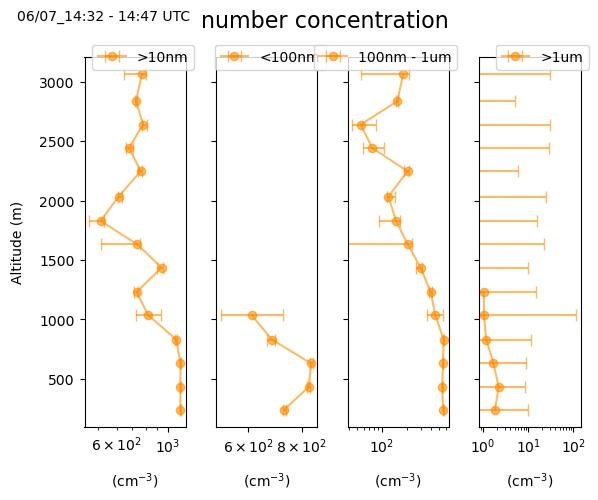

In [39]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY7_subset_median['CNgt10nm_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY7_subset_median['nSMPS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY7_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY7_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/07_14:32 - 14:47 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


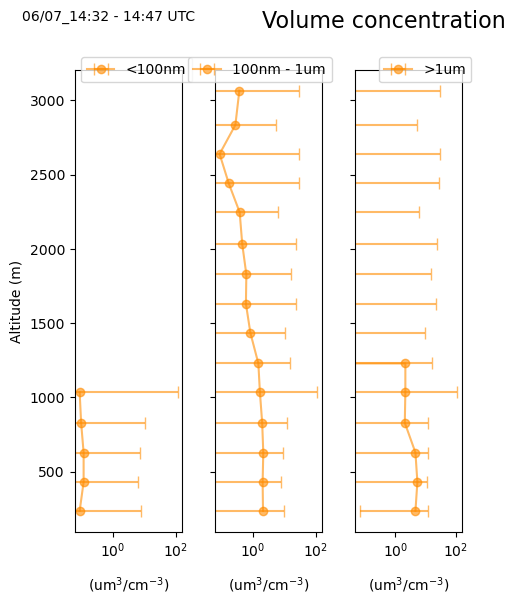

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY7_subset_median['vSMPS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY7_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY7_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY7_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7_subset_25['CNgt10nm_ZIEMBA'], DAY7_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/07_14:32 - 14:47 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [41]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220607_R0_L2_20230625T113222.ict')
DAY7b['3/10'] = DAY7b['CNgt3nm_ZIEMBA']/DAY7b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
DAY7b_subset = DAY7b[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY7b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10420 2022-06-07 19:08:00 2022-06-07 19:08:01           32.242823  \
10421 2022-06-07 19:08:01 2022-06-07 19:08:02           32.243085   
10422 2022-06-07 19:08:02 2022-06-07 19:08:03           32.243347   
10423 2022-06-07 19:08:03 2022-06-07 19:08:04           32.243610   
10424 2022-06-07 19:08:04 2022-06-07 19:08:05           32.243873   
...                   ...                 ...                 ...   
11315 2022-06-07 19:22:55 2022-06-07 19:22:56           32.296480   
11316 2022-06-07 19:22:56 2022-06-07 19:22:57           32.296519   
11317 2022-06-07 19:22:57 2022-06-07 19:22:58           32.296518   
11318 2022-06-07 19:22:58 2022-06-07 19:22:59           32.296479   
11319 2022-06-07 19:22:59 2022-06-07 19:23:00           32.296399   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10420           -65.003952                 133.320         1661.83  \
10421           -65.002775                 133.120         1482.43   
10422           -65.001596                 132.930         1343.59   
10423           -65.000416                 132.720         1879.32   
10424           -64.999235                 132.595         2663.03   
...                    ...                     ...             ...   
11315           -65.011792                3518.030         1651.75   
11316           -65.013093                3524.890         1651.04   
11317           -65.014396                3531.840         1730.83   
11318           -65.015699                3538.850         1770.43   
11319           -65.017001                3545.900         1794.06   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10420          1280.81                 624.390                        244.365  \
10421          1137.87                 570.225                        267.975   
10422          1039.63                 495.805                        264.930   
10423          1373.12                 496.615                        283.615   
10424          1890.83                 524.845                        290.545   
...                ...                     ...                            ...   
11315          1200.27                 863.765                        263.255   
11316          1225.66                 901.115                        263.610   
11317          1245.77                 915.595                        268.715   
11318          1251.20                 902.450                        269.145   
11319          1248.93                 906.090                        259.840   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10420                         20.950                          0.815  \
10421                         24.875                          1.170   
10422                         23.455                          1.080   
10423                         28.370                          1.495   
10424                         32.845                          2.020   
...                              ...                            ...   
11315                         18.155                          0.525   
11316                         18.415                          0.535   
11317                         19.870                          0.710   
11318                         19.350                          0.670   
11319                         17.710                          0.495   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10420                       1.560                      25.370  \
10421                       1.040                      18.895   
10422                       0.515                      10.255   
10423                       1.165                      12.290   
10424                       3.115                      12.240   
...                           ...                         ...   
11315                       0.000                       0.000   

In [42]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7b_subset.GPS_Altitude_THORNHILL.min(), DAY7b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7b_subset['Bins'] = pd.cut(DAY7b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7b_subset_1000 = DAY7b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7b = DAY7b_subset_1000[start_index:stop_index]
DAY1000_subset_7b

Time_Start               Time_Stop   
Bins                                                                 
(132.595, 166.728] 2022-06-07 19:08:09.000 2022-06-07 19:08:10.000  \
(166.728, 200.861] 2022-06-07 19:08:21.500 2022-06-07 19:08:22.500   
(200.861, 234.994] 2022-06-07 19:08:31.500 2022-06-07 19:08:32.500   
(234.994, 269.127] 2022-06-07 19:08:42.500 2022-06-07 19:08:43.500   
(269.127, 303.26]  2022-06-07 19:08:51.500 2022-06-07 19:08:52.500   
(303.26, 337.393]  2022-06-07 19:09:01.500 2022-06-07 19:09:02.500   
(337.393, 371.526] 2022-06-07 19:09:12.000 2022-06-07 19:09:13.000   
(371.526, 405.659] 2022-06-07 19:09:23.500 2022-06-07 19:09:24.500   
(405.659, 439.792] 2022-06-07 19:09:35.000 2022-06-07 19:09:36.000   
(439.792, 473.926] 2022-06-07 19:09:45.000 2022-06-07 19:09:46.000   
(473.926, 508.059] 2022-06-07 19:09:56.000 2022-06-07 19:09:57.000   
(508.059, 542.192] 2022-06-07 19:10:07.000 2022-06-07 19:10:08.000   
(542.192, 576.325] 2022-06-07 19:10:17.500 2022-06-07 19:10:18.500   
(576.325, 610.458] 2022-06-07 19:10:27.000 2022-06-07 19:10:28.000   
(610.458, 644.591] 2022-06-07 19:10:36.500 2022-06-07 19:10:37.500   
(644.591, 678.724] 2022-06-07 19:10:47.000 2022-06-07 19:10:48.000   
(678.724, 712.857] 2022-06-07 19:10:57.000 2022-06-07 19:10:58.000   
(712.857, 746.99]  2022-06-07 19:11:07.000 2022-06-07 19:11:08.000   
(746.99, 781.123]  2022-06-07 19:11:17.000 2022-06-07 19:11:18.000   
(781.123, 815.256] 2022-06-07 19:11:26.000 2022-06-07 19:11:27.000   
(815.256, 849.389] 2022-06-07 19:11:36.500 2022-06-07 19:11:37.500   
(849.389, 883.522] 2022-06-07 19:11:48.000 2022-06-07 19:11:49.000   
(883.522, 917.655] 2022-06-07 19:11:58.500 2022-06-07 19:11:59.500   
(917.655, 951.788] 2022-06-07 19:12:08.000 2022-06-07 19:12:09.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(132.595, 166.728]           32.245348           -64.993377  \
(166.728, 200.861]           32.252398           -64.980762   
(200.861, 234.994]           32.261138           -64.974323   
(234.994, 269.127]           32.272447           -64.972235   
(269.127, 303.26]            32.281722           -64.974383   
(303.26, 337.393]            32.290928           -64.980598   
(337.393, 371.526]           32.298341           -64.990692   
(371.526, 405.659]           32.302729           -65.004544   
(405.659, 439.792]           32.302622           -65.019577   
(439.792, 473.926]           32.298797           -65.031947   
(473.926, 508.059]           32.291068           -65.043194   
(508.059, 542.192]           32.280580           -65.050700   
(542.192, 576.325]           32.269203           -65.053448   
(576.325, 610.458]           32.258856           -65.052218   
(610.458, 644.591]           32.249453           -65.047326   
(644.591, 678.724]           32.241119           -65.038455   
(678.724, 712.857]           32.236008           -65.027503   
(712.857, 746.99]            32.234334           -65.015301   
(746.99, 781.123]            32.235821           -65.003165   
(781.123, 815.256]           32.240078           -64.993359   
(815.256, 849.389]           32.247877           -64.984375   
(849.389, 883.522]           32.258929           -64.978618   
(883.522, 917.655]           32.270104           -64.977848   
(917.655, 951.788]           32.279973           -64.980949   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(132.595, 166.728]                138.9650        2307.780        1761.0700  \
(166.728, 200.861]                183.5400        3029.955        2364.1950   
(200.861, 234.994]                217.5125        3701.290        2790.9450   
(234.994, 269.127]                251.5325        1679.705        1335.1850   
(269.127, 303.26]                 286.8050        1173.770         898.7525   
(303.26, 337.393]  

In [43]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7b_subset_3000 = DAY7b_subset_1000[start_index:stop_index]
DAY7b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(985.921, 1020.054]  2022-06-07 19:12:28.500 2022-06-07 19:12:29.500  \
(1020.054, 1054.187] 2022-06-07 19:12:38.500 2022-06-07 19:12:39.500   
(1054.187, 1088.32]  2022-06-07 19:12:48.000 2022-06-07 19:12:49.000   
(1088.32, 1122.453]  2022-06-07 19:12:58.500 2022-06-07 19:12:59.500   
(1122.453, 1156.586] 2022-06-07 19:13:10.500 2022-06-07 19:13:11.500   
...                                      ...                     ...   
(3306.969, 3341.102] 2022-06-07 19:22:24.000 2022-06-07 19:22:25.000   
(3341.102, 3375.235] 2022-06-07 19:22:29.500 2022-06-07 19:22:30.500   
(3375.235, 3409.368] 2022-06-07 19:22:35.000 2022-06-07 19:22:36.000   
(3409.368, 3443.501] 2022-06-07 19:22:40.500 2022-06-07 19:22:41.500   
(3443.501, 3477.634] 2022-06-07 19:22:46.000 2022-06-07 19:22:47.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(985.921, 1020.054]            32.296267           -64.998305  \
(1020.054, 1054.187]           32.300110           -65.010330   
(1054.187, 1088.32]            32.300666           -65.022512   
(1088.32, 1122.453]            32.297754           -65.035518   
(1122.453, 1156.586]           32.290292           -65.048118   
...                                  ...                  ...   
(3306.969, 3341.102]           32.278740           -64.979743   
(3341.102, 3375.235]           32.283576           -64.983815   
(3375.235, 3409.368]           32.287903           -64.988645   
(3409.368, 3443.501]           32.291590           -64.994190   
(3443.501, 3477.634]           32.294367           -65.000457   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(985.921, 1020.054]                 1003.240        8437.260        6185.6600  \
(1020.054, 1054.187]                1036.910       11019.550        8014.7200   
(1054.187, 1088.32]                 1072.330       12405.400        9405.1900   
(1088.32, 1122.453]                 1104.765       12027.400        8984.3550   
(1122.453, 1156.586]                1140.005        6863.830        4750.4900   
...                                      ...             ...              ...   
(3306.969, 3341.102]                3325.470        1058.320         725.8150   
(3341.102, 3375.235]                3359.530        1084.735         777.3225   
(3375.235, 3409.368]                3393.950        1175.640         822.6900   
(3409.368, 3443.501]                3427.120        1312.795         917.2900   
(3443.501, 3477.634]                3459.850        1386.460         984.3000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(985.921, 1020.054]                1450.7500                       595.9500  \
(1020.054, 1054.187]               1999.4500                       654.6775   
(1054.187, 1088.32]                2068.9100                       690.2150   
(1088.32, 1122.453]                2036.4650                       668.1750   
(1122.453, 1156.586]               1071.2950                       488.3075   
...                                      ...                            ...   
(3306.969, 3341.102]                457.1950                       132.0950   
(3341.102, 3375.235]                497.9000                       126.2175   
(3375.235, 3409.368]                561.2700                       148.0550   
(3409.368, 3443.501]                632.9575                       175.3050   
(3443.501, 3477.634]                691.3600                       196.0650   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(985.921, 1020.054]                         46.5075  \
(102

In [44]:
nbins = 15
bins = np.linspace(DAY7b_subset.GPS_Altitude_THORNHILL.min(), DAY7b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7b_subset['Bins'] = pd.cut(DAY7b_subset['GPS_Altitude_THORNHILL'], bins)
DAY7b_subset_median = DAY7b_subset.groupby('Bins').median()
DAY7b_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(132.595, 360.149]   2022-06-07 19:08:37.000 2022-06-07 19:08:38.000  \
(360.149, 587.702]   2022-06-07 19:09:49.500 2022-06-07 19:09:50.500   
(587.702, 815.256]   2022-06-07 19:10:58.000 2022-06-07 19:10:59.000   
(815.256, 1042.81]   2022-06-07 19:12:05.500 2022-06-07 19:12:06.500   
(1042.81, 1270.363]  2022-06-07 19:13:17.000 2022-06-07 19:13:18.000   
(1270.363, 1497.917] 2022-06-07 19:14:31.000 2022-06-07 19:14:32.000   
(1497.917, 1725.471] 2022-06-07 19:15:44.000 2022-06-07 19:15:45.000   
(1725.471, 1953.024] 2022-06-07 19:17:02.000 2022-06-07 19:17:03.000   
(1953.024, 2180.578] 2022-06-07 19:18:23.000 2022-06-07 19:18:24.000   
(2180.578, 2408.132] 2022-06-07 19:19:33.500 2022-06-07 19:19:34.500   
(2408.132, 2635.685] 2022-06-07 19:20:23.000 2022-06-07 19:20:24.000   
(2635.685, 2863.239] 2022-06-07 19:20:58.000 2022-06-07 19:20:59.000   
(2863.239, 3090.793] 2022-06-07 19:21:32.500 2022-06-07 19:21:33.500   
(3090.793, 3318.346] 2022-06-07 19:22:06.000 2022-06-07 19:22:07.000   
(3318.346, 3545.9]   2022-06-07 19:22:41.000 2022-06-07 19:22:42.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.595, 360.149]             32.266677           -64.979436  \
(360.149, 587.702]             32.296040           -65.036922   
(587.702, 815.256]             32.238704           -65.026317   
(815.256, 1042.81]             32.277455           -64.983657   
(1042.81, 1270.363]            32.284744           -65.053327   
(1270.363, 1497.917]           32.236489           -65.012432   
(1497.917, 1725.471]           32.289855           -64.997691   
(1725.471, 1953.024]           32.250451           -65.052358   
(1953.024, 2180.578]           32.242695           -64.976993   
(2180.578, 2408.132]           32.285689           -65.013366   
(2408.132, 2635.685]           32.250307           -65.049126   
(2635.685, 2863.239]           32.218963           -65.029027   
(2863.239, 3090.793]           32.227145           -64.987332   
(3090.793, 3318.346]           32.260443           -64.973520   
(3318.346, 3545.9]             32.291890           -64.994727   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(132.595, 360.149]                  233.2100       1888.8800        1607.5000  \
(360.149, 587.702]                  471.6150       1217.0150         949.3875   
(587.702, 815.256]                  698.2650       4215.1900        3080.0100   
(815.256, 1042.81]                  926.9575       6133.5100        4312.9950   
(1042.81, 1270.363]                1159.3700       5166.7700        3556.3500   
(1270.363, 1497.917]               1372.6100        871.6100         686.8300   
(1497.917, 1725.471]               1607.9300        649.4050         482.2400   
(1725.471, 1953.024]               1837.0400        812.9850         609.6200   
(1953.024, 2180.578]               2063.2100        688.8800         498.9900   
(2180.578, 2408.132]               2278.9250       1053.6000         774.0100   
(2408.132, 2635.685]               2526.9300        968.5950         700.9150   
(2635.685, 2863.239]               2749.1800       1018.8300         740.2500   
(2863.239, 3090.793]               2977.4250        819.8775         585.6575   
(3090.793, 3318.346]               3202.8000        888.0900         614.3250   
(3318.346, 3545.9]                 3429.9700       1348.0400         931.9400   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(132.595, 360.149]                  489.5800                       256.0750  \
(360.149, 587.702]                  449.0075                       238.2900   
(587.702,

In [45]:
DAY7b_subset_25 = DAY7b_subset_median - DAY7b_subset.groupby('Bins').quantile(.25)
DAY7b_subset_25
DAY7b_subset_75 = DAY7b_subset.groupby('Bins').quantile(.75) - DAY7b_subset_median
DAY7b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(132.595, 360.149]             0 days 00:00:18           0 days 00:00:18  \
(360.149, 587.702]   0 days 00:00:17.749999872 0 days 00:00:17.749999872   
(587.702, 815.256]             0 days 00:00:16           0 days 00:00:16   
(815.256, 1042.81]   0 days 00:00:17.250000128 0 days 00:00:17.250000128   
(1042.81, 1270.363]            0 days 00:00:18           0 days 00:00:18   
(1270.363, 1497.917]    0 days 00:00:18.500000    0 days 00:00:18.500000   
(1497.917, 1725.471]    0 days 00:00:17.500000    0 days 00:00:17.500000   
(1725.471, 1953.024]           0 days 00:00:21           0 days 00:00:21   
(1953.024, 2180.578]           0 days 00:00:19           0 days 00:00:19   
(2180.578, 2408.132] 0 days 00:00:15.749999872 0 days 00:00:15.749999872   
(2408.132, 2635.685]    0 days 00:00:08.500000    0 days 00:00:08.500000   
(2635.685, 2863.239]    0 days 00:00:08.500000    0 days 00:00:08.500000   
(2863.239, 3090.793] 0 days 00:00:08.250000128 0 days 00:00:08.250000128   
(3090.793, 3318.346]           0 days 00:00:08           0 days 00:00:08   
(3318.346, 3545.9]             0 days 00:00:09           0 days 00:00:09   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.595, 360.149]              0.018442             0.005336  \
(360.149, 587.702]              0.005788             0.021591   
(587.702, 815.256]              0.006051             0.019595   
(815.256, 1042.81]              0.015235             0.004433   
(1042.81, 1270.363]             0.012787             0.017221   
(1270.363, 1497.917]            0.006774             0.020150   
(1497.917, 1725.471]            0.004459             0.013682   
(1725.471, 1953.024]            0.022955             0.010020   
(1953.024, 2180.578]            0.018873             0.005739   
(2180.578, 2408.132]            0.003129             0.019230   
(2408.132, 2635.685]            0.008979             0.001704   
(2635.685, 2863.239]            0.005057             0.010911   
(2863.239, 3090.793]            0.007018             0.006882   
(3090.793, 3318.346]            0.008480             0.000873   
(3318.346, 3545.9]              0.003803             0.008808   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(132.595, 360.149]                  69.29000      1180.53000        802.68000  \
(360.149, 587.702]                  54.50625       118.86000         78.33250   
(587.702, 815.256]                  54.73500      1208.79000        844.94000   
(815.256, 1042.81]                  57.84875      1259.88500        967.37250   
(1042.81, 1270.363]                 57.09000      6380.73000       5203.55000   
(1270.363, 1497.917]                58.36500       157.80500         99.16750   
(1497.917, 1725.471]                55.91500        54.89500         61.06500   
(1725.471, 1953.024]                55.00000        56.68000         35.40000   
(1953.024, 2180.578]                53.26000        23.17500         10.69000   
(2180.578, 2408.132]                45.73750       101.29500         67.57250   
(2408.132, 2635.685]                51.96500       117.28500         64.87000   
(2635.685, 2863.239]                59.59000        23.36000         30.55250   
(2863.239, 3090.793]                54.56750        67.54625         28.04875   
(3090.793, 3318.346]                57.50000        93.47000         59.41000   
(3318.346, 3545.9]                  55.16000       303.00000        227.59000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(132.595, 360.149]                   83.0900                       19.33500  \
(360.149, 587.702]    

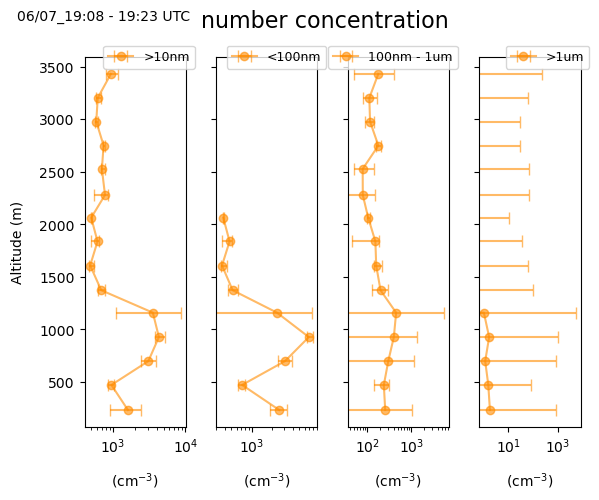

In [46]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '9'
ax[0].errorbar(DAY7b_subset_median['CNgt10nm_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY7b_subset_median['nSMPS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY7b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY7b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/07_19:08 - 19:23 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


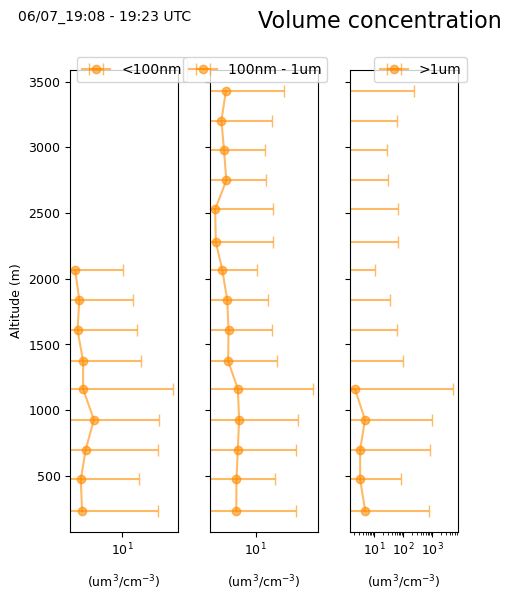

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY7b_subset_median['vSMPS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY7b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY7b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY7b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY7b_subset_25['CNgt10nm_ZIEMBA'], DAY7b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/07_19:08 - 19:23 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [48]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220608_R0_L2_20230625T113223.ict')
DAY8['3/10'] = DAY8['CNgt3nm_ZIEMBA']/DAY8['CNgt10nm_ZIEMBA']
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset= DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subsetstart_col2 = 'CNgt3nm_ZIEMBA'

# Print the modified subset dataframe
DAY8_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10668 2022-06-08 20:30:00 2022-06-08 20:30:01           32.267080  \
10669 2022-06-08 20:30:01 2022-06-08 20:30:02           32.268158   
10670 2022-06-08 20:30:02 2022-06-08 20:30:03           32.269234   
10671 2022-06-08 20:30:03 2022-06-08 20:30:04           32.270310   
10672 2022-06-08 20:30:04 2022-06-08 20:30:05           32.271382   
...                   ...                 ...                 ...   
11563 2022-06-08 20:44:55 2022-06-08 20:44:56           32.251172   
11564 2022-06-08 20:44:56 2022-06-08 20:44:57           32.250122   
11565 2022-06-08 20:44:57 2022-06-08 20:44:58           32.249088   
11566 2022-06-08 20:44:58 2022-06-08 20:44:59           32.248074   
11567 2022-06-08 20:44:59 2022-06-08 20:45:00           32.247079   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10668           -64.998961                 152.725         821.060  \
10669           -64.999178                 153.350         852.060   
10670           -64.999434                 153.870         880.495   
10671           -64.999724                 154.255         857.660   
10672           -65.000051                 154.510         827.165   
...                    ...                     ...             ...   
11563           -65.086081                3838.620        3281.520   
11564           -65.085465                3847.170        3293.140   
11565           -65.084808                3855.660        3305.780   
11566           -65.084107                3864.100        3302.420   
11567           -65.083364                3872.460        3355.930   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10668          705.605                 332.080                        305.640  \
10669          708.400                 330.620                        331.195   
10670          707.050                 329.955                        350.695   
10671          698.910                 331.855                        346.920   
10672          692.045                 334.895                        328.180   
...                ...                     ...                            ...   
11563         2328.360                1602.230                        271.575   
11564         2330.700                1611.740                        278.340   
11565         2332.940                1613.300                        275.080   
11566         2367.110                1615.010                        279.285   
11567         2393.070                1632.370                        279.130   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10668                         30.115                          1.380  \
10669                         30.970                          1.210   
10670                         31.040                          1.045   
10671                         31.230                          1.065   
10672                         29.790                          1.000   
...                              ...                            ...   
11563                         17.210                          0.475   
11564                         17.130                          0.450   
11565                         17.680                          0.545   
11566                         17.890                          0.555   
11567                         16.760                          0.430   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10668                       1.165                       8.505  \
10669                       1.170                       4.620   
10670                       1.170                       4.620   
10671                       1.170                       4.625   
10672                       1.820                       6.665   
...                           ...                         ...   
11563                       0.000                       0.000   

In [49]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY8_subset.GPS_Altitude_THORNHILL.min(), DAY8_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY8_subset['Bins'] = pd.cut(DAY8_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY8_subset_1000 = DAY8_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_8 = DAY8_subset_1000[start_index:stop_index]
DAY1000_subset_8


Time_Start               Time_Stop   
Bins                                                                 
(147.455, 184.705] 2022-06-08 20:30:28.000 2022-06-08 20:30:29.000  \
(184.705, 221.955] 2022-06-08 20:31:07.000 2022-06-08 20:31:08.000   
(221.955, 259.205] 2022-06-08 20:31:21.500 2022-06-08 20:31:22.500   
(259.205, 296.455] 2022-06-08 20:31:32.500 2022-06-08 20:31:33.500   
(296.455, 333.705] 2022-06-08 20:31:44.000 2022-06-08 20:31:45.000   
(333.705, 370.955] 2022-06-08 20:31:54.500 2022-06-08 20:31:55.500   
(370.955, 408.205] 2022-06-08 20:32:04.500 2022-06-08 20:32:05.500   
(408.205, 445.455] 2022-06-08 20:32:15.500 2022-06-08 20:32:16.500   
(445.455, 482.705] 2022-06-08 20:32:27.000 2022-06-08 20:32:28.000   
(482.705, 519.956] 2022-06-08 20:32:38.000 2022-06-08 20:32:39.000   
(519.956, 557.206] 2022-06-08 20:32:49.500 2022-06-08 20:32:50.500   
(557.206, 594.456] 2022-06-08 20:33:01.000 2022-06-08 20:33:02.000   
(594.456, 631.706] 2022-06-08 20:33:12.000 2022-06-08 20:33:13.000   
(631.706, 668.956] 2022-06-08 20:33:24.000 2022-06-08 20:33:25.000   
(668.956, 706.206] 2022-06-08 20:33:36.500 2022-06-08 20:33:37.500   
(706.206, 743.456] 2022-06-08 20:33:49.000 2022-06-08 20:33:50.000   
(743.456, 780.706] 2022-06-08 20:34:02.000 2022-06-08 20:34:03.000   
(780.706, 817.956] 2022-06-08 20:34:14.500 2022-06-08 20:34:15.500   
(817.956, 855.206] 2022-06-08 20:34:25.500 2022-06-08 20:34:26.500   
(855.206, 892.456] 2022-06-08 20:34:36.000 2022-06-08 20:34:37.000   
(892.456, 929.706] 2022-06-08 20:34:47.500 2022-06-08 20:34:48.500   
(929.706, 966.956] 2022-06-08 20:34:59.000 2022-06-08 20:35:00.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(147.455, 184.705]           32.293626           -65.017848  \
(184.705, 221.955]           32.300051           -65.066294   
(221.955, 259.205]           32.291698           -65.080461   
(259.205, 296.455]           32.282742           -65.087275   
(296.455, 333.705]           32.272093           -65.089858   
(333.705, 370.955]           32.262326           -65.088323   
(370.955, 408.205]           32.253920           -65.083280   
(408.205, 445.455]           32.246596           -65.074434   
(445.455, 482.705]           32.241922           -65.062468   
(482.705, 519.956]           32.240900           -65.049634   
(519.956, 557.206]           32.243474           -65.036152   
(557.206, 594.456]           32.249755           -65.023968   
(594.456, 631.706]           32.258675           -65.014722   
(631.706, 668.956]           32.270726           -65.008395   
(668.956, 706.206]           32.284573           -65.006743   
(706.206, 743.456]           32.298296           -65.010078   
(743.456, 780.706]           32.310914           -65.018719   
(780.706, 817.956]           32.319232           -65.031879   
(817.956, 855.206]           32.321653           -65.045738   
(855.206, 892.456]           32.319711           -65.058665   
(892.456, 929.706]           32.312996           -65.070135   
(929.706, 966.956]           32.303382           -65.077696   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(147.455, 184.705]                154.5400        859.1300         705.5100  \
(184.705, 221.955]                198.9850        852.8800         697.7050   
(221.955, 259.205]                242.1600        832.7450         669.4975   
(259.205, 296.455]                278.0025        795.3100         667.7975   
(296.455, 333.705]                314.4600        817.5100         663.1150   
(333.705, 370.955]                352.5375        805.1000         661.8875   
(370.955, 408.205]                389.1225        802.8825         662.3575   
(408.205, 445.455]                425.9075        801.4975         658.4200   
(445.455, 482.705]                462.3600      

In [50]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY8_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY8_subset_3000 = DAY8_subset_1000[start_index:stop_index]
DAY8_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1004.206, 1041.456] 2022-06-08 20:35:22.000 2022-06-08 20:35:23.000  \
(1041.456, 1078.706] 2022-06-08 20:35:35.000 2022-06-08 20:35:36.000   
(1078.706, 1115.956] 2022-06-08 20:35:48.500 2022-06-08 20:35:49.500   
(1115.956, 1153.206] 2022-06-08 20:36:00.500 2022-06-08 20:36:01.500   
(1153.206, 1190.456] 2022-06-08 20:36:12.500 2022-06-08 20:36:13.500   
...                                      ...                     ...   
(3276.459, 3313.709] 2022-06-08 20:43:51.000 2022-06-08 20:43:52.000   
(3313.709, 3350.959] 2022-06-08 20:43:55.500 2022-06-08 20:43:56.500   
(3350.959, 3388.209] 2022-06-08 20:44:00.000 2022-06-08 20:44:01.000   
(3388.209, 3425.459] 2022-06-08 20:44:04.500 2022-06-08 20:44:05.500   
(3425.459, 3462.709] 2022-06-08 20:44:08.500 2022-06-08 20:44:09.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1004.206, 1041.456]           32.281187           -65.081965  \
(1041.456, 1078.706]           32.268765           -65.078655   
(1078.706, 1115.956]           32.257159           -65.071069   
(1115.956, 1153.206]           32.249873           -65.060165   
(1153.206, 1190.456]           32.247776           -65.046364   
...                                  ...                  ...   
(3276.459, 3313.709]           32.296100           -65.043959   
(3313.709, 3350.959]           32.297077           -65.049657   
(3350.959, 3388.209]           32.297241           -65.055479   
(3388.209, 3425.459]           32.296577           -65.061269   
(3425.459, 3462.709]           32.295317           -65.066265   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(1004.206, 1041.456]                1020.120       4941.3500        3346.3100  \
(1041.456, 1078.706]                1060.190        827.8750         647.2200   
(1078.706, 1115.956]                1096.685        831.7200         648.9475   
(1115.956, 1153.206]                1134.755        806.5275         627.7050   
(1153.206, 1190.456]                1173.080        746.6675         591.3775   
...                                      ...             ...              ...   
(3276.459, 3313.709]                3293.800       1667.9900        1204.6400   
(3313.709, 3350.959]                3332.045       1735.4100        1286.1250   
(3350.959, 3388.209]                3370.540       2179.7200        1565.3800   
(3388.209, 3425.459]                3408.710       2201.3450        1660.9800   
(3425.459, 3462.709]                3442.235       2766.4800        1962.4850   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(1004.206, 1041.456]               2016.1400                       222.1950  \
(1041.456, 1078.706]                332.0700                       245.6350   
(1078.706, 1115.956]                334.3025                       286.0900   
(1115.956, 1153.206]                325.2275                       275.8350   
(1153.206, 1190.456]                335.4325                       235.8925   
...                                      ...                            ...   
(3276.459, 3313.709]                783.8600                       189.3050   
(3313.709, 3350.959]                899.4875                       207.3850   
(3350.959, 3388.209]                946.8100                       220.1450   
(3388.209, 3425.459]               1025.6350                       223.1000   
(3425.459, 3462.709]                930.0975                       211.5725   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(1004.206, 1041.456]                       105.3350  \
(104

In [51]:
nbins = 15
bins8 = np.linspace(DAY8_subset.GPS_Altitude_THORNHILL.min(), DAY8_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY8_subset['Bins'] = pd.cut(DAY8_subset['GPS_Altitude_THORNHILL'], bins8)
DAY8_subset_median = DAY8_subset.groupby('Bins').median()
DAY8_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(147.455, 395.789]   2022-06-08 20:31:03.500 2022-06-08 20:31:04.500  \
(395.789, 644.122]   2022-06-08 20:32:43.500 2022-06-08 20:32:44.500   
(644.122, 892.456]   2022-06-08 20:34:01.000 2022-06-08 20:34:02.000   
(892.456, 1140.79]   2022-06-08 20:35:22.000 2022-06-08 20:35:23.000   
(1140.79, 1389.123]  2022-06-08 20:36:50.000 2022-06-08 20:36:51.000   
(1389.123, 1637.457] 2022-06-08 20:38:06.500 2022-06-08 20:38:07.500   
(1637.457, 1885.791] 2022-06-08 20:39:07.500 2022-06-08 20:39:08.500   
(1885.791, 2134.124] 2022-06-08 20:40:08.000 2022-06-08 20:40:09.000   
(2134.124, 2382.458] 2022-06-08 20:41:03.500 2022-06-08 20:41:04.500   
(2382.458, 2630.792] 2022-06-08 20:41:58.500 2022-06-08 20:41:59.500   
(2630.792, 2879.125] 2022-06-08 20:42:43.000 2022-06-08 20:42:44.000   
(2879.125, 3127.459] 2022-06-08 20:43:15.000 2022-06-08 20:43:16.000   
(3127.459, 3375.793] 2022-06-08 20:43:45.500 2022-06-08 20:43:46.500   
(3375.793, 3624.126] 2022-06-08 20:44:15.500 2022-06-08 20:44:16.500   
(3624.126, 3872.46]  2022-06-08 20:44:45.000 2022-06-08 20:44:46.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(147.455, 395.789]             32.288607           -65.062232  \
(395.789, 644.122]             32.245655           -65.043112   
(644.122, 892.456]             32.310044           -65.017872   
(892.456, 1140.79]             32.281187           -65.077195   
(1140.79, 1389.123]            32.270571           -65.022850   
(1389.123, 1637.457]           32.293390           -65.069416   
(1637.457, 1885.791]           32.241974           -65.052378   
(1885.791, 2134.124]           32.272217           -65.012723   
(2134.124, 2382.458]           32.289566           -65.067338   
(2382.458, 2630.792]           32.239922           -65.081734   
(2630.792, 2879.125]           32.235580           -65.031042   
(2879.125, 3127.459]           32.266776           -65.017655   
(3127.459, 3375.793]           32.293833           -65.037392   
(3375.793, 3624.126]           32.291655           -65.074343   
(3624.126, 3872.46]            32.262346           -65.088752   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(147.455, 395.789]                  194.3750        836.5650         697.0700  \
(395.789, 644.122]                  520.9725        840.2400         674.9550   
(644.122, 892.456]                  758.1350        883.3500         696.3800   
(892.456, 1140.79]                 1020.1200        881.7100         676.8500   
(1140.79, 1389.123]                1291.5700        597.1100         460.6300   
(1389.123, 1637.457]               1512.1800        762.8175         588.4500   
(1637.457, 1885.791]               1771.5200        708.8250         535.7875   
(1885.791, 2134.124]               2010.1800        888.1850         663.1000   
(2134.124, 2382.458]               2258.2500        967.3800         723.4850   
(2382.458, 2630.792]               2507.3450       1018.9000         760.2975   
(2630.792, 2879.125]               2749.1300        964.4700         703.7650   
(2879.125, 3127.459]               3002.9700        854.6550         644.5850   
(3127.459, 3375.793]               3247.4300       1593.8400        1166.2150   
(3375.793, 3624.126]               3500.0550       2722.5400        1964.1350   
(3624.126, 3872.46]                3750.7300       3200.8400        2287.4200   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(147.455, 395.789]                  330.8700                       293.3950  \
(395.789, 644.122]                  325.0000                       287.8625   
(644.122,

In [52]:
DAY8_subset_25 = DAY8_subset_median - DAY8_subset.groupby('Bins').quantile(.25)
DAY8_subset_25
DAY8_subset_75 = DAY8_subset.groupby('Bins').quantile(.75) - DAY8_subset_median
DAY8_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(147.455, 395.789]   0 days 00:00:31.250000128 0 days 00:00:31.250000128  \
(395.789, 644.122]   0 days 00:00:18.250000128 0 days 00:00:18.250000128   
(644.122, 892.456]             0 days 00:00:20           0 days 00:00:20   
(892.456, 1140.79]             0 days 00:00:20           0 days 00:00:20   
(1140.79, 1389.123]     0 days 00:00:23.500000    0 days 00:00:23.500000   
(1389.123, 1637.457] 0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(1637.457, 1885.791] 0 days 00:00:15.749999872 0 days 00:00:15.749999872   
(1885.791, 2134.124]           0 days 00:00:14           0 days 00:00:14   
(2134.124, 2382.458] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(2382.458, 2630.792] 0 days 00:00:13.749999872 0 days 00:00:13.749999872   
(2630.792, 2879.125]           0 days 00:00:08           0 days 00:00:08   
(2879.125, 3127.459]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(3127.459, 3375.793] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3375.793, 3624.126] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3624.126, 3872.46]            0 days 00:00:07           0 days 00:00:07   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(147.455, 395.789]              0.010341             0.040722  \
(395.789, 644.122]              0.005639             0.019860   
(644.122, 892.456]              0.009667             0.009477   
(892.456, 1140.79]              0.019422             0.006486   
(1140.79, 1389.123]             0.023335             0.008582   
(1389.123, 1637.457]            0.009494             0.012081   
(1637.457, 1885.791]            0.008788             0.018264   
(1885.791, 2134.124]            0.011954             0.003389   
(2134.124, 2382.458]            0.003271             0.015619   
(2382.458, 2630.792]            0.013137             0.013831   
(2630.792, 2879.125]            0.006296             0.007089   
(2879.125, 3127.459]            0.007983             0.000771   
(3127.459, 3375.793]            0.002741             0.007569   
(3375.793, 3624.126]            0.003760             0.008384   
(3624.126, 3872.46]             0.008066             0.001571   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(147.455, 395.789]                  90.42750        25.78875          8.38125  \
(395.789, 644.122]                  57.81625        18.65250         15.69750   
(644.122, 892.456]                  61.40500        11.63500          7.75500   
(892.456, 1140.79]                  57.37000       625.39000        483.79000   
(1140.79, 1389.123]                 46.27500       140.97000        102.19250   
(1389.123, 1637.457]                56.43000       141.67000        104.78000   
(1637.457, 1885.791]                66.58500        83.93625         69.20875   
(1885.791, 2134.124]                68.27000        39.34500         15.01000   
(2134.124, 2382.458]                43.94750        27.46375         11.01875   
(2382.458, 2630.792]                62.02250        54.15000         32.22875   
(2630.792, 2879.125]                60.20000        40.52000         21.07500   
(2879.125, 3127.459]                56.91500       226.35500        142.87750   
(3127.459, 3375.793]                61.19250       107.50000         49.57250   
(3375.793, 3624.126]                59.13250       203.28000         75.92750   
(3624.126, 3872.46]                 61.97000        49.61000         42.94000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(147.455, 395.789]                   2.98875                       13.99875  \
(395.789, 644.122]    

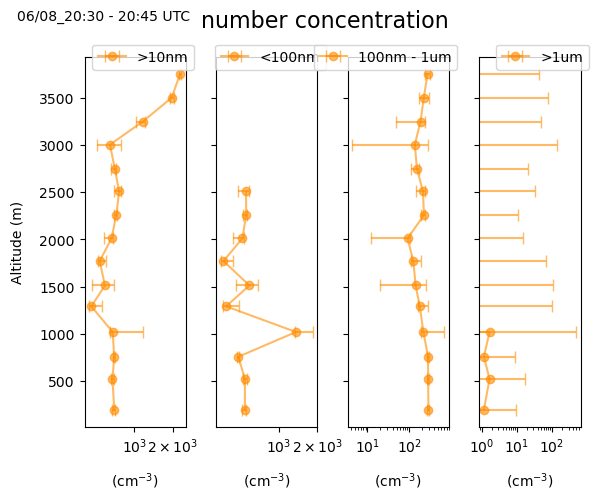

In [53]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY8_subset_median['CNgt10nm_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY8_subset_median['nSMPS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY8_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY8_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/08_20:30 - 20:45 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


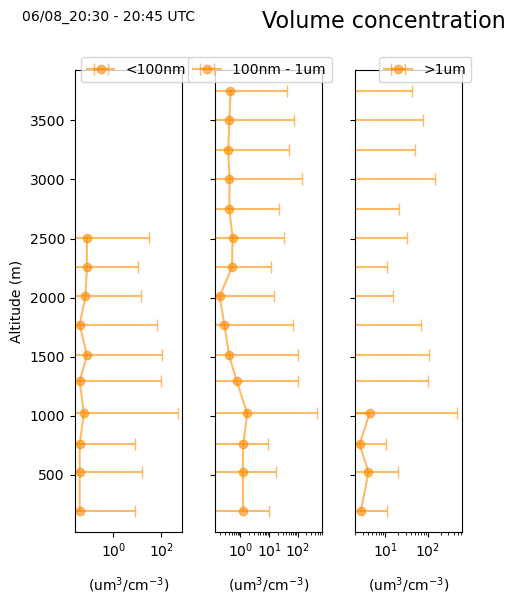

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY8_subset_median['vSMPS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY8_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY8_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY8_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY8_subset_25['CNgt10nm_ZIEMBA'], DAY8_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/08_20:30 - 20:45 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [55]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220610_R0_L1_20230625T113224.ict')
DAY10['3/10'] = DAY10['CNgt3nm_ZIEMBA']/DAY10['CNgt10nm_ZIEMBA']
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY10_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10616 2022-06-10 15:17:00 2022-06-10 15:17:01           32.206691  \
10617 2022-06-10 15:17:01 2022-06-10 15:17:02           32.207809   
10618 2022-06-10 15:17:02 2022-06-10 15:17:03           32.208928   
10619 2022-06-10 15:17:03 2022-06-10 15:17:04           32.210048   
10620 2022-06-10 15:17:04 2022-06-10 15:17:05           32.211167   
...                   ...                 ...                 ...   
11091 2022-06-10 15:24:55 2022-06-10 15:24:56           32.207088   
11092 2022-06-10 15:24:56 2022-06-10 15:24:57           32.207061   
11093 2022-06-10 15:24:57 2022-06-10 15:24:58           32.207068   
11094 2022-06-10 15:24:58 2022-06-10 15:24:59           32.207109   
11095 2022-06-10 15:24:59 2022-06-10 15:25:00           32.207184   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10616           -64.996969                 122.040         409.305  \
10617           -64.997169                 122.105         411.580   
10618           -64.997370                 122.170         399.215   
10619           -64.997569                 122.240         398.195   
10620           -64.997768                 122.315         407.955   
...                    ...                     ...             ...   
11091           -65.031191                3540.260        2180.280   
11092           -65.029663                3546.970        2121.320   
11093           -65.028134                3553.620        2255.900   
11094           -65.026603                3560.200        2365.720   
11095           -65.025073                3566.730        2356.610   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10616          361.145                 151.345                        155.525  \
10617          359.050                 153.430                        147.990   
10618          353.340                 150.835                        146.185   
10619          354.425                 152.940                        132.950   
10620          366.450                 156.080                        136.395   
...                ...                     ...                            ...   
11091         1647.380                 618.145                        146.510   
11092         1656.120                 605.730                        139.710   
11093         1672.590                 609.245                        141.455   
11094         1719.320                 630.165                        151.390   
11095         1758.400                 658.650                        155.255   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10616                         29.045                          2.060  \
10617                         27.425                          1.790   
10618                         26.465                          1.735   
10619                         20.625                          1.290   
10620                         22.455                          1.535   
...                              ...                            ...   
11091                         10.260                          0.355   
11092                         10.580                          0.460   
11093                         10.405                          0.425   
11094                         10.100                          0.280   
11095                         10.335                          0.290   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10616                       1.165                      18.325  \
10617                       0.520                       4.100   
10618                       1.690                      10.250   
10619                       3.775                      32.405   
10620                       3.770                      34.750   
...                           ...                         ...   
11091                       0.000                       0.000   

In [56]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10_subset.GPS_Altitude_THORNHILL.min(), DAY10_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10_subset['Bins'] = pd.cut(DAY10_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10_subset_1000 = DAY10_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10 = DAY10_subset_1000[start_index:stop_index]
DAY1000_subset_10

Time_Start               Time_Stop   
Bins                                                                 
(122.04, 156.487]  2022-06-10 15:17:25.000 2022-06-10 15:17:26.000  \
(156.487, 190.934] 2022-06-10 15:17:52.500 2022-06-10 15:17:53.500   
(190.934, 225.381] 2022-06-10 15:17:58.000 2022-06-10 15:17:59.000   
(225.381, 259.828] 2022-06-10 15:18:03.000 2022-06-10 15:18:04.000   
(259.828, 294.274] 2022-06-10 15:18:07.500 2022-06-10 15:18:08.500   
(294.274, 328.721] 2022-06-10 15:18:12.000 2022-06-10 15:18:13.000   
(328.721, 363.168] 2022-06-10 15:18:16.500 2022-06-10 15:18:17.500   
(363.168, 397.615] 2022-06-10 15:18:20.500 2022-06-10 15:18:21.500   
(397.615, 432.062] 2022-06-10 15:18:24.500 2022-06-10 15:18:25.500   
(432.062, 466.509] 2022-06-10 15:18:28.500 2022-06-10 15:18:29.500   
(466.509, 500.956] 2022-06-10 15:18:32.500 2022-06-10 15:18:33.500   
(500.956, 535.403] 2022-06-10 15:18:37.000 2022-06-10 15:18:38.000   
(535.403, 569.85]  2022-06-10 15:18:41.500 2022-06-10 15:18:42.500   
(569.85, 604.297]  2022-06-10 15:18:45.500 2022-06-10 15:18:46.500   
(604.297, 638.743] 2022-06-10 15:18:49.500 2022-06-10 15:18:50.500   
(638.743, 673.19]  2022-06-10 15:18:53.500 2022-06-10 15:18:54.500   
(673.19, 707.637]  2022-06-10 15:18:57.500 2022-06-10 15:18:58.500   
(707.637, 742.084] 2022-06-10 15:19:01.500 2022-06-10 15:19:02.500   
(742.084, 776.531] 2022-06-10 15:19:05.500 2022-06-10 15:19:06.500   
(776.531, 810.978] 2022-06-10 15:19:09.500 2022-06-10 15:19:10.500   
(810.978, 845.425] 2022-06-10 15:19:13.500 2022-06-10 15:19:14.500   
(845.425, 879.872] 2022-06-10 15:19:17.500 2022-06-10 15:19:18.500   
(879.872, 914.319] 2022-06-10 15:19:21.500 2022-06-10 15:19:22.500   
(914.319, 948.766] 2022-06-10 15:19:25.500 2022-06-10 15:19:26.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(122.04, 156.487]            32.234690           -65.001976  \
(156.487, 190.934]           32.265725           -65.007644   
(190.934, 225.381]           32.271651           -65.009660   
(225.381, 259.828]           32.276788           -65.012279   
(259.828, 294.274]           32.281187           -65.015215   
(294.274, 328.721]           32.285285           -65.018704   
(328.721, 363.168]           32.288983           -65.022752   
(363.168, 397.615]           32.291912           -65.026738   
(397.615, 432.062]           32.294488           -65.031034   
(432.062, 466.509]           32.296709           -65.035588   
(466.509, 500.956]           32.298555           -65.040360   
(500.956, 535.403]           32.300139           -65.045950   
(535.403, 569.85]            32.301162           -65.051706   
(569.85, 604.297]            32.301610           -65.056896   
(604.297, 638.743]           32.301634           -65.062103   
(638.743, 673.19]            32.301245           -65.067282   
(673.19, 707.637]            32.300460           -65.072388   
(707.637, 742.084]           32.299276           -65.077386   
(742.084, 776.531]           32.297617           -65.082190   
(776.531, 810.978]           32.295511           -65.086748   
(810.978, 845.425]           32.293010           -65.091025   
(845.425, 879.872]           32.290145           -65.094981   
(879.872, 914.319]           32.286949           -65.098580   
(914.319, 948.766]           32.283462           -65.101799   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(122.04, 156.487]                 123.7050        399.2150         355.6450  \
(156.487, 190.934]                173.7850        448.3125         385.3400   
(190.934, 225.381]                209.2900        395.1550         349.8850   
(225.381, 259.828]                244.1150        391.3750         342.9600   
(259.828, 294.274]                277.9725        401.5875         341.3600   
(294.274, 328.721] 

In [57]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10_subset_3000 = DAY10_subset_1000[start_index:stop_index]
DAY10_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(983.212, 1017.659]  2022-06-10 15:19:33.500 2022-06-10 15:19:34.500  \
(1017.659, 1052.106] 2022-06-10 15:19:37.500 2022-06-10 15:19:38.500   
(1052.106, 1086.553] 2022-06-10 15:19:41.500 2022-06-10 15:19:42.500   
(1086.553, 1121.0]   2022-06-10 15:19:45.000 2022-06-10 15:19:46.000   
(1121.0, 1155.447]   2022-06-10 15:19:48.500 2022-06-10 15:19:49.500   
...                                      ...                     ...   
(3291.155, 3325.602] 2022-06-10 15:24:24.000 2022-06-10 15:24:25.000   
(3325.602, 3360.049] 2022-06-10 15:24:29.000 2022-06-10 15:24:30.000   
(3360.049, 3394.496] 2022-06-10 15:24:33.500 2022-06-10 15:24:34.500   
(3394.496, 3428.942] 2022-06-10 15:24:38.000 2022-06-10 15:24:39.000   
(3428.942, 3463.389] 2022-06-10 15:24:42.500 2022-06-10 15:24:43.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(983.212, 1017.659]            32.275745           -65.106980  \
(1017.659, 1052.106]           32.271569           -65.108848   
(1052.106, 1086.553]           32.267229           -65.110177   
(1086.553, 1121.0]             32.263341           -65.110907   
(1121.0, 1155.447]             32.259401           -65.111223   
...                                  ...                  ...   
(3291.155, 3325.602]           32.223132           -65.072532   
(3325.602, 3360.049]           32.218854           -65.067099   
(3360.049, 3394.496]           32.215490           -65.061689   
(3394.496, 3428.942]           32.212625           -65.055858   
(3428.942, 3463.389]           32.210292           -65.049678   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(983.212, 1017.659]                 1002.010         817.365         678.5825  \
(1017.659, 1052.106]                1036.915         840.865         700.0500   
(1052.106, 1086.553]                1072.325         819.830         689.3950   
(1086.553, 1121.0]                  1103.920         832.295         688.3550   
(1121.0, 1155.447]                  1135.630         841.635         672.2850   
...                                      ...             ...              ...   
(3291.155, 3325.602]                3308.150        2397.980        1756.8600   
(3325.602, 3360.049]                3344.300        2491.780        1826.0500   
(3360.049, 3394.496]                3377.515        2507.925        1833.0050   
(3394.496, 3428.942]                3412.660        2616.950        1972.4900   
(3428.942, 3463.389]                3449.025        2533.950        1889.2850   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(983.212, 1017.659]                 432.6775                       236.4475  \
(1017.659, 1052.106]                477.7525                       229.0925   
(1052.106, 1086.553]                468.0500                       243.8175   
(1086.553, 1121.0]                  467.5300                       251.8850   
(1121.0, 1155.447]                  457.8075                       234.3525   
...                                      ...                            ...   
(3291.155, 3325.602]                478.4700                        94.1650   
(3325.602, 3360.049]                490.8900                       103.6300   
(3360.049, 3394.496]                511.5750                        94.4125   
(3394.496, 3428.942]                550.8050                       134.3850   
(3428.942, 3463.389]                569.7125                       135.0300   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(983.212, 1017.659]                         27.4450  \
(101

In [58]:
nbins = 15
bins10 = np.linspace(DAY10_subset.GPS_Altitude_THORNHILL.min(), DAY10_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10_subset['Bins'] = pd.cut(DAY10_subset['GPS_Altitude_THORNHILL'], bins10)
DAY10_subset_median = DAY10_subset.groupby('Bins').median()
DAY10_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(122.04, 351.686]    2022-06-10 15:17:38.500 2022-06-10 15:17:39.500  \
(351.686, 581.332]   2022-06-10 15:18:30.500 2022-06-10 15:18:31.500   
(581.332, 810.978]   2022-06-10 15:18:58.000 2022-06-10 15:18:59.000   
(810.978, 1040.624]  2022-06-10 15:19:24.500 2022-06-10 15:19:25.500   
(1040.624, 1270.27]  2022-06-10 15:19:50.500 2022-06-10 15:19:51.500   
(1270.27, 1499.916]  2022-06-10 15:20:17.000 2022-06-10 15:20:18.000   
(1499.916, 1729.562] 2022-06-10 15:20:44.500 2022-06-10 15:20:45.500   
(1729.562, 1959.208] 2022-06-10 15:21:12.000 2022-06-10 15:21:13.000   
(1959.208, 2188.854] 2022-06-10 15:21:40.500 2022-06-10 15:21:41.500   
(2188.854, 2418.5]   2022-06-10 15:22:09.500 2022-06-10 15:22:10.500   
(2418.5, 2648.146]   2022-06-10 15:22:38.000 2022-06-10 15:22:39.000   
(2648.146, 2877.792] 2022-06-10 15:23:08.000 2022-06-10 15:23:09.000   
(2877.792, 3107.438] 2022-06-10 15:23:40.500 2022-06-10 15:23:41.500   
(3107.438, 3337.084] 2022-06-10 15:24:13.000 2022-06-10 15:24:14.000   
(3337.084, 3566.73]  2022-06-10 15:24:44.000 2022-06-10 15:24:45.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(122.04, 351.686]              32.249856           -65.004696  \
(351.686, 581.332]             32.297681           -65.037948   
(581.332, 810.978]             32.300337           -65.073021   
(810.978, 1040.624]            32.284358           -65.101031   
(1040.624, 1270.27]            32.257137           -65.110553   
(1270.27, 1499.916]            32.228916           -65.099153   
(1499.916, 1729.562]           32.212459           -65.066377   
(1729.562, 1959.208]           32.215862           -65.027091   
(1959.208, 2188.854]           32.238467           -64.995547   
(2188.854, 2418.5]             32.273170           -64.991347   
(2418.5, 2648.146]             32.298274           -65.016876   
(2648.146, 2877.792]           32.299544           -65.056844   
(2877.792, 3107.438]           32.272447           -65.086457   
(3107.438, 3337.084]           32.234152           -65.082064   
(3337.084, 3566.73]            32.209634           -65.047554   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(122.04, 351.686]                   124.1700        398.4225         353.9075  \
(351.686, 581.332]                  467.1650        423.8850         357.9200   
(581.332, 810.978]                  693.5450        458.7500         391.5650   
(810.978, 1040.624]                 921.7625        755.1950         630.4225   
(1040.624, 1270.27]                1153.5650        828.8325         674.5725   
(1270.27, 1499.916]                1380.3600        785.9150         647.1700   
(1499.916, 1729.562]               1612.3200        742.1800         594.3150   
(1729.562, 1959.208]               1842.9100        667.3950         540.6300   
(1959.208, 2188.854]               2076.1900        659.0800         518.4375   
(2188.854, 2418.5]                 2306.1950        570.9800         451.9200   
(2418.5, 2648.146]                 2535.3900        611.0650         482.9850   
(2648.146, 2877.792]               2756.9500        728.1950         565.4700   
(2877.792, 3107.438]               2988.4100        727.9175         518.0000   
(3107.438, 3337.084]               3226.8100       2175.0300        1609.1800   
(3337.084, 3566.73]                3461.1100       2458.4900        1832.0700   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(122.04, 351.686]                   158.6125                       146.3250  \
(351.686, 581.332]                  141.4400                       127.5600   
(581.332,

In [59]:
DAY10_subset_25 = DAY10_subset_median - DAY10_subset.groupby('Bins').quantile(.25)
DAY10_subset_25
DAY10_subset_75 = DAY10_subset.groupby('Bins').quantile(.75) - DAY10_subset_median
DAY10_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(122.04, 351.686]    0 days 00:00:18.749999872 0 days 00:00:18.749999872  \
(351.686, 581.332]   0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(581.332, 810.978]      0 days 00:00:06.500000    0 days 00:00:06.500000   
(810.978, 1040.624]  0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(1040.624, 1270.27]  0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(1270.27, 1499.916]     0 days 00:00:06.500000    0 days 00:00:06.500000   
(1499.916, 1729.562] 0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(1729.562, 1959.208]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(1959.208, 2188.854] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(2188.854, 2418.5]   0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(2418.5, 2648.146]             0 days 00:00:07           0 days 00:00:07   
(2648.146, 2877.792]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(2877.792, 3107.438] 0 days 00:00:08.250000128 0 days 00:00:08.250000128   
(3107.438, 3337.084]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(3337.084, 3566.73]     0 days 00:00:07.500000    0 days 00:00:07.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(122.04, 351.686]               0.021004             0.003780  \
(351.686, 581.332]              0.002527             0.007742   
(581.332, 810.978]              0.001154             0.008321   
(810.978, 1040.624]             0.005212             0.005346   
(1040.624, 1270.27]             0.007042             0.000796   
(1270.27, 1499.916]             0.006273             0.006311   
(1499.916, 1729.562]            0.002305             0.009666   
(1729.562, 1959.208]            0.003630             0.008537   
(1959.208, 2188.854]            0.008282             0.004260   
(2188.854, 2418.5]              0.007499             0.002086   
(2418.5, 2648.146]              0.002865             0.008261   
(2648.146, 2877.792]            0.002374             0.009868   
(2877.792, 3107.438]            0.008898             0.004763   
(3107.438, 3337.084]            0.008476             0.006124   
(3337.084, 3566.73]             0.003891             0.011049   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(122.04, 351.686]                   80.25625        13.71000          7.79375  \
(351.686, 581.332]                  52.83375         5.66875          2.97250   
(581.332, 810.978]                  53.31000        55.56750         42.76750   
(810.978, 1040.624]                 55.86625        27.99625         30.03875   
(1040.624, 1270.27]                 55.48500        12.63125          5.21625   
(1270.27, 1499.916]                 56.37500        17.99500          8.87500   
(1499.916, 1729.562]                54.85000        23.72125         28.50875   
(1729.562, 1959.208]                55.10500        22.94000          8.57750   
(1959.208, 2188.854]                55.97000        16.76250          6.63750   
(2188.854, 2418.5]                  55.78500        31.14375         15.17750   
(2418.5, 2648.146]                  55.04000        15.00000         10.28000   
(2648.146, 2877.792]                57.69000        18.48250          5.32250   
(2877.792, 3107.438]                54.98000      1269.94000        928.38750   
(3107.438, 3337.084]                55.77000       203.94000        117.06500   
(3337.084, 3566.73]                 55.14500        86.12000         53.86000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(122.04, 351.686]                    4.64375                        7.57000  \
(351.686, 581.332]    

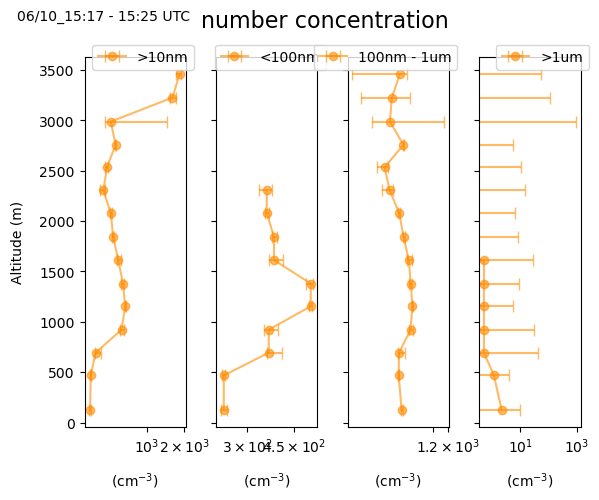

In [60]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY10_subset_median['CNgt10nm_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY10_subset_median['nSMPS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY10_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY10_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/10_15:17 - 15:25 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


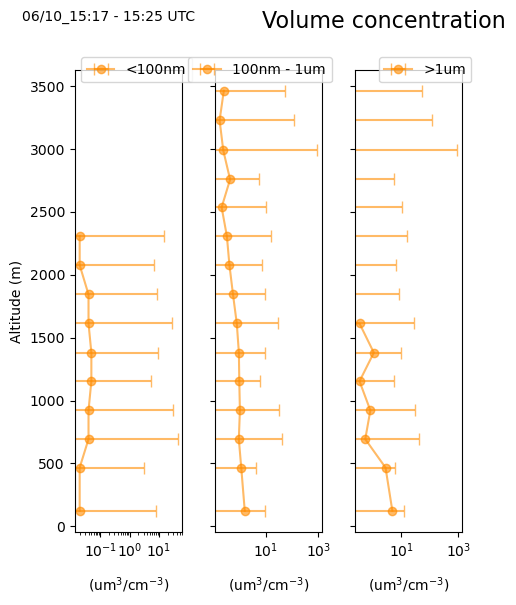

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY10_subset_median['vSMPS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY10_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY10_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY10_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10_subset_25['CNgt10nm_ZIEMBA'], DAY10_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/10_15:17 - 15:25 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [62]:
DAY110b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220610_R0_L2_20230625T113224.ict')
DAY110b['3/10'] = DAY110b['CNgt3nm_ZIEMBA']/DAY110b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY110b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY110b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110b_subset = DAY110b[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY110b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
7182 2022-06-10 19:30:00 2022-06-10 19:30:01           31.639092  \
7183 2022-06-10 19:30:01 2022-06-10 19:30:02           31.639446   
7184 2022-06-10 19:30:02 2022-06-10 19:30:03           31.639806   
7185 2022-06-10 19:30:03 2022-06-10 19:30:04           31.640170   
7186 2022-06-10 19:30:04 2022-06-10 19:30:05           31.640539   
...                  ...                 ...                 ...   
8437 2022-06-10 19:50:55 2022-06-10 19:50:56           31.228702   
8438 2022-06-10 19:50:56 2022-06-10 19:50:57           31.227365   
8439 2022-06-10 19:50:57 2022-06-10 19:50:58           31.226025   
8440 2022-06-10 19:50:58 2022-06-10 19:50:59           31.224682   
8441 2022-06-10 19:50:59 2022-06-10 19:51:00           31.223336   

      Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
7182           -65.606420                 113.375         611.565  \
7183           -65.607515                 113.225         597.890   
7184           -65.608607                 113.065         586.285   
7185           -65.609698                 112.970         583.995   
7186           -65.610788                 112.985         586.870   
...                   ...                     ...             ...   
8437           -65.973911                4967.450        5320.270   
8438           -65.974288                4964.110        5238.060   
8439           -65.974659                4960.810        5234.250   
8440           -65.975025                4957.520        5169.220   
8441           -65.975384                4954.340        5190.430   

      CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
7182          507.400                 230.735                        232.585  \
7183          492.800                 227.085                        227.295   
7184          484.975                 228.130                        209.140   
7185          492.240                 232.290                        216.600   
7186          497.460                 233.335                        230.855   
...               ...                     ...                            ...   
8437         3594.980                2225.060                        241.955   
8438         3601.160                2232.190                        261.035   
8439         3607.780                2274.470                        274.195   
8440         3605.700                2273.160                        273.735   
8441         3603.850                2254.570                        255.150   

      IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
7182                         33.790                          1.775  \
7183                         37.080                          2.260   
7184                         33.130                          1.955   
7185                         31.330                          1.755   
7186                         35.850                          2.275   
...                             ...                            ...   
8437                         14.765                          0.385   
8438                         15.570                          0.405   
8439                         15.605                          0.390   
8440                         17.305                          0.545   
8441                         17.545                          0.685   

      IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
7182                       2.075                      31.855  \
7183                       1.040                       9.090   
7184                       1.165                       4.610   
7185                       1.815                       6.645   
7186                       0.650                       2.035   
...                          ...                         ...   
8437                       0.000                       0.000   
8438                       0.000                      

In [63]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY110b_subset.GPS_Altitude_THORNHILL.min(), DAY110b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY110b_subset['Bins'] = pd.cut(DAY110b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY110b_subset_1000 = DAY110b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_110b = DAY110b_subset_1000[start_index:stop_index]
DAY1000_subset_110b

Time_Start               Time_Stop   
Bins                                                                 
(112.97, 161.788]  2022-06-10 19:32:19.500 2022-06-10 19:32:20.500  \
(161.788, 210.605] 2022-06-10 19:34:43.500 2022-06-10 19:34:44.500   
(210.605, 259.422] 2022-06-10 19:34:52.000 2022-06-10 19:34:53.000   
(259.422, 308.24]  2022-06-10 19:35:00.000 2022-06-10 19:35:01.000   
(308.24, 357.058]  2022-06-10 19:35:09.000 2022-06-10 19:35:10.000   
(357.058, 405.875] 2022-06-10 19:35:18.000 2022-06-10 19:35:19.000   
(405.875, 454.692] 2022-06-10 19:35:27.000 2022-06-10 19:35:28.000   
(454.692, 503.51]  2022-06-10 19:35:36.000 2022-06-10 19:35:37.000   
(503.51, 552.328]  2022-06-10 19:35:45.000 2022-06-10 19:35:46.000   
(552.328, 601.145] 2022-06-10 19:35:54.500 2022-06-10 19:35:55.500   
(601.145, 649.963] 2022-06-10 19:36:04.000 2022-06-10 19:36:05.000   
(649.963, 698.78]  2022-06-10 19:36:13.500 2022-06-10 19:36:14.500   
(698.78, 747.598]  2022-06-10 19:36:23.500 2022-06-10 19:36:24.500   
(747.598, 796.415] 2022-06-10 19:36:33.000 2022-06-10 19:36:34.000   
(796.415, 845.233] 2022-06-10 19:36:42.500 2022-06-10 19:36:43.500   
(845.233, 894.05]  2022-06-10 19:36:52.500 2022-06-10 19:36:53.500   
(894.05, 942.868]  2022-06-10 19:37:01.500 2022-06-10 19:37:02.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(112.97, 161.788]            31.700626           -65.755362  \
(161.788, 210.605]           31.798272           -65.891416   
(210.605, 259.422]           31.805841           -65.897477   
(259.422, 308.24]            31.813945           -65.901028   
(308.24, 357.058]            31.823671           -65.902442   
(357.058, 405.875]           31.833527           -65.901482   
(405.875, 454.692]           31.842996           -65.897901   
(454.692, 503.51]            31.851346           -65.891483   
(503.51, 552.328]            31.857986           -65.882745   
(552.328, 601.145]           31.863197           -65.872054   
(601.145, 649.963]           31.865968           -65.860242   
(649.963, 698.78]            31.865457           -65.848152   
(698.78, 747.598]            31.861209           -65.836701   
(747.598, 796.415]           31.854354           -65.828309   
(796.415, 845.233]           31.845755           -65.823103   
(845.233, 894.05]            31.835804           -65.821748   
(894.05, 942.868]            31.827129           -65.824296   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(112.97, 161.788]                 115.2325        648.5100         556.9550  \
(161.788, 210.605]                181.9325        723.0525         604.4375   
(210.605, 259.422]                232.4700        678.5150         591.0400   
(259.422, 308.24]                 286.4950        664.0950         579.0300   
(308.24, 357.058]                 332.9850        684.2150         585.0450   
(357.058, 405.875]                381.7600        664.2100         569.7550   
(405.875, 454.692]                429.9200        699.3050         584.7850   
(454.692, 503.51]                 479.5150        728.6750         629.4450   
(503.51, 552.328]                 529.9600        705.7900         612.7800   
(552.328, 601.145]                579.6425        705.7125         601.5025   
(601.145, 649.963]                625.7800        666.0650         576.2350   
(649.963, 698.78]                 673.3900        662.8975         582.5800   
(698.78, 747.598]                 723.1875        690.3125         588.5200   
(747.598, 796.415]                771.1800        713.3450         601.4950   
(796.415, 845.233]                820.5325        717.3375         614.6600   
(845.233, 894.05]                 868.8350        827.6400         686.0500   
(894.05, 942.868]                 916.0325        803.9150         667.9400   

 

In [64]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY110b_subset_3000 = DAY110b_subset_1000[start_index:stop_index]
DAY110b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(991.685, 1040.502]  2022-06-10 19:37:18.500 2022-06-10 19:37:19.500  \
(1040.502, 1089.32]  2022-06-10 19:37:27.500 2022-06-10 19:37:28.500   
(1089.32, 1138.138]  2022-06-10 19:37:36.000 2022-06-10 19:37:37.000   
(1138.138, 1186.955] 2022-06-10 19:37:45.500 2022-06-10 19:37:46.500   
(1186.955, 1235.772] 2022-06-10 19:37:54.500 2022-06-10 19:37:55.500   
(1235.772, 1284.59]  2022-06-10 19:38:04.500 2022-06-10 19:38:05.500   
(1284.59, 1333.408]  2022-06-10 19:38:14.500 2022-06-10 19:38:15.500   
(1333.408, 1382.225] 2022-06-10 19:38:22.500 2022-06-10 19:38:23.500   
(1382.225, 1431.042] 2022-06-10 19:38:31.000 2022-06-10 19:38:32.000   
(1431.042, 1479.86]  2022-06-10 19:38:38.500 2022-06-10 19:38:39.500   
(1479.86, 1528.678]  2022-06-10 19:38:44.500 2022-06-10 19:38:45.500   
(1528.678, 1577.495] 2022-06-10 19:38:51.000 2022-06-10 19:38:52.000   
(1577.495, 1626.312] 2022-06-10 19:38:57.500 2022-06-10 19:38:58.500   
(1626.312, 1675.13]  2022-06-10 19:39:04.500 2022-06-10 19:39:05.500   
(1675.13, 1723.948]  2022-06-10 19:39:12.500 2022-06-10 19:39:13.500   
(1723.948, 1772.765] 2022-06-10 19:39:21.000 2022-06-10 19:39:22.000   
(1772.765, 1821.583] 2022-06-10 19:39:29.000 2022-06-10 19:39:30.000   
(1821.583, 1870.4]   2022-06-10 19:39:37.000 2022-06-10 19:39:38.000   
(1870.4, 1919.218]   2022-06-10 19:39:45.500 2022-06-10 19:39:46.500   
(1919.218, 1968.035] 2022-06-10 19:39:54.500 2022-06-10 19:39:55.500   
(1968.035, 2016.853] 2022-06-10 19:40:05.000 2022-06-10 19:40:06.000   
(2016.853, 2065.67]  2022-06-10 19:40:14.000 2022-06-10 19:40:15.000   
(2065.67, 2114.488]  2022-06-10 19:40:20.500 2022-06-10 19:40:21.500   
(2114.488, 2163.305] 2022-06-10 19:40:26.500 2022-06-10 19:40:27.500   
(2163.305, 2212.122] 2022-06-10 19:40:33.000 2022-06-10 19:40:34.000   
(2212.122, 2260.94]  2022-06-10 19:40:40.500 2022-06-10 19:40:41.500   
(2260.94, 2309.757]  2022-06-10 19:40:50.000 2022-06-10 19:40:51.000   
(2309.757, 2358.575] 2022-06-10 19:41:01.500 2022-06-10 19:41:02.500   
(2358.575, 2407.392] 2022-06-10 19:41:11.500 2022-06-10 19:41:12.500   
(2407.392, 2456.21]  2022-06-10 19:41:19.500 2022-06-10 19:41:20.500   
(2456.21, 2505.028]  2022-06-10 19:41:26.500 2022-06-10 19:41:27.500   
(2505.028, 2553.845] 2022-06-10 19:41:33.500 2022-06-10 19:41:34.500   
(2553.845, 2602.662] 2022-06-10 19:41:41.500 2022-06-10 19:41:42.500   
(2602.662, 2651.48]  2022-06-10 19:41:50.500 2022-06-10 19:41:51.500   
(2651.48, 2700.298]  2022-06-10 19:41:59.500 2022-06-10 19:42:00.500   
(2700.298, 2749.115] 2022-06-10 19:42:07.500 2022-06-10 19:42:08.500   
(2749.115, 2797.932] 2022-06-10 19:42:15.000 2022-06-10 19:42:16.000   
(2797.932, 2846.75]  2022-06-10 19:42:22.500 2022-06-10 19:42:23.500   
(2846.75, 2895.568]  2022-06-10 19:42:31.000 2022-06-10 19:42:32.000   
(2895.568, 2944.385] 2022-06-10 19:42:39.500 2022-06-10 19:42:40.500   
(2944.385, 2993.202] 2022-06-10 19:42:48.000 2022-06-10 19:42:49.000   
(2993.202, 3042.02]  2022-06-10 19:42:57.000 2022-06-10 19:42:58.000   
(3042.02, 3090.838]  2022-06-10 19:43:06.000 2022-06-10 19:43:07.000   
(3090.838, 3139.655] 2022-06-10 19:43:13.500 2022-06-10 19:43:14.500   
(3139.655, 3188.472] 2022-06-10 19:43:19.500 2022-06-10 19:43:20.500   
(3188.472, 3237.29]  2022-06-10 19:43:26.000 2022-06-10 19:43:27.000   
(3237.29, 3286.108]  2022-06-10 19:43:33.000 2022-06-10 19:43:34.000   
(3286.108, 3334.925] 2022-06-10 19:43:39.500 2022-06-10 19:43:40.500   
(3334.925, 3383.742] 2022-06-10 19:43:45.500 2022-06-10 19:43:46.500   
(3383.742, 3432.56]  2022-06-10 19:43:52.500 2022-06-10 19:43:53.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(991.685, 1040.502]            31.815326           -65.837822  \
(1040.502, 1089.32]            31.813047           -65.847973   
(1089.32, 1138.138]          

In [65]:
nbins = 15
bins = np.linspace(DAY110b_subset.GPS_Altitude_THORNHILL.min(), DAY110b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY110b_subset['Bins'] = pd.cut(DAY110b_subset['GPS_Altitude_THORNHILL'], bins)
DAY110b_subset_median = DAY110b_subset.groupby('Bins').median()
DAY110b_subset_median
DAY110b_subset_25 = DAY110b_subset_median - DAY110b_subset.groupby('Bins').quantile(.25)
DAY110b_subset_25
DAY110b_subset_75 = DAY110b_subset.groupby('Bins').quantile(.75) - DAY110b_subset_median
DAY110b_subset_75

Time_Start                 Time_Stop   
Bins                                                                     
(112.97, 438.42]   0 days 00:01:21.749999872 0 days 00:01:21.749999872  \
(438.42, 763.87]      0 days 00:00:15.500000    0 days 00:00:15.500000   
(763.87, 1089.32]  0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(1089.32, 1414.77]           0 days 00:00:15           0 days 00:00:15   
(1414.77, 1740.22]    0 days 00:00:11.500000    0 days 00:00:11.500000   
(1740.22, 2065.67] 0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(2065.67, 2391.12]    0 days 00:00:13.500000    0 days 00:00:13.500000   
(2391.12, 2716.57] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(2716.57, 3042.02]    0 days 00:00:13.500000    0 days 00:00:13.500000   
(3042.02, 3367.47]           0 days 00:00:11           0 days 00:00:11   
(3367.47, 3692.92]    0 days 00:00:10.500000    0 days 00:00:10.500000   
(3692.92, 4018.37] 0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(4018.37, 4343.82] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(4343.82, 4669.27]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(4669.27, 4994.72]           0 days 00:01:15           0 days 00:01:15   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(112.97, 438.42]              0.054771             0.081867  \
(438.42, 763.87]              0.003464             0.019619   
(763.87, 1089.32]             0.014447             0.003691   
(1089.32, 1414.77]            0.016689             0.006475   
(1414.77, 1740.22]            0.002178             0.013278   
(1740.22, 2065.67]            0.014173             0.003988   
(2065.67, 2391.12]            0.013643             0.012710   
(2391.12, 2716.57]            0.002666             0.017738   
(2716.57, 3042.02]            0.013522             0.001943   
(3042.02, 3367.47]            0.011501             0.003358   
(3367.47, 3692.92]            0.011687             0.002866   
(3692.92, 4018.37]            0.007321             0.002201   
(4018.37, 4343.82]            0.007582             0.002626   
(4343.82, 4669.27]            0.008049             0.002527   
(4669.27, 4994.72]            0.105713             0.031167   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(112.97, 438.42]                    3.0175        44.45000         46.01375  \
(438.42, 763.87]                   77.2225        16.38000          9.60250   
(763.87, 1089.32]                  91.4400        54.51750         41.96375   
(1089.32, 1414.77]                 74.2900        45.46000         43.30500   
(1414.77, 1740.22]                 78.7250        71.98000         46.24750   
(1740.22, 2065.67]                 67.1725        36.66500         13.90250   
(2065.67, 2391.12]                 51.2750        23.36250         31.18500   
(2391.12, 2716.57]                 71.3700        16.33375         17.90750   
(2716.57, 3042.02]                 79.6400       348.15000        270.20250   
(3042.02, 3367.47]                 78.8200        73.06000         33.13000   
(3367.47, 3692.92]                 81.6050       338.36000        140.12000   
(3692.92, 4018.37]                 79.8225       265.16750        204.97000   
(4018.37, 4343.82]                 75.2475        36.74500         76.45250   
(4343.82, 4669.27]                 83.2250       159.28500         58.39000   
(4669.27, 4994.72]                 22.7300       916.85000        720.97000   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(112.97, 438.42]                  31.91500                       12.54625  \
(438.42, 763.87]                   9.05750                        7.44000   
(763.87, 1089.32]                  8.49375         

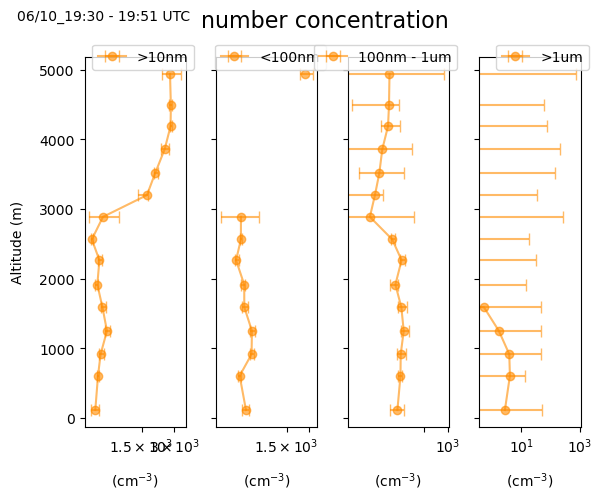

In [66]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY110b_subset_median['CNgt10nm_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY110b_subset_median['nSMPS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY110b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY110b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[2]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/10_19:30 - 19:51 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


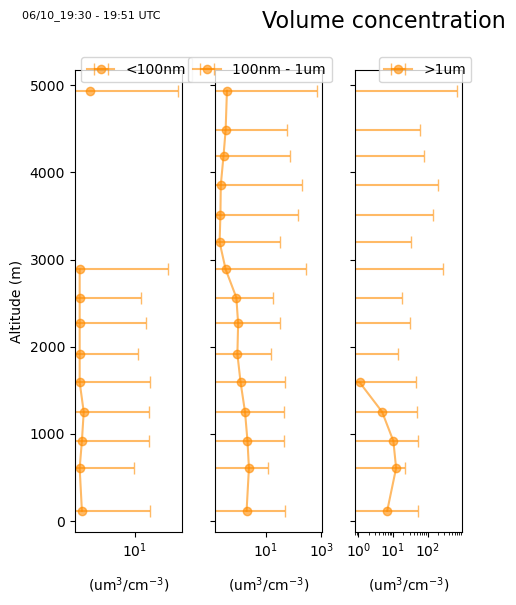

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY110b_subset_median['vSMPS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY110b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY110b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY110b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY110b_subset_25['CNgt10nm_ZIEMBA'], DAY110b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/10_19:30 - 19:51 UTC', ha='left', va='top', fontsize=8)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [68]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220610_R0_L2_20230625T113224.ict')
DAY10b['3/10'] = DAY10b['CNgt3nm_ZIEMBA']/DAY10b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY10b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10482 2022-06-10 20:25:00 2022-06-10 20:25:01           31.199210  \
10483 2022-06-10 20:25:01 2022-06-10 20:25:02           31.200274   
10484 2022-06-10 20:25:02 2022-06-10 20:25:03           31.201338   
10485 2022-06-10 20:25:03 2022-06-10 20:25:04           31.202402   
10486 2022-06-10 20:25:04 2022-06-10 20:25:05           31.203466   
...                   ...                 ...                 ...   
11077 2022-06-10 20:34:55 2022-06-10 20:34:56           31.464508   
11078 2022-06-10 20:34:56 2022-06-10 20:34:57           31.465555   
11079 2022-06-10 20:34:57 2022-06-10 20:34:58           31.466603   
11080 2022-06-10 20:34:58 2022-06-10 20:34:59           31.467650   
11081 2022-06-10 20:34:59 2022-06-10 20:35:00           31.468699   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10482           -65.892109                 133.810         1637.44  \
10483           -65.891772                 133.615         1601.56   
10484           -65.891430                 133.015         1588.52   
10485           -65.891083                 131.855         1544.71   
10486           -65.890727                 130.265         1198.60   
...                    ...                     ...             ...   
11077           -65.626679                4924.170         3665.36   
11078           -65.625580                4924.550         3694.18   
11079           -65.624479                4924.900         3501.23   
11080           -65.623378                4925.210         3433.91   
11081           -65.622276                4925.490         3568.67   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10482          1258.18                 754.900                        279.490  \
10483          1221.52                 723.505                        278.920   
10484          1221.16                 766.090                        275.455   
10485          1231.39                 732.585                        258.385   
10486           999.96                 556.055                        247.770   
...                ...                     ...                            ...   
11077          2407.67                1263.160                        124.210   
11078          2433.89                1247.480                        141.535   
11079          2407.88                1241.450                        137.260   
11080          2355.36                1222.170                        138.540   
11081          2337.47                1221.070                        160.525   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10482                         40.200                          2.260  \
10483                         38.870                          2.035   
10484                         34.435                          1.595   
10485                         34.490                          1.785   
10486                         35.920                          2.130   
...                              ...                            ...   
11077                          8.265                          0.230   
11078                          8.720                          0.220   
11079                          8.080                          0.205   
11080                          9.725                          0.340   
11081                         12.505                          0.450   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10482                       1.685                      12.625  \
10483                       3.380                      27.710   
10484                       3.905                      34.230   
10485                       1.560                      19.480   
10486                       2.730                      25.645   
...                           ...                         ...   
11077                       0.000                       0.000   

In [69]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10b_subset.GPS_Altitude_THORNHILL.min(), DAY10b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10b_subset['Bins'] = pd.cut(DAY10b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10b_subset_1000 = DAY10b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10b = DAY10b_subset_1000[start_index:stop_index]
DAY1000_subset_10b

Time_Start               Time_Stop   
Bins                                                                 
(119.575, 167.73]  2022-06-10 20:25:54.000 2022-06-10 20:25:55.000  \
(167.73, 215.886]  2022-06-10 20:26:49.500 2022-06-10 20:26:50.500   
(215.886, 264.041] 2022-06-10 20:26:53.500 2022-06-10 20:26:54.500   
(264.041, 312.196] 2022-06-10 20:26:57.500 2022-06-10 20:26:58.500   
(312.196, 360.352] 2022-06-10 20:27:02.000 2022-06-10 20:27:03.000   
(360.352, 408.507] 2022-06-10 20:27:07.000 2022-06-10 20:27:08.000   
(408.507, 456.662] 2022-06-10 20:27:11.500 2022-06-10 20:27:12.500   
(456.662, 504.818] 2022-06-10 20:27:15.000 2022-06-10 20:27:16.000   
(504.818, 552.973] 2022-06-10 20:27:18.500 2022-06-10 20:27:19.500   
(552.973, 601.128] 2022-06-10 20:27:23.000 2022-06-10 20:27:24.000   
(601.128, 649.284] 2022-06-10 20:27:27.500 2022-06-10 20:27:28.500   
(649.284, 697.439] 2022-06-10 20:27:31.500 2022-06-10 20:27:32.500   
(697.439, 745.595] 2022-06-10 20:27:35.000 2022-06-10 20:27:36.000   
(745.595, 793.75]  2022-06-10 20:27:38.000 2022-06-10 20:27:39.000   
(793.75, 841.905]  2022-06-10 20:27:41.000 2022-06-10 20:27:42.000   
(841.905, 890.061] 2022-06-10 20:27:44.000 2022-06-10 20:27:45.000   
(890.061, 938.216] 2022-06-10 20:27:47.000 2022-06-10 20:27:48.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(119.575, 167.73]            31.246358           -65.850461  \
(167.73, 215.886]            31.294812           -65.804153   
(215.886, 264.041]           31.298720           -65.801157   
(264.041, 312.196]           31.302887           -65.798766   
(312.196, 360.352]           31.307843           -65.796931   
(360.352, 408.507]           31.313522           -65.795905   
(408.507, 456.662]           31.318646           -65.795860   
(456.662, 504.818]           31.322558           -65.796392   
(504.818, 552.973]           31.326337           -65.797454   
(552.973, 601.128]           31.330915           -65.799605   
(601.128, 649.284]           31.335092           -65.802547   
(649.284, 697.439]           31.338349           -65.805781   
(697.439, 745.595]           31.340752           -65.809038   
(745.595, 793.75]            31.342446           -65.812074   
(793.75, 841.905]            31.343798           -65.815270   
(841.905, 890.061]           31.344807           -65.818568   
(890.061, 938.216]           31.345471           -65.821923   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(119.575, 167.73]                 127.6650        683.9950         585.4300  \
(167.73, 215.886]                 192.9050        664.5450         586.9525   
(215.886, 264.041]                242.3875        685.5575         583.0200   
(264.041, 312.196]                289.1125        675.9025         554.2275   
(312.196, 360.352]                334.1400        668.3700         548.8050   
(360.352, 408.507]                384.2600        623.4900         550.3400   
(408.507, 456.662]                435.1125        658.6225         555.5375   
(456.662, 504.818]                479.9450        660.2650         553.1100   
(504.818, 552.973]                525.2150        674.9600         566.3250   
(552.973, 601.128]                577.9350        691.9650         565.0650   
(601.128, 649.284]                628.5050        708.6250         596.2475   
(649.284, 697.439]                675.9475        665.4775         559.0950   
(697.439, 745.595]                723.7950        665.4800         561.9900   
(745.595, 793.75]                 769.0250        662.8850         561.4450   
(793.75, 841.905]                 816.7000        639.6650         552.8550   
(841.905, 890.061]                867.0750        654.5750         546.3150   
(890.061, 938.216]                916.5350        647.7900         550.4300   

 

In [70]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10b_subset_3000 = DAY10b_subset_1000[start_index:stop_index]
DAY10b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(986.371, 1034.527]  2022-06-10 20:27:53.000 2022-06-10 20:27:54.000  \
(1034.527, 1082.682] 2022-06-10 20:27:56.000 2022-06-10 20:27:57.000   
(1082.682, 1130.837] 2022-06-10 20:27:59.000 2022-06-10 20:28:00.000   
(1130.837, 1178.993] 2022-06-10 20:28:02.500 2022-06-10 20:28:03.500   
(1178.993, 1227.148] 2022-06-10 20:28:06.000 2022-06-10 20:28:07.000   
(1227.148, 1275.303] 2022-06-10 20:28:09.000 2022-06-10 20:28:10.000   
(1275.303, 1323.459] 2022-06-10 20:28:12.000 2022-06-10 20:28:13.000   
(1323.459, 1371.614] 2022-06-10 20:28:15.000 2022-06-10 20:28:16.000   
(1371.614, 1419.769] 2022-06-10 20:28:17.500 2022-06-10 20:28:18.500   
(1419.769, 1467.925] 2022-06-10 20:28:20.500 2022-06-10 20:28:21.500   
(1467.925, 1516.08]  2022-06-10 20:28:24.000 2022-06-10 20:28:25.000   
(1516.08, 1564.236]  2022-06-10 20:28:27.000 2022-06-10 20:28:28.000   
(1564.236, 1612.391] 2022-06-10 20:28:31.000 2022-06-10 20:28:32.000   
(1612.391, 1660.546] 2022-06-10 20:28:35.500 2022-06-10 20:28:36.500   
(1660.546, 1708.702] 2022-06-10 20:28:39.500 2022-06-10 20:28:40.500   
(1708.702, 1756.857] 2022-06-10 20:28:44.000 2022-06-10 20:28:45.000   
(1756.857, 1805.012] 2022-06-10 20:28:48.500 2022-06-10 20:28:49.500   
(1805.012, 1853.168] 2022-06-10 20:28:53.000 2022-06-10 20:28:54.000   
(1853.168, 1901.323] 2022-06-10 20:28:58.000 2022-06-10 20:28:59.000   
(1901.323, 1949.478] 2022-06-10 20:29:03.000 2022-06-10 20:29:04.000   
(1949.478, 1997.634] 2022-06-10 20:29:08.000 2022-06-10 20:29:09.000   
(1997.634, 2045.789] 2022-06-10 20:29:12.500 2022-06-10 20:29:13.500   
(2045.789, 2093.944] 2022-06-10 20:29:16.500 2022-06-10 20:29:17.500   
(2093.944, 2142.1]   2022-06-10 20:29:21.000 2022-06-10 20:29:22.000   
(2142.1, 2190.255]   2022-06-10 20:29:25.500 2022-06-10 20:29:26.500   
(2190.255, 2238.41]  2022-06-10 20:29:29.500 2022-06-10 20:29:30.500   
(2238.41, 2286.566]  2022-06-10 20:29:33.000 2022-06-10 20:29:34.000   
(2286.566, 2334.721] 2022-06-10 20:29:36.500 2022-06-10 20:29:37.500   
(2334.721, 2382.876] 2022-06-10 20:29:40.000 2022-06-10 20:29:41.000   
(2382.876, 2431.032] 2022-06-10 20:29:43.000 2022-06-10 20:29:44.000   
(2431.032, 2479.187] 2022-06-10 20:29:46.000 2022-06-10 20:29:47.000   
(2479.187, 2527.342] 2022-06-10 20:29:49.000 2022-06-10 20:29:50.000   
(2527.342, 2575.498] 2022-06-10 20:29:52.500 2022-06-10 20:29:53.500   
(2575.498, 2623.653] 2022-06-10 20:29:56.500 2022-06-10 20:29:57.500   
(2623.653, 2671.809] 2022-06-10 20:30:00.500 2022-06-10 20:30:01.500   
(2671.809, 2719.964] 2022-06-10 20:30:04.000 2022-06-10 20:30:05.000   
(2719.964, 2768.119] 2022-06-10 20:30:07.500 2022-06-10 20:30:08.500   
(2768.119, 2816.275] 2022-06-10 20:30:11.500 2022-06-10 20:30:12.500   
(2816.275, 2864.43]  2022-06-10 20:30:15.500 2022-06-10 20:30:16.500   
(2864.43, 2912.585]  2022-06-10 20:30:19.500 2022-06-10 20:30:20.500   
(2912.585, 2960.741] 2022-06-10 20:30:23.500 2022-06-10 20:30:24.500   
(2960.741, 3008.896] 2022-06-10 20:30:28.000 2022-06-10 20:30:29.000   
(3008.896, 3057.051] 2022-06-10 20:30:32.500 2022-06-10 20:30:33.500   
(3057.051, 3105.207] 2022-06-10 20:30:37.000 2022-06-10 20:30:38.000   
(3105.207, 3153.362] 2022-06-10 20:30:41.500 2022-06-10 20:30:42.500   
(3153.362, 3201.517] 2022-06-10 20:30:45.000 2022-06-10 20:30:46.000   
(3201.517, 3249.673] 2022-06-10 20:30:48.500 2022-06-10 20:30:49.500   
(3249.673, 3297.828] 2022-06-10 20:30:52.500 2022-06-10 20:30:53.500   
(3297.828, 3345.983] 2022-06-10 20:30:56.000 2022-06-10 20:30:57.000   
(3345.983, 3394.139] 2022-06-10 20:30:59.500 2022-06-10 20:31:00.500   
(3394.139, 3442.294] 2022-06-10 20:31:03.500 2022-06-10 20:31:04.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(986.371, 1034.527]            31.345734           -65.828653  \
(1034.527, 1082.682]  

In [71]:
nbins = 15
bins10b = np.linspace(DAY10b_subset.GPS_Altitude_THORNHILL.min(), DAY10b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10b_subset['Bins'] = pd.cut(DAY10b_subset['GPS_Altitude_THORNHILL'], bins10b)
DAY10b_subset_median= DAY10b_subset.groupby('Bins').median()
DAY10b_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(119.575, 440.611]   2022-06-10 20:26:06.000 2022-06-10 20:26:07.000  \
(440.611, 761.646]   2022-06-10 20:27:24.500 2022-06-10 20:27:25.500   
(761.646, 1082.682]  2022-06-10 20:27:47.500 2022-06-10 20:27:48.500   
(1082.682, 1403.718] 2022-06-10 20:28:07.500 2022-06-10 20:28:08.500   
(1403.718, 1724.753] 2022-06-10 20:28:30.500 2022-06-10 20:28:31.500   
(1724.753, 2045.789] 2022-06-10 20:28:59.000 2022-06-10 20:29:00.000   
(2045.789, 2366.825] 2022-06-10 20:29:27.500 2022-06-10 20:29:28.500   
(2366.825, 2687.86]  2022-06-10 20:29:52.000 2022-06-10 20:29:53.000   
(2687.86, 3008.896]  2022-06-10 20:30:17.000 2022-06-10 20:30:18.000   
(3008.896, 3329.932] 2022-06-10 20:30:43.500 2022-06-10 20:30:44.500   
(3329.932, 3650.967] 2022-06-10 20:31:12.000 2022-06-10 20:31:13.000   
(3650.967, 3972.003] 2022-06-10 20:31:39.000 2022-06-10 20:31:40.000   
(3972.003, 4293.039] 2022-06-10 20:32:07.000 2022-06-10 20:32:08.000   
(4293.039, 4614.074] 2022-06-10 20:32:47.500 2022-06-10 20:32:48.500   
(4614.074, 4935.11]  2022-06-10 20:34:05.500 2022-06-10 20:34:06.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(119.575, 440.611]             31.256163           -65.839613  \
(440.611, 761.646]             31.332354           -65.800507   
(761.646, 1082.682]            31.345316           -65.822486   
(1082.682, 1403.718]           31.340761           -65.843031   
(1403.718, 1724.753]           31.322234           -65.851670   
(1724.753, 2045.789]           31.300379           -65.832885   
(2045.789, 2366.825]           31.298698           -65.795810   
(2366.825, 2687.86]            31.313378           -65.767596   
(2687.86, 3008.896]            31.339483           -65.754981   
(3008.896, 3329.932]           31.368904           -65.761905   
(3329.932, 3650.967]           31.381894           -65.793618   
(3650.967, 3972.003]           31.364480           -65.819541   
(3972.003, 4293.039]           31.335191           -65.812001   
(4293.039, 4614.074]           31.336533           -65.760435   
(4614.074, 4935.11]            31.413508           -65.679938   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(119.575, 440.611]                  129.4750        668.3700         556.9600  \
(440.611, 761.646]                  594.8500        670.6175         561.6600   
(761.646, 1082.682]                 924.4775        646.5700         547.2000   
(1082.682, 1403.718]               1230.2100        840.3475         686.3975   
(1403.718, 1724.753]               1583.7850        781.5675         612.2250   
(1724.753, 2045.789]               1886.5500        722.0900         574.7000   
(2045.789, 2366.825]               2193.1150        686.3100         529.7675   
(2366.825, 2687.86]                2543.6000        677.9900         528.3400   
(2687.86, 3008.896]                2862.5700       1362.2300         956.5200   
(3008.896, 3329.932]               3156.3200       2907.8550        1774.8700   
(3329.932, 3650.967]               3499.7600       2613.9800        1491.0100   
(3650.967, 3972.003]               3815.4100       2939.6600        1973.0000   
(3972.003, 4293.039]               4130.4700       3317.3200        2114.9300   
(4293.039, 4614.074]               4430.8150       3111.2950        2040.8650   
(4614.074, 4935.11]                4922.5450       3392.7400        2307.6950   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(119.575, 440.611]                  294.7200                       228.8700  \
(440.611, 761.646]                  286.3550                       184.5450   
(761.646,

In [72]:
DAY10b_subset_25 = DAY10b_subset_median - DAY10b_subset.groupby('Bins').quantile(.25)
DAY10b_subset_25
DAY10b_subset_75 = DAY10b_subset.groupby('Bins').quantile(.75) - DAY10b_subset_median
DAY10b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(119.575, 440.611]      0 days 00:00:32.500000    0 days 00:00:32.500000  \
(440.611, 761.646]   0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(761.646, 1082.682]  0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(1082.682, 1403.718] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(1403.718, 1724.753] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(1724.753, 2045.789]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(2045.789, 2366.825] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(2366.825, 2687.86]     0 days 00:00:05.500000    0 days 00:00:05.500000   
(2687.86, 3008.896]     0 days 00:00:06.500000    0 days 00:00:06.500000   
(3008.896, 3329.932] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3329.932, 3650.967]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(3650.967, 3972.003]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(3972.003, 4293.039]           0 days 00:00:08           0 days 00:00:08   
(4293.039, 4614.074] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(4614.074, 4935.11]  0 days 00:00:26.749999872 0 days 00:00:26.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(119.575, 440.611]              0.028402             0.026561  \
(440.611, 761.646]              0.005425             0.003149   
(761.646, 1082.682]             0.000344             0.005301   
(1082.682, 1403.718]            0.002430             0.004236   
(1403.718, 1724.753]            0.005772             0.001167   
(1724.753, 2045.789]            0.004126             0.009165   
(2045.789, 2366.825]            0.002432             0.008104   
(2366.825, 2687.86]             0.005082             0.004465   
(2687.86, 3008.896]             0.007462             0.000471   
(3008.896, 3329.932]            0.005669             0.003841   
(3329.932, 3650.967]            0.001040             0.009790   
(3650.967, 3972.003]            0.005601             0.002966   
(3972.003, 4293.039]            0.007508             0.008780   
(4293.039, 4614.074]            0.011128             0.012102   
(4614.074, 4935.11]             0.027295             0.028474   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(119.575, 440.611]                  14.43250       133.10500        132.67250  \
(440.611, 761.646]                  71.59375        21.06125          6.65625   
(761.646, 1082.682]                 74.12000         8.03375          3.83625   
(1082.682, 1403.718]                76.53250        75.53625         76.24250   
(1403.718, 1724.753]                66.12500        49.65875         21.10375   
(1724.753, 2045.789]                71.27500        50.51000         38.24750   
(2045.789, 2366.825]                78.87000        36.50500         23.15750   
(2366.825, 2687.86]                 70.73000         7.66500          3.50250   
(2687.86, 3008.896]                 74.54500       417.22000        195.37500   
(3008.896, 3329.932]                81.72750       299.16000        258.00000   
(3329.932, 3650.967]                54.54500       721.61500        538.67000   
(3650.967, 3972.003]                78.25500       173.91500         75.31500   
(3972.003, 4293.039]                69.98000       263.82000         58.81000   
(4293.039, 4614.074]                70.36000       150.89500         56.06000   
(4614.074, 4935.11]                  4.69250       113.64500         59.88750   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(119.575, 440.611]                  54.25500                       15.14000  \
(440.611, 761.646]    

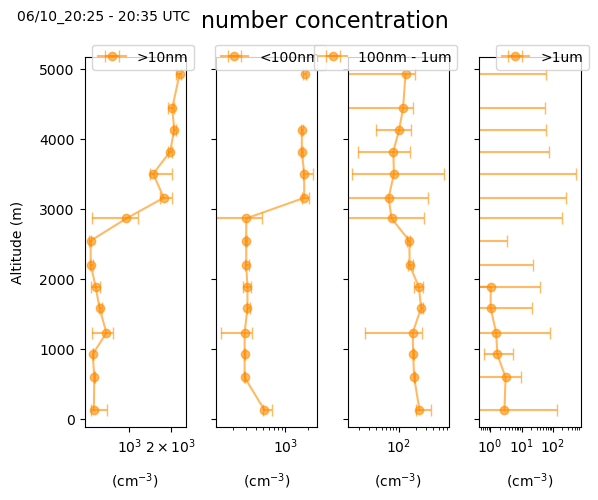

In [73]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY10b_subset_median['CNgt10nm_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY10b_subset_median['nSMPS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY10b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY10b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[2]

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/10_20:25 - 20:35 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


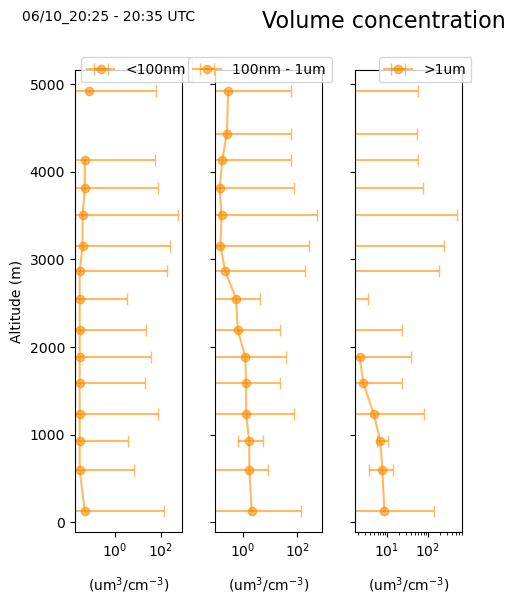

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY10b_subset_median['vSMPS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY10b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY10b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY10b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY10b_subset_25['CNgt10nm_ZIEMBA'], DAY10b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/10_20:25 - 20:35 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [75]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220611_R0_L1_20230625T113225.ict')
DAY11['3/10'] = DAY11['CNgt3nm_ZIEMBA']/DAY11['CNgt10nm_ZIEMBA']
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY11_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10800 2022-06-11 15:24:00 2022-06-11 15:24:01           32.234864  \
10801 2022-06-11 15:24:01 2022-06-11 15:24:02           32.233969   
10802 2022-06-11 15:24:02 2022-06-11 15:24:03           32.233058   
10803 2022-06-11 15:24:03 2022-06-11 15:24:04           32.232130   
10804 2022-06-11 15:24:04 2022-06-11 15:24:05           32.231186   
...                   ...                 ...                 ...   
11875 2022-06-11 15:41:55 2022-06-11 15:41:56           32.259305   
11876 2022-06-11 15:41:56 2022-06-11 15:41:57           32.258543   
11877 2022-06-11 15:41:57 2022-06-11 15:41:58           32.257745   
11878 2022-06-11 15:41:58 2022-06-11 15:41:59           32.256913   
11879 2022-06-11 15:41:59 2022-06-11 15:42:00           32.256049   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10800           -64.977277                 137.985         570.305  \
10801           -64.976649                 138.245         571.280   
10802           -64.976063                 138.485         592.070   
10803           -64.975521                 138.740         585.790   
10804           -64.975026                 139.035         596.485   
...                    ...                     ...             ...   
11875           -64.971567                4701.700        6461.360   
11876           -64.970428                4708.440        6369.690   
11877           -64.969326                4714.800        6517.780   
11878           -64.968261                4720.960        6580.560   
11879           -64.967235                4726.910        6234.780   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10800          472.755                 280.630                        203.280  \
10801          475.925                 279.095                        213.080   
10802          471.715                 281.675                        219.790   
10803          480.600                 285.860                        225.220   
10804          486.965                 285.405                        211.195   
...                ...                     ...                            ...   
11875         4147.040                2570.110                        295.865   
11876         4150.430                2563.510                        297.635   
11877         4152.750                2599.840                        303.855   
11878         4119.770                2644.700                        290.060   
11879         4078.810                2628.950                        285.920   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10800                         35.680                          2.275  \
10801                         34.770                          1.980   
10802                         33.540                          1.795   
10803                         37.420                          2.330   
10804                         39.365                          2.650   
...                              ...                            ...   
11875                         19.370                          0.685   
11876                         17.475                          0.475   
11877                         18.250                          0.485   
11878                         17.065                          0.440   
11879                         16.285                          0.410   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10800                       4.795                      34.920  \
10801                       4.675                      61.550   
10802                       5.855                      81.905   
10803                       3.780                      42.540   
10804                       1.040                      14.395   
...                           ...                         ...   
11875                       0.000                       0.000   

In [76]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11_subset.GPS_Altitude_THORNHILL.min(), DAY11_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11_subset['Bins'] = pd.cut(DAY11_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11_subset_1000 = DAY11_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11 = DAY11_subset_1000[start_index:stop_index]
DAY1000_subset_11


Time_Start               Time_Stop   
Bins                                                                 
(137.295, 183.191] 2022-06-11 15:24:38.000 2022-06-11 15:24:39.000  \
(183.191, 229.087] 2022-06-11 15:25:26.500 2022-06-11 15:25:27.500   
(229.087, 274.983] 2022-06-11 15:25:52.000 2022-06-11 15:25:53.000   
(274.983, 320.88]  2022-06-11 15:26:15.000 2022-06-11 15:26:16.000   
(320.88, 366.776]  2022-06-11 15:26:29.000 2022-06-11 15:26:30.000   
(366.776, 412.672] 2022-06-11 15:26:42.500 2022-06-11 15:26:43.500   
(412.672, 458.568] 2022-06-11 15:26:58.000 2022-06-11 15:26:59.000   
(458.568, 504.464] 2022-06-11 15:27:15.500 2022-06-11 15:27:16.500   
(504.464, 550.36]  2022-06-11 15:27:29.500 2022-06-11 15:27:30.500   
(550.36, 596.256]  2022-06-11 15:27:40.500 2022-06-11 15:27:41.500   
(596.256, 642.153] 2022-06-11 15:27:50.500 2022-06-11 15:27:51.500   
(642.153, 688.049] 2022-06-11 15:28:01.000 2022-06-11 15:28:02.000   
(688.049, 733.945] 2022-06-11 15:28:10.000 2022-06-11 15:28:11.000   
(733.945, 779.841] 2022-06-11 15:28:18.000 2022-06-11 15:28:19.000   
(779.841, 825.737] 2022-06-11 15:28:26.500 2022-06-11 15:28:27.500   
(825.737, 871.633] 2022-06-11 15:28:35.500 2022-06-11 15:28:36.500   
(871.633, 917.53]  2022-06-11 15:28:49.000 2022-06-11 15:28:50.000   
(917.53, 963.426]  2022-06-11 15:29:05.000 2022-06-11 15:29:06.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(137.295, 183.191]           32.199022           -64.981262  \
(183.191, 229.087]           32.202683           -65.032508   
(229.087, 274.983]           32.228500           -65.038554   
(274.983, 320.88]            32.246798           -65.020353   
(320.88, 366.776]            32.249291           -65.003630   
(366.776, 412.672]           32.246002           -64.988482   
(412.672, 458.568]           32.236136           -64.975996   
(458.568, 504.464]           32.220900           -64.971576   
(504.464, 550.36]            32.208572           -64.975829   
(550.36, 596.256]            32.201099           -64.984292   
(596.256, 642.153]           32.197340           -64.994771   
(642.153, 688.049]           32.197375           -65.007070   
(688.049, 733.945]           32.200756           -65.017225   
(733.945, 779.841]           32.206060           -65.024871   
(779.841, 825.737]           32.213548           -65.030976   
(825.737, 871.633]           32.222924           -65.034500   
(871.633, 917.53]            32.237969           -65.033074   
(917.53, 963.426]            32.252818           -65.020469   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(137.295, 183.191]                139.4050        576.7150         456.9700  \
(183.191, 229.087]                206.6225        417.0725         326.5000   
(229.087, 274.983]                248.9200        406.8050         314.9800   
(274.983, 320.88]                 294.7700        378.7500         298.5250   
(320.88, 366.776]                 343.1150        346.0350         262.2700   
(366.776, 412.672]                394.6075        377.1200         295.6625   
(412.672, 458.568]                434.9900        371.1050         280.5900   
(458.568, 504.464]                479.7575        346.5275         274.4700   
(504.464, 550.36]                 527.8900        352.8725         276.3475   
(550.36, 596.256]                 576.3850        366.5525         280.1450   
(596.256, 642.153]                612.2400        376.7675         285.1650   
(642.153, 688.049]                664.1650        353.2350         275.8300   
(688.049, 733.945]                710.7850        353.5200         272.7450   
(733.945, 779.841]                761.6950        355.4900         273.9800   
(779.841, 825.737]                804.7050        356.1250         268.1825   
(825.737, 871.633]         

In [77]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11_subset_3000 = DAY11_subset_1000[start_index:stop_index]
DAY11_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1009.322, 1055.218] 2022-06-11 15:29:30.500 2022-06-11 15:29:31.500  \
(1055.218, 1101.114] 2022-06-11 15:29:43.500 2022-06-11 15:29:44.500   
(1101.114, 1147.01]  2022-06-11 15:29:57.500 2022-06-11 15:29:58.500   
(1147.01, 1192.906]  2022-06-11 15:30:12.500 2022-06-11 15:30:13.500   
(1192.906, 1238.803] 2022-06-11 15:30:26.000 2022-06-11 15:30:27.000   
(1238.803, 1284.699] 2022-06-11 15:30:37.500 2022-06-11 15:30:38.500   
(1284.699, 1330.595] 2022-06-11 15:30:48.000 2022-06-11 15:30:49.000   
(1330.595, 1376.491] 2022-06-11 15:31:00.000 2022-06-11 15:31:01.000   
(1376.491, 1422.387] 2022-06-11 15:31:12.500 2022-06-11 15:31:13.500   
(1422.387, 1468.283] 2022-06-11 15:31:23.000 2022-06-11 15:31:24.000   
(1468.283, 1514.18]  2022-06-11 15:31:32.500 2022-06-11 15:31:33.500   
(1514.18, 1560.076]  2022-06-11 15:31:48.500 2022-06-11 15:31:49.500   
(1560.076, 1605.972] 2022-06-11 15:32:06.000 2022-06-11 15:32:07.000   
(1605.972, 1651.868] 2022-06-11 15:32:17.000 2022-06-11 15:32:18.000   
(1651.868, 1697.764] 2022-06-11 15:32:29.500 2022-06-11 15:32:30.500   
(1697.764, 1743.66]  2022-06-11 15:32:44.500 2022-06-11 15:32:45.500   
(1743.66, 1789.556]  2022-06-11 15:32:57.500 2022-06-11 15:32:58.500   
(1789.556, 1835.453] 2022-06-11 15:33:11.500 2022-06-11 15:33:12.500   
(1835.453, 1881.349] 2022-06-11 15:33:29.000 2022-06-11 15:33:30.000   
(1881.349, 1927.245] 2022-06-11 15:33:43.500 2022-06-11 15:33:44.500   
(1927.245, 1973.141] 2022-06-11 15:33:55.000 2022-06-11 15:33:56.000   
(1973.141, 2019.037] 2022-06-11 15:34:08.000 2022-06-11 15:34:09.000   
(2019.037, 2064.933] 2022-06-11 15:34:23.000 2022-06-11 15:34:24.000   
(2064.933, 2110.829] 2022-06-11 15:34:40.000 2022-06-11 15:34:41.000   
(2110.829, 2156.726] 2022-06-11 15:35:00.000 2022-06-11 15:35:01.000   
(2156.726, 2202.622] 2022-06-11 15:35:18.000 2022-06-11 15:35:19.000   
(2202.622, 2248.518] 2022-06-11 15:35:29.000 2022-06-11 15:35:30.000   
(2248.518, 2294.414] 2022-06-11 15:35:41.000 2022-06-11 15:35:42.000   
(2294.414, 2340.31]  2022-06-11 15:35:51.500 2022-06-11 15:35:52.500   
(2340.31, 2386.206]  2022-06-11 15:35:58.500 2022-06-11 15:35:59.500   
(2386.206, 2432.102] 2022-06-11 15:36:08.000 2022-06-11 15:36:09.000   
(2432.102, 2477.999] 2022-06-11 15:36:17.000 2022-06-11 15:36:18.000   
(2477.999, 2523.895] 2022-06-11 15:36:24.500 2022-06-11 15:36:25.500   
(2523.895, 2569.791] 2022-06-11 15:36:32.000 2022-06-11 15:36:33.000   
(2569.791, 2615.687] 2022-06-11 15:36:39.500 2022-06-11 15:36:40.500   
(2615.687, 2661.583] 2022-06-11 15:36:56.500 2022-06-11 15:36:57.500   
(2661.583, 2707.479] 2022-06-11 15:37:12.000 2022-06-11 15:37:13.000   
(2707.479, 2753.376] 2022-06-11 15:37:17.500 2022-06-11 15:37:18.500   
(2753.376, 2799.272] 2022-06-11 15:37:23.500 2022-06-11 15:37:24.500   
(2799.272, 2845.168] 2022-06-11 15:37:29.000 2022-06-11 15:37:30.000   
(2845.168, 2891.064] 2022-06-11 15:37:34.000 2022-06-11 15:37:35.000   
(2891.064, 2936.96]  2022-06-11 15:37:39.500 2022-06-11 15:37:40.500   
(2936.96, 2982.856]  2022-06-11 15:37:45.500 2022-06-11 15:37:46.500   
(2982.856, 3028.752] 2022-06-11 15:37:51.500 2022-06-11 15:37:52.500   
(3028.752, 3074.649] 2022-06-11 15:37:59.000 2022-06-11 15:38:00.000   
(3074.649, 3120.545] 2022-06-11 15:38:06.500 2022-06-11 15:38:07.500   
(3120.545, 3166.441] 2022-06-11 15:38:14.000 2022-06-11 15:38:15.000   
(3166.441, 3212.337] 2022-06-11 15:38:24.000 2022-06-11 15:38:25.000   
(3212.337, 3258.233] 2022-06-11 15:38:33.000 2022-06-11 15:38:34.000   
(3258.233, 3304.129] 2022-06-11 15:38:40.000 2022-06-11 15:38:41.000   
(3304.129, 3350.026] 2022-06-11 15:38:46.500 2022-06-11 15:38:47.500   
(3350.026, 3395.922] 2022-06-11 15:38:52.000 2022-06-11 15:38:53.000   
(3395.922, 3441.818] 2022-06-11 15:38:57.500 2022-06-11 15:38:58.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins    

In [78]:
nbins = 15
bins11 = np.linspace(DAY11_subset.GPS_Altitude_THORNHILL.min(), DAY11_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11_subset['Bins'] = pd.cut(DAY11_subset['GPS_Altitude_THORNHILL'], bins11)
DAY11_subset_median = DAY11_subset.groupby('Bins').median()
DAY11_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(137.295, 443.269]   2022-06-11 15:25:31.000 2022-06-11 15:25:32.000  \
(443.269, 749.244]   2022-06-11 15:27:38.500 2022-06-11 15:27:39.500   
(749.244, 1055.218]  2022-06-11 15:28:56.500 2022-06-11 15:28:57.500   
(1055.218, 1361.192] 2022-06-11 15:30:19.500 2022-06-11 15:30:20.500   
(1361.192, 1667.167] 2022-06-11 15:31:43.000 2022-06-11 15:31:44.000   
(1667.167, 1973.141] 2022-06-11 15:33:13.000 2022-06-11 15:33:14.000   
(1973.141, 2279.115] 2022-06-11 15:34:53.500 2022-06-11 15:34:54.500   
(2279.115, 2585.09]  2022-06-11 15:36:12.000 2022-06-11 15:36:13.000   
(2585.09, 2891.064]  2022-06-11 15:37:07.500 2022-06-11 15:37:08.500   
(2891.064, 3197.038] 2022-06-11 15:38:02.000 2022-06-11 15:38:03.000   
(3197.038, 3503.013] 2022-06-11 15:38:47.500 2022-06-11 15:38:48.500   
(3503.013, 3808.987] 2022-06-11 15:39:30.000 2022-06-11 15:39:31.000   
(3808.987, 4114.961] 2022-06-11 15:40:11.500 2022-06-11 15:40:12.500   
(4114.961, 4420.936] 2022-06-11 15:40:52.000 2022-06-11 15:40:53.000   
(4420.936, 4726.91]  2022-06-11 15:41:36.500 2022-06-11 15:41:37.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(137.295, 443.269]             32.221280           -65.002429  \
(443.269, 749.244]             32.203157           -64.982471   
(749.244, 1055.218]            32.245661           -65.025599   
(1055.218, 1361.192]           32.216185           -64.974466   
(1361.192, 1667.167]           32.241754           -65.030944   
(1667.167, 1973.141]           32.226832           -64.991615   
(1973.141, 2279.115]           32.275337           -65.025415   
(2279.115, 2585.09]            32.243212           -64.952400   
(2585.09, 2891.064]            32.204189           -64.982140   
(2891.064, 3197.038]           32.240649           -65.018893   
(3197.038, 3503.013]           32.264927           -64.975514   
(3503.013, 3808.987]           32.227090           -64.951304   
(3808.987, 4114.961]           32.204669           -64.994867   
(4114.961, 4420.936]           32.229527           -65.034004   
(4420.936, 4726.91]            32.263611           -64.997159   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(137.295, 443.269]                   211.370        426.5300         323.2600  \
(443.269, 749.244]                   565.660        359.4100         276.6425   
(749.244, 1055.218]                  913.465        348.6800         261.9375   
(1055.218, 1361.192]                1192.835        374.6800         280.6975   
(1361.192, 1667.167]                1531.180        585.7850         444.6800   
(1667.167, 1973.141]                1824.260        506.3700         364.7550   
(1973.141, 2279.115]                2118.265        525.4175         368.0650   
(2279.115, 2585.09]                 2424.320        451.3800         309.0350   
(2585.09, 2891.064]                 2651.970        527.7850         315.9100   
(2891.064, 3197.038]                3066.720       1750.5000        1088.0100   
(3197.038, 3503.013]                3329.195       1980.4850        1272.0050   
(3503.013, 3808.987]                3626.680       2898.6500        1830.3500   
(3808.987, 4114.961]                3961.380       3157.8350        2054.5350   
(4114.961, 4420.936]                4283.210       5060.4900        3306.9300   
(4420.936, 4726.91]                 4531.405       6018.4050        3863.2800   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(137.295, 443.269]                  179.3050                       176.2950  \
(443.269, 749.244]                  159.1475                       149.6300   
(749.244,

In [79]:
DAY11_subset_25 = DAY11_subset_median - DAY11_subset.groupby('Bins').quantile(.25)
DAY11_subset_25
DAY11_subset_75 = DAY11_subset.groupby('Bins').quantile(.75) - DAY11_subset_median
DAY11_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(137.295, 443.269]             0 days 00:00:45           0 days 00:00:45  \
(443.269, 749.244]   0 days 00:00:18.250000128 0 days 00:00:18.250000128   
(749.244, 1055.218]  0 days 00:00:20.250000128 0 days 00:00:20.250000128   
(1055.218, 1361.192] 0 days 00:00:20.749999872 0 days 00:00:20.749999872   
(1361.192, 1667.167]    0 days 00:00:20.500000    0 days 00:00:20.500000   
(1667.167, 1973.141]           0 days 00:00:24           0 days 00:00:24   
(1973.141, 2279.115] 0 days 00:00:25.749999872 0 days 00:00:25.749999872   
(2279.115, 2585.09]            0 days 00:00:13           0 days 00:00:13   
(2585.09, 2891.064]  0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(2891.064, 3197.038]    0 days 00:00:12.500000    0 days 00:00:12.500000   
(3197.038, 3503.013] 0 days 00:00:09.749999872 0 days 00:00:09.749999872   
(3503.013, 3808.987]           0 days 00:00:11           0 days 00:00:11   
(3808.987, 4114.961] 0 days 00:00:09.250000128 0 days 00:00:09.250000128   
(4114.961, 4420.936]    0 days 00:00:10.500000    0 days 00:00:10.500000   
(4420.936, 4726.91]  0 days 00:00:11.250000128 0 days 00:00:11.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(137.295, 443.269]              0.019940             0.022684  \
(443.269, 749.244]              0.013379             0.009585   
(749.244, 1055.218]             0.011159             0.019544   
(1055.218, 1361.192]            0.020200             0.006901   
(1361.192, 1667.167]            0.020260             0.010222   
(1667.167, 1973.141]            0.022117             0.009073   
(1973.141, 2279.115]            0.008181             0.034315   
(2279.115, 2585.09]             0.013464             0.001580   
(2585.09, 2891.064]             0.005019             0.016630   
(2891.064, 3197.038]            0.012990             0.004199   
(3197.038, 3503.013]            0.001624             0.012402   
(3503.013, 3808.987]            0.012548             0.002749   
(3808.987, 4114.961]            0.001708             0.012331   
(4114.961, 4420.936]            0.013073             0.004127   
(4420.936, 4726.91]             0.002246             0.016444   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(137.295, 443.269]                  86.50000       144.75000        132.18500  \
(443.269, 749.244]                  80.64125        13.11375          3.87750   
(749.244, 1055.218]                 69.82125        10.08125         10.85125   
(1055.218, 1361.192]                82.75750        25.04625         13.64875   
(1361.192, 1667.167]                51.40000        59.45000         22.36500   
(1667.167, 1973.141]                50.48000        29.48000         22.57500   
(1973.141, 2279.115]                59.34000        37.16250         32.19500   
(2279.115, 2585.09]                 79.11000        81.10500         59.87500   
(2585.09, 2891.064]                112.65000       117.61750         24.34000   
(2891.064, 3197.038]                82.80000        72.20000         62.63000   
(3197.038, 3503.013]                85.26500       730.65000        330.66500   
(3503.013, 3808.987]                75.70000       108.21000        169.21000   
(3808.987, 4114.961]                57.69250       142.81000        130.67250   
(4114.961, 4420.936]                63.97000       219.24500        121.58000   
(4420.936, 4726.91]                101.81250       301.26000        195.56000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(137.295, 443.269]                  83.74500                       23.49500  \
(443.269, 749.244]    

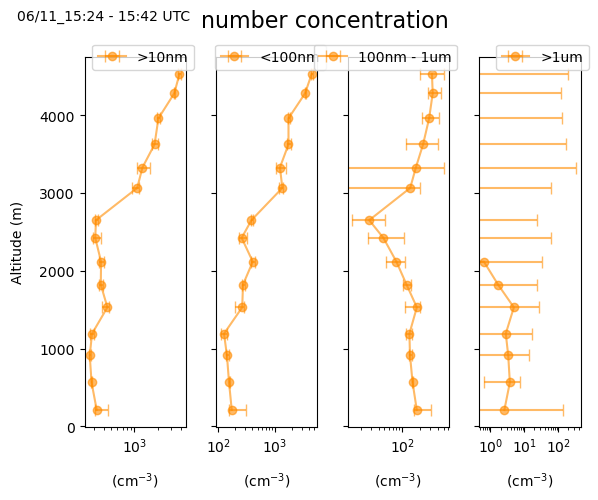

In [80]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY11_subset_median['CNgt10nm_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY11_subset_median['nSMPS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY11_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY11_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/11_15:24 - 15:42 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


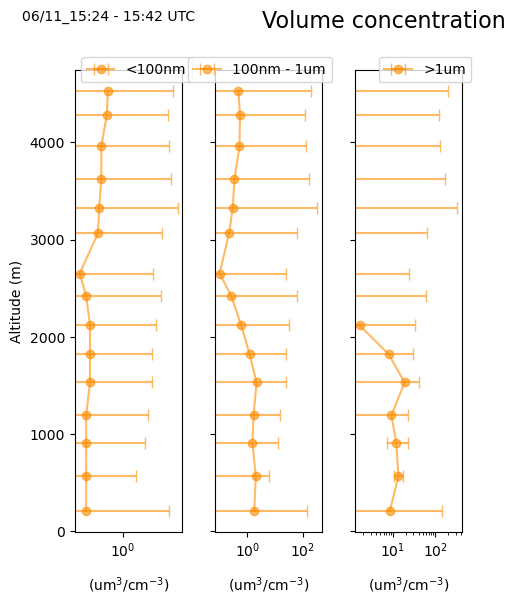

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY11_subset_median['vSMPS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY11_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY11_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY11_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11_subset_25['CNgt10nm_ZIEMBA'], DAY11_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/11_15:24 - 15:42 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [82]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220611_R0_L2_20230625T113225.ict')
DAY11b['3/10'] = DAY11b['CNgt3nm_ZIEMBA']/DAY11b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

# Print the modified subset dataframe
DAY11b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9830  2022-06-11 20:08:00 2022-06-11 20:08:01           31.216085  \
9831  2022-06-11 20:08:01 2022-06-11 20:08:02           31.216703   
9832  2022-06-11 20:08:02 2022-06-11 20:08:03           31.217282   
9833  2022-06-11 20:08:03 2022-06-11 20:08:04           31.217824   
9834  2022-06-11 20:08:04 2022-06-11 20:08:05           31.218325   
...                   ...                 ...                 ...   
10284 2022-06-11 20:15:34 2022-06-11 20:15:35           31.204221   
10285 2022-06-11 20:15:35 2022-06-11 20:15:36           31.203070   
10286 2022-06-11 20:15:36 2022-06-11 20:15:37           31.201921   
10287 2022-06-11 20:15:37 2022-06-11 20:15:38           31.200775   
10288 2022-06-11 20:15:38 2022-06-11 20:15:39           31.199631   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
9830            -64.640552                 127.335         423.995  \
9831            -64.641627                 125.935         406.150   
9832            -64.642730                 124.040         373.140   
9833            -64.643860                 121.770         379.310   
9834            -64.645014                 119.225         400.935   
...                    ...                     ...             ...   
10284           -64.650827                2831.710         598.055   
10285           -64.651345                2823.550         649.290   
10286           -64.651869                2815.510         668.320   
10287           -64.652397                2808.060         598.660   
10288           -64.652930                2801.570         515.795   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
9830           321.100                 178.910                        194.160  \
9831           316.895                 175.250                        175.690   
9832           312.670                 170.545                        152.435   
9833           305.745                 163.200                        141.490   
9834           305.040                 162.070                        131.515   
...                ...                     ...                            ...   
10284          405.215                 145.215                         70.990   
10285          433.200                 152.005                         70.170   
10286          457.660                 150.485                         65.950   
10287          431.830                 136.930                         64.770   
10288          381.305                 121.015                         56.290   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
9830                          32.205                          2.015  \
9831                          31.700                          2.210   
9832                          30.740                          2.485   
9833                          28.360                          2.220   
9834                          24.380                          1.800   
...                              ...                            ...   
10284                          7.485                          0.390   
10285                          8.365                          0.530   
10286                          7.260                          0.365   
10287                          5.840                          0.185   
10288                          6.895                          0.440   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
9830                        0.520                      16.325  \
9831                        1.170                       8.540   
9832                        2.210                      29.170   
9833                        2.080                      31.240   
9834                        2.075                      21.165   
...                           ...                         ...   
10284                       1.170                       8.540   

In [83]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY11b_subset.GPS_Altitude_THORNHILL.min(), DAY11b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11b_subset['Bins'] = pd.cut(DAY11b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY11b_subset_1000 = DAY11b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_11b = DAY11b_subset_1000[start_index:stop_index]
DAY1000_subset_11b


Time_Start               Time_Stop   
Bins                                                                 
(108.925, 139.393] 2022-06-11 20:08:07.500 2022-06-11 20:08:08.500  \
(139.393, 169.862] 2022-06-11 20:08:18.500 2022-06-11 20:08:19.500   
(169.862, 200.33]  2022-06-11 20:08:22.000 2022-06-11 20:08:23.000   
(200.33, 230.799]  2022-06-11 20:08:25.500 2022-06-11 20:08:26.500   
(230.799, 261.267] 2022-06-11 20:08:29.000 2022-06-11 20:08:30.000   
(261.267, 291.736] 2022-06-11 20:08:32.000 2022-06-11 20:08:33.000   
(291.736, 322.204] 2022-06-11 20:08:36.000 2022-06-11 20:08:37.000   
(322.204, 352.673] 2022-06-11 20:08:41.000 2022-06-11 20:08:42.000   
(352.673, 383.141] 2022-06-11 20:08:45.000 2022-06-11 20:08:46.000   
(383.141, 413.609] 2022-06-11 20:08:48.000 2022-06-11 20:08:49.000   
(413.609, 444.078] 2022-06-11 20:08:52.500 2022-06-11 20:08:53.500   
(444.078, 474.546] 2022-06-11 20:08:59.000 2022-06-11 20:09:00.000   
(474.546, 505.015] 2022-06-11 20:09:05.000 2022-06-11 20:09:06.000   
(505.015, 535.483] 2022-06-11 20:09:10.000 2022-06-11 20:09:11.000   
(535.483, 565.952] 2022-06-11 20:09:14.000 2022-06-11 20:09:15.000   
(565.952, 596.42]  2022-06-11 20:09:17.000 2022-06-11 20:09:18.000   
(596.42, 626.889]  2022-06-11 20:09:21.000 2022-06-11 20:09:22.000   
(626.889, 657.357] 2022-06-11 20:09:26.500 2022-06-11 20:09:27.500   
(657.357, 687.826] 2022-06-11 20:09:32.500 2022-06-11 20:09:33.500   
(687.826, 718.294] 2022-06-11 20:09:37.500 2022-06-11 20:09:38.500   
(718.294, 748.762] 2022-06-11 20:09:41.000 2022-06-11 20:09:42.000   
(748.762, 779.231] 2022-06-11 20:09:44.500 2022-06-11 20:09:45.500   
(779.231, 809.699] 2022-06-11 20:09:48.500 2022-06-11 20:09:49.500   
(809.699, 840.168] 2022-06-11 20:09:53.000 2022-06-11 20:09:54.000   
(840.168, 870.636] 2022-06-11 20:09:58.000 2022-06-11 20:09:59.000   
(870.636, 901.105] 2022-06-11 20:10:02.000 2022-06-11 20:10:03.000   
(901.105, 931.573] 2022-06-11 20:10:05.500 2022-06-11 20:10:06.500   
(931.573, 962.042] 2022-06-11 20:10:10.000 2022-06-11 20:10:11.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(108.925, 139.393]           31.219751           -64.649218  \
(139.393, 169.862]           31.221780           -64.662994   
(169.862, 200.33]            31.222112           -64.667273   
(200.33, 230.799]            31.222478           -64.671463   
(230.799, 261.267]           31.222965           -64.675553   
(261.267, 291.736]           31.223379           -64.678986   
(291.736, 322.204]           31.224086           -64.683442   
(322.204, 352.673]           31.225641           -64.688748   
(352.673, 383.141]           31.227667           -64.692540   
(383.141, 413.609]           31.229641           -64.694972   
(413.609, 444.078]           31.233076           -64.698029   
(444.078, 474.546]           31.238831           -64.701229   
(474.546, 505.015]           31.244779           -64.702329   
(505.015, 535.483]           31.249845           -64.701690   
(535.483, 565.952]           31.253694           -64.700051   
(565.952, 596.42]            31.256344           -64.698239   
(596.42, 626.889]            31.259478           -64.695140   
(626.889, 657.357]           31.262868           -64.689770   
(657.357, 687.826]           31.264964           -64.682800   
(687.826, 718.294]           31.265218           -64.676591   
(718.294, 748.762]           31.264542           -64.672314   
(748.762, 779.231]           31.263206           -64.668283   
(779.231, 809.699]           31.261038           -64.664062   
(809.699, 840.168]           31.257841           -64.659951   
(840.168, 870.636]           31.253431           -64.656509   
(870.636, 901.105]           31.249454           -64.654798   
(901.105, 931.573]           31.245809           -64.654098   
(931.573, 962.042]           31.241066           -64.654170   

                    GPS_Altitude_THORNHI

In [84]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY11b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY11b_subset_3000 = DAY11b_subset_1000[start_index:stop_index]
DAY11b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(992.51, 1022.978]   2022-06-11 20:10:20.500 2022-06-11 20:10:21.500  \
(1022.978, 1053.447] 2022-06-11 20:10:24.000 2022-06-11 20:10:25.000   
(1053.447, 1083.915] 2022-06-11 20:10:27.500 2022-06-11 20:10:28.500   
(1083.915, 1114.384] 2022-06-11 20:10:31.000 2022-06-11 20:10:32.000   
(1114.384, 1144.852] 2022-06-11 20:10:34.500 2022-06-11 20:10:35.500   
...                                      ...                     ...   
(2972.959, 3003.428] 2022-06-11 20:14:53.500 2022-06-11 20:14:54.500   
(3003.428, 3033.896] 2022-06-11 20:15:11.500 2022-06-11 20:15:12.500   
(3033.896, 3064.365] 2022-06-11 20:15:06.500 2022-06-11 20:15:07.500   
(3064.365, 3094.833] 2022-06-11 20:15:02.000 2022-06-11 20:15:03.000   
(3094.833, 3125.302] 2022-06-11 20:14:58.000 2022-06-11 20:14:59.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(992.51, 1022.978]             31.230824           -64.658997  \
(1022.978, 1053.447]           31.228020           -64.661901   
(1053.447, 1083.915]           31.225668           -64.665294   
(1083.915, 1114.384]           31.223786           -64.669063   
(1114.384, 1144.852]           31.222475           -64.673154   
...                                  ...                  ...   
(2972.959, 3003.428]           31.248967           -64.650137   
(3003.428, 3033.896]           31.230501           -64.641713   
(3033.896, 3064.365]           31.236496           -64.639950   
(3064.365, 3094.833]           31.241937           -64.638820   
(3094.833, 3125.302]           31.246759           -64.638322   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(992.51, 1022.978]                  1007.105        633.2675         481.9975  \
(1022.978, 1053.447]                1034.660        571.3350         442.5850   
(1053.447, 1083.915]                1068.345        587.8075         440.2750   
(1083.915, 1114.384]                1100.200        608.7400         455.6650   
(1114.384, 1144.852]                1130.580        602.1350         459.4600   
...                                      ...             ...              ...   
(2972.959, 3003.428]                2989.120        996.2250         667.0500   
(3003.428, 3033.896]                3019.390        945.8000         658.2425   
(3033.896, 3064.365]                3050.175       1099.2300         744.1300   
(3064.365, 3094.833]                3080.980       1335.3700         838.7250   
(3094.833, 3125.302]                3109.680       1489.8000         951.8600   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(992.51, 1022.978]                  256.5625                       188.8950  \
(1022.978, 1053.447]                217.8100                       171.4650   
(1053.447, 1083.915]                219.5625                       149.8150   
(1083.915, 1114.384]                233.3150                       166.8250   
(1114.384, 1144.852]                240.5875                       157.7425   
...                                      ...                            ...   
(2972.959, 3003.428]                349.7125                       112.3525   
(3003.428, 3033.896]                354.1150                       134.5575   
(3033.896, 3064.365]                421.5575                       151.1200   
(3064.365, 3094.833]                494.2150                       158.9500   
(3094.833, 3125.302]                575.4500                       185.1350   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(992.51, 1022.978]                          27.1550  \
(102

In [85]:
nbins = 15
bins11b = np.linspace(DAY11b_subset.GPS_Altitude_THORNHILL.min(), DAY11b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY11b_subset['Bins'] = pd.cut(DAY11b_subset['GPS_Altitude_THORNHILL'], bins11b)
DAY11b_subset_median = DAY11b_subset.groupby('Bins').median()
DAY11b_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(108.925, 312.048]   2022-06-11 20:08:18.500 2022-06-11 20:08:19.500  \
(312.048, 515.171]   2022-06-11 20:08:53.000 2022-06-11 20:08:54.000   
(515.171, 718.294]   2022-06-11 20:09:24.500 2022-06-11 20:09:25.500   
(718.294, 921.417]   2022-06-11 20:09:53.000 2022-06-11 20:09:54.000   
(921.417, 1124.54]   2022-06-11 20:10:20.000 2022-06-11 20:10:21.000   
(1124.54, 1327.663]  2022-06-11 20:10:45.000 2022-06-11 20:10:46.000   
(1327.663, 1530.786] 2022-06-11 20:11:08.500 2022-06-11 20:11:09.500   
(1530.786, 1733.909] 2022-06-11 20:11:33.000 2022-06-11 20:11:34.000   
(1733.909, 1937.032] 2022-06-11 20:12:00.500 2022-06-11 20:12:01.500   
(1937.032, 2140.155] 2022-06-11 20:12:26.500 2022-06-11 20:12:27.500   
(2140.155, 2343.278] 2022-06-11 20:12:51.000 2022-06-11 20:12:52.000   
(2343.278, 2546.401] 2022-06-11 20:13:20.000 2022-06-11 20:13:21.000   
(2546.401, 2749.524] 2022-06-11 20:13:48.500 2022-06-11 20:13:49.500   
(2749.524, 2952.647] 2022-06-11 20:14:23.000 2022-06-11 20:14:24.000   
(2952.647, 3155.77]  2022-06-11 20:14:53.500 2022-06-11 20:14:54.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(108.925, 312.048]             31.221780           -64.662994  \
(312.048, 515.171]             31.233483           -64.698336   
(515.171, 718.294]             31.261778           -64.691857   
(718.294, 921.417]             31.257841           -64.659951   
(921.417, 1124.54]             31.231253           -64.658622   
(1124.54, 1327.663]            31.222559           -64.686125   
(1327.663, 1530.786]           31.238983           -64.707219   
(1530.786, 1733.909]           31.264936           -64.701908   
(1733.909, 1937.032]           31.273333           -64.669241   
(1937.032, 2140.155]           31.250205           -64.651881   
(2140.155, 2343.278]           31.227144           -64.663695   
(2343.278, 2546.401]           31.228120           -64.697475   
(2546.401, 2749.524]           31.257330           -64.705581   
(2749.524, 2952.647]           31.272261           -64.667569   
(2952.647, 3155.77]            31.252073           -64.641713   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(108.925, 312.048]                   155.305        402.8950         309.0225  \
(312.048, 515.171]                   434.175        367.3500         277.0200   
(515.171, 718.294]                   631.770        464.1025         363.1875   
(718.294, 921.417]                   824.385        581.7750         445.4300   
(921.417, 1124.54]                  1003.830        649.1050         500.4350   
(1124.54, 1327.663]                 1236.980        598.4800         454.2650   
(1327.663, 1530.786]                1444.520        603.7375         452.3775   
(1530.786, 1733.909]                1630.490        487.7300         360.1600   
(1733.909, 1937.032]                1849.745        515.1400         367.3500   
(1937.032, 2140.155]                2041.725        534.2650         386.3700   
(2140.155, 2343.278]                2240.750        553.4650         390.3200   
(2343.278, 2546.401]                2445.220        509.8400         347.8750   
(2546.401, 2749.524]                2650.020        497.3575         349.4100   
(2749.524, 2952.647]                2856.760        532.9500         365.6400   
(2952.647, 3155.77]                 3070.200       1394.8350         877.0225   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(108.925, 312.048]                  164.9625                       129.2400  \
(312.048, 515.171]                  153.7650                       157.4600   
(515.171,

In [86]:
DAY11b_subset_25 = DAY11b_subset_median - DAY11b_subset.groupby('Bins').quantile(.25)
DAY11b_subset_25
DAY11b_subset_75 = DAY11b_subset.groupby('Bins').quantile(.75) - DAY11b_subset_median
DAY11b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(108.925, 312.048]   0 days 00:00:08.749999872 0 days 00:00:08.749999872  \
(312.048, 515.171]             0 days 00:00:08           0 days 00:00:08   
(515.171, 718.294]   0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(718.294, 921.417]      0 days 00:00:06.500000    0 days 00:00:06.500000   
(921.417, 1124.54]      0 days 00:00:06.500000    0 days 00:00:06.500000   
(1124.54, 1327.663]     0 days 00:00:05.500000    0 days 00:00:05.500000   
(1327.663, 1530.786] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(1530.786, 1733.909]           0 days 00:00:06           0 days 00:00:06   
(1733.909, 1937.032] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(1937.032, 2140.155] 0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(2140.155, 2343.278]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(2343.278, 2546.401]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(2546.401, 2749.524] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(2749.524, 2952.647]    0 days 00:01:04.500000    0 days 00:01:04.500000   
(2952.647, 3155.77]  0 days 00:00:13.250000128 0 days 00:00:13.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(108.925, 312.048]              0.000930             0.012226  \
(312.048, 515.171]              0.007283             0.005796   
(515.171, 718.294]              0.003028             0.008144   
(718.294, 921.417]              0.004363             0.004192   
(921.417, 1124.54]              0.006191             0.003556   
(1124.54, 1327.663]             0.001808             0.006805   
(1327.663, 1530.786]            0.006167             0.003285   
(1530.786, 1733.909]            0.004769             0.005684   
(1733.909, 1937.032]            0.001098             0.008155   
(1937.032, 2140.155]            0.005754             0.000549   
(2140.155, 2343.278]            0.004807             0.005826   
(2343.278, 2546.401]            0.006224             0.008225   
(2546.401, 2749.524]            0.006467             0.003875   
(2749.524, 2952.647]            0.003684             0.018018   
(2952.647, 3155.77]             0.013878             0.002432   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(108.925, 312.048]                  75.16375        97.89875         65.33750  \
(312.048, 515.171]                  34.92500        13.26000          5.11500   
(515.171, 718.294]                  35.07875        28.74000         13.88500   
(718.294, 921.417]                  39.13250        60.43250         28.37750   
(921.417, 1124.54]                  54.85000        45.88250         23.05750   
(1124.54, 1327.663]                 50.08000        13.09500         16.17750   
(1327.663, 1530.786]                44.99250        30.62125         10.06375   
(1530.786, 1733.909]                52.67000        49.36000         15.78000   
(1733.909, 1937.032]                30.15500        24.18625         40.59750   
(1937.032, 2140.155]                40.74750        13.74500         10.62250   
(2140.155, 2343.278]                50.43000        32.75500         17.77750   
(2343.278, 2546.401]                45.74500        26.02250         25.99750   
(2546.401, 2749.524]                47.04000        15.14625          3.35750   
(2749.524, 2952.647]                45.74000        65.40750         50.69250   
(2952.647, 3155.77]                 54.93250       314.44500        224.49250   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(108.925, 312.048]                   6.03625                       14.09375  \
(312.048, 515.171]    

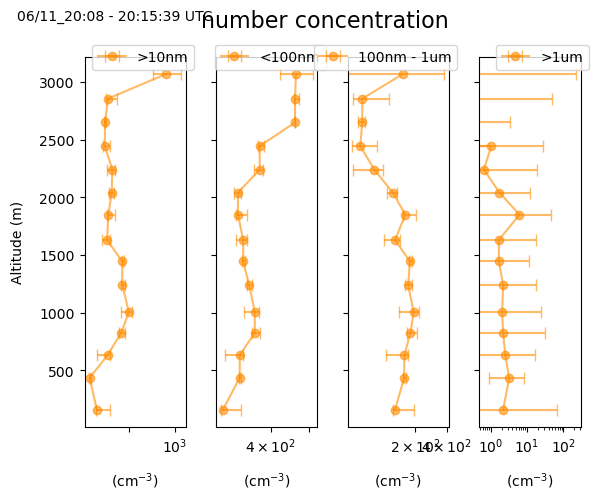

In [87]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY11b_subset_median['CNgt10nm_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY11b_subset_median['nSMPS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY11b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY11b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/11_20:08 - 20:15:39 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


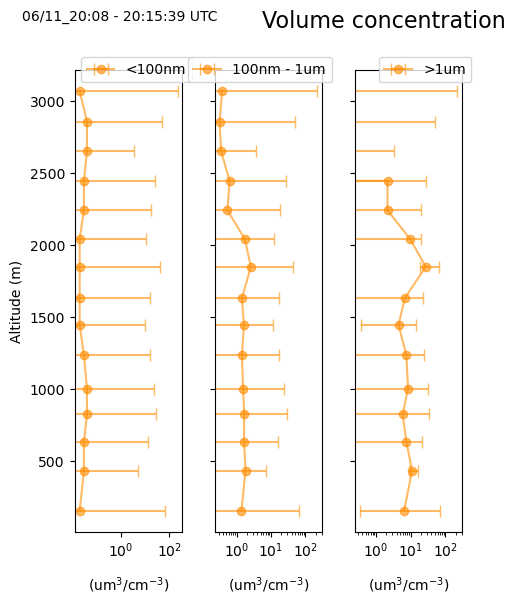

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY11b_subset_median['vSMPS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY11b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY11b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY11b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY11b_subset_25['CNgt10nm_ZIEMBA'], DAY11b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/11_20:08 - 20:15:39 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [89]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220613_R0_L1_20230625T113226.ict')
DAY13['3/10'] = DAY13['CNgt3nm_ZIEMBA']/DAY13['CNgt10nm_ZIEMBA']
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY13_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10015 2022-06-13 14:30:00 2022-06-13 14:30:01           32.210354  \
10016 2022-06-13 14:30:01 2022-06-13 14:30:02           32.209934   
10017 2022-06-13 14:30:02 2022-06-13 14:30:03           32.209541   
10018 2022-06-13 14:30:03 2022-06-13 14:30:04           32.209173   
10019 2022-06-13 14:30:04 2022-06-13 14:30:05           32.208832   
...                   ...                 ...                 ...   
10970 2022-06-13 14:45:55 2022-06-13 14:45:56           32.197220   
10971 2022-06-13 14:45:56 2022-06-13 14:45:57           32.196954   
10972 2022-06-13 14:45:57 2022-06-13 14:45:58           32.196726   
10973 2022-06-13 14:45:58 2022-06-13 14:45:59           32.196539   
10974 2022-06-13 14:45:59 2022-06-13 14:46:00           32.196391   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10015           -65.054053                 141.795         263.520  \
10016           -65.052981                 141.725         267.385   
10017           -65.051894                 141.615         271.070   
10018           -65.050793                 141.460         279.555   
10019           -65.049680                 141.275         265.880   
...                    ...                     ...             ...   
10970           -65.046274                4504.770        4422.310   
10971           -65.044914                4514.670        4615.320   
10972           -65.043543                4523.980        4819.800   
10973           -65.042160                4532.940        4678.200   
10974           -65.040769                4541.660        4542.570   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10015          201.960                  97.575                         93.930  \
10016          204.055                 100.195                        107.530   
10017          211.370                 105.685                        104.455   
10018          212.950                 108.305                        106.735   
10019          209.795                 105.940                        113.245   
...                ...                     ...                            ...   
10970         2998.500                2199.460                        282.350   
10971         2976.930                2185.390                        298.270   
10972         3041.020                2205.360                        275.470   
10973         3018.770                2182.170                        258.585   
10974         2979.680                2141.880                        265.895   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10015                         11.990                          0.550  \
10016                         16.675                          0.990   
10017                         16.725                          1.005   
10018                         15.240                          0.730   
10019                         17.415                          0.960   
...                              ...                            ...   
10970                         17.015                          0.465   
10971                         17.740                          0.460   
10972                         16.395                          0.420   
10973                         15.110                          0.380   
10974                         15.935                          0.415   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10015                        0.00                       0.000  \
10016                        0.00                       0.000   
10017                        0.52                       4.095   
10018                        0.52                       4.095   
10019                        0.52                       4.095   
...                           ...                         ...   
10970                        0.00                       0.000   

In [90]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13_subset.GPS_Altitude_THORNHILL.min(), DAY13_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13_subset['Bins'] = pd.cut(DAY13_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13_subset_1000 = DAY13_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13 = DAY13_subset_1000[start_index:stop_index]
DAY1000_subset_13


Time_Start               Time_Stop   
Bins                                                                 
(138.195, 182.23]  2022-06-13 14:30:32.000 2022-06-13 14:30:33.000  \
(182.23, 226.264]  2022-06-13 14:31:11.500 2022-06-13 14:31:12.500   
(226.264, 270.299] 2022-06-13 14:31:24.000 2022-06-13 14:31:25.000   
(270.299, 314.334] 2022-06-13 14:31:36.500 2022-06-13 14:31:37.500   
(314.334, 358.368] 2022-06-13 14:31:48.000 2022-06-13 14:31:49.000   
(358.368, 402.403] 2022-06-13 14:32:01.000 2022-06-13 14:32:02.000   
(402.403, 446.438] 2022-06-13 14:32:13.000 2022-06-13 14:32:14.000   
(446.438, 490.472] 2022-06-13 14:32:22.000 2022-06-13 14:32:23.000   
(490.472, 534.507] 2022-06-13 14:32:33.000 2022-06-13 14:32:34.000   
(534.507, 578.542] 2022-06-13 14:32:45.500 2022-06-13 14:32:46.500   
(578.542, 622.576] 2022-06-13 14:32:57.000 2022-06-13 14:32:58.000   
(622.576, 666.611] 2022-06-13 14:33:09.500 2022-06-13 14:33:10.500   
(666.611, 710.645] 2022-06-13 14:33:22.500 2022-06-13 14:33:23.500   
(710.645, 754.68]  2022-06-13 14:33:33.500 2022-06-13 14:33:34.500   
(754.68, 798.715]  2022-06-13 14:33:45.000 2022-06-13 14:33:46.000   
(798.715, 842.749] 2022-06-13 14:33:57.500 2022-06-13 14:33:58.500   
(842.749, 886.784] 2022-06-13 14:34:08.500 2022-06-13 14:34:09.500   
(886.784, 930.819] 2022-06-13 14:34:18.500 2022-06-13 14:34:19.500   
(930.819, 974.853] 2022-06-13 14:34:30.500 2022-06-13 14:34:31.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(138.195, 182.23]            32.211055           -65.017005  \
(182.23, 226.264]            32.245850           -64.994188   
(226.264, 270.299]           32.259414           -64.997626   
(270.299, 314.334]           32.271554           -65.006133   
(314.334, 358.368]           32.280090           -65.017838   
(358.368, 402.403]           32.285844           -65.033991   
(402.403, 446.438]           32.287315           -65.050159   
(446.438, 490.472]           32.285775           -65.062118   
(490.472, 534.507]           32.280658           -65.075490   
(534.507, 578.542]           32.270948           -65.087553   
(578.542, 622.576]           32.259496           -65.094807   
(622.576, 666.611]           32.245598           -65.097842   
(666.611, 710.645]           32.230841           -65.095918   
(710.645, 754.68]            32.219251           -65.089954   
(754.68, 798.715]            32.209003           -65.080036   
(798.715, 842.749]           32.201024           -65.065706   
(842.749, 886.784]           32.197439           -65.051087   
(886.784, 930.819]           32.197271           -65.037211   
(930.819, 974.853]           32.200986           -65.021099   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(138.195, 182.23]                 138.9350        278.7300         219.9450  \
(182.23, 226.264]                 199.8125        286.4050         224.9675   
(226.264, 270.299]                251.1650        277.7900         212.2100   
(270.299, 314.334]                292.3100        260.4525         202.5100   
(314.334, 358.368]                338.4650        261.9950         198.9600   
(358.368, 402.403]                380.4400        270.0950         211.4850   
(402.403, 446.438]                422.4850        268.1200         205.3250   
(446.438, 490.472]                469.4600        288.1650         214.9850   
(490.472, 534.507]                513.9000        272.6850         211.5900   
(534.507, 578.542]                556.2900        279.6250         218.8475   
(578.542, 622.576]                602.3600        341.4250         257.1000   
(622.576, 666.611]                645.1200        508.2850         391.9650   
(666.611, 710.645]                687.0825        555.6925         406.6675   
(710.645, 754.68]                 734.1000        57

In [91]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13_subset_3000 = DAY13_subset_1000[start_index:stop_index]
DAY13_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1018.888, 1062.923] 2022-06-13 14:34:55.500 2022-06-13 14:34:56.500  \
(1062.923, 1106.957] 2022-06-13 14:35:07.500 2022-06-13 14:35:08.500   
(1106.957, 1150.992] 2022-06-13 14:35:20.000 2022-06-13 14:35:21.000   
(1150.992, 1195.027] 2022-06-13 14:35:35.000 2022-06-13 14:35:36.000   
(1195.027, 1239.061] 2022-06-13 14:35:49.500 2022-06-13 14:35:50.500   
(1239.061, 1283.096] 2022-06-13 14:36:04.000 2022-06-13 14:36:05.000   
(1283.096, 1327.131] 2022-06-13 14:36:18.000 2022-06-13 14:36:19.000   
(1327.131, 1371.165] 2022-06-13 14:36:32.000 2022-06-13 14:36:33.000   
(1371.165, 1415.2]   2022-06-13 14:36:48.500 2022-06-13 14:36:49.500   
(1415.2, 1459.234]   2022-06-13 14:37:02.500 2022-06-13 14:37:03.500   
(1459.234, 1503.269] 2022-06-13 14:37:18.000 2022-06-13 14:37:19.000   
(1503.269, 1547.304] 2022-06-13 14:37:33.000 2022-06-13 14:37:34.000   
(1547.304, 1591.338] 2022-06-13 14:37:47.000 2022-06-13 14:37:48.000   
(1591.338, 1635.373] 2022-06-13 14:38:01.500 2022-06-13 14:38:02.500   
(1635.373, 1679.408] 2022-06-13 14:38:15.000 2022-06-13 14:38:16.000   
(1679.408, 1723.442] 2022-06-13 14:38:32.500 2022-06-13 14:38:33.500   
(1723.442, 1767.477] 2022-06-13 14:38:48.500 2022-06-13 14:38:49.500   
(1767.477, 1811.512] 2022-06-13 14:39:00.000 2022-06-13 14:39:01.000   
(1811.512, 1855.546] 2022-06-13 14:39:12.500 2022-06-13 14:39:13.500   
(1855.546, 1899.581] 2022-06-13 14:39:27.000 2022-06-13 14:39:28.000   
(1899.581, 1943.616] 2022-06-13 14:39:43.500 2022-06-13 14:39:44.500   
(1943.616, 1987.65]  2022-06-13 14:40:00.500 2022-06-13 14:40:01.500   
(1987.65, 2031.685]  2022-06-13 14:40:14.000 2022-06-13 14:40:15.000   
(2031.685, 2075.72]  2022-06-13 14:40:27.000 2022-06-13 14:40:28.000   
(2075.72, 2119.754]  2022-06-13 14:40:42.000 2022-06-13 14:40:43.000   
(2119.754, 2163.789] 2022-06-13 14:40:56.000 2022-06-13 14:40:57.000   
(2163.789, 2207.824] 2022-06-13 14:41:07.500 2022-06-13 14:41:08.500   
(2207.824, 2251.858] 2022-06-13 14:41:17.500 2022-06-13 14:41:18.500   
(2251.858, 2295.893] 2022-06-13 14:41:28.000 2022-06-13 14:41:29.000   
(2295.893, 2339.928] 2022-06-13 14:41:38.500 2022-06-13 14:41:39.500   
(2339.928, 2383.962] 2022-06-13 14:41:50.000 2022-06-13 14:41:51.000   
(2383.962, 2427.997] 2022-06-13 14:42:02.500 2022-06-13 14:42:03.500   
(2427.997, 2472.031] 2022-06-13 14:42:13.500 2022-06-13 14:42:14.500   
(2472.031, 2516.066] 2022-06-13 14:42:21.000 2022-06-13 14:42:22.000   
(2516.066, 2560.101] 2022-06-13 14:42:26.000 2022-06-13 14:42:27.000   
(2560.101, 2604.135] 2022-06-13 14:42:31.000 2022-06-13 14:42:32.000   
(2604.135, 2648.17]  2022-06-13 14:42:36.000 2022-06-13 14:42:37.000   
(2648.17, 2692.205]  2022-06-13 14:42:41.500 2022-06-13 14:42:42.500   
(2692.205, 2736.239] 2022-06-13 14:42:47.000 2022-06-13 14:42:48.000   
(2736.239, 2780.274] 2022-06-13 14:42:51.500 2022-06-13 14:42:52.500   
(2780.274, 2824.309] 2022-06-13 14:42:56.000 2022-06-13 14:42:57.000   
(2824.309, 2868.343] 2022-06-13 14:43:00.500 2022-06-13 14:43:01.500   
(2868.343, 2912.378] 2022-06-13 14:43:05.000 2022-06-13 14:43:06.000   
(2912.378, 2956.413] 2022-06-13 14:43:10.000 2022-06-13 14:43:11.000   
(2956.413, 3000.447] 2022-06-13 14:43:15.000 2022-06-13 14:43:16.000   
(3000.447, 3044.482] 2022-06-13 14:43:20.000 2022-06-13 14:43:21.000   
(3044.482, 3088.517] 2022-06-13 14:43:25.000 2022-06-13 14:43:26.000   
(3088.517, 3132.551] 2022-06-13 14:43:29.500 2022-06-13 14:43:30.500   
(3132.551, 3176.586] 2022-06-13 14:43:34.000 2022-06-13 14:43:35.000   
(3176.586, 3220.62]  2022-06-13 14:43:38.500 2022-06-13 14:43:39.500   
(3220.62, 3264.655]  2022-06-13 14:43:43.000 2022-06-13 14:43:44.000   
(3264.655, 3308.69]  2022-06-13 14:43:47.500 2022-06-13 14:43:48.500   
(3308.69, 3352.724]  2022-06-13 14:43:51.500 2022-06-13 14:43:52.500   
(3352.724, 3396.759] 2022-06-13 14:43:56.000 2022-06-13 14:43:57.000   
(3

In [92]:
nbins = 15
bins13 = np.linspace(DAY13_subset.GPS_Altitude_THORNHILL.min(), DAY13_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13_subset['Bins'] = pd.cut(DAY13_subset['GPS_Altitude_THORNHILL'], bins13)
DAY13_subset_median = DAY13_subset.groupby('Bins').median()
DAY13_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(138.195, 431.759]   2022-06-13 14:31:07.500 2022-06-13 14:31:08.500  \
(431.759, 725.324]   2022-06-13 14:32:53.000 2022-06-13 14:32:54.000   
(725.324, 1018.888]  2022-06-13 14:34:10.500 2022-06-13 14:34:11.500   
(1018.888, 1312.452] 2022-06-13 14:35:35.000 2022-06-13 14:35:36.000   
(1312.452, 1606.017] 2022-06-13 14:37:10.000 2022-06-13 14:37:11.000   
(1606.017, 1899.581] 2022-06-13 14:38:47.000 2022-06-13 14:38:48.000   
(1899.581, 2193.145] 2022-06-13 14:40:22.000 2022-06-13 14:40:23.000   
(2193.145, 2486.71]  2022-06-13 14:41:45.000 2022-06-13 14:41:46.000   
(2486.71, 2780.274]  2022-06-13 14:42:37.000 2022-06-13 14:42:38.000   
(2780.274, 3073.838] 2022-06-13 14:43:09.500 2022-06-13 14:43:10.500   
(3073.838, 3367.403] 2022-06-13 14:43:40.500 2022-06-13 14:43:41.500   
(3367.403, 3660.967] 2022-06-13 14:44:11.500 2022-06-13 14:44:12.500   
(3660.967, 3954.531] 2022-06-13 14:44:43.000 2022-06-13 14:44:44.000   
(3954.531, 4248.096] 2022-06-13 14:45:14.000 2022-06-13 14:45:15.000   
(4248.096, 4541.66]  2022-06-13 14:45:44.500 2022-06-13 14:45:45.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(138.195, 431.759]             32.241443           -65.013104  \
(431.759, 725.324]             32.263679           -65.092146   
(725.324, 1018.888]            32.202565           -65.048325   
(1018.888, 1312.452]           32.265223           -64.996100   
(1312.452, 1606.017]           32.259416           -65.084131   
(1606.017, 1899.581]           32.204696           -65.008193   
(1899.581, 2193.145]           32.286652           -65.014069   
(2193.145, 2486.71]            32.238302           -65.065115   
(2486.71, 2780.274]            32.225466           -64.997932   
(2780.274, 3073.838]           32.255797           -64.973825   
(3073.838, 3367.403]           32.285758           -64.991220   
(3367.403, 3660.967]           32.285919           -65.029918   
(3660.967, 3954.531]           32.264277           -65.061665   
(3954.531, 4248.096]           32.232417           -65.076211   
(4248.096, 4541.66]            32.202224           -65.059554   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(138.195, 431.759]                  187.8625        273.8450         214.5950  \
(431.759, 725.324]                  585.9750        320.4050         244.1300   
(725.324, 1018.888]                 874.6000        436.4425         334.4650   
(1018.888, 1312.452]               1172.5300        391.9000         293.4700   
(1312.452, 1606.017]               1464.1200        389.6200         288.2700   
(1606.017, 1899.581]               1738.1700        433.7750         320.2900   
(1899.581, 2193.145]               2039.4000        458.7200         331.8200   
(2193.145, 2486.71]                2344.8100        394.8400         279.2500   
(2486.71, 2780.274]                2634.5900        399.4800         280.7300   
(2780.274, 3073.838]               2933.9350        414.6000         288.6525   
(3073.838, 3367.403]               3216.1100       1257.0400         871.4775   
(3367.403, 3660.967]               3520.0800       1903.1700        1303.4500   
(3660.967, 3954.531]               3798.3500       2418.2800        1648.9100   
(3954.531, 4248.096]               4083.2600       3145.4400        2073.1200   
(4248.096, 4541.66]                4385.6850       3848.2600        2549.3450   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(138.195, 431.759]                  105.2125                       102.1250  \
(431.759, 725.324]                  116.4450                        95.8350   
(725.324,

In [93]:
DAY13_subset_25 = DAY13_subset_median - DAY13_subset.groupby('Bins').quantile(.25)
DAY13_subset_25
DAY13_subset_75 = DAY13_subset.groupby('Bins').quantile(.75) - DAY13_subset_median
DAY13_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(138.195, 431.759]   0 days 00:00:33.250000128 0 days 00:00:33.250000128  \
(431.759, 725.324]             0 days 00:00:19           0 days 00:00:19   
(725.324, 1018.888]  0 days 00:00:19.250000128 0 days 00:00:19.250000128   
(1018.888, 1312.452]    0 days 00:00:22.500000    0 days 00:00:22.500000   
(1312.452, 1606.017]    0 days 00:00:24.500000    0 days 00:00:24.500000   
(1606.017, 1899.581]    0 days 00:00:23.500000    0 days 00:00:23.500000   
(1899.581, 2193.145]    0 days 00:00:23.500000    0 days 00:00:23.500000   
(2193.145, 2486.71]     0 days 00:00:17.500000    0 days 00:00:17.500000   
(2486.71, 2780.274]            0 days 00:00:08           0 days 00:00:08   
(2780.274, 3073.838] 0 days 00:00:07.749999872 0 days 00:00:07.749999872   
(3073.838, 3367.403] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3367.403, 3660.967] 0 days 00:00:07.749999872 0 days 00:00:07.749999872   
(3660.967, 3954.531]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(3954.531, 4248.096]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(4248.096, 4541.66]  0 days 00:00:07.250000128 0 days 00:00:07.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(138.195, 431.759]              0.033634             0.014106  \
(431.759, 725.324]              0.016343             0.015550   
(725.324, 1018.888]             0.006433             0.026262   
(1018.888, 1312.452]            0.019731             0.006467   
(1312.452, 1606.017]            0.023962             0.011330   
(1606.017, 1899.581]            0.018382             0.021764   
(1899.581, 2193.145]            0.005962             0.024890   
(2193.145, 2486.71]             0.018848             0.019200   
(2486.71, 2780.274]             0.004992             0.009931   
(2780.274, 3073.838]            0.009034             0.001158   
(3073.838, 3367.403]            0.003103             0.007646   
(3367.403, 3660.967]            0.002934             0.009383   
(3660.967, 3954.531]            0.006378             0.006438   
(3954.531, 4248.096]            0.008404             0.001605   
(4248.096, 4541.66]             0.005589             0.008956   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(138.195, 431.759]                  120.7050        11.50000          8.90000  \
(431.759, 725.324]                   66.1700       195.11500        147.95500   
(725.324, 1018.888]                  77.5100        20.09750          7.22125   
(1018.888, 1312.452]                 72.2850        17.61000         10.19000   
(1312.452, 1606.017]                 68.6700        22.31750         19.05000   
(1606.017, 1899.581]                 90.7400        13.73000         12.35000   
(1899.581, 2193.145]                 68.7350        11.24000          5.59000   
(2193.145, 2486.71]                  59.6100        12.54500          5.75500   
(2486.71, 2780.274]                  60.5300        14.71000          3.42500   
(2780.274, 3073.838]                 66.1975        81.80625         28.11375   
(3073.838, 3367.403]                 74.2100       162.82250        105.96375   
(3367.403, 3660.967]                 75.0925        92.75000         47.53250   
(3660.967, 3954.531]                 75.4950       277.18000        125.79000   
(3954.531, 4248.096]                 76.0200       122.50000         75.39000   
(4248.096, 4541.66]                  83.1125       396.68750        245.29750   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(138.195, 431.759]                   5.92375                        5.37000  \
(431.759, 725.324]    

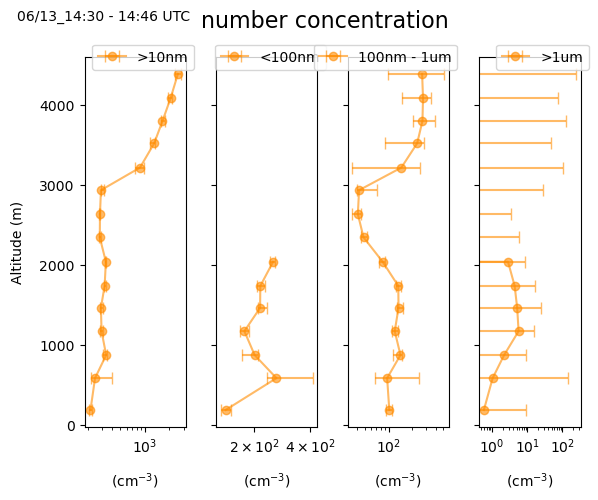

In [94]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY13_subset_median['CNgt10nm_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY13_subset_median['nSMPS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY13_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY13_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
ax[1].xaxis.set_minor_locator(ticker.NullLocator())


# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/13_14:30 - 14:46 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


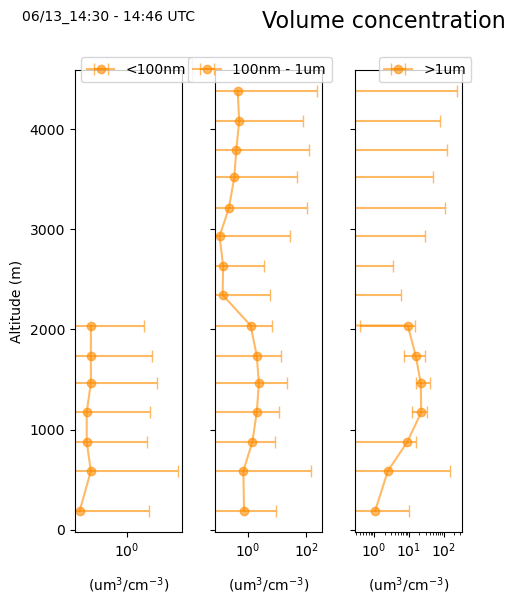

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY13_subset_median['vSMPS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY13_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY13_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY13_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13_subset_25['CNgt10nm_ZIEMBA'], DAY13_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/13_14:30 - 14:46 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [96]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220613_R0_L2_20230625T113226.ict')
DAY13b['3/10'] = DAY13b['CNgt3nm_ZIEMBA']/DAY13b['CNgt10nm_ZIEMBA']
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY13b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10610 2022-06-13 19:46:00 2022-06-13 19:46:01           32.251226  \
10611 2022-06-13 19:46:01 2022-06-13 19:46:02           32.250414   
10612 2022-06-13 19:46:02 2022-06-13 19:46:03           32.249605   
10613 2022-06-13 19:46:03 2022-06-13 19:46:04           32.248799   
10614 2022-06-13 19:46:04 2022-06-13 19:46:05           32.247996   
...                   ...                 ...                 ...   
11985 2022-06-13 20:08:55 2022-06-13 20:08:56           32.290180   
11986 2022-06-13 20:08:56 2022-06-13 20:08:57           32.289203   
11987 2022-06-13 20:08:57 2022-06-13 20:08:58           32.288204   
11988 2022-06-13 20:08:58 2022-06-13 20:08:59           32.287185   
11989 2022-06-13 20:08:59 2022-06-13 20:09:00           32.286146   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10610           -65.007304                  106.13         248.720  \
10611           -65.006555                  105.59         245.050   
10612           -65.005808                  106.45         244.575   
10613           -65.005062                  108.91         237.025   
10614           -65.004323                  112.60         233.855   
...                    ...                     ...             ...   
11985           -64.996666                 4558.09        4284.720   
11986           -64.997413                 4565.53        4059.930   
11987           -64.998124                 4572.98        4020.480   
11988           -64.998799                 4580.36        4055.780   
11989           -64.999437                 4587.50        4087.660   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10610          199.575                  74.955                         96.245  \
10611          192.875                  77.615                         89.315   
10612          192.450                  78.325                         88.850   
10613          194.690                  76.215                         92.050   
10614          199.060                  77.235                         93.730   
...                ...                     ...                            ...   
11985         2691.220                1867.720                        312.560   
11986         2591.210                1835.100                        312.175   
11987         2627.360                1870.590                        323.175   
11988         2646.360                1863.520                        317.435   
11989         2631.110                1856.250                        303.005   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10610                         16.920                          1.075  \
10611                         15.265                          0.865   
10612                         15.050                          0.855   
10613                         16.360                          1.025   
10614                         15.245                          0.855   
...                              ...                            ...   
11985                         19.675                          0.540   
11986                         18.895                          0.490   
11987                         20.150                          0.565   
11988                         20.950                          0.610   
11989                         20.405                          0.590   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10610                        0.52                       6.490  \
10611                        0.52                       6.490   
10612                        0.52                       6.485   
10613                        0.52                       6.485   
10614                        0.00                       0.000   
...                           ...                         ...   
11985                        0.00                       0.000   

In [97]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY13b_subset.GPS_Altitude_THORNHILL.min(), DAY13b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13b_subset['Bins'] = pd.cut(DAY13b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY13b_subset_1000 = DAY13b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_13b = DAY13b_subset_1000[start_index:stop_index]
DAY1000_subset_13b


Time_Start               Time_Stop   
Bins                                                                 
(105.59, 150.409]  2022-06-13 19:46:21.500 2022-06-13 19:46:22.500  \
(150.409, 195.228] 2022-06-13 19:46:50.000 2022-06-13 19:46:51.000   
(195.228, 240.047] 2022-06-13 19:47:03.500 2022-06-13 19:47:04.500   
(240.047, 284.866] 2022-06-13 19:47:16.500 2022-06-13 19:47:17.500   
(284.866, 329.686] 2022-06-13 19:47:33.000 2022-06-13 19:47:34.000   
(329.686, 374.505] 2022-06-13 19:47:48.000 2022-06-13 19:47:49.000   
(374.505, 419.324] 2022-06-13 19:48:00.500 2022-06-13 19:48:01.500   
(419.324, 464.143] 2022-06-13 19:48:11.500 2022-06-13 19:48:12.500   
(464.143, 508.962] 2022-06-13 19:48:21.500 2022-06-13 19:48:22.500   
(508.962, 553.781] 2022-06-13 19:48:37.000 2022-06-13 19:48:38.000   
(553.781, 598.6]   2022-06-13 19:48:55.000 2022-06-13 19:48:56.000   
(598.6, 643.419]   2022-06-13 19:49:09.500 2022-06-13 19:49:10.500   
(643.419, 688.238] 2022-06-13 19:49:22.000 2022-06-13 19:49:23.000   
(688.238, 733.057] 2022-06-13 19:49:35.000 2022-06-13 19:49:36.000   
(733.057, 777.876] 2022-06-13 19:49:47.500 2022-06-13 19:49:48.500   
(777.876, 822.696] 2022-06-13 19:49:59.500 2022-06-13 19:50:00.500   
(822.696, 867.515] 2022-06-13 19:50:14.500 2022-06-13 19:50:15.500   
(867.515, 912.334] 2022-06-13 19:50:32.500 2022-06-13 19:50:33.500   
(912.334, 957.153] 2022-06-13 19:50:47.000 2022-06-13 19:50:48.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(105.59, 150.409]            32.234071           -64.991872  \
(150.409, 195.228]           32.223075           -64.962152   
(195.228, 240.047]           32.226720           -64.946639   
(240.047, 284.866]           32.235319           -64.934760   
(284.866, 329.686]           32.250726           -64.927562   
(329.686, 374.505]           32.265647           -64.930256   
(374.505, 419.324]           32.275791           -64.938610   
(419.324, 464.143]           32.282020           -64.948867   
(464.143, 508.962]           32.284975           -64.959430   
(508.962, 553.781]           32.284608           -64.976344   
(553.781, 598.6]             32.276141           -64.993413   
(598.6, 643.419]             32.263973           -65.001192   
(643.419, 688.238]           32.251852           -65.002016   
(688.238, 733.057]           32.239716           -64.996778   
(733.057, 777.876]           32.230400           -64.986641   
(777.876, 822.696]           32.225296           -64.973288   
(822.696, 867.515]           32.226621           -64.954741   
(867.515, 912.334]           32.239988           -64.938082   
(912.334, 957.153]           32.255844           -64.934677   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(105.59, 150.409]                 119.6275        255.0650         199.3575  \
(150.409, 195.228]                172.9900        253.0750         210.0950   
(195.228, 240.047]                218.5850        233.1300         178.9725   
(240.047, 284.866]                261.7975        217.1525         174.9075   
(284.866, 329.686]                309.0100        200.1050         155.6200   
(329.686, 374.505]                352.0100        199.3200         151.7600   
(374.505, 419.324]                396.1500        197.6750         152.4875   
(419.324, 464.143]                442.3500        188.3200         149.9875   
(464.143, 508.962]                489.9675        194.3250         150.8575   
(508.962, 553.781]                537.7850        185.7900         151.7500   
(553.781, 598.6]                  568.2850        190.3900         144.3500   
(598.6, 643.419]                  627.0200        200.8750         158.0550   
(643.419, 688.238]                662.8850        216.2850         161.8850   
(688.238, 733.057]                707.2050        23

In [98]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY13b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY13b_subset_3000 = DAY13b_subset_1000[start_index:stop_index]
DAY13b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1001.972, 1046.791] 2022-06-13 19:51:08.500 2022-06-13 19:51:09.500  \
(1046.791, 1091.61]  2022-06-13 19:51:18.500 2022-06-13 19:51:19.500   
(1091.61, 1136.429]  2022-06-13 19:51:28.500 2022-06-13 19:51:29.500   
(1136.429, 1181.248] 2022-06-13 19:51:38.500 2022-06-13 19:51:39.500   
(1181.248, 1226.067] 2022-06-13 19:51:52.000 2022-06-13 19:51:53.000   
(1226.067, 1270.887] 2022-06-13 19:52:08.500 2022-06-13 19:52:09.500   
(1270.887, 1315.706] 2022-06-13 19:52:25.000 2022-06-13 19:52:26.000   
(1315.706, 1360.525] 2022-06-13 19:52:41.000 2022-06-13 19:52:42.000   
(1360.525, 1405.344] 2022-06-13 19:52:54.500 2022-06-13 19:52:55.500   
(1405.344, 1450.163] 2022-06-13 19:53:11.000 2022-06-13 19:53:12.000   
(1450.163, 1494.982] 2022-06-13 19:53:35.000 2022-06-13 19:53:36.000   
(1494.982, 1539.801] 2022-06-13 19:54:10.500 2022-06-13 19:54:11.500   
(1539.801, 1584.62]  2022-06-13 19:54:46.000 2022-06-13 19:54:47.000   
(1584.62, 1629.439]  2022-06-13 19:55:09.500 2022-06-13 19:55:10.500   
(1629.439, 1674.258] 2022-06-13 19:55:28.500 2022-06-13 19:55:29.500   
(1674.258, 1719.078] 2022-06-13 19:55:48.000 2022-06-13 19:55:49.000   
(1719.078, 1763.897] 2022-06-13 19:56:21.500 2022-06-13 19:56:22.500   
(1763.897, 1808.716] 2022-06-13 19:57:05.500 2022-06-13 19:57:06.500   
(1808.716, 1853.535] 2022-06-13 19:57:40.500 2022-06-13 19:57:41.500   
(1853.535, 1898.354] 2022-06-13 19:58:15.500 2022-06-13 19:58:16.500   
(1898.354, 1943.173] 2022-06-13 19:58:54.500 2022-06-13 19:58:55.500   
(1943.173, 1987.992] 2022-06-13 19:59:24.500 2022-06-13 19:59:25.500   
(1987.992, 2032.811] 2022-06-13 19:59:51.000 2022-06-13 19:59:52.000   
(2032.811, 2077.63]  2022-06-13 20:00:20.500 2022-06-13 20:00:21.500   
(2077.63, 2122.45]   2022-06-13 20:00:55.000 2022-06-13 20:00:56.000   
(2122.45, 2167.269]  2022-06-13 20:01:26.500 2022-06-13 20:01:27.500   
(2167.269, 2212.088] 2022-06-13 20:01:44.000 2022-06-13 20:01:45.000   
(2212.088, 2256.907] 2022-06-13 20:01:55.500 2022-06-13 20:01:56.500   
(2256.907, 2301.726] 2022-06-13 20:02:09.500 2022-06-13 20:02:10.500   
(2301.726, 2346.545] 2022-06-13 20:02:23.500 2022-06-13 20:02:24.500   
(2346.545, 2391.364] 2022-06-13 20:02:35.500 2022-06-13 20:02:36.500   
(2391.364, 2436.183] 2022-06-13 20:02:47.000 2022-06-13 20:02:48.000   
(2436.183, 2481.002] 2022-06-13 20:03:00.000 2022-06-13 20:03:01.000   
(2481.002, 2525.821] 2022-06-13 20:03:21.500 2022-06-13 20:03:22.500   
(2525.821, 2570.64]  2022-06-13 20:03:43.000 2022-06-13 20:03:44.000   
(2570.64, 2615.46]   2022-06-13 20:03:57.000 2022-06-13 20:03:58.000   
(2615.46, 2660.279]  2022-06-13 20:04:08.500 2022-06-13 20:04:09.500   
(2660.279, 2705.098] 2022-06-13 20:04:20.500 2022-06-13 20:04:21.500   
(2705.098, 2749.917] 2022-06-13 20:04:37.000 2022-06-13 20:04:38.000   
(2749.917, 2794.736] 2022-06-13 20:04:54.000 2022-06-13 20:04:55.000   
(2794.736, 2839.555] 2022-06-13 20:05:06.000 2022-06-13 20:05:07.000   
(2839.555, 2884.374] 2022-06-13 20:05:14.000 2022-06-13 20:05:15.000   
(2884.374, 2929.193] 2022-06-13 20:05:20.500 2022-06-13 20:05:21.500   
(2929.193, 2974.012] 2022-06-13 20:05:27.000 2022-06-13 20:05:28.000   
(2974.012, 3018.832] 2022-06-13 20:05:34.000 2022-06-13 20:05:35.000   
(3018.832, 3063.651] 2022-06-13 20:05:41.000 2022-06-13 20:05:42.000   
(3063.651, 3108.47]  2022-06-13 20:05:49.000 2022-06-13 20:05:50.000   
(3108.47, 3153.289]  2022-06-13 20:05:56.500 2022-06-13 20:05:57.500   
(3153.289, 3198.108] 2022-06-13 20:06:02.500 2022-06-13 20:06:03.500   
(3198.108, 3242.927] 2022-06-13 20:06:08.500 2022-06-13 20:06:09.500   
(3242.927, 3287.746] 2022-06-13 20:06:14.000 2022-06-13 20:06:15.000   
(3287.746, 3332.565] 2022-06-13 20:06:18.500 2022-06-13 20:06:19.500   
(3332.565, 3377.384] 2022-06-13 20:06:23.000 2022-06-13 20:06:24.000   
(3377.384, 3422.203] 2022-06-13 20:06:29.500 2022-06-13 20:06:30.500   
(3

In [99]:
nbins = 15
bins13b = np.linspace(DAY13b_subset.GPS_Altitude_THORNHILL.min(), DAY13b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY13b_subset['Bins'] = pd.cut(DAY13b_subset['GPS_Altitude_THORNHILL'], bins13b)
DAY13b_subset_median = DAY13b_subset.groupby('Bins').median()
DAY13b_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(105.59, 404.384]    2022-06-13 19:47:02.000 2022-06-13 19:47:03.000  \
(404.384, 703.178]   2022-06-13 19:48:48.500 2022-06-13 19:48:49.500   
(703.178, 1001.972]  2022-06-13 19:50:18.500 2022-06-13 19:50:19.500   
(1001.972, 1300.766] 2022-06-13 19:51:47.000 2022-06-13 19:51:48.000   
(1300.766, 1599.56]  2022-06-13 19:53:48.000 2022-06-13 19:53:49.000   
(1599.56, 1898.354]  2022-06-13 19:56:51.000 2022-06-13 19:56:52.000   
(1898.354, 2197.148] 2022-06-13 20:00:11.500 2022-06-13 20:00:12.500   
(2197.148, 2495.942] 2022-06-13 20:02:33.500 2022-06-13 20:02:34.500   
(2495.942, 2794.736] 2022-06-13 20:04:11.000 2022-06-13 20:04:12.000   
(2794.736, 3093.53]  2022-06-13 20:05:26.000 2022-06-13 20:05:27.000   
(3093.53, 3392.324]  2022-06-13 20:06:09.000 2022-06-13 20:06:10.000   
(3392.324, 3691.118] 2022-06-13 20:06:45.500 2022-06-13 20:06:46.500   
(3691.118, 3989.912] 2022-06-13 20:07:21.000 2022-06-13 20:07:22.000   
(3989.912, 4288.706] 2022-06-13 20:07:58.500 2022-06-13 20:07:59.500   
(4288.706, 4587.5]   2022-06-13 20:08:39.000 2022-06-13 20:08:40.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.59, 404.384]              32.237383           -64.948240  \
(404.384, 703.178]             32.279024           -64.987890   
(703.178, 1001.972]            32.234432           -64.950159   
(1001.972, 1300.766]           32.287120           -64.987279   
(1300.766, 1599.56]            32.235394           -64.966336   
(1599.56, 1898.354]            32.262665           -65.001294   
(1898.354, 2197.148]           32.262596           -64.987362   
(2197.148, 2495.942]           32.264061           -65.003472   
(2495.942, 2794.736]           32.245821           -64.944073   
(2794.736, 3093.53]            32.276418           -64.995298   
(3093.53, 3392.324]            32.233151           -64.996399   
(3392.324, 3691.118]           32.222579           -64.948736   
(3691.118, 3989.912]           32.253375           -64.916181   
(3989.912, 4288.706]           32.293824           -64.930143   
(4288.706, 4587.5]             32.302105           -64.980390   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(105.59, 404.384]                   213.7250        231.2650         178.4800  \
(404.384, 703.178]                  557.9500        196.6825         152.7750   
(703.178, 1001.972]                 856.8725        299.4925         228.4825   
(1001.972, 1300.766]               1188.6300        412.9100         307.7950   
(1300.766, 1599.56]                1492.5500        376.5300         280.6150   
(1599.56, 1898.354]                1775.7800        349.2750         255.6200   
(1898.354, 2197.148]               2046.3000        332.0925         244.8750   
(2197.148, 2495.942]               2359.0650        373.5100         265.1100   
(2495.942, 2794.736]               2647.5900        401.0500         281.7650   
(2794.736, 3093.53]                2947.9100       1077.6700         758.7400   
(3093.53, 3392.324]                3220.6400       1841.2300        1257.9200   
(3392.324, 3691.118]               3528.7950       2451.9000        1641.4400   
(3691.118, 3989.912]               3842.6100       3249.8500        2133.9700   
(3989.912, 4288.706]               4153.1800       3789.9050        2454.6400   
(4288.706, 4587.5]                 4437.2000       4165.5000        2646.3600   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(105.59, 404.384]                    69.9950                        72.6550  \
(404.384, 703.178]                   40.8350                        51.7500   
(703.178,

In [100]:
DAY13b_subset_25 = DAY13b_subset_median - DAY13b_subset.groupby('Bins').quantile(.25)
DAY13b_subset_25
DAY13b_subset_75 = DAY13b_subset.groupby('Bins').quantile(.75) - DAY13b_subset_median
DAY13b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(105.59, 404.384]       0 days 00:00:30.500000    0 days 00:00:30.500000  \
(404.384, 703.178]   0 days 00:00:22.250000128 0 days 00:00:22.250000128   
(703.178, 1001.972]  0 days 00:00:22.250000128 0 days 00:00:22.250000128   
(1001.972, 1300.766]    0 days 00:00:21.500000    0 days 00:00:21.500000   
(1300.766, 1599.56]     0 days 00:00:38.500000    0 days 00:00:38.500000   
(1599.56, 1898.354]     0 days 00:00:52.500000    0 days 00:00:52.500000   
(1898.354, 2197.148] 0 days 00:00:47.250000128 0 days 00:00:47.250000128   
(2197.148, 2495.942] 0 days 00:00:23.250000128 0 days 00:00:23.250000128   
(2495.942, 2794.736]           0 days 00:00:25           0 days 00:00:25   
(2794.736, 3093.53]            0 days 00:00:12           0 days 00:00:12   
(3093.53, 3392.324]            0 days 00:00:09           0 days 00:00:09   
(3392.324, 3691.118] 0 days 00:00:08.749999872 0 days 00:00:08.749999872   
(3691.118, 3989.912]    0 days 00:00:08.500000    0 days 00:00:08.500000   
(3989.912, 4288.706] 0 days 00:00:09.749999872 0 days 00:00:09.749999872   
(4288.706, 4587.5]             0 days 00:00:10           0 days 00:00:10   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.59, 404.384]               0.013593             0.016156  \
(404.384, 703.178]              0.004900             0.023242   
(703.178, 1001.972]             0.014400             0.012955   
(1001.972, 1300.766]            0.004992             0.026126   
(1300.766, 1599.56]             0.020502             0.020391   
(1599.56, 1898.354]             0.021909             0.027016   
(1898.354, 2197.148]            0.023235             0.032303   
(2197.148, 2495.942]            0.022288             0.010924   
(2495.942, 2794.736]            0.026669             0.010491   
(2794.736, 3093.53]             0.006150             0.013062   
(3093.53, 3392.324]             0.008772             0.009855   
(3392.324, 3691.118]            0.004644             0.011379   
(3691.118, 3989.912]            0.010028             0.001136   
(3989.912, 4288.706]            0.006915             0.008026   
(4288.706, 4587.5]              0.002937             0.012850   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(105.59, 404.384]                   94.22500        21.52750         20.15000  \
(404.384, 703.178]                  73.73375         9.05125          5.16625   
(703.178, 1001.972]                 52.74750        25.79125         17.89375   
(1001.972, 1300.766]                54.76000        33.65000         12.33000   
(1300.766, 1599.56]                 38.49500        11.38000          4.06000   
(1599.56, 1898.354]                 54.14000        19.92750         14.87500   
(1898.354, 2197.148]                60.22750        14.90250          9.06375   
(2197.148, 2495.942]                86.99750        13.71250          4.60625   
(2495.942, 2794.736]                73.36000        13.93500          7.97500   
(2794.736, 3093.53]                 73.11000       261.29000        144.78000   
(3093.53, 3392.324]                 81.70000       324.04000        203.84000   
(3392.324, 3691.118]                72.98500       147.46000         90.92250   
(3691.118, 3989.912]                78.96000       239.52000        136.95000   
(3989.912, 4288.706]                56.97000       144.08250         52.49750   
(4288.706, 4587.5]                  74.89000       119.22000         41.38000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(105.59, 404.384]                   18.11250                        8.68500  \
(404.384, 703.178]    

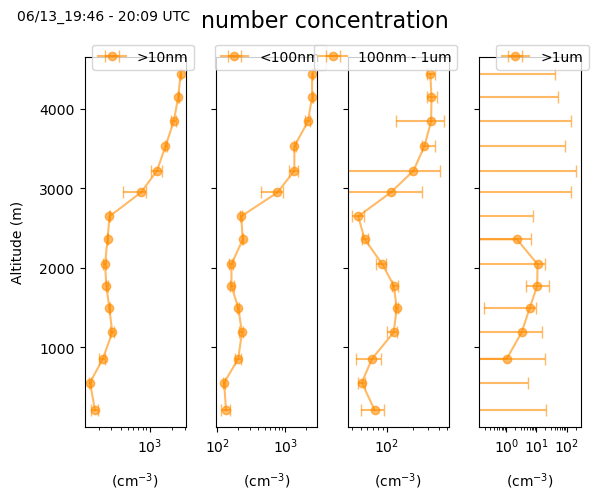

In [101]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY13b_subset_median['CNgt10nm_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY13b_subset_median['nSMPS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY13b_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY13b_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)
# Reduce the number of x-axis tickers to 2 for ax[0]
# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/13_19:46 - 20:09 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


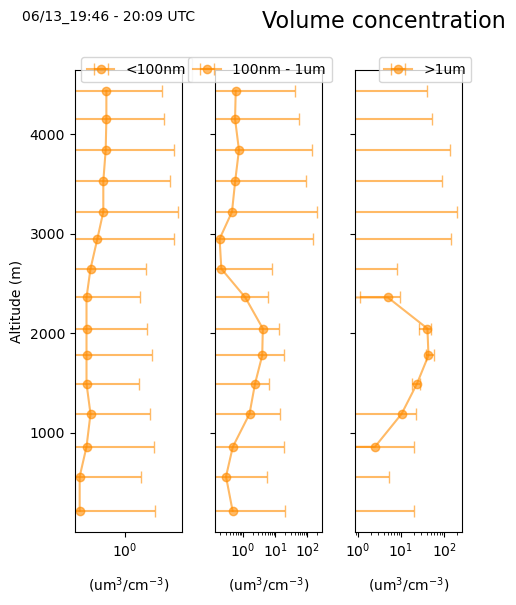

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY13b_subset_median['vSMPS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY13b_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY13b_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY13b_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY13b_subset_25['CNgt10nm_ZIEMBA'], DAY13b_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/13_19:46 - 20:09 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [103]:
'''DAY14 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220614_R0_20230625T113226.ict')
DAY14['3/10'] = DAY14['CNgt3nm_ZIEMBA']/DAY22['CNgt10nm_ZIEMBA']
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 13:58:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 14:23:36"))
    
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY14_subset'''

'DAY14 = simple_read(\'C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220614_R0_20230625T113226.ict\')\nDAY14[\'3/10\'] = DAY14[\'CNgt3nm_ZIEMBA\']/DAY22[\'CNgt10nm_ZIEMBA\']\nstart_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 13:58:00"))\nstop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 14:23:36"))\n    \nDAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]\n\n# Print the modified subset dataframe\nDAY14_subset'

In [104]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220614_R0_20230625T113226.ict')
DAY14['3/10'] = DAY14['CNgt3nm_ZIEMBA']/DAY14['CNgt10nm_ZIEMBA']
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
start_col2 = 'CNgt3nm_ZIEMBA'

# Print the modified subset dataframe
DAY14_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9363  2022-06-14 16:05:00 2022-06-14 16:05:01           30.642555  \
9364  2022-06-14 16:05:01 2022-06-14 16:05:02           30.641725   
9365  2022-06-14 16:05:02 2022-06-14 16:05:03           30.640923   
9366  2022-06-14 16:05:03 2022-06-14 16:05:04           30.640148   
9367  2022-06-14 16:05:04 2022-06-14 16:05:05           30.639403   
...                   ...                 ...                 ...   
10558 2022-06-14 16:24:55 2022-06-14 16:24:56           30.850057   
10559 2022-06-14 16:24:56 2022-06-14 16:24:57           30.851471   
10560 2022-06-14 16:24:57 2022-06-14 16:24:58           30.852885   
10561 2022-06-14 16:24:58 2022-06-14 16:24:59           30.854300   
10562 2022-06-14 16:24:59 2022-06-14 16:25:00           30.855716   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
9363            -64.394685                 117.000         368.485  \
9364            -64.395343                 117.085         360.310   
9365            -64.396042                 117.190         359.020   
9366            -64.396780                 117.295         376.865   
9367            -64.397555                 117.380         351.565   
...                    ...                     ...             ...   
10558           -64.439182                8454.590        5022.140   
10559           -64.439393                8461.000        5002.010   
10560           -64.439595                8467.420        4967.890   
10561           -64.439786                8473.860        4999.500   
10562           -64.439966                8480.330        5165.180   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
9363           272.875                 132.525                        138.135  \
9364           278.665                 134.115                        139.695   
9365           270.810                 131.490                        132.730   
9366           267.685                 128.360                        120.805   
9367           272.455                 130.485                        129.920   
...                ...                     ...                            ...   
10558         2835.380                1861.140                        178.615   
10559         2811.630                1857.830                        180.615   
10560         2815.640                1845.640                        179.010   
10561         2846.200                1848.020                        191.850   
10562         2862.700                1875.620                        198.680   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
9363                          15.450                          0.665  \
9364                          17.310                          0.770   
9365                          17.975                          0.975   
9366                          16.505                          1.010   
9367                          17.180                          0.910   
...                              ...                            ...   
10558                         16.575                          0.715   
10559                         15.460                          0.525   
10560                         15.115                          0.500   
10561                         16.480                          0.635   
10562                         18.085                          0.805   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
9363                        3.635                      28.575  \
9364                        2.855                      33.340   
9365                        2.210                      25.305   
9366                        2.210                      19.040   
9367                        1.555                      10.780   
...                           ...                         ...   
10558                       0.000                       0.000   

In [105]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY14_subset.GPS_Altitude_THORNHILL.min(), DAY14_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY14_subset['Bins'] = pd.cut(DAY14_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY14_subset_1000 = DAY14_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_14 = DAY14_subset_1000[start_index:stop_index]
DAY1000_subset_14.describe()


Time_Start                      Time_Stop   
count                             10                             10  \
mean   2022-06-14 16:06:20.549999872  2022-06-14 16:06:21.549999872   
min              2022-06-14 16:05:20            2022-06-14 16:05:21   
25%    2022-06-14 16:05:57.624999936  2022-06-14 16:05:58.624999936   
50%    2022-06-14 16:06:21.750000128  2022-06-14 16:06:22.750000128   
75%              2022-06-14 16:06:46            2022-06-14 16:06:47   
max       2022-06-14 16:07:10.500000     2022-06-14 16:07:11.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           10.000000            10.000000               10.000000  \
mean            30.665993           -64.421218              531.524500   
min             30.634387           -64.443885              118.025000   
25%             30.654496           -64.438688              347.176250   
50%             30.670641           -64.423372              535.608750   
75%             30.680072           -64.407508              723.708125   
max             30.684686           -64.387056              913.750000   
std              0.017800             0.020868              260.176385   

       CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA   
count       10.000000        10.000000               10.000000  \
mean       381.225250       294.957250              149.609000   
min        297.007500       231.615000               99.960000   
25%        302.564375       232.843125              103.520625   
50%        310.870000       236.882500              106.607500   
75%        327.736250       251.907500              116.570000   
max        976.380000       763.022500              501.977500   
std        210.098774       165.209819              124.399871   

       IntegN_100to1000nm_LAS_ZIEMBA  IntegS_100to1000nm_LAS_ZIEMBA   
count                      10.000000                      10.000000  \
mean                      100.447750                      14.219500   
min                        92.812500                      12.585000   
25%                        94.323125                      13.548750   
50%                        99.380000                      14.151250   
75%                       102.303750                      15.112500   
max                       113.545000                      15.935000   
std                         7.475385                       1.120558   

       IntegV_100to1000nm_LAS_ZIEMBA  IntegN_gt1000nm_LAS_ZIEMBA   
count                      10.000000                   10.000000  \
mean                        0.860250                    1.330750   
min                         0.635000                    0.520000   
25%                         0.766250                    0.843125   
50%                         0.833750                    1.297500   
75%                         0.976250                    1.541250   
max                         1.157500                    2.400000   
std                         0.164429                    0.637806   

       IntegS_gt1000nm_LAS_ZIEMBA  IntegV_gt1000nm_LAS_ZIEMBA  nSMPS_ZIEMBA   
count                   10.000000                   10.000000     10.000000  \
mean                    12.711000                    4.425250    223.538000   
min                      2.040000                    0.340000    110.270000   
25%                      7.632500                    2.246250    124.260000   
50%                     10.526250                    3.043750    124.260000   
75%                     19.462500                    7.431250    375.952500   
max                     23.985000                    9.845000    459.850000   
std                      7.710078                    3.330477    163.127916   

       sSMPS_ZIEMBA  vSMPS_ZIEMBA       3/10  
count       10.0000     10.000000  10.000000  
mean         1.4990      0.016000   1.297808  
min          0.800

In [106]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY14_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY14_subset_3000 = DAY14_subset_1000[start_index:stop_index]
DAY14_subset_3000.describe()

Time_Start                      Time_Stop   
count                             28                             28  \
mean   2022-06-14 16:09:40.571428352  2022-06-14 16:09:41.571428864   
min       2022-06-14 16:07:29.500000     2022-06-14 16:07:30.500000   
25%    2022-06-14 16:08:34.124999936  2022-06-14 16:08:35.124999936   
50%    2022-06-14 16:09:38.750000128  2022-06-14 16:09:39.750000128   
75%    2022-06-14 16:10:45.624999936  2022-06-14 16:10:46.624999936   
max              2022-06-14 16:11:56            2022-06-14 16:11:57   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           28.000000            28.000000               28.000000  \
mean            30.665503           -64.406074             2207.891071   
min             30.637526           -64.436728             1076.810000   
25%             30.644346           -64.425290             1642.641250   
50%             30.661838           -64.407812             2206.242500   
75%             30.684779           -64.388155             2773.765000   
max             30.699736           -64.368100             3337.470000   
std              0.021410             0.022139              688.103077   

       CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA   
count       28.000000        28.000000               28.000000  \
mean       388.492768       272.872768               91.305982   
min        297.117500       227.217500               58.765000   
25%        334.699375       238.522500               69.951250   
50%        376.932500       253.550000               77.866250   
75%        418.453750       288.208750              111.795625   
max        702.775000       472.070000              203.700000   
std         82.526744        51.738034               30.294186   

       IntegN_100to1000nm_LAS_ZIEMBA  IntegS_100to1000nm_LAS_ZIEMBA   
count                      28.000000                      28.000000  \
mean                       48.048482                       8.789643   
min                        16.415000                       0.957500   
25%                        27.261875                       2.903750   
50%                        39.728750                       5.757500   
75%                        71.722500                      15.121250   
max                        95.310000                      20.030000   
std                        25.983088                       6.841468   

       IntegV_100to1000nm_LAS_ZIEMBA  IntegN_gt1000nm_LAS_ZIEMBA   
count                      28.000000                   28.000000  \
mean                        0.743214                    1.381875   
min                         0.025000                    0.000000   
25%                         0.160000                    0.000000   
50%                         0.468750                    0.910000   
75%                         1.310000                    2.776875   
max                         2.145000                    3.960000   
std                         0.668596                    1.405388   

       IntegS_gt1000nm_LAS_ZIEMBA  IntegV_gt1000nm_LAS_ZIEMBA  nSMPS_ZIEMBA   
count                   28.000000                   28.000000     27.000000  \
mean                    14.468929                    5.242232    239.288889   
min                      0.000000                    0.000000    110.270000   
25%                      0.000000                    0.000000    154.050000   
50%                      9.726250                    2.696250    194.300000   
75%                     27.410625                    9.225000    259.270000   
max                     48.260000                   21.287500    474.800000   
std                     15.516750                    6.225776    124.351300   

       sSMPS_ZIEMBA  vSMPS_ZIEMBA       3/10  
count     27.000000         27.00  28.000000  
mean       1.073333          0.01   1.423843  
min        0.80000

In [107]:
nbins = 15
bins14 = np.linspace(DAY14_subset.GPS_Altitude_THORNHILL.min(), DAY14_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY14_subset['Bins'] = pd.cut(DAY14_subset['GPS_Altitude_THORNHILL'], bins14)
DAY14_subset_median = DAY14_subset.groupby('Bins').median()
DAY14_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(117.0, 674.555]     2022-06-14 16:05:50.000 2022-06-14 16:05:51.000  \
(674.555, 1232.111]  2022-06-14 16:07:13.000 2022-06-14 16:07:14.000   
(1232.111, 1789.666] 2022-06-14 16:08:19.000 2022-06-14 16:08:20.000   
(1789.666, 2347.221] 2022-06-14 16:09:23.000 2022-06-14 16:09:24.000   
(2347.221, 2904.777] 2022-06-14 16:10:29.000 2022-06-14 16:10:30.000   
(2904.777, 3462.332] 2022-06-14 16:11:36.500 2022-06-14 16:11:37.500   
(3462.332, 4019.887] 2022-06-14 16:12:45.500 2022-06-14 16:12:46.500   
(4019.887, 4577.443] 2022-06-14 16:14:09.500 2022-06-14 16:14:10.500   
(4577.443, 5134.998] 2022-06-14 16:15:47.000 2022-06-14 16:15:48.000   
(5134.998, 5692.553] 2022-06-14 16:17:16.500 2022-06-14 16:17:17.500   
(5692.553, 6250.109] 2022-06-14 16:18:34.000 2022-06-14 16:18:35.000   
(6250.109, 6807.664] 2022-06-14 16:19:47.500 2022-06-14 16:19:48.500   
(6807.664, 7365.219] 2022-06-14 16:20:58.000 2022-06-14 16:20:59.000   
(7365.219, 7922.775] 2022-06-14 16:22:25.000 2022-06-14 16:22:26.000   
(7922.775, 8480.33]  2022-06-14 16:24:08.500 2022-06-14 16:24:09.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(117.0, 674.555]               30.647118           -64.431407  \
(674.555, 1232.111]            30.666880           -64.391701   
(1232.111, 1789.666]           30.651972           -64.430803   
(1789.666, 2347.221]           30.688235           -64.387923   
(2347.221, 2904.777]           30.643709           -64.395729   
(2904.777, 3462.332]           30.693466           -64.416119   
(3462.332, 4019.887]           30.657337           -64.365306   
(4019.887, 4577.443]           30.684340           -64.413349   
(4577.443, 5134.998]           30.647810           -64.357118   
(5134.998, 5692.553]           30.697384           -64.411236   
(5692.553, 6250.109]           30.666331           -64.341477   
(6250.109, 6807.664]           30.665342           -64.406935   
(6807.664, 7365.219]           30.708533           -64.348490   
(7365.219, 7922.775]           30.662138           -64.391897   
(7922.775, 8480.33]            30.784674           -64.432363   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(117.0, 674.555]                     286.335         334.345         267.6850  \
(674.555, 1232.111]                  935.135         308.135         233.6900   
(1232.111, 1789.666]                1512.260         327.035         239.9750   
(1789.666, 2347.221]                2067.950         383.900         272.3700   
(2347.221, 2904.777]                2628.890         381.500         262.0600   
(2904.777, 3462.332]                3183.510         463.685         321.3375   
(3462.332, 4019.887]                3738.530        1891.345        1284.6850   
(4019.887, 4577.443]                4310.000        3182.430        2047.8100   
(4577.443, 5134.998]                4855.120        4773.120        2984.5000   
(5134.998, 5692.553]                5405.270        6407.850        4040.9300   
(5692.553, 6250.109]                5973.110        6700.950        4128.4200   
(6250.109, 6807.664]                6518.710        7307.715        4326.4350   
(6807.664, 7365.219]                7086.800        6593.280        3843.5900   
(7365.219, 7922.775]                7646.300        6015.740        3322.0100   
(7922.775, 8480.33]                 8201.970        5577.055        3018.2200   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(117.0, 674.555]                     129.520                       106.5650  \
(674.555, 1232.111]                  108.460                        93.1350   
(1232.111

In [108]:
DAY14_subset_25 = DAY14_subset_median - DAY14_subset.groupby('Bins').quantile(.25)
DAY14_subset_25
DAY14_subset_75 = DAY14_subset.groupby('Bins').quantile(.75) - DAY14_subset_median
DAY14_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(117.0, 674.555]        0 days 00:00:24.500000    0 days 00:00:24.500000  \
(674.555, 1232.111]     0 days 00:00:16.500000    0 days 00:00:16.500000   
(1232.111, 1789.666]           0 days 00:00:16           0 days 00:00:16   
(1789.666, 2347.221]    0 days 00:00:15.500000    0 days 00:00:15.500000   
(2347.221, 2904.777]           0 days 00:00:17           0 days 00:00:17   
(2904.777, 3462.332] 0 days 00:00:16.250000128 0 days 00:00:16.250000128   
(3462.332, 4019.887] 0 days 00:00:17.749999872 0 days 00:00:17.749999872   
(4019.887, 4577.443] 0 days 00:00:23.749999872 0 days 00:00:23.749999872   
(4577.443, 5134.998]    0 days 00:00:24.500000    0 days 00:00:24.500000   
(5134.998, 5692.553] 0 days 00:00:19.749999872 0 days 00:00:19.749999872   
(5692.553, 6250.109]    0 days 00:00:18.500000    0 days 00:00:18.500000   
(6250.109, 6807.664] 0 days 00:00:17.749999872 0 days 00:00:17.749999872   
(6807.664, 7365.219]           0 days 00:00:17           0 days 00:00:17   
(7365.219, 7922.775]           0 days 00:00:26           0 days 00:00:26   
(7922.775, 8480.33]  0 days 00:00:25.250000128 0 days 00:00:25.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(117.0, 674.555]                0.023637             0.013324  \
(674.555, 1232.111]             0.013426             0.004826   
(1232.111, 1789.666]            0.016782             0.010998   
(1789.666, 2347.221]            0.003822             0.014832   
(2347.221, 2904.777]            0.007506             0.018929   
(2904.777, 3462.332]            0.004772             0.021200   
(3462.332, 4019.887]            0.020016             0.006035   
(4019.887, 4577.443]            0.017948             0.015121   
(4577.443, 5134.998]            0.027601             0.011024   
(5134.998, 5692.553]            0.011410             0.026009   
(5692.553, 6250.109]            0.022822             0.006485   
(6250.109, 6807.664]            0.022914             0.009430   
(6807.664, 7365.219]            0.004542             0.015559   
(7365.219, 7922.775]            0.018841             0.036539   
(7922.775, 8480.33]             0.035398             0.002438   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(117.0, 674.555]                    195.5575         42.6075         24.60750  \
(674.555, 1232.111]                 141.6750         10.6500          2.74750   
(1232.111, 1789.666]                138.1100         14.9500          5.13500   
(1789.666, 2347.221]                135.7250         26.8625         22.48250   
(2347.221, 2904.777]                151.5000         67.3500         46.83000   
(2904.777, 3462.332]                125.2975        102.0575         51.35375   
(3462.332, 4019.887]                134.0400        333.8550        205.58750   
(4019.887, 4577.443]                135.6750        562.2950         84.34250   
(4577.443, 5134.998]                148.7100        832.7000        491.64500   
(5134.998, 5692.553]                134.6875        268.4025        167.61000   
(5692.553, 6250.109]                131.1250        191.5600         85.82500   
(6250.109, 6807.664]                135.1725        484.2475        289.83000   
(6807.664, 7365.219]                129.7700        190.9200        128.03000   
(7365.219, 7922.775]                136.2900        196.2800        103.33000   
(7922.775, 8480.33]                 127.4425        153.7625         44.07750   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(117.0, 674.555]                     18.2150                        7.27000  \
(674.555, 1232.111]   

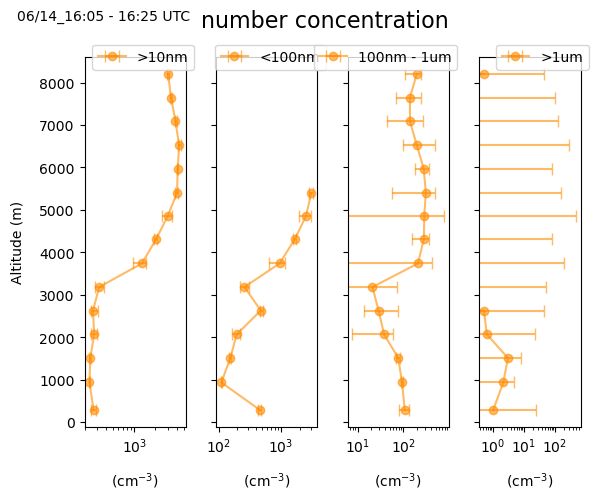

In [109]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY14_subset_median['CNgt10nm_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY14_subset_median['nSMPS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY14_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY14_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/14_16:05 - 16:25 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


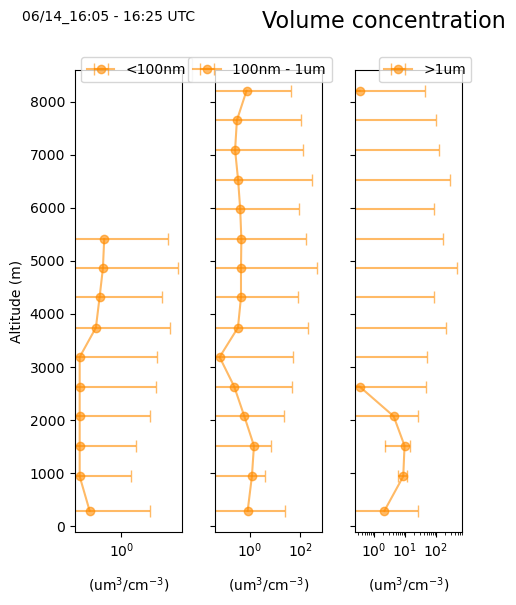

In [110]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY14_subset_median['vSMPS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY14_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY14_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY14_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY14_subset_25['CNgt10nm_ZIEMBA'], DAY14_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/14_16:05 - 16:25 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [111]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/Intvol/activate-mrg1_hu25_20220617_R0_20230625T113227.ict')
DAY17['3/10'] = DAY17['CNgt3nm_ZIEMBA']/DAY17['CNgt10nm_ZIEMBA']
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY17_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10469 2022-06-17 16:20:00 2022-06-17 16:20:01           32.206574  \
10470 2022-06-17 16:20:01 2022-06-17 16:20:02           32.206131   
10471 2022-06-17 16:20:02 2022-06-17 16:20:03           32.205725   
10472 2022-06-17 16:20:03 2022-06-17 16:20:04           32.205357   
10473 2022-06-17 16:20:04 2022-06-17 16:20:05           32.205027   
...                   ...                 ...                 ...   
12084 2022-06-17 16:46:55 2022-06-17 16:46:56           32.158601   
12085 2022-06-17 16:46:56 2022-06-17 16:46:57           32.157293   
12086 2022-06-17 16:46:57 2022-06-17 16:46:58           32.156002   
12087 2022-06-17 16:46:58 2022-06-17 16:46:59           32.154729   
12088 2022-06-17 16:46:59 2022-06-17 16:47:00           32.153475   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA   
10469           -65.006772                 134.100         617.170  \
10470           -65.005761                 133.795         618.175   
10471           -65.004728                 133.485         608.370   
10472           -65.003676                 133.170         605.080   
10473           -65.002606                 132.825         629.505   
...                    ...                     ...             ...   
12084           -65.020304                7639.050       15553.500   
12085           -65.019563                7645.810       16205.300   
12086           -65.018778                7652.610       16195.000   
12087           -65.017953                7659.440       16309.400   
12088           -65.017086                7666.280       16341.100   

       CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
10469          470.960                 143.015                        116.435  \
10470          468.275                 144.045                        130.345   
10471          465.530                 145.055                        137.940   
10472          466.515                 143.990                        128.180   
10473          469.700                 144.000                        125.065   
...                ...                     ...                            ...   
12084         9582.830                5479.430                        227.450   
12085         9688.650                5483.210                        234.945   
12086         9721.260                5487.590                        215.570   
12087         9739.670                5490.990                        210.535   
12088         9658.710                5481.980                        235.720   

       IntegS_100to1000nm_LAS_ZIEMBA  IntegV_100to1000nm_LAS_ZIEMBA   
10469                         16.630                          1.100  \
10470                         18.055                          1.150   
10471                         17.645                          1.035   
10472                         16.665                          1.010   
10473                         19.015                          1.405   
...                              ...                            ...   
12084                         13.735                          0.355   
12085                         15.275                          0.465   
12086                         14.505                          0.475   
12087                         13.815                          0.420   
12088                         15.690                          0.495   

       IntegN_gt1000nm_LAS_ZIEMBA  IntegS_gt1000nm_LAS_ZIEMBA   
10469                       1.170                       6.140  \
10470                       0.000                       0.000   
10471                       0.520                       6.505   
10472                       1.555                      17.080   
10473                       1.555                      17.105   
...                           ...                         ...   
12084                       0.000                       0.000   

In [112]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY17_subset.GPS_Altitude_THORNHILL.min(), DAY17_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY17_subset['Bins'] = pd.cut(DAY17_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY17_subset_1000 = DAY17_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_17 = DAY17_subset_1000[start_index:stop_index]
DAY1000_subset_17


Time_Start               Time_Stop   
Bins                                                                 
(124.73, 200.146]  2022-06-17 16:20:35.000 2022-06-17 16:20:36.000  \
(200.146, 275.561] 2022-06-17 16:21:24.500 2022-06-17 16:21:25.500   
(275.561, 350.977] 2022-06-17 16:21:50.000 2022-06-17 16:21:51.000   
(350.977, 426.392] 2022-06-17 16:22:13.000 2022-06-17 16:22:14.000   
(426.392, 501.808] 2022-06-17 16:22:35.000 2022-06-17 16:22:36.000   
(501.808, 577.223] 2022-06-17 16:22:57.000 2022-06-17 16:22:58.000   
(577.223, 652.638] 2022-06-17 16:23:17.000 2022-06-17 16:23:18.000   
(652.638, 728.054] 2022-06-17 16:23:38.000 2022-06-17 16:23:39.000   
(728.054, 803.47]  2022-06-17 16:23:59.000 2022-06-17 16:24:00.000   
(803.47, 878.885]  2022-06-17 16:24:20.000 2022-06-17 16:24:21.000   
(878.885, 954.3]   2022-06-17 16:24:41.500 2022-06-17 16:24:42.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(124.73, 200.146]            32.214041           -64.973553  \
(200.146, 275.561]           32.251108           -64.989798   
(275.561, 350.977]           32.242680           -65.013329   
(350.977, 426.392]           32.223230           -65.014063   
(426.392, 501.808]           32.213584           -64.995409   
(501.808, 577.223]           32.220725           -64.973889   
(577.223, 652.638]           32.239210           -64.967740   
(652.638, 728.054]           32.257797           -64.979905   
(728.054, 803.47]            32.263464           -65.005588   
(803.47, 878.885]            32.254230           -65.030907   
(878.885, 954.3]             32.233206           -65.044264   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(124.73, 200.146]                 129.0550        587.8000          462.560  \
(200.146, 275.561]                233.5475        589.6525          460.970   
(275.561, 350.977]                308.3550       1311.8000         1020.420   
(350.977, 426.392]                397.4800        701.6450          520.065   
(426.392, 501.808]                463.9800        636.2550          476.860   
(501.808, 577.223]                543.1900        619.9350          478.165   
(577.223, 652.638]                615.0050      17154.5000        11756.100   
(652.638, 728.054]                685.4600      17979.2000        12464.900   
(728.054, 803.47]                 763.5200      19618.9000        14103.200   
(803.47, 878.885]                 838.9550      21116.3000        15276.000   
(878.885, 954.3]                  920.7800      22349.1000        16448.500   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(124.73, 200.146]                 145.6500                        117.190  \
(200.146, 275.561]                153.3800                        118.000   
(275.561, 350.977]                228.7600                        139.575   
(350.977, 426.392]                168.2750                        124.490   
(426.392, 501.808]                153.8050                        120.780   
(501.808, 577.223]                150.6600                        127.180   
(577.223, 652.638]                647.6300                        232.650   
(652.638, 728.054]                634.2350                        237.590   
(728.054, 803.47]                 751.4900                        254.940   
(803.47, 878.885]                 770.5500                        272.535   
(878.885, 954.3]                  941.6025                        316.615   

                    IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                
(124.73, 200.146]                         15.8650  \
(200.146, 275.561]                        15.0300   
(275.561, 350.977]                        17.0900   
(350.9

In [113]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY17_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY17_subset_3000 = DAY17_subset_1000[start_index:stop_index]
DAY17_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1029.716, 1105.132] 2022-06-17 16:25:25.000 2022-06-17 16:25:26.000  \
(1105.132, 1180.547] 2022-06-17 16:25:50.500 2022-06-17 16:25:51.500   
(1180.547, 1255.962] 2022-06-17 16:27:55.000 2022-06-17 16:27:56.000   
(1255.962, 1331.378] 2022-06-17 16:29:59.500 2022-06-17 16:30:00.500   
(1331.378, 1406.794] 2022-06-17 16:30:25.000 2022-06-17 16:30:26.000   
(1406.794, 1482.209] 2022-06-17 16:30:52.000 2022-06-17 16:30:53.000   
(1482.209, 1557.625] 2022-06-17 16:31:20.000 2022-06-17 16:31:21.000   
(1557.625, 1633.04]  2022-06-17 16:31:47.000 2022-06-17 16:31:48.000   
(1633.04, 1708.456]  2022-06-17 16:32:14.000 2022-06-17 16:32:15.000   
(1708.456, 1783.871] 2022-06-17 16:32:40.000 2022-06-17 16:32:41.000   
(1783.871, 1859.287] 2022-06-17 16:33:05.500 2022-06-17 16:33:06.500   
(1859.287, 1934.702] 2022-06-17 16:33:31.500 2022-06-17 16:33:32.500   
(1934.702, 2010.118] 2022-06-17 16:33:58.000 2022-06-17 16:33:59.000   
(2010.118, 2085.533] 2022-06-17 16:34:26.000 2022-06-17 16:34:27.000   
(2085.533, 2160.948] 2022-06-17 16:34:52.500 2022-06-17 16:34:53.500   
(2160.948, 2236.364] 2022-06-17 16:35:12.500 2022-06-17 16:35:13.500   
(2236.364, 2311.78]  2022-06-17 16:35:26.000 2022-06-17 16:35:27.000   
(2311.78, 2387.195]  2022-06-17 16:35:37.500 2022-06-17 16:35:38.500   
(2387.195, 2462.61]  2022-06-17 16:35:49.500 2022-06-17 16:35:50.500   
(2462.61, 2538.026]  2022-06-17 16:36:01.500 2022-06-17 16:36:02.500   
(2538.026, 2613.442] 2022-06-17 16:36:13.000 2022-06-17 16:36:14.000   
(2613.442, 2688.857] 2022-06-17 16:36:24.000 2022-06-17 16:36:25.000   
(2688.857, 2764.273] 2022-06-17 16:36:35.000 2022-06-17 16:36:36.000   
(2764.273, 2839.688] 2022-06-17 16:36:45.500 2022-06-17 16:36:46.500   
(2839.688, 2915.104] 2022-06-17 16:36:55.500 2022-06-17 16:36:56.500   
(2915.104, 2990.519] 2022-06-17 16:37:06.000 2022-06-17 16:37:07.000   
(2990.519, 3065.935] 2022-06-17 16:37:17.000 2022-06-17 16:37:18.000   
(3065.935, 3141.35]  2022-06-17 16:37:28.000 2022-06-17 16:37:29.000   
(3141.35, 3216.766]  2022-06-17 16:37:38.500 2022-06-17 16:37:39.500   
(3216.766, 3292.181] 2022-06-17 16:37:48.500 2022-06-17 16:37:49.500   
(3292.181, 3367.597] 2022-06-17 16:37:58.500 2022-06-17 16:37:59.500   
(3367.597, 3443.012] 2022-06-17 16:38:08.500 2022-06-17 16:38:09.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1029.716, 1105.132]           32.197730           -65.013219  \
(1105.132, 1180.547]           32.205137           -64.982527   
(1180.547, 1255.962]           32.229677           -64.998935   
(1255.962, 1331.378]           32.252786           -65.015892   
(1331.378, 1406.794]           32.240185           -65.046007   
(1406.794, 1482.209]           32.210072           -65.053098   
(1482.209, 1557.625]           32.186859           -65.028252   
(1557.625, 1633.04]            32.190573           -64.993487   
(1633.04, 1708.456]            32.215776           -64.974861   
(1708.456, 1783.871]           32.243155           -64.984178   
(1783.871, 1859.287]           32.252800           -65.015566   
(1859.287, 1934.702]           32.239164           -65.046166   
(1934.702, 2010.118]           32.209480           -65.052185   
(2010.118, 2085.533]           32.187012           -65.026657   
(2085.533, 2160.948]           32.191356           -64.992458   
(2160.948, 2236.364]           32.209627           -64.977351   
(2236.364, 2311.78]            32.224499           -64.977140   
(2311.78, 2387.195]            32.235845           -64.983532   
(2387.195, 2462.61]            32.244239           -64.995349   
(2462.61, 2538.026]            32.247433           -65.010357   
(2538.026, 2613.442]           32.245420           -65.025322   
(2613.442, 2688.857]           32.238650           -65.037779   
(2688.857, 2764.273]     

In [114]:
nbins = 15
bins17 = np.linspace(DAY17_subset.GPS_Altitude_THORNHILL.min(), DAY17_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY17_subset['Bins'] = pd.cut(DAY17_subset['GPS_Altitude_THORNHILL'], bins17)
DAY17_subset_median= DAY17_subset.groupby('Bins').median()
DAY17_subset_median

Time_Start               Time_Stop   
Bins                                                                 
(124.73, 627.5]    2022-06-17 16:21:40.000 2022-06-17 16:21:41.000  \
(627.5, 1130.27]   2022-06-17 16:24:32.500 2022-06-17 16:24:33.500   
(1130.27, 1633.04] 2022-06-17 16:28:53.000 2022-06-17 16:28:54.000   
(1633.04, 2135.81] 2022-06-17 16:33:28.000 2022-06-17 16:33:29.000   
(2135.81, 2638.58] 2022-06-17 16:35:39.000 2022-06-17 16:35:40.000   
(2638.58, 3141.35] 2022-06-17 16:36:58.000 2022-06-17 16:36:59.000   
(3141.35, 3644.12] 2022-06-17 16:38:05.000 2022-06-17 16:38:06.000   
(3644.12, 4146.89] 2022-06-17 16:39:05.000 2022-06-17 16:39:06.000   
(4146.89, 4649.66] 2022-06-17 16:40:04.000 2022-06-17 16:40:05.000   
(4649.66, 5152.43] 2022-06-17 16:41:02.000 2022-06-17 16:41:03.000   
(5152.43, 5655.2]  2022-06-17 16:41:57.000 2022-06-17 16:41:58.000   
(5655.2, 6157.97]  2022-06-17 16:42:54.000 2022-06-17 16:42:55.000   
(6157.97, 6660.74] 2022-06-17 16:43:56.000 2022-06-17 16:43:57.000   
(6660.74, 7163.51] 2022-06-17 16:45:05.000 2022-06-17 16:45:06.000   
(7163.51, 7666.28] 2022-06-17 16:46:20.500 2022-06-17 16:46:21.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(124.73, 627.5]              32.225147           -64.986859  \
(627.5, 1130.27]             32.242379           -65.017651   
(1130.27, 1633.04]           32.222068           -65.011616   
(1633.04, 2135.81]           32.222237           -65.016254   
(2135.81, 2638.58]           32.237125           -64.986829   
(2638.58, 3141.35]           32.201801           -65.043076   
(3141.35, 3644.12]           32.195141           -64.975620   
(3644.12, 4146.89]           32.235345           -65.008609   
(4146.89, 4649.66]           32.184135           -65.036692   
(4649.66, 5152.43]           32.167321           -64.962601   
(5152.43, 5655.2]            32.228400           -64.957157   
(5655.2, 6157.97]            32.220073           -65.031255   
(6157.97, 6660.74]           32.153702           -65.002610   
(6660.74, 7163.51]           32.197226           -64.941035   
(7163.51, 7666.28]           32.205352           -65.017568   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(124.73, 627.5]                    282.415         620.865          471.960  \
(627.5, 1130.27]                   884.650       19497.600        13958.350   
(1130.27, 1633.04]                1208.680        5495.390         3970.380   
(1633.04, 2135.81]                1881.620         734.610          539.250   
(2135.81, 2638.58]                2359.480         626.920          453.905   
(2638.58, 3141.35]                2892.570        1585.030         1087.610   
(3141.35, 3644.12]                3381.450        2691.680         1796.610   
(3644.12, 4146.89]                3878.590        4758.360         3172.650   
(4146.89, 4649.66]                4388.010        5560.420         3713.530   
(4649.66, 5152.43]                4906.950        8039.640         5284.670   
(5152.43, 5655.2]                 5406.420       10730.000         7050.700   
(5655.2, 6157.97]                 5910.850       11896.900         7713.560   
(6157.97, 6660.74]                6415.010       13465.100         8500.790   
(6660.74, 7163.51]                6923.570       16271.600        10031.800   
(7163.51, 7666.28]                7413.560       16310.150         9931.270   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(124.73, 627.5]                   152.8200                       122.7700  \
(627.5, 1130.27]                  795.3875                       281.6875   
(1130.27, 1633.04]                367.9100                       105.5700   
(1633.04, 2135.81]                263.23

In [115]:
DAY17_subset_25 = DAY17_subset_median - DAY17_subset.groupby('Bins').quantile(.25)
DAY17_subset_25
DAY17_subset_75 = DAY17_subset.groupby('Bins').quantile(.75) - DAY17_subset_median
DAY17_subset_75

Time_Start                 Time_Stop   
Bins                                                                     
(124.73, 627.5]       0 days 00:00:49.500000    0 days 00:00:49.500000  \
(627.5, 1130.27]   0 days 00:00:36.250000128 0 days 00:00:36.250000128   
(1130.27, 1633.04]    0 days 00:01:33.500000    0 days 00:01:33.500000   
(1633.04, 2135.81]    0 days 00:00:43.500000    0 days 00:00:43.500000   
(2135.81, 2638.58]    0 days 00:00:21.500000    0 days 00:00:21.500000   
(2638.58, 3141.35]    0 days 00:00:17.500000    0 days 00:00:17.500000   
(3141.35, 3644.12]    0 days 00:00:15.500000    0 days 00:00:15.500000   
(3644.12, 4146.89]           0 days 00:00:14           0 days 00:00:14   
(4146.89, 4649.66]           0 days 00:00:15           0 days 00:00:15   
(4649.66, 5152.43]    0 days 00:00:13.500000    0 days 00:00:13.500000   
(5152.43, 5655.2]     0 days 00:00:13.500000    0 days 00:00:13.500000   
(5655.2, 6157.97]     0 days 00:00:14.500000    0 days 00:00:14.500000   
(6157.97, 6660.74]           0 days 00:00:16           0 days 00:00:16   
(6660.74, 7163.51]           0 days 00:00:18           0 days 00:00:18   
(7163.51, 7666.28] 0 days 00:00:19.250000128 0 days 00:00:19.250000128   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(124.73, 627.5]               0.015724             0.015031  \
(627.5, 1130.27]              0.015329             0.023390   
(1130.27, 1633.04]            0.024152             0.026486   
(1633.04, 2135.81]            0.022184             0.027563   
(2135.81, 2638.58]            0.008065             0.007802   
(2638.58, 3141.35]            0.020400             0.009868   
(3141.35, 3644.12]            0.016611             0.004352   
(3644.12, 4146.89]            0.002939             0.017512   
(4146.89, 4649.66]            0.018084             0.013284   
(4649.66, 5152.43]            0.012864             0.013372   
(5152.43, 5655.2]             0.008888             0.010900   
(5655.2, 6157.97]             0.013146             0.015620   
(6157.97, 6660.74]            0.009212             0.024959   
(6660.74, 7163.51]            0.018944             0.005470   
(7163.51, 7666.28]            0.017143             0.020369   

                    GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                          
(124.73, 627.5]                   161.6200        147.0125         116.4700  \
(627.5, 1130.27]                  132.8750       1780.2250        1345.3750   
(1130.27, 1633.04]                166.8150       3962.2150        2962.7750   
(1633.04, 2135.81]                129.2300       2296.6800        1663.2350   
(2135.81, 2638.58]                129.9150         33.8400          11.9325   
(2638.58, 3141.35]                126.0250        503.7150         351.8150   
(3141.35, 3644.12]                118.7250        470.8250         332.0200   
(3644.12, 4146.89]                129.3500        299.5400         157.6600   
(4146.89, 4649.66]                133.3200        498.5600         289.9400   
(4649.66, 5152.43]                124.9550        674.9750         431.2900   
(5152.43, 5655.2]                 124.0650        369.9000         333.2800   
(5655.2, 6157.97]                 117.2950        449.4000         194.6200   
(6157.97, 6660.74]                128.0300        225.9000         150.0000   
(6660.74, 7163.51]                118.8700        566.5000         285.1000   
(7163.51, 7666.28]                124.3825        315.7750         170.5050   

                    CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                        
(124.73, 627.5]                   24.02500                         8.9100  \
(627.5, 1130.27]                 103.61125                        26.2725   
(1130.27, 1633.04]               189.08500         

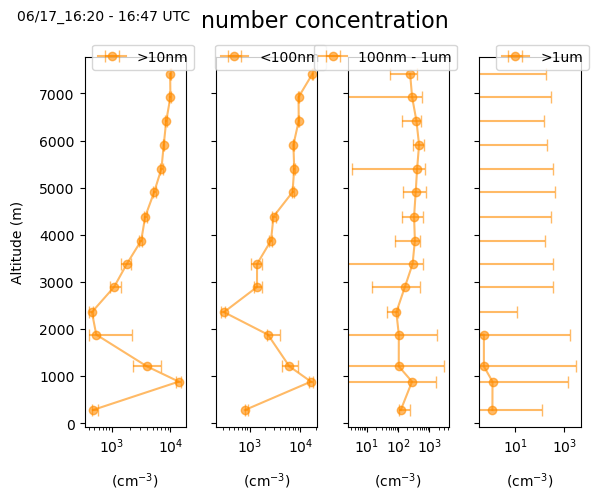

In [116]:
fig, ax = plt.subplots(1, 4, sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY17_subset_median['CNgt10nm_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>10nm')
ax[1].errorbar(DAY17_subset_median['nSMPS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[2].errorbar(DAY17_subset_median['IntegN_100to1000nm_LAS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[3].errorbar(DAY17_subset_median['IntegN_gt1000nm_LAS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)', labelpad=11)
ax[0].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[3].set_xlabel('(cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[3].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
#ax[0].legend(loc='upper right', fontsize=5)
#ax[1].legend(loc='upper right', fontsize=5)
#ax[2].legend(loc='upper right', fontsize=5)
#ax[3].legend(loc='upper right', fontsize=5)

# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[3].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[3].xaxis.set_minor_locator(ticker.NullLocator())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.02, 0.98, '06/17_16:20 - 16:47 UTC', ha='left', va='top', fontsize=10)
# Set the title
fig.suptitle('number concentration', fontsize=16)

plt.show()


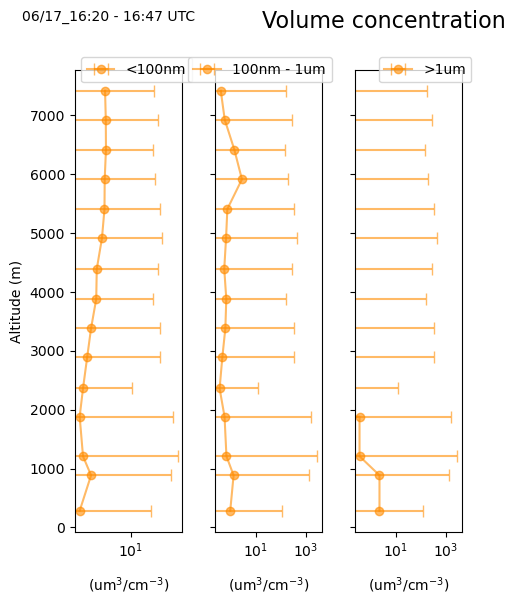

In [117]:
fig, ax = plt.subplots(1, 3, figsize=(5, 6), sharey='all')
plt.rcParams['font.size'] = '10'
ax[0].errorbar(DAY17_subset_median['vSMPS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '<100nm')
ax[1].errorbar(DAY17_subset_median['IntegV_100to1000nm_LAS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '100nm - 1um')
ax[2].errorbar(DAY17_subset_median['IntegV_gt1000nm_LAS_ZIEMBA'], DAY17_subset_median['GPS_Altitude_THORNHILL'], xerr=[DAY17_subset_25['CNgt10nm_ZIEMBA'], DAY17_subset_75['CNgt10nm_ZIEMBA']], marker='o', linestyle='-', capsize=4, alpha=.6, color="darkorange", label = '>1um')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[1].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[2].set_xlabel('(um$^{3}$/cm$^{-3}$)', labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[1].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
ax[2].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='medium')
# Reduce the number of x-axis tickers to 2 for ax[0]
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())

# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[1]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())

# Limit the number of tickers for the second plot
#ax[1].set_xlim([0, 2])
#ax[2].set_xlim([100, 300])
#ax[2].set_xlim([0, 3])
# Adjust the spacing between subplots
# Set the title
fig.text(0.02, 0.98, '06/17_16:20 - 16:47 UTC', ha='left', va='top', fontsize=10)
fig.suptitle('Volume concentration', ha = 'left', fontsize=16)
plt.subplots_adjust(wspace=0.3)

In [118]:

# Concatenate the dataframes vertically (along rows)
ocean = pd.concat([DAY1000a_subset_1000a, DAY1000_subset_1000, DAY1000_subset_1000b], axis=0)

# Reset the index of the merged dataframe
ocean.reset_index(drop=True, inplace=True)
ocean.mean()

Time_Start                       2022-06-02 15:07:45.668918784
Time_Stop                        2022-06-02 15:07:46.668919040
Latitude_THORNHILL                                   32.467593
Longitude_THORNHILL                                 -66.396383
GPS_Altitude_THORNHILL                              537.884291
CNgt3nm_ZIEMBA                                      443.381892
CNgt10nm_ZIEMBA                                     343.287162
CNgt10nm_nonvol_ZIEMBA                               205.02348
IntegN_100to1000nm_LAS_ZIEMBA                       192.147399
IntegS_100to1000nm_LAS_ZIEMBA                        26.188277
IntegV_100to1000nm_LAS_ZIEMBA                          1.17152
IntegN_gt1000nm_LAS_ZIEMBA                            0.561959
IntegS_gt1000nm_LAS_ZIEMBA                            4.042973
IntegV_gt1000nm_LAS_ZIEMBA                            1.106892
nSMPS_ZIEMBA                                          172.3675
sSMPS_ZIEMBA                                          1

In [119]:
# Concatenate the dataframes vertically (along rows)
ocean2 = pd.concat([DAY3000a_subset_3000a, DAY3000_subset_3000, DAY3000_subset_3000b], axis=0)
# Reset the index of the merged dataframe
ocean2.reset_index(drop=True, inplace=True)
ocean2.mean()

Time_Start                       2022-06-02 15:20:36.870731520
Time_Stop                        2022-06-02 15:20:37.870731776
Latitude_THORNHILL                                   32.487566
Longitude_THORNHILL                                 -66.411698
GPS_Altitude_THORNHILL                             2175.330561
CNgt3nm_ZIEMBA                                      684.502146
CNgt10nm_ZIEMBA                                     480.284622
CNgt10nm_nonvol_ZIEMBA                              265.248768
IntegN_100to1000nm_LAS_ZIEMBA                       135.425366
IntegS_100to1000nm_LAS_ZIEMBA                        14.480159
IntegV_100to1000nm_LAS_ZIEMBA                         0.597012
IntegN_gt1000nm_LAS_ZIEMBA                            0.172256
IntegS_gt1000nm_LAS_ZIEMBA                            1.376963
IntegV_gt1000nm_LAS_ZIEMBA                             0.41011
nSMPS_ZIEMBA                                          403.9372
sSMPS_ZIEMBA                                           

In [120]:
# Concatenate the dataframes vertically (along rows)
North_America = pd.concat([DAY1000_subset_7, DAY1000_subset_7b, DAY1000_subset_8, DAY1000_subset_17], axis=0)
# Reset the index of the merged dataframe
North_America.reset_index(drop=True, inplace=True)
North_America.mean()

Time_Start                       2022-06-09 06:55:30.588235520
Time_Stop                        2022-06-09 06:55:31.588235264
Latitude_THORNHILL                                   32.245804
Longitude_THORNHILL                                 -65.019185
GPS_Altitude_THORNHILL                              546.893853
CNgt3nm_ZIEMBA                                     2779.772118
CNgt10nm_ZIEMBA                                    2045.371735
CNgt10nm_nonvol_ZIEMBA                              609.256618
IntegN_100to1000nm_LAS_ZIEMBA                       355.549588
IntegS_100to1000nm_LAS_ZIEMBA                          34.5725
IntegV_100to1000nm_LAS_ZIEMBA                         1.575382
IntegN_gt1000nm_LAS_ZIEMBA                            1.564441
IntegS_gt1000nm_LAS_ZIEMBA                           12.898824
IntegV_gt1000nm_LAS_ZIEMBA                            3.818353
nSMPS_ZIEMBA                                       1889.954286
sSMPS_ZIEMBA                                          7

In [121]:
# Concatenate the dataframes vertically (along rows)
North_America2 = pd.concat([DAY7_subset_3000, DAY7b_subset_3000, DAY8_subset_3000, DAY17_subset_3000], axis=0)

# Reset the index of the merged dataframe
North_America2.reset_index(drop=True, inplace=True)
North_America2.mean()

Time_Start                       2022-06-09 08:25:42.493775872
Time_Stop                        2022-06-09 08:25:43.493775872
Latitude_THORNHILL                                   32.243957
Longitude_THORNHILL                                 -65.021757
GPS_Altitude_THORNHILL                             2181.558423
CNgt3nm_ZIEMBA                                     1433.243216
CNgt10nm_ZIEMBA                                    1036.450851
CNgt10nm_nonvol_ZIEMBA                              503.044564
IntegN_100to1000nm_LAS_ZIEMBA                       176.910788
IntegS_100to1000nm_LAS_ZIEMBA                        15.005737
IntegV_100to1000nm_LAS_ZIEMBA                         0.578465
IntegN_gt1000nm_LAS_ZIEMBA                            0.229834
IntegS_gt1000nm_LAS_ZIEMBA                            1.742116
IntegV_gt1000nm_LAS_ZIEMBA                            0.505664
nSMPS_ZIEMBA                                       1453.053191
sSMPS_ZIEMBA                                          5

In [122]:
# Concatenate the dataframes vertically (along rows)
'''Caribbean = pd.concat([DAY1000_subset_10, DAY1000_subset_110b, DAY1000_subset_10b, DAY1000_subset_11, DAY1000_subset_11b], axis=0)

# Reset the index of the merged dataframe
Caribbean.reset_index(drop=True, inplace=True)
Caribbean.describe()'''

'Caribbean = pd.concat([DAY1000_subset_10, DAY1000_subset_110b, DAY1000_subset_10b, DAY1000_subset_11, DAY1000_subset_11b], axis=0)\n\n# Reset the index of the merged dataframe\nCaribbean.reset_index(drop=True, inplace=True)\nCaribbean.describe()'

In [123]:
# Concatenate the dataframes vertically (along rows)
'''Caribbean2 = pd.concat([DAY10_subset_3000,  DAY110b_subset_3000, DAY10b_subset_3000, DAY11_subset_3000, DAY11b_subset_3000, DAY13_subset_3000, DAY1000_subset_13b], axis=0)

# Reset the index of the merged dataframe
Caribbean2.reset_index(drop=True, inplace=True)
Caribbean2.describe()'''

'Caribbean2 = pd.concat([DAY10_subset_3000,  DAY110b_subset_3000, DAY10b_subset_3000, DAY11_subset_3000, DAY11b_subset_3000, DAY13_subset_3000, DAY1000_subset_13b], axis=0)\n\n# Reset the index of the merged dataframe\nCaribbean2.reset_index(drop=True, inplace=True)\nCaribbean2.describe()'

In [124]:
Africa = pd.concat([DAY1000_subset_10, DAY1000_subset_110b, DAY1000_subset_10b, DAY1000_subset_11, DAY1000_subset_11b, DAY1000_subset_13, DAY1000_subset_13b, DAY1000_subset_14])
# Reset the index of the merged dataframe
Africa.reset_index(drop=True, inplace=True)
Africa.mean()

Time_Start                       2022-06-12 01:22:20.223684096
Time_Stop                        2022-06-12 01:22:21.223684096
Latitude_THORNHILL                                   31.811734
Longitude_THORNHILL                                   -65.0999
GPS_Altitude_THORNHILL                              536.637533
CNgt3nm_ZIEMBA                                       463.30926
CNgt10nm_ZIEMBA                                     374.528849
CNgt10nm_nonvol_ZIEMBA                              186.714737
IntegN_100to1000nm_LAS_ZIEMBA                       148.767336
IntegS_100to1000nm_LAS_ZIEMBA                        23.102204
IntegV_100to1000nm_LAS_ZIEMBA                         1.401941
IntegN_gt1000nm_LAS_ZIEMBA                            2.023734
IntegS_gt1000nm_LAS_ZIEMBA                           19.333569
IntegV_gt1000nm_LAS_ZIEMBA                            6.556579
nSMPS_ZIEMBA                                        252.292667
sSMPS_ZIEMBA                                          2

In [125]:
# Concatenate the dataframes vertically (along rows)
Caribbean2 = pd.concat([DAY10_subset_3000,  DAY110b_subset_3000, DAY10b_subset_3000, DAY11_subset_3000, DAY11b_subset_3000, DAY13_subset_3000, DAY13b_subset_3000, DAY14_subset_3000], axis=0)

# Reset the index of the merged dataframe
Caribbean2.reset_index(drop=True, inplace=True)
Caribbean2.mean()

Time_Start                       2022-06-12 01:04:06.082949376
Time_Stop                        2022-06-12 01:04:07.082949376
Latitude_THORNHILL                                   31.829876
Longitude_THORNHILL                                 -65.108849
GPS_Altitude_THORNHILL                             2195.977546
CNgt3nm_ZIEMBA                                      818.137978
CNgt10nm_ZIEMBA                                     585.825196
CNgt10nm_nonvol_ZIEMBA                              295.397195
IntegN_100to1000nm_LAS_ZIEMBA                       129.279499
IntegS_100to1000nm_LAS_ZIEMBA                        16.286584
IntegV_100to1000nm_LAS_ZIEMBA                         0.978744
IntegN_gt1000nm_LAS_ZIEMBA                            1.523018
IntegS_gt1000nm_LAS_ZIEMBA                           15.571521
IntegV_gt1000nm_LAS_ZIEMBA                            5.597776
nSMPS_ZIEMBA                                        426.734937
sSMPS_ZIEMBA                                          3

In [126]:
North_America_transport = pd.concat([North_America, North_America2], axis=0)
North_America_transport.reset_index(drop=True, inplace=True)
North_America_transport
nbins = 10
bins = np.linspace(North_America_transport.GPS_Altitude_THORNHILL.min(), North_America_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
North_America_transport['Bins'] = pd.cut(North_America_transport['GPS_Altitude_THORNHILL'], bins)
North_America_transport_plot = North_America_transport.groupby('Bins').median()
North_America_transport_plot

Time_Start   
Bins                                                 
(129.055, 462.134]   2022-06-07 19:08:56.500000000  \
(462.134, 795.214]   2022-06-07 19:10:52.000000000   
(795.214, 1128.294]  2022-06-07 19:12:18.249999872   
(1128.294, 1461.373] 2022-06-07 19:14:21.000000000   
(1461.373, 1794.452] 2022-06-07 19:16:02.500000000   
(1794.452, 2127.532] 2022-06-07 19:18:03.249999872   
(2127.532, 2460.612] 2022-06-07 19:19:46.500000000   
(2460.612, 2793.691] 2022-06-07 19:20:44.249999872   
(2793.691, 3126.77]  2022-06-07 19:21:38.500000000   
(3126.77, 3459.85]   2022-06-08 20:43:37.500000000   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(129.055, 462.134]   2022-06-07 19:08:57.500000000           32.251753  \
(462.134, 795.214]   2022-06-07 19:10:53.000000000           32.240055   
(795.214, 1128.294]  2022-06-07 19:12:19.249999872           32.255694   
(1128.294, 1461.373] 2022-06-07 19:14:22.000000000           32.245282   
(1461.373, 1794.452] 2022-06-07 19:16:03.500000000           32.251388   
(1794.452, 2127.532] 2022-06-07 19:18:04.249999872           32.237517   
(2127.532, 2460.612] 2022-06-07 19:19:47.500000000           32.264095   
(2460.612, 2793.691] 2022-06-07 19:20:45.249999872           32.235782   
(2793.691, 3126.77]  2022-06-07 19:21:39.500000000           32.242192   
(3126.77, 3459.85]   2022-06-08 20:43:38.500000000           32.284890   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(129.055, 462.134]             -65.008937                300.8750  \
(462.134, 795.214]             -65.015011                620.3125   
(795.214, 1128.294]            -65.041122                930.5475   
(1128.294, 1461.373]           -65.018303               1288.0600   
(1461.373, 1794.452]           -65.045063               1619.3125   
(1794.452, 2127.532]           -65.008669               1956.9350   
(2127.532, 2460.612]           -65.038440               2283.3225   
(2460.612, 2793.691]           -65.044550               2618.1775   
(2793.691, 3126.77]            -65.000896               2951.4400   
(3126.77, 3459.85]             -64.994190               3293.8000   

                      CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA   
Bins                                                                            
(129.055, 462.134]        1246.00500        976.82000               452.35125  \
(462.134, 795.214]        1482.94750       1128.34500               640.93250   
(795.214, 1128.294]       1440.35500       1086.43250               819.01000   
(1128.294, 1461.373]      1002.50000        739.96250               513.96750   
(1461.373, 1794.452]       795.28125        585.12750               384.10750   
(1794.452, 2127.532]       751.99375        565.65750               302.26000   
(2127.532, 2460.612]       978.88500        709.17500               490.33875   
(2460.612, 2793.691]      1018.72000        725.53125               482.39000   
(2793.691, 3126.77]        997.23500        723.94000               503.88500   
(3126.77, 3459.85]        1409.08000       1021.37000               679.64000   

                      IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(129.055, 462.134]                        292.73875  \
(462.134, 795.214]                        289.32000   
(795.214, 1128.294]                       397.59750   
(1128.294, 1461.373]                      235.89250   
(1461.373, 1794.452]                      160.92000   
(1794.452, 2127.532]                      116.54500   
(2127.532, 2460.612]                       95.61000   
(2460.612, 2793.691]                      109.96250   
(2793.691, 3126.77]                       145.72000   
(3126.77, 3459.85]                        184.55500   

                      IntegS_100to1000n

In [127]:
North_America_transport_plot_25 = North_America_transport_plot - North_America_transport.groupby('Bins').quantile(.25)
North_America_transport_plot_25
North_America_transport_plot_75 = North_America_transport.groupby('Bins').quantile(.75) - North_America_transport_plot
North_America_transport_plot_75

Time_Start                 Time_Stop   
Bins                                                                       
(129.055, 462.134]   1 days 01:22:27.749999872 1 days 01:22:27.749999872  \
(462.134, 795.214]             1 days 01:22:29           1 days 01:22:29   
(795.214, 1128.294]  1 days 01:22:26.375000064 1 days 01:22:26.375000064   
(1128.294, 1461.373] 1 days 01:22:34.750000128 1 days 01:22:34.750000128   
(1461.373, 1794.452]           1 days 01:22:27           1 days 01:22:27   
(1794.452, 2127.532]           1 days 01:21:57           1 days 01:21:57   
(2127.532, 2460.612]           1 days 01:21:24           1 days 01:21:24   
(2460.612, 2793.691] 1 days 01:21:38.250000128 1 days 01:21:38.250000128   
(2793.691, 3126.77]            1 days 01:21:33           1 days 01:21:33   
(3126.77, 3459.85]   0 days 00:00:24.749999872 0 days 00:00:24.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(129.055, 462.134]              0.033035             0.026547  \
(462.134, 795.214]              0.018756             0.018851   
(795.214, 1128.294]             0.041688             0.028335   
(1128.294, 1461.373]            0.012170             0.020681   
(1461.373, 1794.452]            0.030433             0.030307   
(1794.452, 2127.532]            0.013093             0.030690   
(2127.532, 2460.612]            0.018499             0.040484   
(2460.612, 2793.691]            0.009478             0.013595   
(2793.691, 3126.77]             0.012040             0.024074   
(3126.77, 3459.85]              0.009458             0.016227   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(129.055, 462.134]                 84.915625       214.97000       156.207500  \
(462.134, 795.214]                 72.149375       399.07250       272.985000   
(795.214, 1128.294]               115.722500      4936.93875      3362.555000   
(1128.294, 1461.373]               86.102500       322.98500       210.041250   
(1461.373, 1794.452]               86.026250       262.51500       170.045625   
(1794.452, 2127.532]               81.021250       133.64875        62.246875   
(2127.532, 2460.612]               81.576250       105.16000        66.974375   
(2460.612, 2793.691]               85.385000        68.65250        42.631875   
(2793.691, 3126.77]                83.530000       135.34500        82.670000   
(3126.77, 3459.85]                 88.445000       520.71000       329.215000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(129.055, 462.134]                442.776250                     248.063125  \
(462.134, 795.214]                247.266250                     243.495000   
(795.214, 1128.294]               118.114375                     145.220625   
(1128.294, 1461.373]              151.115000                     121.997500   
(1461.373, 1794.452]              123.517500                      28.953125   
(1794.452, 2127.532]               85.870625                      26.960625   
(2127.532, 2460.612]               74.645625                     123.392500   
(2460.612, 2793.691]               39.345625                      66.233750   
(2793.691, 3126.77]                41.470000                      33.345000   
(3126.77, 3459.85]                235.152500                      31.303750   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(129.055, 462.134]                        20.724375  \
(462.134, 795.214]                        20.627500   
(795.214, 1128.294]                       10.231875   
(1128.294, 1461.373]                       8.828750   
(1461.373, 1794.452]                       3.059375   
(1794.452, 2127.532]               

In [128]:
Caribbean_transport = pd.concat([Africa, Caribbean2], axis=0)
Caribbean_transport.reset_index(drop=True, inplace=True)
nbins = 10
bins = np.linspace(Caribbean_transport.GPS_Altitude_THORNHILL.min(), Caribbean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Caribbean_transport['Bins'] = pd.cut(Caribbean_transport['GPS_Altitude_THORNHILL'], bins)
Caribbean_transport_plot = Caribbean_transport.groupby('Bins').median()
Caribbean_transport_plot

Time_Start   
Bins                                                 
(115.232, 448.612]   2022-06-11 20:08:07.500000000  \
(448.612, 781.991]   2022-06-11 15:28:18.000000000   
(781.991, 1115.37]   2022-06-11 17:49:46.000000000   
(1115.37, 1448.75]   2022-06-11 15:31:17.750000128   
(1448.75, 1782.129]  2022-06-11 20:11:10.500000000   
(1782.129, 2115.508] 2022-06-11 15:34:40.000000000   
(2115.508, 2448.887] 2022-06-11 15:36:03.249999872   
(2448.887, 2782.266] 2022-06-11 17:55:23.750000128   
(2782.266, 3115.646] 2022-06-11 15:38:06.500000000   
(3115.646, 3449.025] 2022-06-11 15:38:19.000000000   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(115.232, 448.612]   2022-06-11 20:08:08.500000000           32.202683  \
(448.612, 781.991]   2022-06-11 15:28:19.000000000           32.197375   
(781.991, 1115.37]   2022-06-11 17:49:47.000000000           32.199213   
(1115.37, 1448.75]   2022-06-11 15:31:18.750000128           32.205001   
(1448.75, 1782.129]  2022-06-11 20:11:11.500000000           32.198096   
(1782.129, 2115.508] 2022-06-11 15:34:41.000000000           32.213580   
(2115.508, 2448.887] 2022-06-11 15:36:04.249999872           32.229516   
(2448.887, 2782.266] 2022-06-11 17:55:24.750000128           32.202137   
(2782.266, 3115.646] 2022-06-11 15:38:07.500000000           32.212604   
(3115.646, 3449.025] 2022-06-11 15:38:20.000000000           32.224948   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(115.232, 448.612]             -65.003630                289.1125  \
(448.612, 781.991]             -65.040360                620.5675   
(781.991, 1115.37]             -65.026038                921.5500   
(1115.37, 1448.75]             -65.024750               1287.4450   
(1448.75, 1782.129]            -65.038087               1617.7650   
(1782.129, 2115.508]           -65.004435               1955.3800   
(2115.508, 2448.887]           -64.993242               2273.4775   
(2448.887, 2782.266]           -64.993363               2622.1700   
(2782.266, 3115.646]           -65.006602               2960.4300   
(3115.646, 3449.025]           -65.017025               3278.8575   

                      CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA   
Bins                                                                            
(115.232, 448.612]         394.63500        306.96250               155.69000  \
(448.612, 781.991]         434.66000        354.95500               160.33250   
(781.991, 1115.37]         588.55375        450.54750               237.56250   
(1115.37, 1448.75]         600.09750        456.09750               241.39375   
(1448.75, 1782.129]        541.41000        389.65500               202.10750   
(1782.129, 2115.508]       533.17500        388.93000               204.10500   
(2115.508, 2448.887]       530.20250        382.77125               141.13250   
(2448.887, 2782.266]       505.64250        349.47000               138.17500   
(2782.266, 3115.646]       945.80000        600.11000               282.81000   
(3115.646, 3449.025]      2218.85500       1535.55750               669.81000   

                      IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(115.232, 448.612]                        132.71000  \
(448.612, 781.991]                        148.41000   
(781.991, 1115.37]                        168.34750   
(1115.37, 1448.75]                        170.80000   
(1448.75, 1782.129]                       152.62000   
(1782.129, 2115.508]                      135.65000   
(2115.508, 2448.887]                       76.99250   
(2448.887, 2782.266]                       58.87125   
(2782.266, 3115.646]                       84.34000   
(3115.646, 3449.025]                      135.78500   

                      IntegS_100to1000n

In [129]:
Caribbean_transport_plot_25 = Caribbean_transport_plot - Caribbean_transport.groupby('Bins').quantile(.25)
Caribbean_transport_plot_25
Caribbean_transport_plot_75 = Caribbean_transport.groupby('Bins').quantile(.75) - Caribbean_transport_plot
Caribbean_transport_plot_75

Time_Start                 Time_Stop   
Bins                                                                       
(115.232, 448.612]   1 days 18:23:34.749999872 1 days 18:23:34.749999872  \
(448.612, 781.991]             1 days 23:04:39           1 days 23:04:39   
(781.991, 1115.37]      1 days 20:44:35.500000    1 days 20:44:35.500000   
(1115.37, 1448.75]   1 days 23:04:42.624999936 1 days 23:04:42.624999936   
(1448.75, 1782.129]  1 days 18:26:57.749999872 1 days 18:26:57.749999872   
(1782.129, 2115.508]    1 days 23:05:03.500000    1 days 23:05:03.500000   
(2115.508, 2448.887] 1 days 23:05:16.875000064 1 days 23:05:16.875000064   
(2448.887, 2782.266]           1 days 20:47:11           1 days 20:47:11   
(2782.266, 3115.646]    1 days 23:05:03.500000    1 days 23:05:03.500000   
(3115.646, 3449.025] 1 days 23:05:38.249999872 1 days 23:05:38.249999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(115.232, 448.612]              0.059847             0.190835  \
(448.612, 781.991]              0.073573             0.080930   
(781.991, 1115.37]              0.057097             0.157764   
(1115.37, 1448.75]              0.042628             0.058638   
(1448.75, 1782.129]             0.030054             0.211579   
(1782.129, 2115.508]            0.021460             0.057805   
(2115.508, 2448.887]            0.043721             0.106742   
(2448.887, 2782.266]            0.032884             0.062765   
(2782.266, 3115.646]            0.052270             0.034371   
(3115.646, 3449.025]            0.035965             0.028763   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(115.232, 448.612]                  83.23500      164.983750       124.976250  \
(448.612, 781.991]                  80.53250      121.032500        84.637500   
(781.991, 1115.37]                 117.50500      128.972500       146.175000   
(1115.37, 1448.75]                  82.20250      202.232500       203.623125   
(1448.75, 1782.129]                 77.28500      210.396250       219.377500   
(1782.129, 2115.508]                77.79000      140.662500       141.435000   
(2115.508, 2448.887]                90.51125      120.243125       132.523125   
(2448.887, 2782.266]                72.50000      157.836875       164.432500   
(2782.266, 3115.646]                73.44500      500.645000       355.250000   
(3115.646, 3449.025]                82.86625      294.051250       197.301250   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(115.232, 448.612]                 77.946250                      39.990000  \
(448.612, 781.991]                114.475000                      20.120000   
(781.991, 1115.37]                 78.945000                      34.191875   
(1115.37, 1448.75]                120.306250                      51.725625   
(1448.75, 1782.129]               192.137500                      56.117500   
(1782.129, 2115.508]              149.767500                      31.570000   
(2115.508, 2448.887]              195.672500                      50.239375   
(2448.887, 2782.266]              196.540000                      80.760000   
(2782.266, 3115.646]              168.917500                      28.012500   
(3115.646, 3449.025]              120.375625                      40.102500   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(115.232, 448.612]                         6.645000  \
(448.612, 781.991]                         4.677500   
(781.991, 1115.37]                         3.235000   
(1115.37, 1448.75]                         4.511875   
(1448.75, 1782.129]                        4.000000   
(1782.129, 2115.508]               

In [130]:
ocean_transport = pd.concat([ocean, ocean2], axis=0)
ocean_transport.reset_index(drop=True, inplace=True)
ocean_transport
nbins = 10
bins = np.linspace(ocean_transport.GPS_Altitude_THORNHILL.min(), ocean_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
ocean_transport['Bins'] = pd.cut(ocean_transport['GPS_Altitude_THORNHILL'], bins)
ocean_transport_plot = ocean_transport.groupby('Bins').median()
ocean_transport_plot

Time_Start   
Bins                                                 
(113.9, 446.159]     2022-06-02 13:58:29.000000000  \
(446.159, 778.418]   2022-06-02 14:00:54.000000000   
(778.418, 1110.677]  2022-06-02 14:02:05.750000128   
(1110.677, 1442.936] 2022-06-02 14:03:25.500000000   
(1442.936, 1775.195] 2022-06-02 14:04:37.500000000   
(1775.195, 2107.454] 2022-06-02 14:06:08.500000000   
(2107.454, 2439.713] 2022-06-02 14:07:35.000000000   
(2439.713, 2771.972] 2022-06-02 14:08:55.249999872   
(2771.972, 3104.231] 2022-06-02 14:10:07.500000000   
(3104.231, 3436.49]  2022-06-02 14:10:48.000000000   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(113.9, 446.159]     2022-06-02 13:58:30.000000000           32.252754  \
(446.159, 778.418]   2022-06-02 14:00:55.000000000           32.280204   
(778.418, 1110.677]  2022-06-02 14:02:06.750000128           32.250763   
(1110.677, 1442.936] 2022-06-02 14:03:26.500000000           32.287642   
(1442.936, 1775.195] 2022-06-02 14:04:38.500000000           32.277442   
(1775.195, 2107.454] 2022-06-02 14:06:09.500000000           32.337656   
(2107.454, 2439.713] 2022-06-02 14:07:36.000000000           32.281365   
(2439.713, 2771.972] 2022-06-02 14:08:56.249999872           32.260724   
(2771.972, 3104.231] 2022-06-02 14:10:08.500000000           32.329510   
(3104.231, 3436.49]  2022-06-02 14:10:49.000000000           32.302581   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(113.9, 446.159]               -65.043840               283.67250  \
(446.159, 778.418]             -65.034341               615.44500   
(778.418, 1110.677]            -64.997690               932.34625   
(1110.677, 1442.936]           -64.999619              1277.55000   
(1442.936, 1775.195]           -65.021248              1612.74000   
(1775.195, 2107.454]           -64.989646              1946.49000   
(2107.454, 2439.713]           -65.033971              2281.14750   
(2439.713, 2771.972]           -64.981481              2613.86250   
(2771.972, 3104.231]           -64.995701              2940.52000   
(3104.231, 3436.49]            -65.026859              3257.29500   

                      CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA  CNgt10nm_nonvol_ZIEMBA   
Bins                                                                            
(113.9, 446.159]           435.19500        342.41375               209.71625  \
(446.159, 778.418]         430.61500        334.05500               204.87500   
(778.418, 1110.677]        437.02375        332.40750               190.42125   
(1110.677, 1442.936]       448.50500        330.43750               174.81750   
(1442.936, 1775.195]       491.15000        367.36250               192.97000   
(1775.195, 2107.454]       605.19250        431.32000               259.79500   
(2107.454, 2439.713]       714.48500        480.60500               287.81500   
(2439.713, 2771.972]       676.41000        464.39250               292.67000   
(2771.972, 3104.231]       782.36500        544.54500               314.25000   
(3104.231, 3436.49]        970.84000        667.40000               363.91000   

                      IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(113.9, 446.159]                           201.2375  \
(446.159, 778.418]                         190.9250   
(778.418, 1110.677]                        166.8600   
(1110.677, 1442.936]                       139.0225   
(1442.936, 1775.195]                       134.1400   
(1775.195, 2107.454]                       153.5975   
(2107.454, 2439.713]                       145.2225   
(2439.713, 2771.972]                       144.4525   
(2771.972, 3104.231]                       138.0650   
(3104.231, 3436.49]                        124.8500   

                      IntegS_100to1000n

In [131]:
ocean_transport_plot_25 = ocean_transport_plot - ocean_transport.groupby('Bins').quantile(.25)
ocean_transport_plot_25
ocean_transport_plot_75 = ocean_transport.groupby('Bins').quantile(.75) - ocean_transport_plot
ocean_transport_plot_75

Time_Start                 Time_Stop   
Bins                                                                       
(113.9, 446.159]     0 days 04:38:11.624999936 0 days 04:38:11.624999936  \
(446.159, 778.418]             0 days 04:37:48           0 days 04:37:48   
(778.418, 1110.677]  0 days 04:38:22.374999808 0 days 04:38:22.374999808   
(1110.677, 1442.936]           0 days 04:38:48           0 days 04:38:48   
(1442.936, 1775.195]           0 days 04:39:13           0 days 04:39:13   
(1775.195, 2107.454]    0 days 04:39:11.500000    0 days 04:39:11.500000   
(2107.454, 2439.713] 0 days 04:39:24.249999872 0 days 04:39:24.249999872   
(2439.713, 2771.972] 0 days 04:39:47.125000192 0 days 04:39:47.125000192   
(2771.972, 3104.231]           0 days 04:40:16           0 days 04:40:16   
(3104.231, 3436.49]     0 days 04:40:53.500000    0 days 04:40:53.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(113.9, 446.159]                0.655530             0.048062  \
(446.159, 778.418]              0.669206             0.016171   
(778.418, 1110.677]             0.668934             0.034219   
(1110.677, 1442.936]            0.612479             0.027535   
(1442.936, 1775.195]            0.633905             0.061024   
(1775.195, 2107.454]            0.616818             0.026088   
(2107.454, 2439.713]            0.635341             0.008819   
(2439.713, 2771.972]            0.638327             0.030427   
(2771.972, 3104.231]            0.582953             0.028863   
(3104.231, 3436.49]             0.665188             0.018820   

                      GPS_Altitude_THORNHILL  CNgt3nm_ZIEMBA  CNgt10nm_ZIEMBA   
Bins                                                                            
(113.9, 446.159]                    80.75875        16.23625        10.618750  \
(446.159, 778.418]                  70.71500         6.68250         4.567500   
(778.418, 1110.677]                107.31500        11.28875         3.849375   
(1110.677, 1442.936]                75.76000         9.48000        16.357500   
(1442.936, 1775.195]                74.53000        21.02000        11.842500   
(1775.195, 2107.454]                74.41000       102.60000        71.450000   
(2107.454, 2439.713]                79.49250        74.16125        65.227500   
(2439.713, 2771.972]                73.66375       128.53000       106.387500   
(2771.972, 3104.231]                80.06500        85.80500        42.680000   
(3104.231, 3436.49]                102.64500       589.15000       368.040000   

                      CNgt10nm_nonvol_ZIEMBA  IntegN_100to1000nm_LAS_ZIEMBA   
Bins                                                                          
(113.9, 446.159]                   11.318750                       8.056875  \
(446.159, 778.418]                  3.135000                      19.950000   
(778.418, 1110.677]                 6.553125                       9.090000   
(1110.677, 1442.936]                7.212500                      10.075000   
(1442.936, 1775.195]               28.345000                      16.765000   
(1775.195, 2107.454]               97.685000                      39.002500   
(2107.454, 2439.713]              112.391875                      56.186250   
(2439.713, 2771.972]               66.450000                      25.226250   
(2771.972, 3104.231]               74.320000                       6.970000   
(3104.231, 3436.49]                91.005000                      23.400000   

                      IntegS_100to1000nm_LAS_ZIEMBA   
Bins                                                  
(113.9, 446.159]                           2.092500  \
(446.159, 778.418]                         2.287500   
(778.418, 1110.677]                        1.919375   
(1110.677, 1442.936]                       1.237500   
(1442.936, 1775.195]                       2.367500   
(1775.195, 2107.454]               

In [132]:
'''Africa_transport = pd.concat([Africa, DAY14_subset_3000], axis=0)
Africa_transport.reset_index(drop=True, inplace=True)
nbins = 10
bins = np.linspace(Africa_transport.GPS_Altitude_THORNHILL.min(), Africa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Africa_transport['Bins'] = pd.cut(Africa_transport['GPS_Altitude_THORNHILL'], bins)
Africa_transport_plot = Africa_transport.groupby('Bins').median()
Africa_transport_plot'''

"Africa_transport = pd.concat([Africa, DAY14_subset_3000], axis=0)\nAfrica_transport.reset_index(drop=True, inplace=True)\nnbins = 10\nbins = np.linspace(Africa_transport.GPS_Altitude_THORNHILL.min(), Africa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)\nAfrica_transport['Bins'] = pd.cut(Africa_transport['GPS_Altitude_THORNHILL'], bins)\nAfrica_transport_plot = Africa_transport.groupby('Bins').median()\nAfrica_transport_plot"

In [133]:
'''Africa_transport_plot_25 = Africa_transport_plot - Africa_transport.groupby('Bins').quantile(.25)
Africa_transport_plot_25
Africa_transport_plot_75 = Africa_transport.groupby('Bins').quantile(.75) - Africa_transport_plot
Africa_transport_plot_75'''

"Africa_transport_plot_25 = Africa_transport_plot - Africa_transport.groupby('Bins').quantile(.25)\nAfrica_transport_plot_25\nAfrica_transport_plot_75 = Africa_transport.groupby('Bins').quantile(.75) - Africa_transport_plot\nAfrica_transport_plot_75"

In [134]:
DAY11b_subset_3000['IntegV_100to1000nm_LAS_ZIEMBA'].median()

1.1425

In [135]:
DAY1000_subset_13['IntegV_100to1000nm_LAS_ZIEMBA'].median()

0.8875

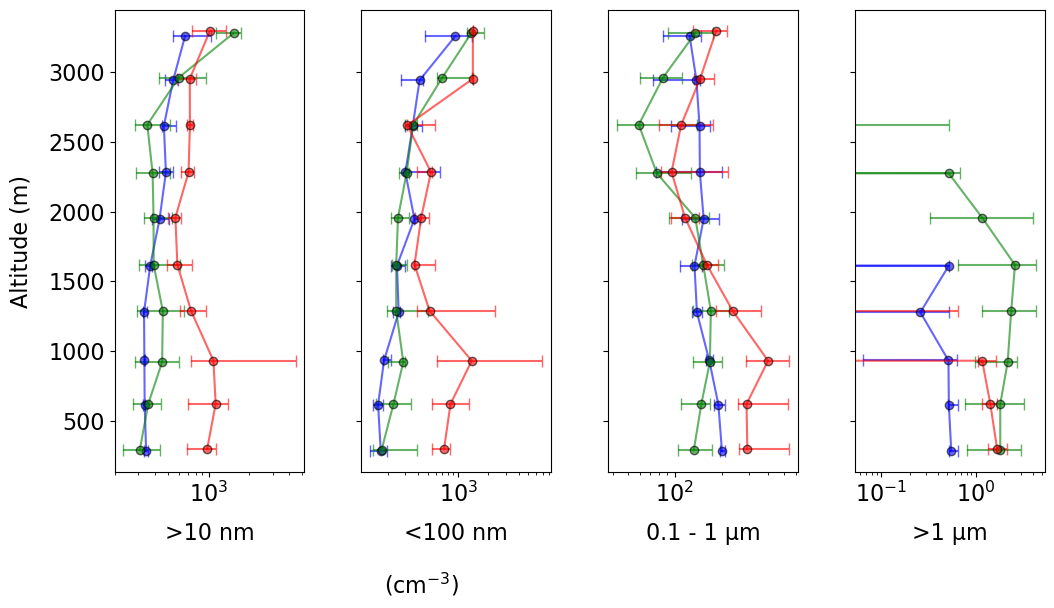

In [136]:
fig, ax = plt.subplots(1, 4, sharey='all', figsize=(12, 6))
#plt.rcParams['font.size'] = '10'
ax[0].errorbar(ocean_transport_plot['CNgt10nm_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['CNgt10nm_ZIEMBA'], ocean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[1].errorbar(ocean_transport_plot['nSMPS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['nSMPS_ZIEMBA'], ocean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '<100nm')
ax[2].errorbar(ocean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '100nm - 1um')
ax[3].errorbar(ocean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>1um')
ax[0].errorbar(Caribbean_transport_plot['CNgt10nm_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['CNgt10nm_ZIEMBA'], Caribbean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '>10nm')
ax[1].errorbar(Caribbean_transport_plot['nSMPS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['nSMPS_ZIEMBA'], Caribbean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '<100nm')
ax[2].errorbar(Caribbean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '100nm - 0.1um')
ax[3].errorbar(Caribbean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '>1um')
ax[0].errorbar(North_America_transport_plot['CNgt10nm_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['CNgt10nm_ZIEMBA'], North_America_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '>10nm')
ax[1].errorbar(North_America_transport_plot['nSMPS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['nSMPS_ZIEMBA'], North_America_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '<100nm')
ax[2].errorbar(North_America_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '100nm - 1um')
ax[3].errorbar(North_America_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '>1um')
ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel('>10 nm', fontsize = 16, labelpad=11)
ax[1].set_xlabel('<100 nm', fontsize = 16, labelpad=11)
ax[2].set_xlabel('0.1 - 1 μm', fontsize = 16, labelpad=11)
ax[3].set_xlabel('>1 μm', fontsize = 16, labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
#labels = ['a)', 'b)', 'c)', 'd)']
#for i in range(4):
    #trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    #ax[i].text(
        #-0.01, 1.05, labels[i],
        #transform=ax[i].transAxes + trans,
        #fontsize='large', verticalalignment='top',
        #bbox=dict(facecolor='1', edgecolor='none', pad=3.0))


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.35, -0.1, '(cm$^{-3}$)', ha='left', va='bottom', fontsize=16)

# Set the title

plt.show()


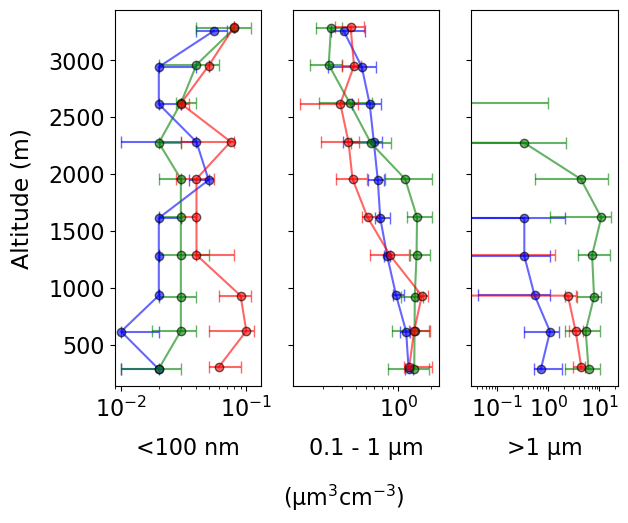

In [137]:
fig, ax = plt.subplots(1, 3, sharey='all') #figsize=(8, 6))
#plt.rcParams['font.size'] = '10'
ax[0].errorbar(ocean_transport_plot['vSMPS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['vSMPS_ZIEMBA'], ocean_transport_plot_75['vSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[1].errorbar(ocean_transport_plot['IntegV_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegV_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegV_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[2].errorbar(ocean_transport_plot['IntegV_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegV_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegV_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[0].errorbar(Caribbean_transport_plot['vSMPS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['vSMPS_ZIEMBA'], Caribbean_transport_plot_75['vSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbean/North Africa')
ax[1].errorbar(Caribbean_transport_plot['IntegV_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegV_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegV_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbean/North Africa')
ax[2].errorbar(Caribbean_transport_plot['IntegV_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegV_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegV_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbean/North Africa')
ax[0].errorbar(North_America_transport_plot['vSMPS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['vSMPS_ZIEMBA'], North_America_transport_plot_75['vSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[1].errorbar(North_America_transport_plot['IntegV_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegV_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegV_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[2].errorbar(North_America_transport_plot['IntegV_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegV_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegV_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[0].set_ylabel('Altitude (m)', fontsize = 17, labelpad=11)
ax[0].set_xlabel('<100 nm', fontsize = 16, labelpad=11)
ax[1].set_xlabel('0.1 - 1 μm', fontsize = 16, labelpad=11)
ax[2].set_xlabel('>1 μm', fontsize = 16, labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
#ax[2].legend(bbox_to_anchor=(-3, 1, 2, 4), loc = 3, ncol = 3, fontsize='16')
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
# Set the title
#labels = ['a)', 'b)', 'c']
#for i in range(3):
    #trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    #ax[i].text(
        #-0.01, 1.055, labels[i],
        #transform=ax[i].transAxes + trans,
        #fontsize='large', verticalalignment='top',
        #bbox=dict(facecolor='1', edgecolor='none', pad=3.0)
    #)
fig.text(0.45, -0.08, '(μm$^{3}$cm$^{-3}$)', ha='left', va='bottom', fontsize=16)

plt.subplots_adjust(wspace=0.3)
fig.tight_layout()

In [138]:
ax[0].set_xlabel('<100nm (um$^{3}$/cm$^{-3}$)', fontsize = 14, labelpad=11)
ax[1].set_xlabel('0.1 - 1um (um$^{3}$/cm$^{-3}$)', fontsize = 14, labelpad=11)
ax[2].set_xlabel('>1um (um$^{3}$/cm$^{-3}$)', fontsize = 14, labelpad=11)

Text(0.5, 86.39999999999998, '>1um (um$^{3}$/cm$^{-3}$)')

In [139]:
# Concatenate the dataframes vertically (along rows)
'''merged_df = pd.concat([Caribbean.describe(), Caribbean2.describe(), North_America.describe(), North_America2.describe(), ocean.describe(), ocean2.describe(), Africa.describe(), DAY14_subset_3000.describe()], axis=0)

# Reset the index of the merged dataframe
merged_df.reset_index(drop=False, inplace=True)

# Display the merged dataframe
merged_df
merged_df.to_csv('C:/Users/taiwoajayi/OneDrive - University of Arizona/python/size_description_median.csv')'''

"merged_df = pd.concat([Caribbean.describe(), Caribbean2.describe(), North_America.describe(), North_America2.describe(), ocean.describe(), ocean2.describe(), Africa.describe(), DAY14_subset_3000.describe()], axis=0)\n\n# Reset the index of the merged dataframe\nmerged_df.reset_index(drop=False, inplace=True)\n\n# Display the merged dataframe\nmerged_df\nmerged_df.to_csv('C:/Users/taiwoajayi/OneDrive - University of Arizona/python/size_description_median.csv')"

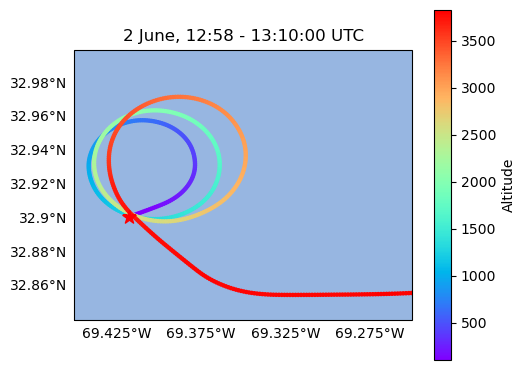

In [140]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-69.45, -69.25, 32.84, 33], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY22_subset['Longitude_THORNHILL'], DAY22_subset['Latitude_THORNHILL'], c=DAY22_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY22_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Set the title of the map
ax.set_title('2 June, 12:58 - 13:10:00 UTC')
# Show the map
plt.show()


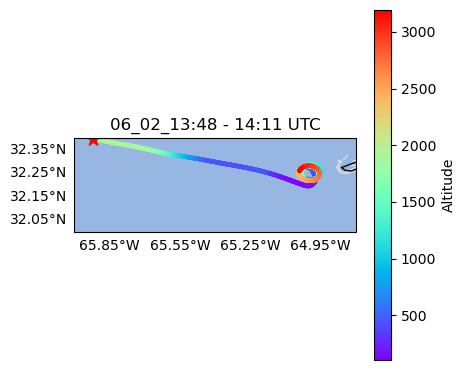

In [141]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-66, -64.8, 32.0, 32.4], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY2_subset['Longitude_THORNHILL'], DAY2_subset['Latitude_THORNHILL'], c=DAY2_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY2_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=1))
ax.xaxis.set_minor_locator(ticker.NullLocator())
# Set the title of the map
ax.set_title('06_02_13:48 - 14:11 UTC')

# Show the map
plt.show()


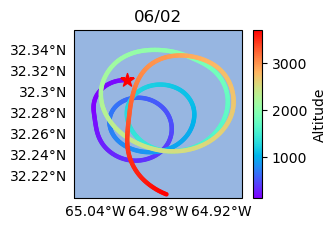

In [142]:
# Create a figure and an axes with a specific projection
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-65.06, -64.9, 32.2, 32.36], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY2b_subset['Longitude_THORNHILL'], DAY2b_subset['Latitude_THORNHILL'], c=DAY2b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY2b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Set the title of the map
ax.set_title('06/02')

# Show the map
plt.show()


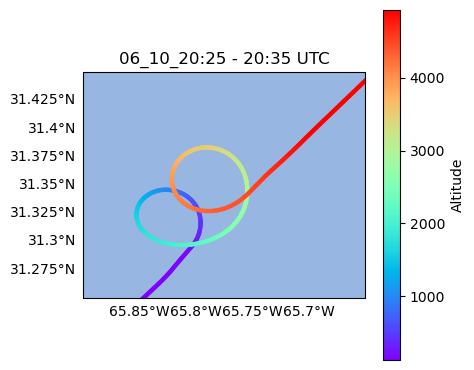

In [143]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-65.9, -65.65, 31.25, 31.45], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY10b_subset['Longitude_THORNHILL'], DAY10b_subset['Latitude_THORNHILL'], c=DAY10b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY10b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Set the title of the map
ax.set_title('06_10_20:25 - 20:35 UTC')

# Show the map
plt.show()


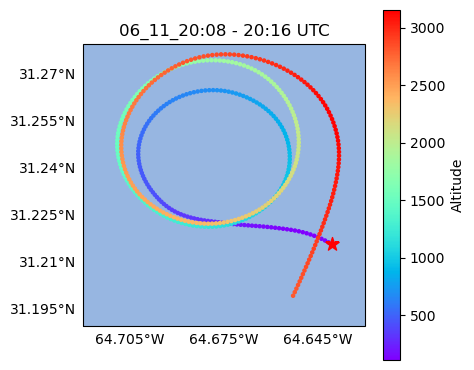

In [144]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-64.72, -64.63, 31.19, 31.28], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY11b_subset['Longitude_THORNHILL'], DAY11b_subset['Latitude_THORNHILL'], c=DAY11b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY11b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Set the title of the map
ax.set_title('06_11_20:08 - 20:16 UTC')

# Show the map
plt.show()


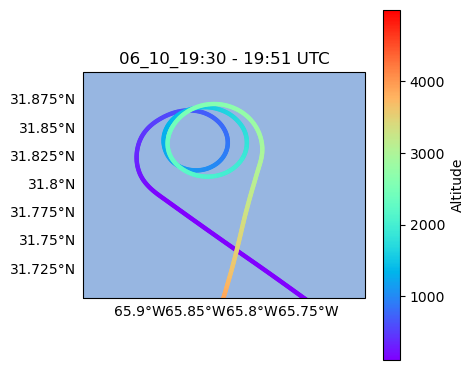

In [145]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-65.95, -65.70, 31.7, 31.9], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(DAY110b_subset['Longitude_THORNHILL'], DAY110b_subset['Latitude_THORNHILL'], c=DAY110b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY110b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']
# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Set the title of the map
ax.set_title('06_10_19:30 - 19:51 UTC')

# Show the map
plt.show()


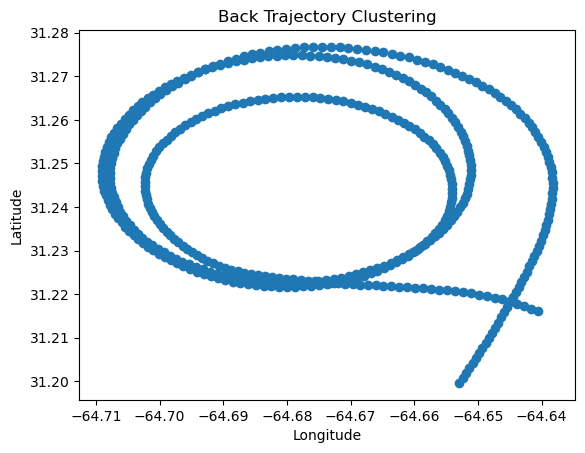

In [146]:
plt.scatter(DAY11b_subset['Longitude_THORNHILL'], DAY11b_subset['Latitude_THORNHILL'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Back Trajectory Clustering')
plt.show()

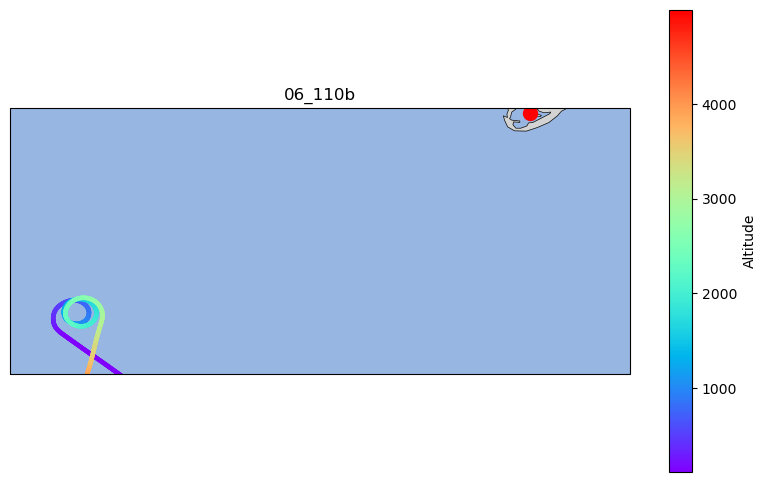

In [147]:
# Coordinates of Tudor Hill, Bermuda
latitude = 32.2884
longitude = -64.8254

# Create a map using Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='10m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(longitude, latitude, 'ro', markersize=10, transform=ccrs.PlateCarree())
# Optionally, plot data or markers on the map
sc = ax.scatter(DAY110b_subset['Longitude_THORNHILL'], DAY110b_subset['Latitude_THORNHILL'], c=DAY110b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Set the extent of the map (adjust according to your preference)
ax.set_extent([-66, -64.6, 31.7, 32.3], crs=ccrs.PlateCarree())
#[-69.45, -64.3, 32.2, 32.98]

# Add a star marker for a single point
single_point = DAY110b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']

# Add a title
ax.set_title('Tudor Hill, Bermuda')
# Set the title of the map
ax.set_title('06_110b')

# Show the map
plt.show()


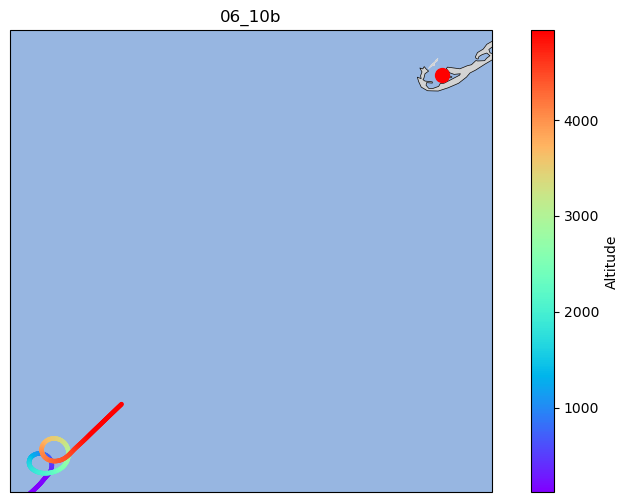

In [148]:
# Coordinates of Tudor Hill, Bermuda
latitude = 32.2884
longitude = -64.8254

# Create a map using Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='10m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(longitude, latitude, 'ro', markersize=10, transform=ccrs.PlateCarree())
# Optionally, plot data or markers on the map
sc = ax.scatter(DAY10b_subset['Longitude_THORNHILL'], DAY10b_subset['Latitude_THORNHILL'], c=DAY10b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Set the extent of the map (adjust according to your preference)
ax.set_extent([-65.9, -64.7, 31.25, 32.4], crs=ccrs.PlateCarree())


# Add a star marker for a single point
single_point = DAY10b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']

# Add a title
ax.set_title('Tudor Hill, Bermuda')
# Set the title of the map
ax.set_title('06_10b')

# Show the map
plt.show()


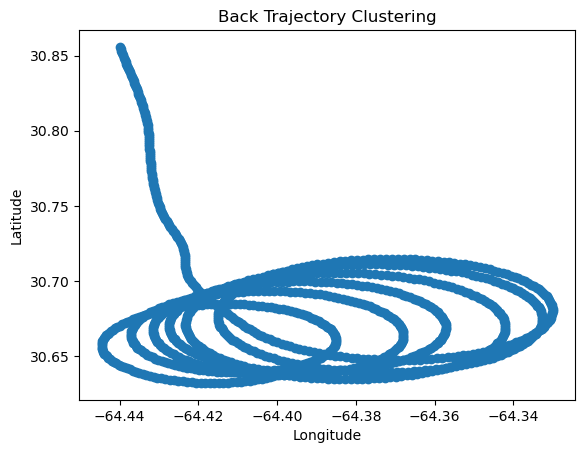

In [149]:
plt.scatter(DAY14_subset['Longitude_THORNHILL'], DAY14_subset['Latitude_THORNHILL'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Back Trajectory Clustering')
plt.show()

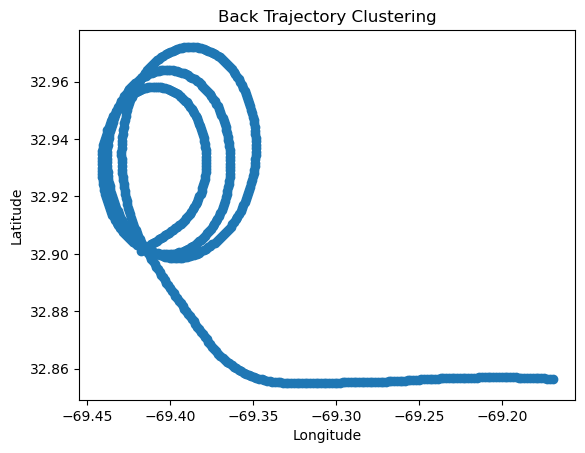

In [150]:
plt.scatter(DAY22_subset['Longitude_THORNHILL'], DAY22_subset['Latitude_THORNHILL'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Back Trajectory Clustering')
plt.show()

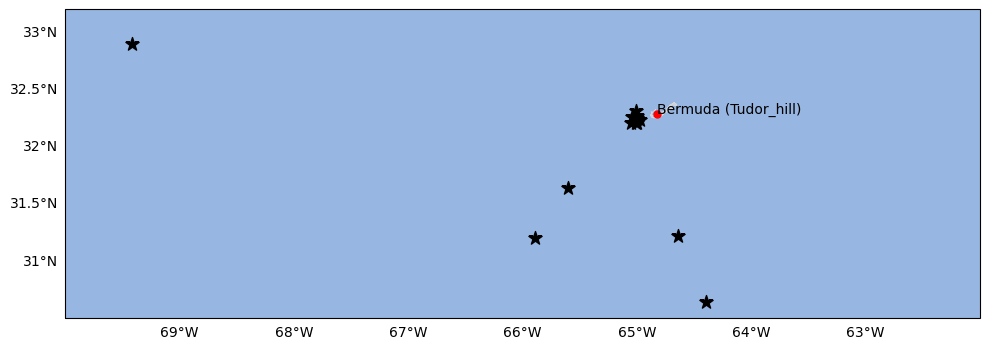

In [151]:
# Coordinates of Tudor Hill, Bermuda
# Create a GeoDataFrame with sample data (latitude, longitude, label)
data = {'Latitude': [32.2884],
        'Longitude': [-64.8254],
        'Label': ['Bermuda (Tudor_hill)']}
# Create a map using Plate Carree projection
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='110m', linewidth=0.5)
# Plot Tudor Hill on the map
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree())
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=10, ha='left', color='black')



# Annotate the point with the name
#ax.text(longitude + 1, latitude + 1, name, fontsize=10, transform=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-70, -62, 30.5, 33.2], crs=ccrs.PlateCarree())


single_point = DAY2_subset.iloc[-1]
single_point1 = DAY2b_subset.iloc[0]
single_point2 = DAY7_subset.iloc[0]
single_point3 = DAY7b_subset.iloc[0]
single_point4 = DAY8_subset.iloc[0]
single_point5 = DAY10_subset.iloc[0]
single_point6 = DAY10b_subset.iloc[0]
single_point7 = DAY11_subset.iloc[0]
single_point8 = DAY11b_subset.iloc[0]
single_point9 = DAY13_subset.iloc[0]
single_point10 = DAY13b_subset.iloc[0]
single_point11 = DAY14_subset.iloc[0]
single_point12 = DAY17_subset.iloc[0]
single_point13 = DAY110b_subset.iloc[0]
single_point14 = DAY22_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point1['Longitude_THORNHILL'], single_point1['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point2['Longitude_THORNHILL'], single_point2['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point3['Longitude_THORNHILL'], single_point3['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point4['Longitude_THORNHILL'], single_point4['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point5['Longitude_THORNHILL'], single_point5['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point6['Longitude_THORNHILL'], single_point6['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point7['Longitude_THORNHILL'], single_point7['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point8['Longitude_THORNHILL'], single_point8['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point9['Longitude_THORNHILL'], single_point9['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point10['Longitude_THORNHILL'], single_point10['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point11['Longitude_THORNHILL'], single_point11['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point12['Longitude_THORNHILL'], single_point12['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point13['Longitude_THORNHILL'], single_point13['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(single_point14['Longitude_THORNHILL'], single_point14['Latitude_THORNHILL'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())


# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)


plt.tight_layout()
# Show the map
plt.show()


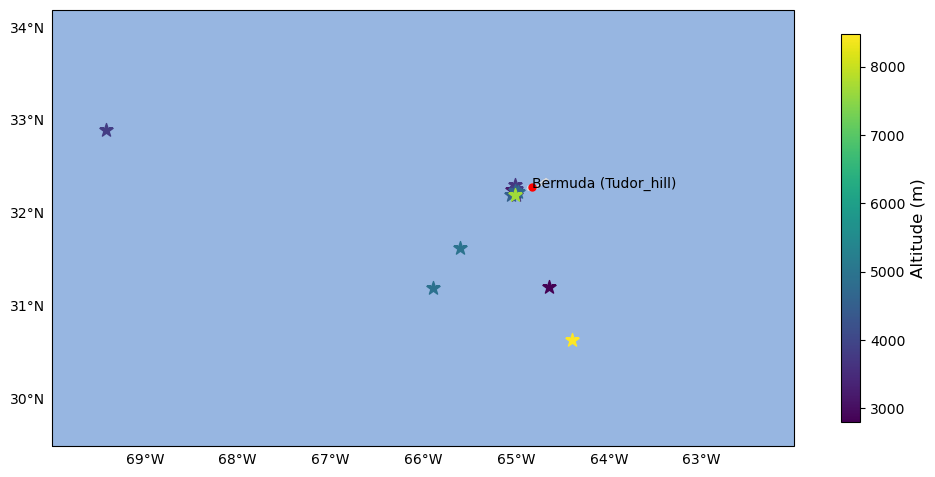

In [152]:
# ... (previous code)
single_point = DAY2_subset.iloc[-1]
single_point1 = DAY2b_subset.iloc[0]
single_point2 = DAY7_subset.iloc[0]
single_point3 = DAY7b_subset.iloc[0]
single_point4 = DAY8_subset.iloc[0]
single_point5 = DAY10_subset.iloc[0]
single_point6 = DAY10b_subset.iloc[0]
single_point7 = DAY11_subset.iloc[0]
single_point8 = DAY11b_subset.iloc[0]
single_point9 = DAY13_subset.iloc[0]
single_point10 = DAY13b_subset.iloc[0]
single_point11 = DAY14_subset.iloc[0]
single_point12 = DAY17_subset.iloc[0]
single_point13 = DAY110b_subset.iloc[0]
single_point14 = DAY22_subset.iloc[0]

# ... (previous code)
single = DAY2_subset.iloc[-1]
single1 = DAY2b_subset.iloc[-1]
single2 = DAY7_subset.iloc[-1]
single3 = DAY7b_subset.iloc[-1]
single4 = DAY8_subset.iloc[-1]
single5 = DAY10_subset.iloc[-1]
single6 = DAY10b_subset.iloc[-1]
single7 = DAY11_subset.iloc[-1]
single8 = DAY11b_subset.iloc[-1]
single9 = DAY13_subset.iloc[-1]
single10 = DAY13b_subset.iloc[-1]
single11 = DAY14_subset.iloc[-1]
single12 = DAY17_subset.iloc[-1]
single13 = DAY110b_subset.iloc[-1]
single14 = DAY22_subset.iloc[-1]


# Calculate the maximum altitude for each single point
altitudes = [
    single['GPS_Altitude_THORNHILL'],
    single1['GPS_Altitude_THORNHILL'],
    single2['GPS_Altitude_THORNHILL'],
    single3['GPS_Altitude_THORNHILL'],
    single4['GPS_Altitude_THORNHILL'],
    single5['GPS_Altitude_THORNHILL'],
    single6['GPS_Altitude_THORNHILL'],
    single7['GPS_Altitude_THORNHILL'],
    single8['GPS_Altitude_THORNHILL'],
    single9['GPS_Altitude_THORNHILL'],
    single10['GPS_Altitude_THORNHILL'],
    single11['GPS_Altitude_THORNHILL'],
    single12['GPS_Altitude_THORNHILL'],
    single13['GPS_Altitude_THORNHILL'],
    single14['GPS_Altitude_THORNHILL']
]

# Define a color map based on altitude values
cmap = plt.get_cmap('viridis')

# Normalize the altitude values to map to the colormap
norm = plt.Normalize(min(altitudes), max(altitudes))

# Create a color map object
scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
scalar_map.set_array([])

# Create a GeoDataFrame with sample data (latitude, longitude, label)
data = {
    'Latitude': [32.2884],
    'Longitude': [-64.8254],
    'Label': ['Bermuda (Tudor_hill)']
}

# Create a map using Plate Carree projection
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='110m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(data['Longitude'], data['Latitude'], 'ro', markersize=5, transform=ccrs.PlateCarree())

# Plot each point with a color based on its altitude
for point, altitude in zip(
    [
        single_point, single_point1, single_point2, single_point3, single_point4,
        single_point5, single_point6, single_point7, single_point8, single_point9,
        single_point10, single_point11, single_point12, single_point13, single_point14
    ],
    altitudes
):
    color = scalar_map.to_rgba(altitude)
    ax.scatter(
        point['Longitude_THORNHILL'], point['Latitude_THORNHILL'],
        marker='*', color=color, s=100, transform=ccrs.PlateCarree()
    )

# Annotate the point with the name
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=10, ha='left', color='black')

# Customize the map projection and extent
ax.set_extent([-70, -62, 29.5, 34.2], crs=ccrs.PlateCarree())

# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# Create the colorbar with adjusted padding and size

# Show the color bar for altitude
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', label='Altitude (m)', pad = 0.05, shrink = 0.4)
cbar.set_label('Altitude (m)', fontsize=12)

plt.tight_layout()

# Show the map
plt.show()


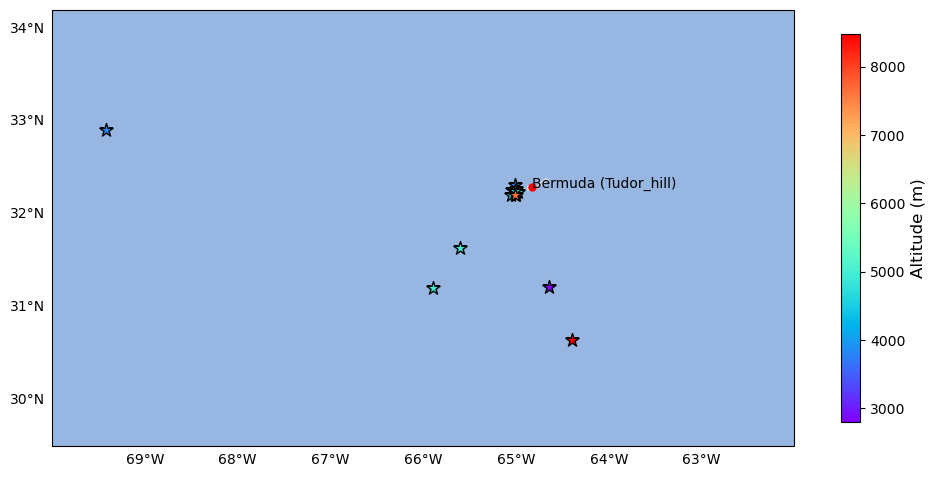

In [153]:
# ... (previous code)
single_point = DAY2_subset.iloc[-1]
single_point1 = DAY2b_subset.iloc[0]
single_point2 = DAY7_subset.iloc[0]
single_point3 = DAY7b_subset.iloc[0]
single_point4 = DAY8_subset.iloc[0]
single_point5 = DAY10_subset.iloc[0]
single_point6 = DAY10b_subset.iloc[0]
single_point7 = DAY11_subset.iloc[0]
single_point8 = DAY11b_subset.iloc[0]
single_point9 = DAY13_subset.iloc[0]
single_point10 = DAY13b_subset.iloc[0]
single_point11 = DAY14_subset.iloc[0]
single_point12 = DAY17_subset.iloc[0]
single_point13 = DAY110b_subset.iloc[0]
single_point14 = DAY22_subset.iloc[0]

# ... (previous code)
single = DAY2_subset.iloc[-1]
single1 = DAY2b_subset.iloc[-1]
single2 = DAY7_subset.iloc[-1]
single3 = DAY7b_subset.iloc[-1]
single4 = DAY8_subset.iloc[-1]
single5 = DAY10_subset.iloc[-1]
single6 = DAY10b_subset.iloc[-1]
single7 = DAY11_subset.iloc[-1]
single8 = DAY11b_subset.iloc[-1]
single9 = DAY13_subset.iloc[-1]
single10 = DAY13b_subset.iloc[-1]
single11 = DAY14_subset.iloc[-1]
single12 = DAY17_subset.iloc[-1]
single13 = DAY110b_subset.iloc[-1]
single14 = DAY22_subset.iloc[-1]


# Calculate the maximum altitude for each single point
altitudes = [
    single['GPS_Altitude_THORNHILL'],
    single1['GPS_Altitude_THORNHILL'],
    single2['GPS_Altitude_THORNHILL'],
    single3['GPS_Altitude_THORNHILL'],
    single4['GPS_Altitude_THORNHILL'],
    single5['GPS_Altitude_THORNHILL'],
    single6['GPS_Altitude_THORNHILL'],
    single7['GPS_Altitude_THORNHILL'],
    single8['GPS_Altitude_THORNHILL'],
    single9['GPS_Altitude_THORNHILL'],
    single10['GPS_Altitude_THORNHILL'],
    single11['GPS_Altitude_THORNHILL'],
    single12['GPS_Altitude_THORNHILL'],
    single13['GPS_Altitude_THORNHILL'],
    single14['GPS_Altitude_THORNHILL']
]

# Define a color map based on altitude values
cmap = plt.get_cmap('rainbow')

# Normalize the altitude values to map to the colormap
norm = plt.Normalize(min(altitudes), max(altitudes))

# Create a color map object
scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
scalar_map.set_array([])

# Create a GeoDataFrame with sample data (latitude, longitude, label)
data = {
    'Latitude': [32.2884],
    'Longitude': [-64.8254],
    'Label': ['Bermuda (Tudor_hill)']
}

# Create a map using Plate Carree projection
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='110m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(data['Longitude'], data['Latitude'], 'ro', markersize=5, transform=ccrs.PlateCarree())

# Plot each point with a color based on its altitude
for point, altitude in zip(
    [
        single_point, single_point1, single_point2, single_point3, single_point4,
        single_point5, single_point6, single_point7, single_point8, single_point9,
        single_point10, single_point11, single_point12, single_point13, single_point14
    ],
    altitudes
):
    color = scalar_map.to_rgba(altitude)
    edge_color = 'black'  # Change this to your desired edge color
    ax.scatter(
        point['Longitude_THORNHILL'], point['Latitude_THORNHILL'],
        marker='*', color=color, edgecolor=edge_color, linewidth=1, s=100, transform=ccrs.PlateCarree()
    )

# Annotate the point with the name
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=10, ha='left', color='black')

# Customize the map projection and extent
ax.set_extent([-70, -62, 29.5, 34.2], crs=ccrs.PlateCarree())

# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# Create the colorbar with adjusted padding and size

# Show the color bar for altitude
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', label='Altitude (m)', pad = 0.05, shrink = 0.4)
cbar.set_label('Altitude (m)', fontsize=12)

plt.tight_layout()

# Show the map
plt.show()


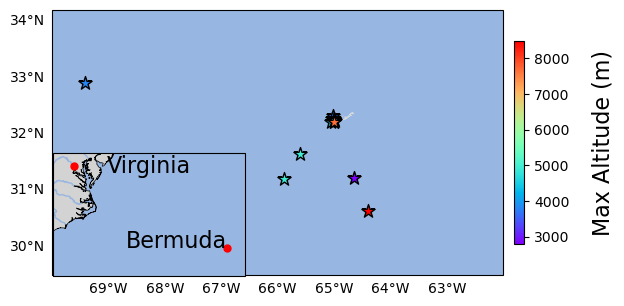

In [154]:

# Create a GeoDataFrame with sample data (latitude, longitude, label)
data = {
    'Latitude': [32.2990],
    'Longitude': [-64.7904],
    'Label': ['Bermuda'],
    'Latitude2': [38.9115],
    'Longitude2': [-77.2519],
    'Label2': ['Virginia']
}

# Create a map using Plate Carree projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='110m', linewidth=0.5)

# Define the coordinates for the inset map's extent
inset_extent = [-79, -63.4, 30, 40]

# Create an inset_axes in the lower left corner of the main map
axins = plt.axes([0.09, 0.20, 0.3, 0.3], projection=ccrs.PlateCarree())

# Add land and coastlines to the inset map
axins.add_feature(cfeature.LAND, facecolor='lightgray')
axins.add_feature(cfeature.COASTLINE, linewidth=0.5)
# Add land and coastlines to the map
axins.add_feature(cfeature.RIVERS)
axins.add_feature(cfeature.OCEAN)

# Set the extent of the inset map to focus on Bermuda
axins.set_extent(inset_extent, crs=ccrs.PlateCarree())

# Plot Tudor Hill on the main map
axins.plot(data['Longitude'], data['Latitude'], 'ro', markersize=5, transform=ccrs.PlateCarree())
axins.plot(data['Longitude2'], data['Latitude2'], 'ro', markersize=5, transform=ccrs.PlateCarree())
cmap = plt.get_cmap('rainbow')
# Plot each point with a color based on its altitude and add an edge color
for point, altitude in zip(
    [
        single_point, single_point1, single_point2, single_point3, single_point4,
        single_point5, single_point6, single_point7, single_point8, single_point9,
        single_point10, single_point11, single_point12, single_point13, single_point14
    ],
    altitudes
):
    color = scalar_map.to_rgba(altitude)
    edge_color = 'black'  # Change this to your desired edge color
    ax.scatter(
        point['Longitude_THORNHILL'], point['Latitude_THORNHILL'],
        marker='*', color=color, edgecolor=edge_color, linewidth=1, s=100, transform=ccrs.PlateCarree()
    )

# Annotate the point with the name
for x, y, label in zip(data['Longitude'], data['Latitude'], data['Label']):
    plt.text(x, y, label, fontsize=16, ha='right', color='black')

for x, y, label in zip(data['Longitude2'], data['Latitude2'], data['Label2']):
    plt.text(-74.6, 38.4, label, fontsize=16, ha='left', color='black', zorder = 50)

# Customize the map projection and extent
ax.set_extent([-70, -62, 29.5, 34.2], crs=ccrs.PlateCarree())

# Show gridlines with tick values on the x and y axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
plt.xticks(fontsize=16)  # Set tick label size for x-axis
plt.yticks(fontsize=16)  # Set tick label size for y-axis
# Show the color bar for altitude
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', label='Altitude (m)', pad = 0.02, shrink = 0.45)
cbar.set_label('Max Altitude (m)', labelpad = 16, fontsize=16)
ax.tick_params(axis='both', labelsize=16)
plt.tight_layout()

# Show the map
plt.show()


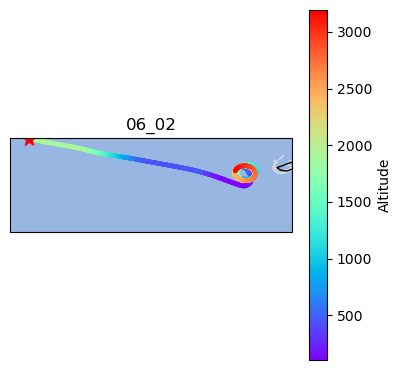

In [155]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-66, -64.8, 32.0, 32.4], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
# Optionally, plot data or markers on the map
sc = ax.scatter(DAY2_subset['Longitude_THORNHILL'], DAY2_subset['Latitude_THORNHILL'], c=DAY2_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = DAY2_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']

# Set the title of the map
ax.set_title('06_02')

# Show the map
plt.show()


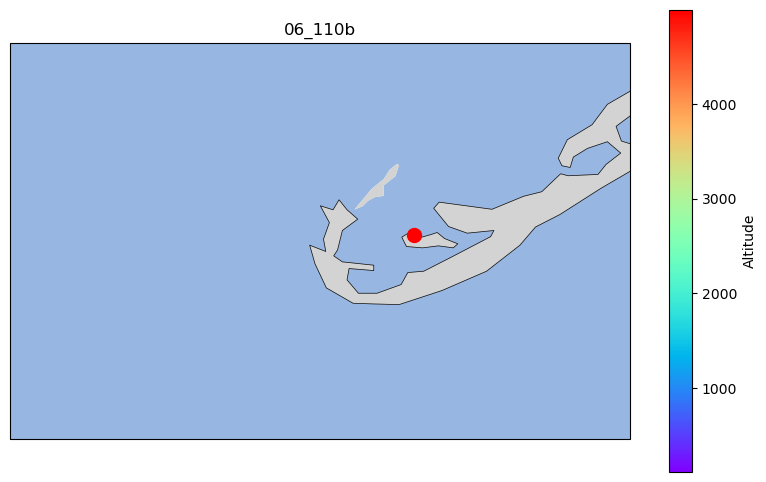

In [156]:
# Coordinates of Tudor Hill, Bermuda
latitude = 32.2884
longitude = -64.8254

# Create a map using Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='10m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(longitude, latitude, 'ro', markersize=10, transform=ccrs.PlateCarree())
# Optionally, plot data or markers on the map
sc = ax.scatter(DAY110b_subset['Longitude_THORNHILL'], DAY110b_subset['Latitude_THORNHILL'], c=DAY110b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Set the extent of the map (adjust according to your preference)
ax.set_extent([-65.06, -64.7, 32.17, 32.4], crs=ccrs.PlateCarree())


# Add a star marker for a single point
single_point = DAY110b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']

# Add a title
ax.set_title('Tudor Hill, Bermuda')
# Set the title of the map
ax.set_title('06_110b')

# Show the map
plt.show()


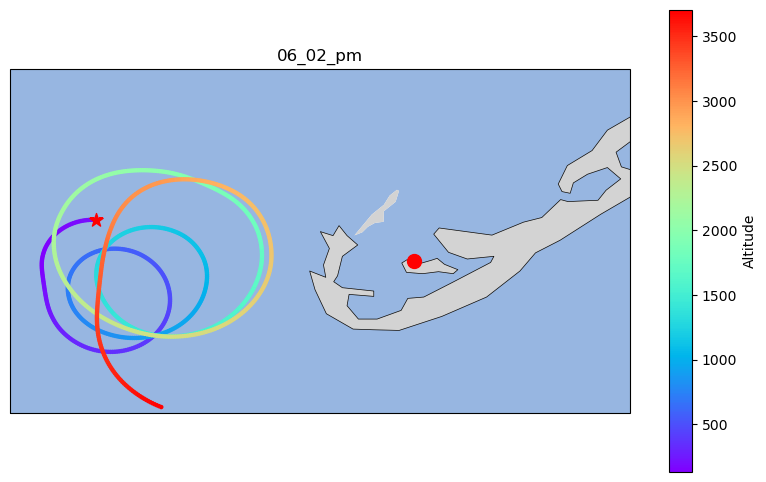

In [157]:
# Coordinates of Tudor Hill, Bermuda
latitude = 32.2884
longitude = -64.8254

# Create a map using Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add land and coastlines to the map
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='10m', linewidth=0.5)

# Plot Tudor Hill on the map
ax.plot(longitude, latitude, 'ro', markersize=10, transform=ccrs.PlateCarree())
# Optionally, plot data or markers on the map
sc = ax.scatter(DAY2b_subset['Longitude_THORNHILL'], DAY2b_subset['Latitude_THORNHILL'], c=DAY2b_subset['GPS_Altitude_THORNHILL'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Set the extent of the map (adjust according to your preference)
ax.set_extent([-65.06, -64.7, 32.2, 32.4], crs=ccrs.PlateCarree())

# Add a star marker for a single point
single_point = DAY2b_subset.iloc[0]
ax.scatter(single_point['Longitude_THORNHILL'], single_point['Latitude_THORNHILL'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())
ax.xlabel = single_point['Longitude_THORNHILL']

# Add a title
ax.set_title('Tudor Hill, Bermuda')
# Set the title of the map
ax.set_title('06_02_pm')

# Show the map
plt.show()


In [158]:
DAY222 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220602_R0_L1_20230915T130759.ict')
start_index = np.where(DAY222["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY222["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY222_subset = DAY222[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY222_subset


Time_Start           Time_Stop  Latitude_THORNHILL   
5981 2022-06-02 12:58:55 2022-06-02 12:58:56           32.901061  \
5982 2022-06-02 12:58:56 2022-06-02 12:58:57           32.901505   
5983 2022-06-02 12:58:57 2022-06-02 12:58:58           32.901950   
5984 2022-06-02 12:58:58 2022-06-02 12:58:59           32.902395   
5985 2022-06-02 12:58:59 2022-06-02 12:59:00           32.902841   
...                  ...                 ...                 ...   
6641 2022-06-02 13:09:55 2022-06-02 13:09:56           32.856578   
6642 2022-06-02 13:09:56 2022-06-02 13:09:57           32.856534   
6643 2022-06-02 13:09:57 2022-06-02 13:09:58           32.856492   
6644 2022-06-02 13:09:58 2022-06-02 13:09:59           32.856451   
6645 2022-06-02 13:09:59 2022-06-02 13:10:00           32.856409   

      Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
5981           -69.417865                 115.705      225948.0  \
5982           -69.416658                 115.605      341467.7   
5983           -69.415451                 114.775      198596.5   
5984           -69.414241                 113.025      158603.0   
5985           -69.413027                 110.485      326062.3   
...                   ...                     ...           ...   
6641           -69.176604                3810.860           0.0   
6642           -69.174895                3811.410           0.0   
6643           -69.173186                3812.340           0.0   
6644           -69.171477                3813.680           0.0   
6645           -69.169767                3815.470           0.0   

      ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
5981       0.000005        0.000005                        1.270  \
5982       0.000004        0.000003                        1.275   
5983       0.000004        0.000003                        1.275   
5984       0.000005        0.000007                        1.275   
5985       0.000006        0.000007                        1.285   
...             ...             ...                          ...   
6641       0.000000        0.000000                          NaN   
6642       0.000000        0.000000                          NaN   
6643       0.000000        0.000000                          NaN   
6644       0.000000        0.000000                          NaN   
6645       0.000000        0.000000                          NaN   

      AEabsDRY_470to660nm_ZIEMBA  
5981                         NaN  
5982                         NaN  
5983                         NaN  
5984                         NaN  
5985                         NaN  
...                          ...  
6641                         NaN  
6642                         NaN  
6643                         NaN  
6644                         NaN  
6645                         NaN  

[665 rows x 10 columns]

In [159]:
nbins = 20
bins = np.linspace(DAY222_subset.GPS_Altitude_THORNHILL.min(), DAY222_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY222_subset['Bins'] = pd.cut(DAY22_subset['GPS_Altitude_THORNHILL'], bins)
DAY222_subset_median = DAY222_subset.groupby('Bins').median()
DAY222_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(105.985, 291.908]   2022-06-02 12:59:12.000 2022-06-02 12:59:13.000  \
(291.908, 477.83]    2022-06-02 12:59:41.000 2022-06-02 12:59:42.000   
(477.83, 663.753]    2022-06-02 13:00:05.000 2022-06-02 13:00:06.000   
(663.753, 849.676]   2022-06-02 13:00:27.500 2022-06-02 13:00:28.500   
(849.676, 1035.599]  2022-06-02 13:00:49.500 2022-06-02 13:00:50.500   
(1035.599, 1221.522] 2022-06-02 13:01:12.000 2022-06-02 13:01:13.000   
(1221.522, 1407.444] 2022-06-02 13:01:35.500 2022-06-02 13:01:36.500   
(1407.444, 1593.367] 2022-06-02 13:01:59.500 2022-06-02 13:02:00.500   
(1593.367, 1779.29]  2022-06-02 13:02:22.000 2022-06-02 13:02:23.000   
(1779.29, 1965.212]  2022-06-02 13:02:43.500 2022-06-02 13:02:44.500   
(1965.212, 2151.135] 2022-06-02 13:03:09.000 2022-06-02 13:03:10.000   
(2151.135, 2337.058] 2022-06-02 13:03:35.500 2022-06-02 13:03:36.500   
(2337.058, 2522.981] 2022-06-02 13:04:00.000 2022-06-02 13:04:01.000   
(2522.981, 2708.904] 2022-06-02 13:04:25.000 2022-06-02 13:04:26.000   
(2708.904, 2894.826] 2022-06-02 13:04:50.500 2022-06-02 13:04:51.500   
(2894.826, 3080.749] 2022-06-02 13:05:18.000 2022-06-02 13:05:19.000   
(3080.749, 3266.672] 2022-06-02 13:05:46.500 2022-06-02 13:05:47.500   
(3266.672, 3452.594] 2022-06-02 13:06:14.000 2022-06-02 13:06:15.000   
(3452.594, 3638.517] 2022-06-02 13:06:40.500 2022-06-02 13:06:41.500   
(3638.517, 3824.44]  2022-06-02 13:08:26.500 2022-06-02 13:08:27.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.985, 291.908]             32.908859           -69.397118  \
(291.908, 477.83]              32.934998           -69.379643   
(477.83, 663.753]              32.955627           -69.395696   
(663.753, 849.676]             32.955277           -69.423800   
(849.676, 1035.599]            32.936339           -69.440578   
(1035.599, 1221.522]           32.911789           -69.433273   
(1221.522, 1407.444]           32.900627           -69.404055   
(1407.444, 1593.367]           32.910887           -69.373075   
(1593.367, 1779.29]            32.936250           -69.364681   
(1779.29, 1965.212]            32.957546           -69.379036   
(1965.212, 2151.135]           32.962893           -69.412412   
(2151.135, 2337.058]           32.940995           -69.437022   
(2337.058, 2522.981]           32.912824           -69.430184   
(2522.981, 2708.904]           32.899423           -69.398875   
(2708.904, 2894.826]           32.909032           -69.364387   
(2894.826, 3080.749]           32.939278           -69.349949   
(3080.749, 3266.672]           32.968231           -69.369687   
(3266.672, 3452.594]           32.967472           -69.408091   
(3452.594, 3638.517]           32.941238           -69.428694   
(3638.517, 3824.44]            32.856859           -69.323195   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(105.985, 291.908]                  182.2350     199531.80       0.000005  \
(291.908, 477.83]                   388.9450     146233.20       0.000005   
(477.83, 663.753]                   571.9250     107159.20       0.000005   
(663.753, 849.676]                  763.2650      88005.60       0.000004   
(849.676, 1035.599]                 944.0275      80833.35       0.000005   
(1035.599, 1221.522]               1120.2100      43680.70       0.000004   
(1221.522, 1407.444]               1331.2700      33753.05       0.000004   
(1407.444, 1593.367]               1494.2100      50145.90       0.000004   
(1593.367, 1779.29]                1682.6500      45008.70       0.000004   
(1779.29, 1965.212]                1869.2250          0.00       0.000000   
(1965.212, 2151.135]               2065.3600          0.00       0.000000   
(2151.135, 2337.0

In [160]:
DAY222_subset_25 = DAY222_subset_median - DAY222_subset.groupby('Bins').quantile(.25)
DAY222_subset_25
DAY222_subset_75 = DAY222_subset.groupby('Bins').quantile(.75) - DAY222_subset_median
DAY222_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(105.985, 291.908]             0 days 00:00:08           0 days 00:00:08  \
(291.908, 477.83]              0 days 00:00:06           0 days 00:00:06   
(477.83, 663.753]       0 days 00:00:05.500000    0 days 00:00:05.500000   
(663.753, 849.676]   0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(849.676, 1035.599]  0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(1035.599, 1221.522]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(1221.522, 1407.444] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(1407.444, 1593.367] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(1593.367, 1779.29]            0 days 00:00:05           0 days 00:00:05   
(1779.29, 1965.212]  0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(1965.212, 2151.135]           0 days 00:00:07           0 days 00:00:07   
(2151.135, 2337.058] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(2337.058, 2522.981]           0 days 00:00:06           0 days 00:00:06   
(2522.981, 2708.904]           0 days 00:00:06           0 days 00:00:06   
(2708.904, 2894.826] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(2894.826, 3080.749]           0 days 00:00:07           0 days 00:00:07   
(3080.749, 3266.672] 0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(3266.672, 3452.594]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(3452.594, 3638.517] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3638.517, 3824.44]  0 days 00:00:46.250000128 0 days 00:00:46.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.985, 291.908]              0.005096             0.008789  \
(291.908, 477.83]               0.006425             0.000766   
(477.83, 663.753]               0.001940             0.006010   
(663.753, 849.676]              0.002122             0.006326   
(849.676, 1035.599]             0.005637             0.001915   
(1035.599, 1221.522]            0.005465             0.005521   
(1221.522, 1407.444]            0.000862             0.008256   
(1407.444, 1593.367]            0.005764             0.004713   
(1593.367, 1779.29]             0.005791             0.000575   
(1779.29, 1965.212]             0.003188             0.005377   
(1965.212, 2151.135]            0.000963             0.009561   
(2151.135, 2337.058]            0.006459             0.002888   
(2337.058, 2522.981]            0.006274             0.005957   
(2522.981, 2708.904]            0.001014             0.008894   
(2708.904, 2894.826]            0.005564             0.006400   
(2894.826, 3080.749]            0.008590             0.001085   
(3080.749, 3266.672]            0.002987             0.008023   
(3266.672, 3452.594]            0.003192             0.008652   
(3452.594, 3638.517]            0.007549             0.002047   
(3638.517, 3824.44]             0.021119             0.075596   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(105.985, 291.908]                  48.51500    107353.500   2.730000e-07  \
(291.908, 477.83]                   40.48000     61418.900   7.390000e-07   
(477.83, 663.753]                   49.47000     57676.650   5.070000e-07   
(663.753, 849.676]                  38.95250     37402.725   1.373250e-06   
(849.676, 1035.599]                 40.55375     29051.475   1.454000e-06   
(1035.599, 1221.522]                46.84500     45447.100   9.215000e-07   
(1221.522, 1407.444]                30.42500     34395.675   2.482500e-07   
(1407.444, 1593.367]                45.85500     21137.875   2.525000e-06   
(1593.367, 1779.29]                 46.45000     18084.700   7.420000e-07   
(1779.29, 1965.212]                 49.83500     30814.175   3.750000e-06   
(1965.21

In [161]:
DAY2a = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220602_R0_L1_20230915T130759.ict')
start_index = np.where(DAY2a["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2a["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))

DAY2a_subset = DAY2a[start_index[0][0]:stop_index[0][0]]
DAY2a_subset



Time_Start           Time_Stop  Latitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01           32.397719  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02           32.397400   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03           32.397079   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04           32.396758   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05           32.396435   
...                   ...                 ...                 ...   
10301 2022-06-02 14:10:55 2022-06-02 14:10:56           32.264343   
10302 2022-06-02 14:10:56 2022-06-02 14:10:57           32.263327   
10303 2022-06-02 14:10:57 2022-06-02 14:10:58           32.262289   
10304 2022-06-02 14:10:58 2022-06-02 14:10:59           32.261232   
10305 2022-06-02 14:10:59 2022-06-02 14:11:00           32.260159   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
8926            -65.920473                 1896.68           0.0  \
8927            -65.918900                 1897.28       26161.7   
8928            -65.917327                 1898.01           0.0   
8929            -65.915754                 1898.83       25703.0   
8930            -65.914182                 1899.75           0.0   
...                    ...                     ...           ...   
10301           -65.038703                 3176.07           0.0   
10302           -65.039317                 3180.14           0.0   
10303           -65.039886                 3184.23           0.0   
10304           -65.040413                 3188.41           0.0   
10305           -65.040895                 3192.83           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
8926        0.000000        0.000000                        0.415  \
8927        0.000004        0.000003                        0.395   
8928        0.000000        0.000000                        0.425   
8929        0.000004        0.000003                        0.450   
8930        0.000000        0.000000                        0.440   
...              ...             ...                          ...   
10301       0.000000        0.000000                          NaN   
10302       0.000000        0.000000                          NaN   
10303       0.000000        0.000000                          NaN   
10304       0.000000        0.000000                          NaN   
10305       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
8926                          NaN  
8927                          NaN  
8928                          NaN  
8929                          NaN  
8930                          NaN  
...                           ...  
10301                         NaN  
10302                         NaN  
10303                         NaN  
10304                         NaN  
10305                         NaN  

[1380 rows x 10 columns]

In [162]:
nbins = 20
bins = np.linspace(DAY2a_subset.GPS_Altitude_THORNHILL.min(), DAY2a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2a_subset['Bins'] = pd.cut(DAY2a_subset['GPS_Altitude_THORNHILL'], bins)
DAY2a_subset_median = DAY2a_subset.groupby('Bins').median()
DAY2a_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(106.28, 260.607]    2022-06-02 13:58:07.000 2022-06-02 13:58:08.000  \
(260.607, 414.935]   2022-06-02 13:59:23.500 2022-06-02 13:59:24.500   
(414.935, 569.262]   2022-06-02 13:55:05.000 2022-06-02 13:55:06.000   
(569.262, 723.59]    2022-06-02 14:00:59.500 2022-06-02 14:01:00.500   
(723.59, 877.917]    2022-06-02 14:01:34.500 2022-06-02 14:01:35.500   
(877.917, 1032.245]  2022-06-02 14:02:06.000 2022-06-02 14:02:07.000   
(1032.245, 1186.572] 2022-06-02 14:02:34.500 2022-06-02 14:02:35.500   
(1186.572, 1340.9]   2022-06-02 14:03:11.500 2022-06-02 14:03:12.500   
(1340.9, 1495.227]   2022-06-02 14:03:46.500 2022-06-02 14:03:47.500   
(1495.227, 1649.555] 2022-06-02 14:04:22.500 2022-06-02 14:04:23.500   
(1649.555, 1803.882] 2022-06-02 14:05:01.500 2022-06-02 14:05:02.500   
(1803.882, 1958.21]  2022-06-02 13:49:44.500 2022-06-02 13:49:45.500   
(1958.21, 2112.538]  2022-06-02 14:06:36.000 2022-06-02 14:06:37.000   
(2112.538, 2266.865] 2022-06-02 14:07:12.000 2022-06-02 14:07:13.000   
(2266.865, 2421.192] 2022-06-02 14:07:50.000 2022-06-02 14:07:51.000   
(2421.192, 2575.52]  2022-06-02 14:08:30.000 2022-06-02 14:08:31.000   
(2575.52, 2729.848]  2022-06-02 14:09:05.500 2022-06-02 14:09:06.500   
(2729.848, 2884.175] 2022-06-02 14:09:40.500 2022-06-02 14:09:41.500   
(2884.175, 3038.502] 2022-06-02 14:10:14.500 2022-06-02 14:10:15.500   
(3038.502, 3192.83]  2022-06-02 14:10:44.500 2022-06-02 14:10:45.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(106.28, 260.607]              32.212884           -65.048915  \
(260.607, 414.935]             32.243630           -64.982119   
(414.935, 569.262]             32.276937           -65.274051   
(569.262, 723.59]              32.264739           -65.037435   
(723.59, 877.917]              32.232674           -65.025610   
(877.917, 1032.245]            32.231287           -64.985946   
(1032.245, 1186.572]           32.256490           -64.955171   
(1186.572, 1340.9]             32.285203           -64.967662   
(1340.9, 1495.227]             32.287492           -65.008714   
(1495.227, 1649.555]           32.268394           -65.030267   
(1649.555, 1803.882]           32.229465           -65.022216   
(1803.882, 1958.21]            32.365926           -65.753603   
(1958.21, 2112.538]            32.272612           -64.973754   
(2112.538, 2266.865]           32.280830           -65.015307   
(2266.865, 2421.192]           32.254788           -65.042879   
(2421.192, 2575.52]            32.222414           -65.014852   
(2575.52, 2729.848]            32.224976           -64.969322   
(2729.848, 2884.175]           32.259981           -64.958382   
(2884.175, 3038.502]           32.281298           -64.992971   
(3038.502, 3192.83]            32.273513           -65.029963   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(106.28, 260.607]                   129.9950     239709.00       0.000005  \
(260.607, 414.935]                  312.9625     254731.20       0.000005   
(414.935, 569.262]                  449.9600     229769.80       0.000005   
(569.262, 723.59]                   658.1225     122647.80       0.000005   
(723.59, 877.917]                   784.5150     102401.50       0.000005   
(877.917, 1032.245]                 966.0450      78057.50       0.000005   
(1032.245, 1186.572]               1107.9450      49526.55       0.000004   
(1186.572, 1340.9]                 1259.7850      35542.40       0.000004   
(1340.9, 1495.227]                 1410.3050      34783.85       0.000004   
(1495.227, 1649.555]               1582.6750      34877.95       0.000004   
(1649.555, 1803.882]               1725.1300      34547.10       0.000004   
(1803.882, 1958.2

In [163]:
DAY2a_subset_25 = DAY2a_subset_median - DAY2a_subset.groupby('Bins').quantile(.25)
DAY2a_subset_25
DAY2a_subset_75 = DAY2a_subset.groupby('Bins').quantile(.75) - DAY2a_subset_median
DAY2a_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(106.28, 260.607]              0 days 00:00:38           0 days 00:00:38  \
(260.607, 414.935]   0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(414.935, 569.262]      0 days 00:01:06.500000    0 days 00:01:06.500000   
(569.262, 723.59]    0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(723.59, 877.917]    0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(877.917, 1032.245]     0 days 00:00:09.500000    0 days 00:00:09.500000   
(1032.245, 1186.572] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1186.572, 1340.9]   0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(1340.9, 1495.227]   0 days 00:00:11.250000128 0 days 00:00:11.250000128   
(1495.227, 1649.555] 0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(1649.555, 1803.882] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(1803.882, 1958.21]  0 days 00:00:52.250000128 0 days 00:00:52.250000128   
(1958.21, 2112.538]            0 days 00:00:09           0 days 00:00:09   
(2112.538, 2266.865]    0 days 00:00:08.500000    0 days 00:00:08.500000   
(2266.865, 2421.192]           0 days 00:00:10           0 days 00:00:10   
(2421.192, 2575.52]     0 days 00:00:09.500000    0 days 00:00:09.500000   
(2575.52, 2729.848]  0 days 00:00:07.749999872 0 days 00:00:07.749999872   
(2729.848, 2884.175] 0 days 00:00:09.250000128 0 days 00:00:09.250000128   
(2884.175, 3038.502] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3038.502, 3192.83]  0 days 00:00:07.250000128 0 days 00:00:07.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(106.28, 260.607]               0.011386             0.045676  \
(260.607, 414.935]              0.004031             0.007064   
(414.935, 569.262]              0.014650             0.088544   
(569.262, 723.59]               0.046041             0.002170   
(723.59, 877.917]               0.083007             0.015434   
(877.917, 1032.245]             0.089212             0.011983   
(1032.245, 1186.572]            0.067394             0.006049   
(1186.572, 1340.9]              0.012262             0.012110   
(1340.9, 1495.227]              0.042959             0.012559   
(1495.227, 1649.555]            0.065660             0.002689   
(1649.555, 1803.882]            0.111690             0.013814   
(1803.882, 1958.21]             0.014990             0.083317   
(1958.21, 2112.538]             0.004574             0.007826   
(2112.538, 2266.865]            0.000680             0.010239   
(2266.865, 2421.192]            0.009908             0.003184   
(2421.192, 2575.52]             0.004843             0.012391   
(2575.52, 2729.848]             0.006101             0.007136   
(2729.848, 2884.175]            0.008804             0.002220   
(2884.175, 3038.502]            0.000546             0.009229   
(3038.502, 3192.83]             0.004550             0.007862   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(106.28, 260.607]                   43.15500     52107.000   6.500000e-07  \
(260.607, 414.935]                  36.90000    129848.525   8.152500e-07   
(414.935, 569.262]                  32.04750    106561.400   9.230000e-07   
(569.262, 723.59]                   32.76375     47495.700   7.372500e-07   
(723.59, 877.917]                   39.46500     32225.850   6.462500e-07   
(877.917, 1032.245]                 29.57500     39104.450   5.070000e-07   
(1032.245, 1186.572]                36.28750     31466.575   7.580000e-07   
(1186.572, 1340.9]                  40.45500     35860.525   1.500000e-06   
(1340.9, 1495.227]                  35.74500     31773.325   1.144500e-06   
(1495.227, 1649.555]                28.02000     37713.100   9.930000e-07   
(1649.55

In [164]:
DAY2bb = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220602_R0_L2_20230915T130759.ict')
start_index = np.where(DAY2bb["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2bb["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2bb_subset = DAY2bb[start_index[0][0]:stop_index[0][0]]
DAY2bb_subset = DAY2bb_subset.replace(-888888, 0)
DAY2bb_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9180  2022-06-02 18:36:00 2022-06-02 18:36:01           32.312301  \
9181  2022-06-02 18:36:01 2022-06-02 18:36:02           32.312336   
9182  2022-06-02 18:36:02 2022-06-02 18:36:03           32.312332   
9183  2022-06-02 18:36:03 2022-06-02 18:36:04           32.312294   
9184  2022-06-02 18:36:04 2022-06-02 18:36:05           32.312221   
...                   ...                 ...                 ...   
10195 2022-06-02 18:52:55 2022-06-02 18:52:56           32.205808   
10196 2022-06-02 18:52:56 2022-06-02 18:52:57           32.205215   
10197 2022-06-02 18:52:57 2022-06-02 18:52:58           32.204648   
10198 2022-06-02 18:52:58 2022-06-02 18:52:59           32.204104   
10199 2022-06-02 18:52:59 2022-06-02 18:53:00           32.203586   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
9180            -65.009805                 191.225       38662.0  \
9181            -65.010962                 193.480      404071.8   
9182            -65.012116                 195.600      238943.5   
9183            -65.013268                 197.010       89972.5   
9184            -65.014415                 197.440      315622.8   
...                    ...                     ...           ...   
10195           -64.977280                3678.610           0.0   
10196           -64.976028                3684.900           0.0   
10197           -64.974760                3691.340           0.0   
10198           -64.973478                3697.790           0.0   
10199           -64.972182                3704.160           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
9180        0.000005        0.000005                        1.360  \
9181        0.000006        0.000006                        1.330   
9182        0.000006        0.000007                        1.320   
9183        0.000005        0.000005                        1.340   
9184        0.000009        0.000012                        1.365   
...              ...             ...                          ...   
10195       0.000000        0.000000                          NaN   
10196       0.000000        0.000000                          NaN   
10197       0.000000        0.000000                          NaN   
10198       0.000000        0.000000                          NaN   
10199       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
9180                          NaN  
9181                          NaN  
9182                          NaN  
9183                          NaN  
9184                          NaN  
...                           ...  
10195                         NaN  
10196                         NaN  
10197                         NaN  
10198                         NaN  
10199                         NaN  

[1020 rows x 10 columns]

In [165]:
nbins = 20
bins = np.linspace(DAY2bb_subset.GPS_Altitude_THORNHILL.min(), DAY2bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2bb_subset['Bins'] = pd.cut(DAY2bb_subset['GPS_Altitude_THORNHILL'], bins)
DAY2bb_subset_median = DAY2bb_subset.groupby('Bins').median()
DAY2bb_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(132.5, 311.083]     2022-06-02 18:36:45.500 2022-06-02 18:36:46.500  \
(311.083, 489.666]   2022-06-02 18:38:01.500 2022-06-02 18:38:02.500   
(489.666, 668.249]   2022-06-02 18:39:05.000 2022-06-02 18:39:06.000   
(668.249, 846.832]   2022-06-02 18:40:07.000 2022-06-02 18:40:08.000   
(846.832, 1025.415]  2022-06-02 18:41:01.500 2022-06-02 18:41:02.500   
(1025.415, 1203.998] 2022-06-02 18:41:52.500 2022-06-02 18:41:53.500   
(1203.998, 1382.581] 2022-06-02 18:42:45.500 2022-06-02 18:42:46.500   
(1382.581, 1561.164] 2022-06-02 18:43:40.500 2022-06-02 18:43:41.500   
(1561.164, 1739.747] 2022-06-02 18:44:32.000 2022-06-02 18:44:33.000   
(1739.747, 1918.33]  2022-06-02 18:45:19.500 2022-06-02 18:45:20.500   
(1918.33, 2096.913]  2022-06-02 18:46:09.500 2022-06-02 18:46:10.500   
(2096.913, 2275.496] 2022-06-02 18:47:01.500 2022-06-02 18:47:02.500   
(2275.496, 2454.079] 2022-06-02 18:47:52.000 2022-06-02 18:47:53.000   
(2454.079, 2632.662] 2022-06-02 18:48:47.000 2022-06-02 18:48:48.000   
(2632.662, 2811.245] 2022-06-02 18:49:48.500 2022-06-02 18:49:49.500   
(2811.245, 2989.828] 2022-06-02 18:50:38.000 2022-06-02 18:50:39.000   
(2989.828, 3168.411] 2022-06-02 18:51:11.500 2022-06-02 18:51:12.500   
(3168.411, 3346.994] 2022-06-02 18:51:41.500 2022-06-02 18:51:42.500   
(3346.994, 3525.577] 2022-06-02 18:52:13.000 2022-06-02 18:52:14.000   
(3525.577, 3704.16]  2022-06-02 18:52:44.500 2022-06-02 18:52:45.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.5, 311.083]               32.282614           -65.035667  \
(311.083, 489.666]             32.240532           -64.982618   
(489.666, 668.249]             32.290858           -64.989390   
(668.249, 846.832]             32.258643           -65.021762   
(846.832, 1025.415]            32.250738           -64.962283   
(1025.415, 1203.998]           32.299232           -64.954250   
(1203.998, 1382.581]           32.290507           -65.005753   
(1382.581, 1561.164]           32.247731           -64.973601   
(1561.164, 1739.747]           32.272387           -64.918661   
(1739.747, 1918.33]            32.319878           -64.925479   
(1918.33, 2096.913]            32.339583           -64.979853   
(2096.913, 2275.496]           32.313828           -65.031363   
(2275.496, 2454.079]           32.261652           -65.014991   
(2454.079, 2632.662]           32.247711           -64.944684   
(2632.662, 2811.245]           32.306049           -64.912027   
(2811.245, 2989.828]           32.334519           -64.960524   
(2989.828, 3168.411]           32.316755           -64.996723   
(3168.411, 3346.994]           32.283193           -65.007067   
(3346.994, 3525.577]           32.246518           -65.008902   
(3525.577, 3704.16]            32.213379           -64.989331   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(132.5, 311.083]                    191.1225     179191.05       0.000005  \
(311.083, 489.666]                  384.2900      36900.50       0.000004   
(489.666, 668.249]                  561.4700      74740.70       0.000004   
(668.249, 846.832]                  753.5350      50757.60       0.000004   
(846.832, 1025.415]                 940.4200      74828.50       0.000005   
(1025.415, 1203.998]               1111.9950      32511.65       0.000004   
(1203.998, 1382.581]               1271.8950      32012.80       0.000004   
(1382.581, 1561.164]               1479.7500      33574.90       0.000004   
(1561.164, 1739.747]               1659.9700      34182.30       0.000004   
(1739.747, 1918.33]                1824.6900          0.00       0.000000   
(1918.33, 2096.913]                2017.5750          0.00       0.000000   
(2096.913, 2275.4

In [166]:
DAY2bb_subset_25 = DAY2bb_subset_median - DAY2bb_subset.groupby('Bins').quantile(.25)
DAY2bb_subset_25
DAY2bb_subset_75 = DAY2bb_subset.groupby('Bins').quantile(.75) - DAY2bb_subset_median
DAY2bb_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(132.5, 311.083]     0 days 00:00:22.250000128 0 days 00:00:22.250000128  \
(311.083, 489.666]   0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(489.666, 668.249]             0 days 00:00:16           0 days 00:00:16   
(668.249, 846.832]      0 days 00:00:14.500000    0 days 00:00:14.500000   
(846.832, 1025.415]  0 days 00:00:12.250000128 0 days 00:00:12.250000128   
(1025.415, 1203.998] 0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(1203.998, 1382.581] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(1382.581, 1561.164] 0 days 00:00:13.749999872 0 days 00:00:13.749999872   
(1561.164, 1739.747]    0 days 00:00:11.500000    0 days 00:00:11.500000   
(1739.747, 1918.33]  0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1918.33, 2096.913]  0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(2096.913, 2275.496] 0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(2275.496, 2454.079]           0 days 00:00:12           0 days 00:00:12   
(2454.079, 2632.662]           0 days 00:00:15           0 days 00:00:15   
(2632.662, 2811.245] 0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(2811.245, 2989.828]           0 days 00:00:09           0 days 00:00:09   
(2989.828, 3168.411] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3168.411, 3346.994] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(3346.994, 3525.577]           0 days 00:00:08           0 days 00:00:08   
(3525.577, 3704.16]  0 days 00:00:07.250000128 0 days 00:00:07.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.5, 311.083]                0.021885             0.008480  \
(311.083, 489.666]              0.012638             0.012445   
(489.666, 668.249]              0.003499             0.014844   
(668.249, 846.832]              0.013503             0.012284   
(846.832, 1025.415]             0.009892             0.010450   
(1025.415, 1203.998]            0.007259             0.007432   
(1203.998, 1382.581]            0.011389             0.007551   
(1382.581, 1561.164]            0.003726             0.018331   
(1561.164, 1739.747]            0.011928             0.004221   
(1739.747, 1918.33]             0.007943             0.007597   
(1918.33, 2096.913]             0.001126             0.015413   
(2096.913, 2275.496]            0.012097             0.007926   
(2275.496, 2454.079]            0.010682             0.013024   
(2454.079, 2632.662]            0.009233             0.017857   
(2632.662, 2811.245]            0.015306             0.002846   
(2811.245, 2989.828]            0.000998             0.011723   
(2989.828, 3168.411]            0.006946             0.005589   
(3168.411, 3346.994]            0.008362             0.001328   
(3346.994, 3525.577]            0.009359             0.002269   
(3525.577, 3704.16]             0.006509             0.008101   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(132.5, 311.083]                    43.36750     45266.025   5.767500e-07  \
(311.083, 489.666]                  42.35625     57430.000   1.500000e-06   
(489.666, 668.249]                  53.97500     38089.600   1.500000e-06   
(668.249, 846.832]                  48.51000     69668.100   1.195000e-06   
(846.832, 1025.415]                 29.91000     37794.100   5.070000e-07   
(1025.415, 1203.998]                41.51750     33158.025   9.930000e-07   
(1203.998, 1382.581]                54.45250     32127.225   9.302500e-07   
(1382.581, 1561.164]                40.32000      9789.775   0.000000e+00   
(1561.164, 1739.747]                46.63500     18109.350   0.000000e+00   
(1739.747, 1918.33]                 46.59250     34614.750   3.750000e-06   
(1918.33

In [167]:
DAY7a = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220607_R0_L1_20230915T130800.ict')
start_index = np.where(DAY7a["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7a["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7a_subset =DAY7a[start_index[0][0]:stop_index[0][0]]
DAY7a_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10397 2022-06-07 14:32:00 2022-06-07 14:32:01           32.250498  \
10398 2022-06-07 14:32:01 2022-06-07 14:32:02           32.249883   
10399 2022-06-07 14:32:02 2022-06-07 14:32:03           32.249267   
10400 2022-06-07 14:32:03 2022-06-07 14:32:04           32.248648   
10401 2022-06-07 14:32:04 2022-06-07 14:32:05           32.248027   
...                   ...                 ...                 ...   
11292 2022-06-07 14:46:55 2022-06-07 14:46:56           32.255021   
11293 2022-06-07 14:46:56 2022-06-07 14:46:57           32.255098   
11294 2022-06-07 14:46:57 2022-06-07 14:46:58           32.255152   
11295 2022-06-07 14:46:58 2022-06-07 14:46:59           32.255184   
11296 2022-06-07 14:46:59 2022-06-07 14:47:00           32.255193   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10397           -64.999220                 127.595      423746.3  \
10398           -64.998233                 126.585      301370.8   
10399           -64.997244                 125.870      382696.6   
10400           -64.996254                 125.955      488868.4   
10401           -64.995263                 126.990      581981.2   
...                    ...                     ...           ...   
11292           -64.999573                2800.660       31856.7   
11293           -64.998248                2805.770           0.0   
11294           -64.996919                2810.920           0.0   
11295           -64.995588                2816.140           0.0   
11296           -64.994258                2821.430           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10397       0.000006        0.000008                        0.615  \
10398       0.000004        0.000005                        0.620   
10399       0.000004        0.000005                        0.625   
10400       0.000004        0.000003                        0.635   
10401       0.000006        0.000007                        0.640   
...              ...             ...                          ...   
11292       0.000004        0.000003                          NaN   
11293       0.000000        0.000000                          NaN   
11294       0.000000        0.000000                          NaN   
11295       0.000000        0.000000                          NaN   
11296       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10397                         NaN  
10398                         NaN  
10399                         NaN  
10400                         NaN  
10401                         NaN  
...                           ...  
11292                         NaN  
11293                         NaN  
11294                         NaN  
11295                         NaN  
11296                         NaN  

[900 rows x 10 columns]

In [168]:
nbins = 20
bins = np.linspace(DAY7a_subset.GPS_Altitude_THORNHILL.min(), DAY7a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7a_subset['Bins'] = pd.cut(DAY7a_subset['GPS_Altitude_THORNHILL'], bins)
DAY7a_subset_median = DAY7a_subset.groupby('Bins').median()
DAY7a_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(125.87, 260.648]    2022-06-07 14:32:27.000 2022-06-07 14:32:28.000  \
(260.648, 395.426]   2022-06-07 14:33:22.500 2022-06-07 14:33:23.500   
(395.426, 530.204]   2022-06-07 14:34:19.000 2022-06-07 14:34:20.000   
(530.204, 664.982]   2022-06-07 14:35:16.500 2022-06-07 14:35:17.500   
(664.982, 799.76]    2022-06-07 14:36:14.500 2022-06-07 14:36:15.500   
(799.76, 934.538]    2022-06-07 14:37:10.000 2022-06-07 14:37:11.000   
(934.538, 1069.316]  2022-06-07 14:38:02.000 2022-06-07 14:38:03.000   
(1069.316, 1204.094] 2022-06-07 14:38:51.000 2022-06-07 14:38:52.000   
(1204.094, 1338.872] 2022-06-07 14:39:37.000 2022-06-07 14:39:38.000   
(1338.872, 1473.65]  2022-06-07 14:40:21.000 2022-06-07 14:40:22.000   
(1473.65, 1608.428]  2022-06-07 14:41:07.500 2022-06-07 14:41:08.500   
(1608.428, 1743.206] 2022-06-07 14:41:55.500 2022-06-07 14:41:56.500   
(1743.206, 1877.984] 2022-06-07 14:42:42.500 2022-06-07 14:42:43.500   
(1877.984, 2012.762] 2022-06-07 14:43:27.500 2022-06-07 14:43:28.500   
(2012.762, 2147.54]  2022-06-07 14:44:10.500 2022-06-07 14:44:11.500   
(2147.54, 2282.318]  2022-06-07 14:44:52.000 2022-06-07 14:44:53.000   
(2282.318, 2417.096] 2022-06-07 14:45:28.000 2022-06-07 14:45:29.000   
(2417.096, 2551.874] 2022-06-07 14:45:56.500 2022-06-07 14:45:57.500   
(2551.874, 2686.652] 2022-06-07 14:46:21.500 2022-06-07 14:46:22.500   
(2686.652, 2821.43]  2022-06-07 14:46:46.500 2022-06-07 14:46:47.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(125.87, 260.648]              32.229906           -64.976511  \
(260.648, 395.426]             32.182262           -65.000790   
(395.426, 530.204]             32.207365           -65.046934   
(530.204, 664.982]             32.234627           -65.007191   
(664.982, 799.76]              32.188964           -64.983852   
(799.76, 934.538]              32.176238           -65.041720   
(934.538, 1069.316]            32.220114           -65.063618   
(1069.316, 1204.094]           32.252250           -65.031225   
(1204.094, 1338.872]           32.232720           -64.985893   
(1338.872, 1473.65]            32.190217           -64.998175   
(1473.65, 1608.428]            32.190571           -65.049474   
(1608.428, 1743.206]           32.234130           -65.054758   
(1743.206, 1877.984]           32.249594           -65.003745   
(1877.984, 2012.762]           32.220832           -64.962569   
(2012.762, 2147.54]            32.176433           -64.974042   
(2147.54, 2282.318]            32.164145           -65.021674   
(2282.318, 2417.096]           32.187571           -65.054942   
(2417.096, 2551.874]           32.217654           -65.056719   
(2551.874, 2686.652]           32.240455           -65.039277   
(2686.652, 2821.43]            32.253481           -65.010673   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(125.87, 260.648]                   187.9700     497121.10       0.000005  \
(260.648, 395.426]                  320.0050     504091.60       0.000005   
(395.426, 530.204]                  461.4850     611720.30       0.000005   
(530.204, 664.982]                  594.3025     625702.60       0.000005   
(664.982, 799.76]                   732.7375     602262.85       0.000005   
(799.76, 934.538]                   867.8700     318287.20       0.000005   
(934.538, 1069.316]                 994.2450     264035.40       0.000004   
(1069.316, 1204.094]               1133.5100     357049.60       0.000004   
(1204.094, 1338.872]               1270.7400      80150.20       0.000004   
(1338.872, 1473.65]                1411.0300          0.00       0.000000   
(1473.65, 1608.428]                1548.7250          0.00       0.000000   
(1608.428, 1743.2

In [169]:
DAY7a_subset_25 = DAY7a_subset_median - DAY7a_subset.groupby('Bins').quantile(.25)
DAY7a_subset_25
DAY7a_subset_75 = DAY7a_subset.groupby('Bins').quantile(.75) - DAY7a_subset_median
DAY7a_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(125.87, 260.648]              0 days 00:00:13           0 days 00:00:13  \
(260.648, 395.426]   0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(395.426, 530.204]      0 days 00:00:13.500000    0 days 00:00:13.500000   
(530.204, 664.982]   0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(664.982, 799.76]    0 days 00:00:13.749999872 0 days 00:00:13.749999872   
(799.76, 934.538]       0 days 00:00:13.500000    0 days 00:00:13.500000   
(934.538, 1069.316]            0 days 00:00:12           0 days 00:00:12   
(1069.316, 1204.094]           0 days 00:00:12           0 days 00:00:12   
(1204.094, 1338.872]    0 days 00:00:10.500000    0 days 00:00:10.500000   
(1338.872, 1473.65]            0 days 00:00:11           0 days 00:00:11   
(1473.65, 1608.428]  0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1608.428, 1743.206] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1743.206, 1877.984] 0 days 00:00:11.250000128 0 days 00:00:11.250000128   
(1877.984, 2012.762] 0 days 00:00:10.749999872 0 days 00:00:10.749999872   
(2012.762, 2147.54]  0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2147.54, 2282.318]            0 days 00:00:10           0 days 00:00:10   
(2282.318, 2417.096]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(2417.096, 2551.874] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(2551.874, 2686.652] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(2686.652, 2821.43]  0 days 00:00:06.250000128 0 days 00:00:06.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(125.87, 260.648]               0.011336             0.003252  \
(260.648, 395.426]              0.005641             0.015637   
(395.426, 530.204]              0.012655             0.004133   
(530.204, 664.982]              0.002633             0.015085   
(664.982, 799.76]               0.013848             0.003731   
(799.76, 934.538]               0.009012             0.014638   
(934.538, 1069.316]             0.010999             0.002238   
(1069.316, 1204.094]            0.001751             0.014105   
(1204.094, 1338.872]            0.009505             0.002794   
(1338.872, 1473.65]             0.008653             0.008981   
(1473.65, 1608.428]             0.009170             0.011772   
(1608.428, 1743.206]            0.008175             0.010127   
(1743.206, 1877.984]            0.001091             0.013367   
(1877.984, 2012.762]            0.010734             0.002033   
(2012.762, 2147.54]             0.009138             0.007703   
(2147.54, 2282.318]             0.003470             0.012328   
(2282.318, 2417.096]            0.007666             0.004615   
(2417.096, 2551.874]            0.006331             0.002977   
(2551.874, 2686.652]            0.004033             0.005806   
(2686.652, 2821.43]             0.001285             0.008128   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(125.87, 260.648]                   31.67000     84860.100   1.507000e-06  \
(260.648, 395.426]                  29.24875    128896.700   1.617000e-06   
(395.426, 530.204]                  30.89250     94714.950   2.116000e-06   
(530.204, 664.982]                  37.98625    145252.550   2.626750e-06   
(664.982, 799.76]                   33.29125    165585.875   1.838750e-06   
(799.76, 934.538]                   31.83750    120390.200   4.575000e-07   
(934.538, 1069.316]                 44.29500    102328.100   2.180000e-07   
(1069.316, 1204.094]                35.63000     92388.600   2.490000e-07   
(1204.094, 1338.872]                32.42000     92561.150   4.930000e-07   
(1338.872, 1473.65]                 30.54000         0.000   0.000000e+00   
(1473.65

In [170]:
DAY7ab = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220607_R0_L2_20230915T130800.ict')
start_index = np.where(DAY7ab["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7ab["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7ab_subset =DAY7ab[start_index[0][0]:stop_index[0][0]]
DAY7ab_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10420 2022-06-07 19:08:00 2022-06-07 19:08:01           32.242823  \
10421 2022-06-07 19:08:01 2022-06-07 19:08:02           32.243085   
10422 2022-06-07 19:08:02 2022-06-07 19:08:03           32.243347   
10423 2022-06-07 19:08:03 2022-06-07 19:08:04           32.243610   
10424 2022-06-07 19:08:04 2022-06-07 19:08:05           32.243873   
...                   ...                 ...                 ...   
11315 2022-06-07 19:22:55 2022-06-07 19:22:56           32.296480   
11316 2022-06-07 19:22:56 2022-06-07 19:22:57           32.296519   
11317 2022-06-07 19:22:57 2022-06-07 19:22:58           32.296518   
11318 2022-06-07 19:22:58 2022-06-07 19:22:59           32.296479   
11319 2022-06-07 19:22:59 2022-06-07 19:23:00           32.296399   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10420           -65.003952                 133.320      755180.0  \
10421           -65.002775                 133.120      522185.9   
10422           -65.001596                 132.930      470538.5   
10423           -65.000416                 132.720      545208.6   
10424           -64.999235                 132.595      607779.2   
...                    ...                     ...           ...   
11315           -65.011792                3518.030           0.0   
11316           -65.013093                3524.890       80012.7   
11317           -65.014396                3531.840           0.0   
11318           -65.015699                3538.850           0.0   
11319           -65.017001                3545.900           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10420       0.000005        0.000006                          NaN  \
10421       0.000006        0.000006                          NaN   
10422       0.000011        0.000014                          NaN   
10423       0.000005        0.000003                          NaN   
10424       0.000005        0.000005                          NaN   
...              ...             ...                          ...   
11315       0.000000        0.000000                          NaN   
11316       0.000004        0.000003                          NaN   
11317       0.000000        0.000000                          NaN   
11318       0.000000        0.000000                          NaN   
11319       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10420                         NaN  
10421                         NaN  
10422                         NaN  
10423                         NaN  
10424                         NaN  
...                           ...  
11315                         NaN  
11316                         NaN  
11317                         NaN  
11318                         NaN  
11319                         NaN  

[900 rows x 10 columns]

In [171]:
nbins = 20
bins = np.linspace(DAY7ab_subset.GPS_Altitude_THORNHILL.min(), DAY7ab_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7ab_subset['Bins'] = pd.cut(DAY7ab_subset['GPS_Altitude_THORNHILL'], bins)
DAY7ab_subset_median = DAY7ab_subset.groupby('Bins').median()
DAY7ab_subset_median

Time_Start               Time_Stop   
Bins                                                                   
(132.595, 303.26]    2022-06-07 19:08:28.000 2022-06-07 19:08:29.000  \
(303.26, 473.926]    2022-06-07 19:09:23.000 2022-06-07 19:09:24.000   
(473.926, 644.591]   2022-06-07 19:10:16.000 2022-06-07 19:10:17.000   
(644.591, 815.256]   2022-06-07 19:11:06.000 2022-06-07 19:11:07.000   
(815.256, 985.921]   2022-06-07 19:11:57.000 2022-06-07 19:11:58.000   
(985.921, 1156.586]  2022-06-07 19:12:50.000 2022-06-07 19:12:51.000   
(1156.586, 1327.252] 2022-06-07 19:13:46.000 2022-06-07 19:13:47.000   
(1327.252, 1497.917] 2022-06-07 19:14:42.000 2022-06-07 19:14:43.000   
(1497.917, 1668.582] 2022-06-07 19:15:35.500 2022-06-07 19:15:36.500   
(1668.582, 1839.248] 2022-06-07 19:16:32.500 2022-06-07 19:16:33.500   
(1839.248, 2009.913] 2022-06-07 19:17:32.500 2022-06-07 19:17:33.500   
(2009.913, 2180.578] 2022-06-07 19:18:32.000 2022-06-07 19:18:33.000   
(2180.578, 2351.243] 2022-06-07 19:19:30.000 2022-06-07 19:19:31.000   
(2351.243, 2521.908] 2022-06-07 19:20:10.500 2022-06-07 19:20:11.500   
(2521.908, 2692.574] 2022-06-07 19:20:36.000 2022-06-07 19:20:37.000   
(2692.574, 2863.239] 2022-06-07 19:21:02.500 2022-06-07 19:21:03.500   
(2863.239, 3033.904] 2022-06-07 19:21:28.500 2022-06-07 19:21:29.500   
(3033.904, 3204.57]  2022-06-07 19:21:54.000 2022-06-07 19:21:55.000   
(3204.57, 3375.235]  2022-06-07 19:22:19.500 2022-06-07 19:22:20.500   
(3375.235, 3545.9]   2022-06-07 19:22:46.000 2022-06-07 19:22:47.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.595, 303.26]              32.257846           -64.976147  \
(303.26, 473.926]              32.299892           -65.003903   
(473.926, 644.591]             32.270860           -65.050200   
(644.591, 815.256]             32.236773           -65.016539   
(815.256, 985.921]             32.268496           -64.981012   
(985.921, 1156.586]            32.297975           -65.025065   
(1156.586, 1327.252]           32.254313           -65.055631   
(1327.252, 1497.917]           32.235256           -64.999635   
(1497.917, 1668.582]           32.283800           -64.989856   
(1668.582, 1839.248]           32.281598           -65.052746   
(1839.248, 2009.913]           32.227978           -65.033696   
(2009.913, 2180.578]           32.251165           -64.973810   
(2180.578, 2351.243]           32.286551           -65.009140   
(2351.243, 2521.908]           32.263311           -65.046720   
(2521.908, 2692.574]           32.236294           -65.048424   
(2692.574, 2863.239]           32.217435           -65.023351   
(2863.239, 3033.904]           32.224168           -64.991218   
(3033.904, 3204.57]            32.247439           -64.973520   
(3204.57, 3375.235]            32.274462           -64.977037   
(3375.235, 3545.9]             32.294367           -65.000457   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(132.595, 303.26]                    210.165      470538.5       0.000005  \
(303.26, 473.926]                    388.610      495852.2       0.000005   
(473.926, 644.591]                   553.840      545720.6       0.000006   
(644.591, 815.256]                   727.605      660143.2       0.000007   
(815.256, 985.921]                   894.580      717410.9       0.000006   
(985.921, 1156.586]                 1079.310      461481.2       0.000005   
(1156.586, 1327.252]                1249.830           0.0       0.000000   
(1327.252, 1497.917]                1404.740           0.0       0.000000   
(1497.917, 1668.582]                1578.760           0.0       0.000000   
(1668.582, 1839.248]                1759.465           0.0       0.000000   
(1839.248, 2009.913]                1917.160           0.0       0.000000   
(2009.913, 2180.5

In [172]:
DAY7ab_subset_25 = DAY7ab_subset_median - DAY7ab_subset.groupby('Bins').quantile(.25)
DAY7ab_subset_25
DAY7ab_subset_75 = DAY7ab_subset.groupby('Bins').quantile(.75) - DAY7ab_subset_median
DAY7ab_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(132.595, 303.26]       0 days 00:00:13.500000    0 days 00:00:13.500000  \
(303.26, 473.926]       0 days 00:00:13.500000    0 days 00:00:13.500000   
(473.926, 644.591]      0 days 00:00:12.500000    0 days 00:00:12.500000   
(644.591, 815.256]             0 days 00:00:12           0 days 00:00:12   
(815.256, 985.921]             0 days 00:00:13           0 days 00:00:13   
(985.921, 1156.586]            0 days 00:00:13           0 days 00:00:13   
(1156.586, 1327.252]    0 days 00:00:14.500000    0 days 00:00:14.500000   
(1327.252, 1497.917]           0 days 00:00:13           0 days 00:00:13   
(1497.917, 1668.582] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(1668.582, 1839.248] 0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(1839.248, 2009.913] 0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(2009.913, 2180.578]    0 days 00:00:14.500000    0 days 00:00:14.500000   
(2180.578, 2351.243]           0 days 00:00:14           0 days 00:00:14   
(2351.243, 2521.908] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(2521.908, 2692.574]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(2692.574, 2863.239] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(2863.239, 3033.904] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3033.904, 3204.57]            0 days 00:00:06           0 days 00:00:06   
(3204.57, 3375.235]  0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3375.235, 3545.9]      0 days 00:00:06.500000    0 days 00:00:06.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(132.595, 303.26]               0.013547             0.002931  \
(303.26, 473.926]               0.002504             0.015890   
(473.926, 644.591]              0.013278             0.003860   
(644.591, 815.256]              0.003080             0.014534   
(815.256, 985.921]              0.013432             0.002435   
(985.921, 1156.586]             0.002024             0.016621   
(1156.586, 1327.252]            0.015633             0.007776   
(1327.252, 1497.917]            0.009127             0.011747   
(1497.917, 1668.582]            0.008584             0.007586   
(1668.582, 1839.248]            0.010322             0.014389   
(1839.248, 2009.913]            0.007393             0.018609   
(2009.913, 2180.578]            0.015140             0.003453   
(2180.578, 2351.243]            0.002481             0.017074   
(2351.243, 2521.908]            0.005494             0.003090   
(2521.908, 2692.574]            0.006950             0.003800   
(2692.574, 2863.239]            0.002357             0.008216   
(2863.239, 3033.904]            0.004780             0.005922   
(3033.904, 3204.57]             0.006486             0.000999   
(3204.57, 3375.235]             0.005867             0.002767   
(3375.235, 3545.9]              0.001838             0.007329   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(132.595, 303.26]                    37.7050      70737.90   8.350000e-07  \
(303.26, 473.926]                    38.4625      81720.60   1.952000e-06   
(473.926, 644.591]                   44.6375      75700.55   1.430500e-06   
(644.591, 815.256]                   39.2300     137870.00   7.950000e-07   
(815.256, 985.921]                   48.8150      95965.90   1.866000e-06   
(985.921, 1156.586]                  38.6100     175342.30   8.150000e-07   
(1156.586, 1327.252]                 38.2500     140429.30   3.996500e-06   
(1327.252, 1497.917]                 44.8000          0.00   0.000000e+00   
(1497.917, 1668.582]                 44.5350          0.00   0.000000e+00   
(1668.582, 1839.248]                 41.6725          0.00   0.000000e+00   
(1839.24

In [173]:
DAY86 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220608_R0_L2_20230915T130801.ict')
start_index = np.where(DAY86["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY86["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY86_subset = DAY86[start_index[0][0]:stop_index[0][0]]
DAY86_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10668 2022-06-08 20:30:00 2022-06-08 20:30:01           32.267080  \
10669 2022-06-08 20:30:01 2022-06-08 20:30:02           32.268158   
10670 2022-06-08 20:30:02 2022-06-08 20:30:03           32.269234   
10671 2022-06-08 20:30:03 2022-06-08 20:30:04           32.270310   
10672 2022-06-08 20:30:04 2022-06-08 20:30:05           32.271382   
...                   ...                 ...                 ...   
11563 2022-06-08 20:44:55 2022-06-08 20:44:56           32.251172   
11564 2022-06-08 20:44:56 2022-06-08 20:44:57           32.250122   
11565 2022-06-08 20:44:57 2022-06-08 20:44:58           32.249088   
11566 2022-06-08 20:44:58 2022-06-08 20:44:59           32.248074   
11567 2022-06-08 20:44:59 2022-06-08 20:45:00           32.247079   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10668           -64.998961                 152.725      337642.6  \
10669           -64.999178                 153.350      230861.1   
10670           -64.999434                 153.870      518915.4   
10671           -64.999724                 154.255      304042.3   
10672           -65.000051                 154.510      257635.5   
...                    ...                     ...           ...   
11563           -65.086081                3838.620           0.0   
11564           -65.085465                3847.170           0.0   
11565           -65.084808                3855.660           0.0   
11566           -65.084107                3864.100           0.0   
11567           -65.083364                3872.460           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10668       0.000005        0.000005                        0.695  \
10669       0.000004        0.000003                        0.715   
10670       0.000004        0.000003                        0.730   
10671       0.000005        0.000005                        0.740   
10672       0.000004        0.000003                        0.725   
...              ...             ...                          ...   
11563       0.000000        0.000000                          NaN   
11564       0.000000        0.000000                          NaN   
11565       0.000000        0.000000                          NaN   
11566       0.000000        0.000000                          NaN   
11567       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10668                         NaN  
10669                         NaN  
10670                         NaN  
10671                         NaN  
10672                         NaN  
...                           ...  
11563                        1.42  
11564                        1.23  
11565                        1.15  
11566                        1.24  
11567                        1.34  

[900 rows x 10 columns]

In [174]:
nbins = 20
bins = np.linspace(DAY86_subset.GPS_Altitude_THORNHILL.min(), DAY86_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY86_subset['Bins'] = pd.cut(DAY86_subset['GPS_Altitude_THORNHILL'], bins)
DAY86_subset_median = DAY86_subset.groupby('Bins').median()
DAY86_subset_median
DAY86_subset_25 = DAY86_subset_median - DAY86_subset.groupby('Bins').quantile(.25)
DAY86_subset_25
DAY86_subset_75 = DAY86_subset.groupby('Bins').quantile(.75) - DAY86_subset_median
DAY86_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(147.455, 333.705]             0 days 00:00:27           0 days 00:00:27  \
(333.705, 519.956]   0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(519.956, 706.206]      0 days 00:00:14.500000    0 days 00:00:14.500000   
(706.206, 892.456]      0 days 00:00:14.500000    0 days 00:00:14.500000   
(892.456, 1078.706]            0 days 00:00:15           0 days 00:00:15   
(1078.706, 1264.956]    0 days 00:00:14.500000    0 days 00:00:14.500000   
(1264.956, 1451.207] 0 days 00:00:16.749999872 0 days 00:00:16.749999872   
(1451.207, 1637.457] 0 days 00:00:11.250000128 0 days 00:00:11.250000128   
(1637.457, 1823.707] 0 days 00:00:10.749999872 0 days 00:00:10.749999872   
(1823.707, 2009.958] 0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(2009.958, 2196.208]           0 days 00:00:10           0 days 00:00:10   
(2196.208, 2382.458] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2382.458, 2568.708] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2568.708, 2754.958]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(2754.958, 2941.209]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(2941.209, 3127.459] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(3127.459, 3313.709]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(3313.709, 3499.96]  0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(3499.96, 3686.21]   0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(3686.21, 3872.46]   0 days 00:00:05.250000128 0 days 00:00:05.250000128   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(147.455, 333.705]              0.007854             0.035028  \
(333.705, 519.956]              0.008836             0.014153   
(519.956, 706.206]              0.014929             0.006504   
(706.206, 892.456]              0.003217             0.013764   
(892.456, 1078.706]             0.014171             0.003605   
(1078.706, 1264.956]            0.004731             0.016424   
(1264.956, 1451.207]            0.008973             0.004759   
(1451.207, 1637.457]            0.009496             0.006688   
(1637.457, 1823.707]            0.008963             0.009932   
(1823.707, 2009.958]            0.011210             0.004716   
(2009.958, 2196.208]            0.004284             0.009257   
(2196.208, 2382.458]            0.005175             0.011130   
(2382.458, 2568.708]            0.010565             0.007617   
(2568.708, 2754.958]            0.001487             0.009110   
(2754.958, 2941.209]            0.005539             0.002732   
(2941.209, 3127.459]            0.006000             0.000917   
(3127.459, 3313.709]            0.002963             0.005306   
(3313.709, 3499.96]             0.000540             0.006763   
(3499.96, 3686.21]              0.004721             0.004233   
(3686.21, 3872.46]              0.006033             0.002209   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(147.455, 333.705]                   64.2550  1.407853e+05   6.460000e-07  \
(333.705, 519.956]                   42.6200  1.522501e+05   6.722500e-07   
(519.956, 706.206]                   44.2025  8.575750e+04   5.605000e-07   
(706.206, 892.456]                   48.1300  1.564332e+05   1.230500e-06   
(892.456, 1078.706]                  48.4600  9.633761e+07   1.640000e-06   
(1078.706, 1264.956]                 46.0750  2.400971e+05   7.115000e-07   
(1264.956, 1451.207]                 36.2825  0.000000e+00   0.000000e+00   
(1451.207, 1637.457]                 52.9550  0.000000e+00   0.000000e+00   
(1637.457, 1823.707]                 46.5500  0.000000e+00   0.000000e+00   
(1823.707, 2009.958]                 58.0700  0.000000e+00   0.000000e+00   
(2009.95

In [175]:
DAY10a = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220610_R0_L1_20230915T130802.ict')
start_index = np.where(DAY10a["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10a["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10a_subset = DAY10a[start_index[0][0]:stop_index[0][0]]
DAY10a_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10616 2022-06-10 15:17:00 2022-06-10 15:17:01           32.206691  \
10617 2022-06-10 15:17:01 2022-06-10 15:17:02           32.207809   
10618 2022-06-10 15:17:02 2022-06-10 15:17:03           32.208928   
10619 2022-06-10 15:17:03 2022-06-10 15:17:04           32.210048   
10620 2022-06-10 15:17:04 2022-06-10 15:17:05           32.211167   
...                   ...                 ...                 ...   
11091 2022-06-10 15:24:55 2022-06-10 15:24:56           32.207088   
11092 2022-06-10 15:24:56 2022-06-10 15:24:57           32.207061   
11093 2022-06-10 15:24:57 2022-06-10 15:24:58           32.207068   
11094 2022-06-10 15:24:58 2022-06-10 15:24:59           32.207109   
11095 2022-06-10 15:24:59 2022-06-10 15:25:00           32.207184   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10616           -64.996969                 122.040      830151.8  \
10617           -64.997169                 122.105      971761.4   
10618           -64.997370                 122.170     1691204.9   
10619           -64.997569                 122.240      747160.7   
10620           -64.997768                 122.315      807571.9   
...                    ...                     ...           ...   
11091           -65.031191                3540.260           0.0   
11092           -65.029663                3546.970           0.0   
11093           -65.028134                3553.620       24869.1   
11094           -65.026603                3560.200           0.0   
11095           -65.025073                3566.730           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10616       0.000005        0.000005                          NaN  \
10617       0.000006        0.000006                          NaN   
10618       0.000005        0.000005                          NaN   
10619       0.000005        0.000005                          NaN   
10620       0.000007        0.000008                          NaN   
...              ...             ...                          ...   
11091       0.000000        0.000000                          NaN   
11092       0.000000        0.000000                          NaN   
11093       0.000005        0.000005                          NaN   
11094       0.000000        0.000000                          NaN   
11095       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10616                         NaN  
10617                         NaN  
10618                         NaN  
10619                         NaN  
10620                         NaN  
...                           ...  
11091                         NaN  
11092                         NaN  
11093                         NaN  
11094                         NaN  
11095                         NaN  

[480 rows x 10 columns]

In [176]:
nbins = 20
bins = np.linspace(DAY10a_subset.GPS_Altitude_THORNHILL.min(), DAY10a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10a_subset['Bins'] = pd.cut(DAY10a_subset['GPS_Altitude_THORNHILL'], bins)
DAY10a_subset_median = DAY10a_subset.groupby('Bins').median()
DAY10a_subset_median
DAY10a_subset_25 = DAY10a_subset_median - DAY10a_subset.groupby('Bins').quantile(.25)
DAY10a_subset_25
DAY10a_subset_75 = DAY10a_subset.groupby('Bins').quantile(.75) - DAY10a_subset_median
DAY10a_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(122.04, 294.274]              0 days 00:00:17           0 days 00:00:17  \
(294.274, 466.509]             0 days 00:00:05           0 days 00:00:05   
(466.509, 638.743]             0 days 00:00:05           0 days 00:00:05   
(638.743, 810.978]   0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(810.978, 983.212]   0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(983.212, 1155.447]     0 days 00:00:04.500000    0 days 00:00:04.500000   
(1155.447, 1327.682] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(1327.682, 1499.916] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(1499.916, 1672.15]            0 days 00:00:05           0 days 00:00:05   
(1672.15, 1844.385]            0 days 00:00:05           0 days 00:00:05   
(1844.385, 2016.62]  0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(2016.62, 2188.854]     0 days 00:00:05.500000    0 days 00:00:05.500000   
(2188.854, 2361.088]           0 days 00:00:05           0 days 00:00:05   
(2361.088, 2533.323]           0 days 00:00:05           0 days 00:00:05   
(2533.323, 2705.558]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(2705.558, 2877.792]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(2877.792, 3050.026] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3050.026, 3222.261]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(3222.261, 3394.496]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(3394.496, 3566.73]  0 days 00:00:05.749999872 0 days 00:00:05.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(122.04, 294.274]               0.019265             0.003430  \
(294.274, 466.509]              0.003220             0.004873   
(466.509, 638.743]              0.000502             0.006371   
(638.743, 810.978]              0.001362             0.005948   
(810.978, 983.212]              0.003760             0.004314   
(983.212, 1155.447]             0.004850             0.001614   
(1155.447, 1327.682]            0.005316             0.002019   
(1327.682, 1499.916]            0.004214             0.004939   
(1499.916, 1672.15]             0.002058             0.006995   
(1672.15, 1844.385]             0.001476             0.007116   
(1844.385, 2016.62]             0.003653             0.005522   
(2016.62, 2188.854]             0.006473             0.002656   
(2188.854, 2361.088]            0.005849             0.001022   
(2361.088, 2533.323]            0.003799             0.004715   
(2533.323, 2705.558]            0.000374             0.007361   
(2705.558, 2877.792]            0.002583             0.006897   
(2877.792, 3050.026]            0.006456             0.004215   
(3050.026, 3222.261]            0.006648             0.002137   
(3222.261, 3394.496]            0.005265             0.006013   
(3394.496, 3566.73]             0.002254             0.008619   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(122.04, 294.274]                   46.49000    563147.600   7.730000e-07  \
(294.274, 466.509]                  42.82500    209924.700   1.160000e-07   
(466.509, 638.743]                  41.04500    157235.200   5.470000e-07   
(638.743, 810.978]                  39.60000    111716.400   4.530000e-07   
(810.978, 983.212]                  42.35375     55515.200   3.800000e-07   
(983.212, 1155.447]                 40.62500     66502.500   5.070000e-07   
(1155.447, 1327.682]                41.13500     28934.125   3.285000e-07   
(1327.682, 1499.916]                41.76500     71265.350   5.267500e-07   
(1499.916, 1672.15]                 39.61000     29894.200   1.890000e-07   
(1672.15, 1844.385]                 43.77000      6513.300   1.500000e-06   
(1844.38

In [177]:
DAY10bb = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220610_R0_L2_20230915T130802.ict')
start_index = np.where(DAY10bb["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10bb["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110bb_subset = DAY10bb[start_index[0][0]:stop_index[0][0]]
DAY110bb_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
7182 2022-06-10 19:30:00 2022-06-10 19:30:01           31.639092  \
7183 2022-06-10 19:30:01 2022-06-10 19:30:02           31.639446   
7184 2022-06-10 19:30:02 2022-06-10 19:30:03           31.639806   
7185 2022-06-10 19:30:03 2022-06-10 19:30:04           31.640170   
7186 2022-06-10 19:30:04 2022-06-10 19:30:05           31.640539   
...                  ...                 ...                 ...   
8437 2022-06-10 19:50:55 2022-06-10 19:50:56           31.228702   
8438 2022-06-10 19:50:56 2022-06-10 19:50:57           31.227365   
8439 2022-06-10 19:50:57 2022-06-10 19:50:58           31.226025   
8440 2022-06-10 19:50:58 2022-06-10 19:50:59           31.224682   
8441 2022-06-10 19:50:59 2022-06-10 19:51:00           31.223336   

      Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
7182           -65.606420                 113.375      256015.6  \
7183           -65.607515                 113.225      534635.9   
7184           -65.608607                 113.065      803761.2   
7185           -65.609698                 112.970      682863.7   
7186           -65.610788                 112.985      627391.4   
...                   ...                     ...           ...   
8437           -65.973911                4967.450           0.0   
8438           -65.974288                4964.110           0.0   
8439           -65.974659                4960.810           0.0   
8440           -65.975025                4957.520           0.0   
8441           -65.975384                4954.340           0.0   

      ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
7182       0.000004        0.000003                        0.630  \
7183       0.000005        0.000005                        0.625   
7184       0.000005        0.000005                        0.620   
7185       0.000005        0.000005                        0.615   
7186       0.000005        0.000006                        0.615   
...             ...             ...                          ...   
8437       0.000000        0.000000                          NaN   
8438       0.000000        0.000000                          NaN   
8439       0.000000        0.000000                          NaN   
8440       0.000000        0.000000                          NaN   
8441       0.000000        0.000000                          NaN   

      AEabsDRY_470to660nm_ZIEMBA  
7182                         NaN  
7183                         NaN  
7184                         NaN  
7185                         NaN  
7186                         NaN  
...                          ...  
8437                       1.120  
8438                       1.070  
8439                       1.155  
8440                       1.230  
8441                       1.260  

[1260 rows x 10 columns]

In [178]:
nbins = 20
bins = np.linspace(DAY110bb_subset.GPS_Altitude_THORNHILL.min(), DAY110bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY110bb_subset['Bins'] = pd.cut(DAY110bb_subset['GPS_Altitude_THORNHILL'], bins)
DAY110bb_subset_median = DAY110bb_subset.groupby('Bins').median()
DAY110bb_subset_median
DAY110bb_subset_25 = DAY110bb_subset_median - DAY110bb_subset.groupby('Bins').quantile(.25)
DAY110bb_subset_25
DAY110bb_subset_75 = DAY110bb_subset.groupby('Bins').quantile(.75) - DAY110bb_subset_median
DAY110bb_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(112.97, 357.058]              0 days 00:01:18           0 days 00:01:18  \
(357.058, 601.145]   0 days 00:00:11.250000128 0 days 00:00:11.250000128   
(601.145, 845.233]   0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(845.233, 1089.32]   0 days 00:00:10.749999872 0 days 00:00:10.749999872   
(1089.32, 1333.408]     0 days 00:00:11.500000    0 days 00:00:11.500000   
(1333.408, 1577.495] 0 days 00:00:08.749999872 0 days 00:00:08.749999872   
(1577.495, 1821.582] 0 days 00:00:09.250000128 0 days 00:00:09.250000128   
(1821.582, 2065.67]            0 days 00:00:11           0 days 00:00:11   
(2065.67, 2309.757]  0 days 00:00:09.250000128 0 days 00:00:09.250000128   
(2309.757, 2553.845] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(2553.845, 2797.932]           0 days 00:00:10           0 days 00:00:10   
(2797.932, 3042.02]     0 days 00:00:10.500000    0 days 00:00:10.500000   
(3042.02, 3286.108]     0 days 00:00:08.500000    0 days 00:00:08.500000   
(3286.108, 3530.195] 0 days 00:00:08.250000128 0 days 00:00:08.250000128   
(3530.195, 3774.282] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(3774.282, 4018.37]            0 days 00:00:05           0 days 00:00:05   
(4018.37, 4262.458]  0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(4262.458, 4506.545]           0 days 00:00:06           0 days 00:00:06   
(4506.545, 4750.633] 0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(4750.633, 4994.72]            0 days 00:01:13           0 days 00:01:13   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(112.97, 357.058]               0.052221             0.078943  \
(357.058, 601.145]              0.007922             0.011272   
(601.145, 845.233]              0.004252             0.009937   
(845.233, 1089.32]              0.009107             0.006360   
(1089.32, 1333.408]             0.012293             0.009116   
(1333.408, 1577.495]            0.002226             0.011545   
(1577.495, 1821.582]            0.006932             0.005957   
(1821.582, 2065.67]             0.009504             0.007338   
(2065.67, 2309.757]             0.006977             0.009989   
(2309.757, 2553.845]            0.009281             0.008754   
(2553.845, 2797.932]            0.001568             0.011730   
(2797.932, 3042.02]             0.011050             0.001309   
(3042.02, 3286.108]             0.008852             0.002630   
(3286.108, 3530.195]            0.008966             0.002120   
(3530.195, 3774.282]            0.006998             0.001890   
(3774.282, 4018.37]             0.005347             0.001702   
(4018.37, 4262.458]             0.005493             0.001919   
(4262.458, 4506.545]            0.006400             0.002013   
(4506.545, 4750.633]            0.005558             0.001963   
(4750.633, 4994.72]             0.103382             0.030978   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(112.97, 357.058]                    2.26500    237139.200   5.660000e-07  \
(357.058, 601.145]                  63.13875    128117.400   5.865000e-07   
(601.145, 845.233]                  59.90500    174898.900   7.910000e-07   
(845.233, 1089.32]                  56.24500    131815.975   8.347500e-07   
(1089.32, 1333.408]                 55.20000     85103.900   6.390000e-07   
(1333.408, 1577.495]                69.47250     77393.650   4.635000e-07   
(1577.495, 1821.582]                45.91250     35773.875   5.170000e-07   
(1821.582, 2065.67]                 42.74000     40665.200   7.580000e-07   
(2065.67, 2309.757]                 55.74000      2609.575   5.565000e-07   
(2309.757, 2553.845]                71.71250     33794.550   3.750000e-06   
(2553.84

In [179]:
DAY10bb = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220610_R0_L2_20230915T130802.ict')
start_index = np.where(DAY10bb["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10bb["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10bb_subset = DAY10bb[start_index[0][0]:stop_index[0][0]]
DAY10bb_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10482 2022-06-10 20:25:00 2022-06-10 20:25:01           31.199210  \
10483 2022-06-10 20:25:01 2022-06-10 20:25:02           31.200274   
10484 2022-06-10 20:25:02 2022-06-10 20:25:03           31.201338   
10485 2022-06-10 20:25:03 2022-06-10 20:25:04           31.202402   
10486 2022-06-10 20:25:04 2022-06-10 20:25:05           31.203466   
...                   ...                 ...                 ...   
11077 2022-06-10 20:34:55 2022-06-10 20:34:56           31.464508   
11078 2022-06-10 20:34:56 2022-06-10 20:34:57           31.465555   
11079 2022-06-10 20:34:57 2022-06-10 20:34:58           31.466603   
11080 2022-06-10 20:34:58 2022-06-10 20:34:59           31.467650   
11081 2022-06-10 20:34:59 2022-06-10 20:35:00           31.468699   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10482           -65.892109                 133.810      195937.3  \
10483           -65.891772                 133.615      139344.5   
10484           -65.891430                 133.015      162837.0   
10485           -65.891083                 131.855      143985.2   
10486           -65.890727                 130.265      219310.7   
...                    ...                     ...           ...   
11077           -65.626679                4924.170           0.0   
11078           -65.625580                4924.550           0.0   
11079           -65.624479                4924.900           0.0   
11080           -65.623378                4925.210           0.0   
11081           -65.622276                4925.490           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10482       0.000005        0.000006                        0.215  \
10483       0.000006        0.000007                        0.225   
10484       0.000004        0.000003                        0.235   
10485       0.000004        0.000003                        0.250   
10486       0.000004        0.000003                        0.265   
...              ...             ...                          ...   
11077       0.000000        0.000000                          NaN   
11078       0.000000        0.000000                          NaN   
11079       0.000000        0.000000                          NaN   
11080       0.000000        0.000000                          NaN   
11081       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10482                         NaN  
10483                         NaN  
10484                         NaN  
10485                         NaN  
10486                         NaN  
...                           ...  
11077                         NaN  
11078                         NaN  
11079                         NaN  
11080                         NaN  
11081                         NaN  

[600 rows x 10 columns]

In [180]:
nbins = 20
bins = np.linspace(DAY10bb_subset.GPS_Altitude_THORNHILL.min(), DAY10bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10bb_subset['Bins'] = pd.cut(DAY10bb_subset['GPS_Altitude_THORNHILL'], bins)
DAY10bb_subset_median = DAY10bb_subset.groupby('Bins').median()
DAY10bb_subset_median
DAY10bb_subset_25 = DAY10bb_subset_median - DAY10bb_subset.groupby('Bins').quantile(.25)
DAY10bb_subset_25
DAY10bb_subset_75 = DAY10bb_subset.groupby('Bins').quantile(.75) - DAY10bb_subset_median
DAY10bb_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(119.575, 360.352]   0 days 00:00:30.749999872 0 days 00:00:30.749999872  \
(360.352, 601.128]             0 days 00:00:05           0 days 00:00:05   
(601.128, 841.905]             0 days 00:00:04           0 days 00:00:04   
(841.905, 1082.682]     0 days 00:00:03.500000    0 days 00:00:03.500000   
(1082.682, 1323.459] 0 days 00:00:03.749999872 0 days 00:00:03.749999872   
(1323.459, 1564.236]    0 days 00:00:03.500000    0 days 00:00:03.500000   
(1564.236, 1805.012] 0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(1805.012, 2045.789] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(2045.789, 2286.566] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(2286.566, 2527.342] 0 days 00:00:03.749999872 0 days 00:00:03.749999872   
(2527.342, 2768.119]    0 days 00:00:04.500000    0 days 00:00:04.500000   
(2768.119, 3008.896]           0 days 00:00:05           0 days 00:00:05   
(3008.896, 3249.673] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(3249.673, 3490.449] 0 days 00:00:04.749999872 0 days 00:00:04.749999872   
(3490.449, 3731.226]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(3731.226, 3972.003]           0 days 00:00:04           0 days 00:00:04   
(3972.003, 4212.78]  0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(4212.78, 4453.556]     0 days 00:00:08.500000    0 days 00:00:08.500000   
(4453.556, 4694.333]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(4694.333, 4935.11]            0 days 00:00:25           0 days 00:00:25   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(119.575, 360.352]              0.026552             0.025628  \
(360.352, 601.128]              0.005345             0.000487   
(601.128, 841.905]              0.002334             0.003576   
(841.905, 1082.682]             0.000212             0.003939   
(1082.682, 1323.459]            0.001746             0.003474   
(1323.459, 1564.236]            0.002901             0.001489   
(1564.236, 1805.012]            0.004838             0.003293   
(1805.012, 2045.789]            0.002513             0.007255   
(2045.789, 2286.566]            0.001430             0.006285   
(2286.566, 2527.342]            0.002653             0.004052   
(2527.342, 2768.119]            0.004673             0.002648   
(2768.119, 3008.896]            0.005750             0.000296   
(3008.896, 3249.673]            0.004700             0.002544   
(3249.673, 3490.449]            0.001517             0.005579   
(3490.449, 3731.226]            0.002685             0.006631   
(3731.226, 3972.003]            0.004286             0.001427   
(3972.003, 4212.78]             0.006230             0.005752   
(4212.78, 4453.556]             0.004058             0.011086   
(4453.556, 4694.333]            0.006479             0.006533   
(4694.333, 4935.11]             0.025590             0.026681   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(119.575, 360.352]                  11.53625    680759.200   8.207500e-07  \
(360.352, 601.128]                  63.40000    161457.100   1.020000e-06   
(601.128, 841.905]                  59.49000     60860.500   5.140000e-07   
(841.905, 1082.682]                 53.93000    106163.650   4.975000e-07   
(1082.682, 1323.459]                56.76750    287325.050   5.850000e-07   
(1323.459, 1564.236]                54.35500      8293.100   6.890000e-07   
(1564.236, 1805.012]                59.75250     73702.525   5.650000e-07   
(1805.012, 2045.789]                57.54000    111416.775   7.580000e-07   
(2045.789, 2286.566]                55.54750      8616.450   9.375000e-07   
(2286.566, 2527.342]                58.58500     17971.375   2.250000e-06   
(2527.34

In [181]:
DAY111 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220611_R0_L1_20230915T130803.ict')
start_index = np.where(DAY111["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY111["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY111_subset = DAY111[start_index[0][0]:stop_index[0][0]]
DAY111_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10800 2022-06-11 15:24:00 2022-06-11 15:24:01           32.234864  \
10801 2022-06-11 15:24:01 2022-06-11 15:24:02           32.233969   
10802 2022-06-11 15:24:02 2022-06-11 15:24:03           32.233058   
10803 2022-06-11 15:24:03 2022-06-11 15:24:04           32.232130   
10804 2022-06-11 15:24:04 2022-06-11 15:24:05           32.231186   
...                   ...                 ...                 ...   
11875 2022-06-11 15:41:55 2022-06-11 15:41:56           32.259305   
11876 2022-06-11 15:41:56 2022-06-11 15:41:57           32.258543   
11877 2022-06-11 15:41:57 2022-06-11 15:41:58           32.257745   
11878 2022-06-11 15:41:58 2022-06-11 15:41:59           32.256913   
11879 2022-06-11 15:41:59 2022-06-11 15:42:00           32.256049   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10800           -64.977277                 137.985      564058.5  \
10801           -64.976649                 138.245      521268.9   
10802           -64.976063                 138.485      571274.1   
10803           -64.975521                 138.740      843624.0   
10804           -64.975026                 139.035      606233.8   
...                    ...                     ...           ...   
11875           -64.971567                4701.700           0.0   
11876           -64.970428                4708.440           0.0   
11877           -64.969326                4714.800           0.0   
11878           -64.968261                4720.960           0.0   
11879           -64.967235                4726.910           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10800       0.000006        0.000006                        0.640  \
10801       0.000004        0.000005                        0.630   
10802       0.000006        0.000008                        0.630   
10803       0.000006        0.000006                        0.630   
10804       0.000007        0.000009                        0.625   
...              ...             ...                          ...   
11875       0.000000        0.000000                          NaN   
11876       0.000000        0.000000                          NaN   
11877       0.000000        0.000000                          NaN   
11878       0.000000        0.000000                          NaN   
11879       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10800                         NaN  
10801                         NaN  
10802                         NaN  
10803                         NaN  
10804                         NaN  
...                           ...  
11875                       0.885  
11876                       0.920  
11877                       1.040  
11878                       1.120  
11879                       1.115  

[1080 rows x 10 columns]

In [182]:
nbins = 20
bins = np.linspace(DAY111_subset.GPS_Altitude_THORNHILL.min(), DAY111_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY111_subset['Bins'] = pd.cut(DAY111_subset['GPS_Altitude_THORNHILL'], bins)
DAY111_subset_median = DAY111_subset.groupby('Bins').median()
DAY111_subset_median
DAY111_subset_25 = DAY111_subset_median - DAY111_subset.groupby('Bins').quantile(.25)
DAY111_subset_25
DAY111_subset_75 = DAY111_subset.groupby('Bins').quantile(.75) - DAY111_subset_median
DAY111_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(137.295, 366.776]   0 days 00:00:38.749999872 0 days 00:00:38.749999872  \
(366.776, 596.256]             0 days 00:00:17           0 days 00:00:17   
(596.256, 825.737]             0 days 00:00:11           0 days 00:00:11   
(825.737, 1055.218]     0 days 00:00:16.500000    0 days 00:00:16.500000   
(1055.218, 1284.699]           0 days 00:00:16           0 days 00:00:16   
(1284.699, 1514.18]     0 days 00:00:13.500000    0 days 00:00:13.500000   
(1514.18, 1743.66]   0 days 00:00:18.250000128 0 days 00:00:18.250000128   
(1743.66, 1973.141]  0 days 00:00:17.250000128 0 days 00:00:17.250000128   
(1973.141, 2202.622]    0 days 00:00:20.500000    0 days 00:00:20.500000   
(2202.622, 2432.102]           0 days 00:00:12           0 days 00:00:12   
(2432.102, 2661.583] 0 days 00:00:13.749999872 0 days 00:00:13.749999872   
(2661.583, 2891.064]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(2891.064, 3120.545]           0 days 00:00:08           0 days 00:00:08   
(3120.545, 3350.026] 0 days 00:00:09.749999872 0 days 00:00:09.749999872   
(3350.026, 3579.506] 0 days 00:00:07.749999872 0 days 00:00:07.749999872   
(3579.506, 3808.987]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(3808.987, 4038.468]    0 days 00:00:07.500000    0 days 00:00:07.500000   
(4038.468, 4267.948] 0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(4267.948, 4497.429]    0 days 00:00:09.500000    0 days 00:00:09.500000   
(4497.429, 4726.91]     0 days 00:00:07.500000    0 days 00:00:07.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(137.295, 366.776]              0.019737             0.028329  \
(366.776, 596.256]              0.014132             0.003947   
(596.256, 825.737]              0.007106             0.012731   
(825.737, 1055.218]             0.005502             0.020452   
(1055.218, 1284.699]            0.016132             0.004144   
(1284.699, 1514.18]             0.010896             0.014797   
(1514.18, 1743.66]              0.005987             0.022828   
(1743.66, 1973.141]             0.007032             0.014948   
(1973.141, 2202.622]            0.012450             0.023227   
(2202.622, 2432.102]            0.009907             0.005710   
(2432.102, 2661.583]            0.013451             0.005147   
(2661.583, 2891.064]            0.004523             0.007349   
(2891.064, 3120.545]            0.008679             0.002366   
(3120.545, 3350.026]            0.001973             0.013457   
(3350.026, 3579.506]            0.006488             0.005219   
(3579.506, 3808.987]            0.007507             0.004881   
(3808.987, 4038.468]            0.001566             0.009811   
(4038.468, 4267.948]            0.005978             0.006994   
(4267.948, 4497.429]            0.009098             0.009374   
(4497.429, 4726.91]             0.000939             0.010123   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(137.295, 366.776]                   63.0975    172830.675   8.650000e-07  \
(366.776, 596.256]                   51.5150    152773.800   1.983000e-06   
(596.256, 825.737]                   69.3450     93558.400   1.470000e-06   
(825.737, 1055.218]                  71.6350    161847.100   1.626000e-06   
(1055.218, 1284.699]                 50.3300    128043.600   1.744000e-06   
(1284.699, 1514.18]                  60.1850    108810.450   1.187000e-06   
(1514.18, 1743.66]                   64.3225    116480.925   2.005000e-06   
(1743.66, 1973.141]                  59.8675     64001.050   4.530000e-07   
(1973.141, 2202.622]                 47.8250     27375.100   7.580000e-07   
(2202.622, 2432.102]                 81.0200     35424.600   9.930000e-07   
(2432.10

In [183]:
DAY111b = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220611_R0_L2_20230915T130803.ict')
start_index = np.where(DAY111b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY111b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY111b_subset = DAY111b[start_index[0][0]:stop_index[0][0]]
DAY111b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9830  2022-06-11 20:08:00 2022-06-11 20:08:01           31.216085  \
9831  2022-06-11 20:08:01 2022-06-11 20:08:02           31.216703   
9832  2022-06-11 20:08:02 2022-06-11 20:08:03           31.217282   
9833  2022-06-11 20:08:03 2022-06-11 20:08:04           31.217824   
9834  2022-06-11 20:08:04 2022-06-11 20:08:05           31.218325   
...                   ...                 ...                 ...   
10284 2022-06-11 20:15:34 2022-06-11 20:15:35           31.204221   
10285 2022-06-11 20:15:35 2022-06-11 20:15:36           31.203070   
10286 2022-06-11 20:15:36 2022-06-11 20:15:37           31.201921   
10287 2022-06-11 20:15:37 2022-06-11 20:15:38           31.200775   
10288 2022-06-11 20:15:38 2022-06-11 20:15:39           31.199631   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
9830            -64.640552                 127.335      686696.6  \
9831            -64.641627                 125.935      551397.5   
9832            -64.642730                 124.040      559293.4   
9833            -64.643860                 121.770      597724.1   
9834            -64.645014                 119.225      677764.4   
...                    ...                     ...           ...   
10284           -64.650827                2831.710           0.0   
10285           -64.651345                2823.550           0.0   
10286           -64.651869                2815.510           0.0   
10287           -64.652397                2808.060       54184.8   
10288           -64.652930                2801.570       41337.2   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
9830        0.000006        0.000006                        0.390  \
9831        0.000005        0.000005                        0.355   
9832        0.000008        0.000009                        0.330   
9833        0.000006        0.000007                        0.325   
9834        0.000005        0.000005                        0.335   
...              ...             ...                          ...   
10284       0.000000        0.000000                        0.200   
10285       0.000000        0.000000                        0.115   
10286       0.000000        0.000000                        0.030   
10287       0.000006        0.000007                        0.030   
10288       0.000004        0.000003                        0.030   

       AEabsDRY_470to660nm_ZIEMBA  
9830                          NaN  
9831                          NaN  
9832                          NaN  
9833                          NaN  
9834                          NaN  
...                           ...  
10284                         NaN  
10285                         NaN  
10286                         NaN  
10287                         NaN  
10288                         NaN  

[459 rows x 10 columns]

In [184]:
nbins = 20
bins = np.linspace(DAY111b_subset.GPS_Altitude_THORNHILL.min(), DAY111b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY111b_subset['Bins'] = pd.cut(DAY111b_subset['GPS_Altitude_THORNHILL'], bins)
DAY111b_subset_median = DAY111b_subset.groupby('Bins').median()
DAY111b_subset_median
DAY111b_subset_25 = DAY111b_subset_median - DAY111b_subset.groupby('Bins').quantile(.25)
DAY111b_subset_25
DAY111b_subset_75 = DAY111b_subset.groupby('Bins').quantile(.75) - DAY111b_subset_median
DAY111b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(108.925, 261.267]   0 days 00:00:07.250000128 0 days 00:00:07.250000128  \
(261.267, 413.609]      0 days 00:00:04.500000    0 days 00:00:04.500000   
(413.609, 565.952]   0 days 00:00:06.250000128 0 days 00:00:06.250000128   
(565.952, 718.294]   0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(718.294, 870.636]             0 days 00:00:05           0 days 00:00:05   
(870.636, 1022.978]  0 days 00:00:05.250000128 0 days 00:00:05.250000128   
(1022.978, 1175.321]           0 days 00:00:04           0 days 00:00:04   
(1175.321, 1327.663]           0 days 00:00:04           0 days 00:00:04   
(1327.663, 1480.005] 0 days 00:00:03.749999872 0 days 00:00:03.749999872   
(1480.005, 1632.347]           0 days 00:00:05           0 days 00:00:05   
(1632.347, 1784.69]  0 days 00:00:04.250000128 0 days 00:00:04.250000128   
(1784.69, 1937.032]  0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(1937.032, 2089.374]           0 days 00:00:04           0 days 00:00:04   
(2089.374, 2241.716]    0 days 00:00:04.500000    0 days 00:00:04.500000   
(2241.716, 2394.059]           0 days 00:00:05           0 days 00:00:05   
(2394.059, 2546.401]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(2546.401, 2698.743]    0 days 00:00:04.500000    0 days 00:00:04.500000   
(2698.743, 2851.085]           0 days 00:00:45           0 days 00:00:45   
(2851.085, 3003.428]           0 days 00:00:52           0 days 00:00:52   
(3003.428, 3155.77]  0 days 00:00:10.749999872 0 days 00:00:10.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(108.925, 261.267]              0.000770             0.010359  \
(261.267, 413.609]              0.002125             0.004829   
(413.609, 565.952]              0.006338             0.001489   
(565.952, 718.294]              0.001687             0.006795   
(718.294, 870.636]              0.002913             0.004188   
(870.636, 1022.978]             0.005519             0.000637   
(1022.978, 1175.321]            0.002185             0.004282   
(1175.321, 1327.663]            0.001925             0.004800   
(1327.663, 1480.005]            0.003736             0.002654   
(1480.005, 1632.347]            0.005267             0.002445   
(1632.347, 1784.69]             0.001889             0.005187   
(1784.69, 1937.032]             0.002356             0.005970   
(1937.032, 2089.374]            0.004341             0.000316   
(2089.374, 2241.716]            0.004278             0.002603   
(2241.716, 2394.059]            0.000856             0.006018   
(2394.059, 2546.401]            0.005131             0.005192   
(2546.401, 2698.743]            0.004924             0.001880   
(2698.743, 2851.085]            0.004402             0.021546   
(2851.085, 3003.428]            0.003340             0.011256   
(3003.428, 3155.77]             0.011576             0.001651   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(108.925, 261.267]                   58.7275    169878.975   6.185000e-07  \
(261.267, 413.609]                   31.8250     82444.550   1.535000e-06   
(413.609, 565.952]                   33.6925    117401.175   6.597500e-07   
(565.952, 718.294]                   29.1200    103778.100   4.385000e-07   
(718.294, 870.636]                   26.8000     58087.700   5.240000e-07   
(870.636, 1022.978]                  28.8475     71092.625   1.469000e-06   
(1022.978, 1175.321]                 34.8000     68546.400   8.310000e-07   
(1175.321, 1327.663]                 32.9200    118085.700   9.070000e-07   
(1327.663, 1480.005]                 42.1600    105572.475   2.265000e-07   
(1480.005, 1632.347]                 41.1800    100081.700   2.015000e-06   
(1632.34

In [185]:
DAY133 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220613_R0_L1_20230915T130804.ict')
start_index = np.where(DAY133["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY133["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY133_subset = DAY133[start_index[0][0]:stop_index[0][0]]
DAY133_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10015 2022-06-13 14:30:00 2022-06-13 14:30:01           32.210354  \
10016 2022-06-13 14:30:01 2022-06-13 14:30:02           32.209934   
10017 2022-06-13 14:30:02 2022-06-13 14:30:03           32.209541   
10018 2022-06-13 14:30:03 2022-06-13 14:30:04           32.209173   
10019 2022-06-13 14:30:04 2022-06-13 14:30:05           32.208832   
...                   ...                 ...                 ...   
10970 2022-06-13 14:45:55 2022-06-13 14:45:56           32.197220   
10971 2022-06-13 14:45:56 2022-06-13 14:45:57           32.196954   
10972 2022-06-13 14:45:57 2022-06-13 14:45:58           32.196726   
10973 2022-06-13 14:45:58 2022-06-13 14:45:59           32.196539   
10974 2022-06-13 14:45:59 2022-06-13 14:46:00           32.196391   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10015           -65.054053                 141.795      318829.5  \
10016           -65.052981                 141.725      509800.4   
10017           -65.051894                 141.615      823946.2   
10018           -65.050793                 141.460      615983.3   
10019           -65.049680                 141.275      568629.6   
...                    ...                     ...           ...   
10970           -65.046274                4504.770           0.0   
10971           -65.044914                4514.670           0.0   
10972           -65.043543                4523.980           0.0   
10973           -65.042160                4532.940           0.0   
10974           -65.040769                4541.660           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10015       0.000006        0.000006                        0.850  \
10016       0.000005        0.000005                        0.865   
10017       0.000005        0.000006                        0.880   
10018       0.000006        0.000006                        0.885   
10019       0.000006        0.000006                        0.890   
...              ...             ...                          ...   
10970       0.000000        0.000000                          NaN   
10971       0.000000        0.000000                          NaN   
10972       0.000000        0.000000                          NaN   
10973       0.000000        0.000000                          NaN   
10974       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10015                         NaN  
10016                         NaN  
10017                         NaN  
10018                         NaN  
10019                         NaN  
...                           ...  
10970                       1.285  
10971                       1.400  
10972                       1.440  
10973                       1.410  
10974                       1.405  

[960 rows x 10 columns]

In [186]:
nbins = 20
bins = np.linspace(DAY133_subset.GPS_Altitude_THORNHILL.min(), DAY133_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY133_subset['Bins'] = pd.cut(DAY133_subset['GPS_Altitude_THORNHILL'], bins)
DAY133_subset_median = DAY133_subset.groupby('Bins').median()
DAY133_subset_median
DAY133_subset_25 = DAY133_subset_median - DAY133_subset.groupby('Bins').quantile(.25)
DAY133_subset_25
DAY133_subset_75 = DAY133_subset.groupby('Bins').quantile(.75) - DAY133_subset_median
DAY133_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(138.195, 358.368]             0 days 00:00:28           0 days 00:00:28  \
(358.368, 578.542]   0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(578.542, 798.715]   0 days 00:00:14.749999872 0 days 00:00:14.749999872   
(798.715, 1018.888]  0 days 00:00:14.250000128 0 days 00:00:14.250000128   
(1018.888, 1239.061] 0 days 00:00:16.250000128 0 days 00:00:16.250000128   
(1239.061, 1459.234]           0 days 00:00:18           0 days 00:00:18   
(1459.234, 1679.408] 0 days 00:00:18.250000128 0 days 00:00:18.250000128   
(1679.408, 1899.581] 0 days 00:00:17.749999872 0 days 00:00:17.749999872   
(1899.581, 2119.754]    0 days 00:00:18.500000    0 days 00:00:18.500000   
(2119.754, 2339.928] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(2339.928, 2560.101]           0 days 00:00:11           0 days 00:00:11   
(2560.101, 2780.274]           0 days 00:00:06           0 days 00:00:06   
(2780.274, 3000.447] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(3000.447, 3220.62]     0 days 00:00:05.500000    0 days 00:00:05.500000   
(3220.62, 3440.794]     0 days 00:00:05.500000    0 days 00:00:05.500000   
(3440.794, 3660.967] 0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(3660.967, 3881.14]  0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(3881.14, 4101.314]  0 days 00:00:05.749999872 0 days 00:00:05.749999872   
(4101.314, 4321.487]    0 days 00:00:05.500000    0 days 00:00:05.500000   
(4321.487, 4541.66]            0 days 00:00:05           0 days 00:00:05   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(138.195, 358.368]              0.030130             0.010359  \
(358.368, 578.542]              0.002181             0.019058   
(578.542, 798.715]              0.016774             0.006472   
(798.715, 1018.888]             0.003778             0.018661   
(1018.888, 1239.061]            0.017967             0.003437   
(1239.061, 1459.234]            0.003568             0.024420   
(1459.234, 1679.408]            0.020121             0.018396   
(1679.408, 1899.581]            0.017841             0.012524   
(1899.581, 2119.754]            0.006497             0.016531   
(2119.754, 2339.928]            0.013428             0.005351   
(2339.928, 2560.101]            0.006309             0.015470   
(2560.101, 2780.274]            0.004309             0.007023   
(2780.274, 3000.447]            0.006747             0.000651   
(3000.447, 3220.62]             0.004645             0.003835   
(3220.62, 3440.794]             0.000403             0.007003   
(3440.794, 3660.967]            0.002727             0.006684   
(3660.967, 3881.14]             0.004713             0.005159   
(3881.14, 4101.314]             0.006017             0.002849   
(4101.314, 4321.487]            0.006022             0.003465   
(4321.487, 4541.66]             0.002957             0.006504   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(138.195, 358.368]                 112.47000    205341.600   9.180000e-07  \
(358.368, 578.542]                  54.09625     62140.450   6.960000e-07   
(578.542, 798.715]                  62.55000    124270.500   1.383250e-06   
(798.715, 1018.888]                 48.48500     83353.425   1.305750e-06   
(1018.888, 1239.061]                41.75000    139094.775   1.351750e-06   
(1239.061, 1459.234]                38.70000    273346.800   1.343000e-06   
(1459.234, 1679.408]                55.16250    140631.225   1.213500e-06   
(1679.408, 1899.581]                60.04750     97872.425   1.927250e-06   
(1899.581, 2119.754]                66.25000     80807.100   1.988000e-06   
(2119.754, 2339.928]                54.27250     60038.825   4.718000e-06   
(2339.92

In [187]:
DAY133b = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220613_R0_L2_20230915T130804.ict')
start_index = np.where(DAY133b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY133b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00")) 
DAY133b_subset = DAY133b[start_index[0][0]:stop_index[0][0]]
DAY133b_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10610 2022-06-13 19:46:00 2022-06-13 19:46:01           32.251226  \
10611 2022-06-13 19:46:01 2022-06-13 19:46:02           32.250414   
10612 2022-06-13 19:46:02 2022-06-13 19:46:03           32.249605   
10613 2022-06-13 19:46:03 2022-06-13 19:46:04           32.248799   
10614 2022-06-13 19:46:04 2022-06-13 19:46:05           32.247996   
...                   ...                 ...                 ...   
11985 2022-06-13 20:08:55 2022-06-13 20:08:56           32.290180   
11986 2022-06-13 20:08:56 2022-06-13 20:08:57           32.289203   
11987 2022-06-13 20:08:57 2022-06-13 20:08:58           32.288204   
11988 2022-06-13 20:08:58 2022-06-13 20:08:59           32.287185   
11989 2022-06-13 20:08:59 2022-06-13 20:09:00           32.286146   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10610           -65.007304                  106.13       72771.0  \
10611           -65.006555                  105.59      146698.2   
10612           -65.005808                  106.45      100434.6   
10613           -65.005062                  108.91       40310.2   
10614           -65.004323                  112.60      388067.2   
...                    ...                     ...           ...   
11985           -64.996666                 4558.09           0.0   
11986           -64.997413                 4565.53           0.0   
11987           -64.998124                 4572.98           0.0   
11988           -64.998799                 4580.36           0.0   
11989           -64.999437                 4587.50           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10610       0.000008        0.000009                        0.605  \
10611       0.000006        0.000006                        0.560   
10612       0.000005        0.000005                        0.500   
10613       0.000004        0.000003                        0.480   
10614       0.000005        0.000006                        0.415   
...              ...             ...                          ...   
11985       0.000000        0.000000                          NaN   
11986       0.000000        0.000000                          NaN   
11987       0.000000        0.000000                          NaN   
11988       0.000000        0.000000                          NaN   
11989       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10610                         NaN  
10611                         NaN  
10612                         NaN  
10613                         NaN  
10614                         NaN  
...                           ...  
11985                       1.325  
11986                       1.235  
11987                       1.180  
11988                       1.190  
11989                       1.235  

[1380 rows x 10 columns]

In [188]:
nbins = 20
bins = np.linspace(DAY133b_subset.GPS_Altitude_THORNHILL.min(), DAY133b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY133b_subset['Bins'] = pd.cut(DAY133b_subset['GPS_Altitude_THORNHILL'], bins)
DAY133b_subset_median = DAY133b_subset.groupby('Bins').median()
DAY133b_subset_median
DAY133b_subset_25 = DAY133b_subset_median - DAY133b_subset.groupby('Bins').quantile(.25)
DAY133b_subset_25
DAY133b_subset_75 = DAY133b_subset.groupby('Bins').quantile(.75) - DAY133b_subset_median
DAY133b_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(105.59, 329.686]    0 days 00:00:25.250000128 0 days 00:00:25.250000128  \
(329.686, 553.781]   0 days 00:00:15.749999872 0 days 00:00:15.749999872   
(553.781, 777.876]      0 days 00:00:16.500000    0 days 00:00:16.500000   
(777.876, 1001.972]  0 days 00:00:17.250000128 0 days 00:00:17.250000128   
(1001.972, 1226.067]           0 days 00:00:14           0 days 00:00:14   
(1226.067, 1450.163]           0 days 00:00:20           0 days 00:00:20   
(1450.163, 1674.258] 0 days 00:00:33.749999872 0 days 00:00:33.749999872   
(1674.258, 1898.354]    0 days 00:00:44.500000    0 days 00:00:44.500000   
(1898.354, 2122.449] 0 days 00:00:39.250000128 0 days 00:00:39.250000128   
(2122.449, 2346.545]    0 days 00:00:18.500000    0 days 00:00:18.500000   
(2346.545, 2570.64]            0 days 00:00:20           0 days 00:00:20   
(2570.64, 2794.736]     0 days 00:00:17.500000    0 days 00:00:17.500000   
(2794.736, 3018.832] 0 days 00:00:08.749999872 0 days 00:00:08.749999872   
(3018.832, 3242.927] 0 days 00:00:08.250000128 0 days 00:00:08.250000128   
(3242.927, 3467.022]    0 days 00:00:06.500000    0 days 00:00:06.500000   
(3467.022, 3691.118]           0 days 00:00:06           0 days 00:00:06   
(3691.118, 3915.214]           0 days 00:00:06           0 days 00:00:06   
(3915.214, 4139.309] 0 days 00:00:06.749999872 0 days 00:00:06.749999872   
(4139.309, 4363.404] 0 days 00:00:07.250000128 0 days 00:00:07.250000128   
(4363.404, 4587.5]             0 days 00:00:08           0 days 00:00:08   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(105.59, 329.686]               0.010465             0.025778  \
(329.686, 553.781]              0.002415             0.014763   
(553.781, 777.876]              0.015576             0.006068   
(777.876, 1001.972]             0.018314             0.004672   
(1001.972, 1226.067]            0.002129             0.015698   
(1226.067, 1450.163]            0.020834             0.007982   
(1450.163, 1674.258]            0.031172             0.014914   
(1674.258, 1898.354]            0.022624             0.036494   
(1898.354, 2122.449]            0.025898             0.031207   
(2122.449, 2346.545]            0.005000             0.022259   
(2346.545, 2570.64]             0.018728             0.024385   
(2570.64, 2794.736]             0.015592             0.005212   
(2794.736, 3018.832]            0.003111             0.010392   
(3018.832, 3242.927]            0.009267             0.003253   
(3242.927, 3467.022]            0.003282             0.008966   
(3467.022, 3691.118]            0.004021             0.007257   
(3691.118, 3915.214]            0.006900             0.002531   
(3915.214, 4139.309]            0.007009             0.002750   
(4139.309, 4363.404]            0.002413             0.008541   
(4363.404, 4587.5]              0.003921             0.009742   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(105.59, 329.686]                   85.43875     86206.075   5.605000e-07  \
(329.686, 553.781]                  57.57375     76973.550   5.070000e-07   
(553.781, 777.876]                  56.09750     43253.950   1.094000e-06   
(777.876, 1001.972]                 49.19125     45480.725   1.253500e-06   
(1001.972, 1226.067]                56.45000     92803.500   1.674000e-06   
(1226.067, 1450.163]                65.12000    173831.700   1.209000e-06   
(1450.163, 1674.258]                58.66000    243256.200   1.568500e-06   
(1674.258, 1898.354]                63.18000    251439.950   9.600000e-07   
(1898.354, 2122.449]                64.71000    199436.850   1.199250e-06   
(2122.449, 2346.545]                53.28000    399544.450   1.121500e-06   
(2346.54

In [189]:
DAY144 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220614_R0_20230915T130804.ict')
start_index = np.where(DAY144["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY144["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
DAY144_subset = DAY144[start_index[0][0]:stop_index[0][0]]
DAY144_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
9363  2022-06-14 16:05:00 2022-06-14 16:05:01           30.642555  \
9364  2022-06-14 16:05:01 2022-06-14 16:05:02           30.641725   
9365  2022-06-14 16:05:02 2022-06-14 16:05:03           30.640923   
9366  2022-06-14 16:05:03 2022-06-14 16:05:04           30.640148   
9367  2022-06-14 16:05:04 2022-06-14 16:05:05           30.639403   
...                   ...                 ...                 ...   
10558 2022-06-14 16:24:55 2022-06-14 16:24:56           30.850057   
10559 2022-06-14 16:24:56 2022-06-14 16:24:57           30.851471   
10560 2022-06-14 16:24:57 2022-06-14 16:24:58           30.852885   
10561 2022-06-14 16:24:58 2022-06-14 16:24:59           30.854300   
10562 2022-06-14 16:24:59 2022-06-14 16:25:00           30.855716   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
9363            -64.394685                 117.000      171759.8  \
9364            -64.395343                 117.085      113588.5   
9365            -64.396042                 117.190      116074.4   
9366            -64.396780                 117.295      103348.6   
9367            -64.397555                 117.380       78065.0   
...                    ...                     ...           ...   
10558           -64.439182                8454.590           0.0   
10559           -64.439393                8461.000           0.0   
10560           -64.439595                8467.420           0.0   
10561           -64.439786                8473.860           0.0   
10562           -64.439966                8480.330           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
9363        0.000005        0.000005                        0.400  \
9364        0.000004        0.000003                        0.380   
9365        0.000010        0.000011                        0.375   
9366        0.000004        0.000003                        0.355   
9367        0.000005        0.000005                        0.325   
...              ...             ...                          ...   
10558       0.000000        0.000000                        0.115   
10559       0.000000        0.000000                        0.140   
10560       0.000000        0.000000                        0.140   
10561       0.000000        0.000000                        0.140   
10562       0.000000        0.000000                        0.110   

       AEabsDRY_470to660nm_ZIEMBA  
9363                          NaN  
9364                          NaN  
9365                          NaN  
9366                          NaN  
9367                          NaN  
...                           ...  
10558                       0.995  
10559                       1.365  
10560                       1.735  
10561                       1.850  
10562                       1.745  

[1200 rows x 10 columns]

In [190]:
nbins = 20
bins = np.linspace(DAY144_subset.GPS_Altitude_THORNHILL.min(), DAY144_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY144_subset['Bins'] = pd.cut(DAY144_subset['GPS_Altitude_THORNHILL'], bins)
DAY144_subset_median = DAY144_subset.groupby('Bins').median()
DAY144_subset_median
DAY144_subset_25 = DAY144_subset_median - DAY144_subset.groupby('Bins').quantile(.25)
DAY144_subset_25
DAY144_subset_75 = DAY144_subset.groupby('Bins').quantile(.75) - DAY144_subset_median
DAY144_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(117.0, 535.166]               0 days 00:00:20           0 days 00:00:20  \
(535.166, 953.333]   0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(953.333, 1371.5]    0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1371.5, 1789.666]   0 days 00:00:11.749999872 0 days 00:00:11.749999872   
(1789.666, 2207.832]    0 days 00:00:11.500000    0 days 00:00:11.500000   
(2207.832, 2625.999] 0 days 00:00:12.250000128 0 days 00:00:12.250000128   
(2625.999, 3044.166] 0 days 00:00:12.749999872 0 days 00:00:12.749999872   
(3044.166, 3462.332]           0 days 00:00:12           0 days 00:00:12   
(3462.332, 3880.498]    0 days 00:00:13.500000    0 days 00:00:13.500000   
(3880.498, 4298.665]    0 days 00:00:15.500000    0 days 00:00:15.500000   
(4298.665, 4716.832]    0 days 00:00:18.500000    0 days 00:00:18.500000   
(4716.832, 5134.998] 0 days 00:00:18.250000128 0 days 00:00:18.250000128   
(5134.998, 5553.164] 0 days 00:00:15.250000128 0 days 00:00:15.250000128   
(5553.164, 5971.331]    0 days 00:00:13.500000    0 days 00:00:13.500000   
(5971.331, 6389.497] 0 days 00:00:13.749999872 0 days 00:00:13.749999872   
(6389.497, 6807.664] 0 days 00:00:13.250000128 0 days 00:00:13.250000128   
(6807.664, 7225.83]            0 days 00:00:13           0 days 00:00:13   
(7225.83, 7643.997]  0 days 00:00:16.749999872 0 days 00:00:16.749999872   
(7643.997, 8062.164] 0 days 00:00:19.749999872 0 days 00:00:19.749999872   
(8062.164, 8480.33]     0 days 00:00:18.500000    0 days 00:00:18.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(117.0, 535.166]                0.016945             0.020369  \
(535.166, 953.333]              0.002846             0.013087   
(953.333, 1371.5]               0.008928             0.007774   
(1371.5, 1789.666]              0.012780             0.004222   
(1789.666, 2207.832]            0.002138             0.014201   
(2207.832, 2625.999]            0.013057             0.002912   
(2625.999, 3044.166]            0.013603             0.012794   
(3044.166, 3462.332]            0.002493             0.016610   
(3462.332, 3880.498]            0.015262             0.003727   
(3880.498, 4298.665]            0.015564             0.018232   
(4298.665, 4716.832]            0.005572             0.024990   
(4716.832, 5134.998]            0.010175             0.019340   
(5134.998, 5553.164]            0.015180             0.013160   
(5553.164, 5971.331]            0.009553             0.009711   
(5971.331, 6389.497]            0.007538             0.016058   
(6389.497, 6807.664]            0.016780             0.005376   
(6807.664, 7225.83]             0.002703             0.016429   
(7225.83, 7643.997]             0.016335             0.012939   
(7643.997, 8062.164]            0.026367             0.011244   
(8062.164, 8480.33]             0.026049             0.000805   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(117.0, 535.166]                   158.20500     77601.800   7.210000e-07  \
(535.166, 953.333]                  97.72375     84852.400   7.940000e-07   
(953.333, 1371.5]                  104.64000    153157.925   1.492250e-06   
(1371.5, 1789.666]                 102.78000     75579.325   2.119000e-06   
(1789.666, 2207.832]               100.31500     52699.450   9.215000e-07   
(2207.832, 2625.999]               116.56250     81551.875   1.500000e-06   
(2625.999, 3044.166]                84.36000         0.000   0.000000e+00   
(3044.166, 3462.332]                94.40000         0.000   0.000000e+00   
(3462.332, 3880.498]               108.68500         0.000   0.000000e+00   
(3880.498, 4298.665]                90.93000         0.000   0.000000e+00   
(4298.66

In [191]:
DAY177 = simple_read('C:/Users/taiwoajayi/Documents/FCDP/activate-mrg1_hu25_20220617_R0_20230915T130805.ict')
start_index = np.where(DAY177["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY177["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00")) 
DAY177_subset = DAY177[start_index[0][0]:stop_index[0][0]]
DAY177_subset

Time_Start           Time_Stop  Latitude_THORNHILL   
10469 2022-06-17 16:20:00 2022-06-17 16:20:01           32.206574  \
10470 2022-06-17 16:20:01 2022-06-17 16:20:02           32.206131   
10471 2022-06-17 16:20:02 2022-06-17 16:20:03           32.205725   
10472 2022-06-17 16:20:03 2022-06-17 16:20:04           32.205357   
10473 2022-06-17 16:20:04 2022-06-17 16:20:05           32.205027   
...                   ...                 ...                 ...   
12084 2022-06-17 16:46:55 2022-06-17 16:46:56           32.158601   
12085 2022-06-17 16:46:56 2022-06-17 16:46:57           32.157293   
12086 2022-06-17 16:46:57 2022-06-17 16:46:58           32.156002   
12087 2022-06-17 16:46:58 2022-06-17 16:46:59           32.154729   
12088 2022-06-17 16:46:59 2022-06-17 16:47:00           32.153475   

       Longitude_THORNHILL  GPS_Altitude_THORNHILL  N_FCDP_VOIGT   
10469           -65.006772                 134.100      554378.4  \
10470           -65.005761                 133.795      183421.5   
10471           -65.004728                 133.485      268403.7   
10472           -65.003676                 133.170      376277.1   
10473           -65.002606                 132.825      294599.9   
...                    ...                     ...           ...   
12084           -65.020304                7639.050           0.0   
12085           -65.019563                7645.810           0.0   
12086           -65.018778                7652.610           0.0   
12087           -65.017953                7659.440           0.0   
12088           -65.017086                7666.280           0.0   

       ED_FCDP_VOIGT  MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
10469       0.000004        0.000005                       -0.230  \
10470       0.000006        0.000007                       -0.225   
10471       0.000004        0.000005                       -0.210   
10472       0.000005        0.000005                       -0.180   
10473       0.000005        0.000006                       -0.170   
...              ...             ...                          ...   
12084       0.000000        0.000000                          NaN   
12085       0.000000        0.000000                          NaN   
12086       0.000000        0.000000                          NaN   
12087       0.000000        0.000000                          NaN   
12088       0.000000        0.000000                          NaN   

       AEabsDRY_470to660nm_ZIEMBA  
10469                         NaN  
10470                         NaN  
10471                         NaN  
10472                         NaN  
10473                         NaN  
...                           ...  
12084                       1.315  
12085                       1.370  
12086                       1.435  
12087                       1.420  
12088                       1.415  

[1620 rows x 10 columns]

In [192]:
nbins = 20
bins = np.linspace(DAY177_subset.GPS_Altitude_THORNHILL.min(), DAY177_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY177_subset['Bins'] = pd.cut(DAY177_subset['GPS_Altitude_THORNHILL'], bins)
DAY177_subset_median = DAY177_subset.groupby('Bins').median()
DAY177_subset_median
DAY177_subset_25 = DAY177_subset_median - DAY177_subset.groupby('Bins').quantile(.25)
DAY177_subset_25
DAY177_subset_75 = DAY177_subset.groupby('Bins').quantile(.75) - DAY177_subset_median
DAY177_subset_75

Time_Start                 Time_Stop   
Bins                                                                       
(124.73, 501.808]    0 days 00:00:41.250000128 0 days 00:00:41.250000128  \
(501.808, 878.885]             0 days 00:00:26           0 days 00:00:26   
(878.885, 1255.962]     0 days 00:01:18.500000    0 days 00:01:18.500000   
(1255.962, 1633.04]  0 days 00:00:33.250000128 0 days 00:00:33.250000128   
(1633.04, 2010.117]     0 days 00:00:32.500000    0 days 00:00:32.500000   
(2010.117, 2387.195] 0 days 00:00:22.749999872 0 days 00:00:22.749999872   
(2387.195, 2764.272]           0 days 00:00:14           0 days 00:00:14   
(2764.272, 3141.35]            0 days 00:00:13           0 days 00:00:13   
(3141.35, 3518.428]            0 days 00:00:12           0 days 00:00:12   
(3518.428, 3895.505] 0 days 00:00:10.749999872 0 days 00:00:10.749999872   
(3895.505, 4272.582] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(4272.582, 4649.66]  0 days 00:00:11.250000128 0 days 00:00:11.250000128   
(4649.66, 5026.737]  0 days 00:00:09.749999872 0 days 00:00:09.749999872   
(5026.737, 5403.815] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(5403.815, 5780.892] 0 days 00:00:10.250000128 0 days 00:00:10.250000128   
(5780.892, 6157.97]            0 days 00:00:11           0 days 00:00:11   
(6157.97, 6535.048]     0 days 00:00:11.500000    0 days 00:00:11.500000   
(6535.048, 6912.125]           0 days 00:00:13           0 days 00:00:13   
(6912.125, 7289.202]           0 days 00:00:14           0 days 00:00:14   
(7289.202, 7666.28]     0 days 00:00:14.500000    0 days 00:00:14.500000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(124.73, 501.808]               0.018728             0.016713  \
(501.808, 878.885]              0.008572             0.010748   
(878.885, 1255.962]             0.021372             0.023681   
(1255.962, 1633.04]             0.035941             0.022201   
(1633.04, 2010.117]             0.013719             0.036169   
(2010.117, 2387.195]            0.022723             0.008771   
(2387.195, 2764.272]            0.003043             0.018270   
(2764.272, 3141.35]             0.013954             0.013775   
(3141.35, 3518.428]             0.011488             0.008179   
(3518.428, 3895.505]            0.004745             0.009166   
(3895.505, 4272.582]            0.008041             0.009618   
(4272.582, 4649.66]             0.012620             0.012300   
(4649.66, 5026.737]             0.006592             0.012512   
(5026.737, 5403.815]            0.012323             0.001906   
(5403.815, 5780.892]            0.001588             0.014526   
(5780.892, 6157.97]             0.012428             0.008555   
(6157.97, 6535.048]             0.010881             0.016620   
(6535.048, 6912.125]            0.014515             0.009017   
(6912.125, 7289.202]            0.003109             0.014769   
(7289.202, 7666.28]             0.017538             0.007035   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(124.73, 501.808]                  128.98125     121768.05   4.802500e-07  \
(501.808, 878.885]                  98.45000     116018.90   5.600000e-07   
(878.885, 1255.962]                  1.42000     458317.20   1.467500e-06   
(1255.962, 1633.04]                 88.02500     146408.30   8.175000e-07   
(1633.04, 2010.117]                 96.44000     309691.65   1.430500e-06   
(2010.117, 2387.195]                97.94000          0.00   0.000000e+00   
(2387.195, 2764.272]                99.41000          0.00   0.000000e+00   
(2764.272, 3141.35]                 91.98000          0.00   0.000000e+00   
(3141.35, 3518.428]                 87.37000          0.00   0.000000e+00   
(3518.428, 3895.505]                87.55500          0.00   0.000000e+00   
(3895.50

In [193]:
nbins = 100
bins_1000 = np.linspace(DAY222_subset.GPS_Altitude_THORNHILL.min(), DAY222_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY222_subset['Bins'] = pd.cut(DAY222_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY222_subset_1000 = DAY222_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY222_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY222_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000a_subset_1000a = DAY222_subset_1000[start_index:stop_index]
DAY1000a_subset_1000a

Time_Start               Time_Stop   
Bins                                                                 
(105.985, 143.17]  2022-06-02 12:59:00.500 2022-06-02 12:59:01.500  \
(143.17, 180.354]  2022-06-02 12:59:09.500 2022-06-02 12:59:10.500   
(180.354, 217.539] 2022-06-02 12:59:14.500 2022-06-02 12:59:15.500   
(217.539, 254.723] 2022-06-02 12:59:20.500 2022-06-02 12:59:21.500   
(254.723, 291.908] 2022-06-02 12:59:26.000 2022-06-02 12:59:27.000   
(291.908, 329.092] 2022-06-02 12:59:32.000 2022-06-02 12:59:33.000   
(329.092, 366.277] 2022-06-02 12:59:37.000 2022-06-02 12:59:38.000   
(366.277, 403.461] 2022-06-02 12:59:40.500 2022-06-02 12:59:41.500   
(403.461, 440.646] 2022-06-02 12:59:45.500 2022-06-02 12:59:46.500   
(440.646, 477.83]  2022-06-02 12:59:51.000 2022-06-02 12:59:52.000   
(477.83, 515.015]  2022-06-02 12:59:55.500 2022-06-02 12:59:56.500   
(515.015, 552.2]   2022-06-02 13:00:00.000 2022-06-02 13:00:01.000   
(552.2, 589.384]   2022-06-02 13:00:04.500 2022-06-02 13:00:05.500   
(589.384, 626.569] 2022-06-02 13:00:09.000 2022-06-02 13:00:10.000   
(626.569, 663.753] 2022-06-02 13:00:14.000 2022-06-02 13:00:15.000   
(663.753, 700.938] 2022-06-02 13:00:19.000 2022-06-02 13:00:20.000   
(700.938, 738.122] 2022-06-02 13:00:23.000 2022-06-02 13:00:24.000   
(738.122, 775.307] 2022-06-02 13:00:26.500 2022-06-02 13:00:27.500   
(775.307, 812.491] 2022-06-02 13:00:31.500 2022-06-02 13:00:32.500   
(812.491, 849.676] 2022-06-02 13:00:36.500 2022-06-02 13:00:37.500   
(849.676, 886.861] 2022-06-02 13:00:40.500 2022-06-02 13:00:41.500   
(886.861, 924.045] 2022-06-02 13:00:44.500 2022-06-02 13:00:45.500   
(924.045, 961.23]  2022-06-02 13:00:49.500 2022-06-02 13:00:50.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(105.985, 143.17]            32.903514           -69.411194  \
(143.17, 180.354]            32.907635           -69.400132   
(180.354, 217.539]           32.910235           -69.394203   
(217.539, 254.723]           32.914346           -69.387850   
(254.723, 291.908]           32.919085           -69.383209   
(291.908, 329.092]           32.925125           -69.379793   
(329.092, 366.277]           32.930599           -69.378595   
(366.277, 403.461]           32.934451           -69.378665   
(403.461, 440.646]           32.939847           -69.379819   
(440.646, 477.83]            32.945418           -69.382565   
(477.83, 515.015]            32.949410           -69.385954   
(515.015, 552.2]             32.952780           -69.390190   
(552.2, 589.384]             32.955383           -69.395118   
(589.384, 626.569]           32.957161           -69.400518   
(626.569, 663.753]           32.958185           -69.406852   
(663.753, 700.938]           32.958112           -69.413337   
(700.938, 738.122]           32.957171           -69.418410   
(738.122, 775.307]           32.955767           -69.422637   
(775.307, 812.491]           32.952946           -69.428230   
(812.491, 849.676]           32.949224           -69.433108   
(849.676, 886.861]           32.945670           -69.436304   
(886.861, 924.045]           32.941719           -69.438795   
(924.045, 961.23]            32.936339           -69.440821   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(105.985, 143.17]                 113.9000     179353.70       0.000005  \
(143.17, 180.354]                 160.4275     113631.25       0.000005   
(180.354, 217.539]                199.8250     253208.55       0.000006   
(217.539, 254.723]                234.4575     244891.30       0.000005   
(254.723, 291.908]                276.6850     225050.50       0.000005   
(291.908, 329.092]                304.7050     146233.20       0.000006   
(329.092, 366.277]                345.2250     130009.10       0.000005   
(366.277, 403.461]            

In [194]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY222_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY222_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000a_subset_3000a = DAY222_subset_1000[start_index:stop_index]
DAY3000a_subset_3000a

Time_Start               Time_Stop   
Bins                                                                   
(998.414, 1035.599]  2022-06-02 13:00:58.500 2022-06-02 13:00:59.500  \
(1035.599, 1072.783] 2022-06-02 13:01:03.000 2022-06-02 13:01:04.000   
(1072.783, 1109.968] 2022-06-02 13:01:08.000 2022-06-02 13:01:09.000   
(1109.968, 1147.152] 2022-06-02 13:01:13.000 2022-06-02 13:01:14.000   
(1147.152, 1184.337] 2022-06-02 13:01:17.500 2022-06-02 13:01:18.500   
...                                      ...                     ...   
(3266.672, 3303.856] 2022-06-02 13:06:03.500 2022-06-02 13:06:04.500   
(3303.856, 3341.041] 2022-06-02 13:06:09.000 2022-06-02 13:06:10.000   
(3341.041, 3378.225] 2022-06-02 13:06:13.500 2022-06-02 13:06:14.500   
(3378.225, 3415.41]  2022-06-02 13:06:18.000 2022-06-02 13:06:19.000   
(3415.41, 3452.594]  2022-06-02 13:06:24.000 2022-06-02 13:06:25.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(998.414, 1035.599]            32.926077           -69.440875  \
(1035.599, 1072.783]           32.921032           -69.439333   
(1072.783, 1109.968]           32.915694           -69.436460   
(1109.968, 1147.152]           32.910879           -69.432361   
(1147.152, 1184.337]           32.907172           -69.427752   
...                                  ...                  ...   
(3266.672, 3303.856]           32.971773           -69.393744   
(3303.856, 3341.041]           32.970076           -69.401513   
(3341.041, 3378.225]           32.967769           -69.407456   
(3378.225, 3415.41]            32.964751           -69.412901   
(3415.41, 3452.594]            32.959690           -69.419173   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(998.414, 1035.599]                 1020.465      54666.00       0.000004  \
(1035.599, 1072.783]                1057.400      65924.00       0.000004   
(1072.783, 1109.968]                1089.620      73534.80       0.000004   
(1109.968, 1147.152]                1128.500     137116.90       0.000005   
(1147.152, 1184.337]                1167.055      38945.75       0.000004   
...                                      ...           ...            ...   
(3266.672, 3303.856]                3284.205          0.00       0.000000   
(3303.856, 3341.041]                3322.510          0.00       0.000000   
(3341.041, 3378.225]                3359.940          0.00       0.000000   
(3378.225, 3415.41]                 3397.350          0.00       0.000000   
(3415.41, 3452.594]                 3436.490          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(998.414, 1035.599]         0.000004                       1.1100  \
(1035.599, 1072.783]        0.000003                       1.0300   
(1072.783, 1109.968]        0.000003                       0.9550   
(1109.968, 1147.152]        0.000005                       0.8900   
(1147.152, 1184.337]        0.000003                       0.8025   
...                              ...                          ...   
(3266.672, 3303.856]        0.000000                          NaN   
(3303.856, 3341.041]        0.000000                          NaN   
(3341.041, 3378.225]        0.000000                          NaN   
(3378.225, 3415.41]         0.000000                          NaN   
(3415.41, 3452.594]         0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(998.414, 1035.599]                          NaN  
(1035.599, 1072.783]                         NaN  
(1072.783, 1109.968]                         NaN  
(1109.968, 1147.152]                         NaN  
(1147.152, 1184.337]                         

In [195]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2a_subset.GPS_Altitude_THORNHILL.min(), DAY2a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2a_subset['Bins'] = pd.cut(DAY2a_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2a_subset_1000 = DAY2a_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_1000aa = DAY2a_subset_1000[start_index:stop_index]
DAY1000_subset_1000aa


Time_Start               Time_Stop   
Bins                                                                 
(106.28, 137.146]  2022-06-02 13:58:08.000 2022-06-02 13:58:09.000  \
(137.146, 168.011] 2022-06-02 13:58:50.000 2022-06-02 13:58:51.000   
(168.011, 198.876] 2022-06-02 13:59:04.000 2022-06-02 13:59:05.000   
(198.876, 229.742] 2022-06-02 13:57:05.500 2022-06-02 13:57:06.500   
(229.742, 260.607] 2022-06-02 13:56:58.500 2022-06-02 13:56:59.500   
(260.607, 291.473] 2022-06-02 13:59:25.500 2022-06-02 13:59:26.500   
(291.473, 322.338] 2022-06-02 13:56:44.500 2022-06-02 13:56:45.500   
(322.338, 353.204] 2022-06-02 13:56:34.500 2022-06-02 13:56:35.500   
(353.204, 384.069] 2022-06-02 13:59:47.000 2022-06-02 13:59:48.000   
(384.069, 414.935] 2022-06-02 13:59:51.000 2022-06-02 13:59:52.000   
(414.935, 445.8]   2022-06-02 13:54:28.000 2022-06-02 13:54:29.000   
(445.8, 476.666]   2022-06-02 13:55:41.000 2022-06-02 13:55:42.000   
(476.666, 507.531] 2022-06-02 14:00:07.500 2022-06-02 14:00:08.500   
(507.531, 538.397] 2022-06-02 14:00:20.000 2022-06-02 14:00:21.000   
(538.397, 569.262] 2022-06-02 14:00:38.500 2022-06-02 14:00:39.500   
(569.262, 600.128] 2022-06-02 13:52:51.000 2022-06-02 13:52:52.000   
(600.128, 630.993] 2022-06-02 14:00:54.000 2022-06-02 14:00:55.000   
(630.993, 661.859] 2022-06-02 14:01:01.000 2022-06-02 14:01:02.000   
(661.859, 692.724] 2022-06-02 14:01:10.500 2022-06-02 14:01:11.500   
(692.724, 723.59]  2022-06-02 14:01:20.000 2022-06-02 14:01:21.000   
(723.59, 754.455]  2022-06-02 14:01:30.000 2022-06-02 14:01:31.000   
(754.455, 785.321] 2022-06-02 14:01:39.000 2022-06-02 14:01:40.000   
(785.321, 816.186] 2022-06-02 14:01:47.000 2022-06-02 14:01:48.000   
(816.186, 847.052] 2022-06-02 14:01:52.500 2022-06-02 14:01:53.500   
(847.052, 877.917] 2022-06-02 14:01:58.000 2022-06-02 14:01:59.000   
(877.917, 908.783] 2022-06-02 14:02:02.000 2022-06-02 14:02:03.000   
(908.783, 939.648] 2022-06-02 13:57:08.500 2022-06-02 13:57:09.500   
(939.648, 970.514] 2022-06-02 14:02:09.500 2022-06-02 14:02:10.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(106.28, 137.146]            32.208306           -65.047757  \
(137.146, 168.011]           32.204224           -64.996812   
(168.011, 198.876]           32.212466           -64.981598   
(198.876, 229.742]           32.234272           -65.119394   
(229.742, 260.607]           32.237123           -65.127642   
(260.607, 291.473]           32.233410           -64.973290   
(291.473, 322.338]           32.242777           -65.144480   
(322.338, 353.204]           32.246491           -65.156887   
(353.204, 384.069]           32.249040           -64.980342   
(384.069, 414.935]           32.250794           -64.982372   
(414.935, 445.8]             32.284362           -65.324863   
(445.8, 476.666]             32.264527           -65.224574   
(476.666, 507.531]           32.269132           -64.993207   
(507.531, 538.397]           32.276747           -65.008660   
(538.397, 569.262]           32.277137           -65.024284   
(569.262, 600.128]           32.309722           -65.463105   
(600.128, 630.993]           32.269307           -65.034341   
(630.993, 661.859]           32.263417           -65.037047   
(661.859, 692.724]           32.254422           -65.037830   
(692.724, 723.59]            32.245002           -65.036159   
(723.59, 754.455]            32.236055           -65.029756   
(754.455, 785.321]           32.229810           -65.020831   
(785.321, 816.186]           32.226264           -65.011139   
(816.186, 847.052]           32.225041           -65.003937   
(847.052, 877.917]           32.224689           -64.996571   
(877.917, 908.783]           32.225160           -64.991219   
(908.783, 939.648]           32.272964           -65.255076   
(939.648, 970.514]           32.227201           -64.981436   

                    GPS_Altitude_THORNHI

In [196]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_3000aa = DAY2a_subset_1000[start_index:stop_index]
DAY3000_subset_3000aa

Time_Start               Time_Stop   
Bins                                                                   
(1001.379, 1032.245] 2022-06-02 14:02:21.500 2022-06-02 14:02:22.500  \
(1032.245, 1063.11]  2022-06-02 14:02:28.000 2022-06-02 14:02:29.000   
(1063.11, 1093.976]  2022-06-02 14:02:35.000 2022-06-02 14:02:36.000   
(1093.976, 1124.842] 2022-06-02 14:02:41.000 2022-06-02 14:02:42.000   
(1124.842, 1155.707] 2022-06-02 14:02:47.500 2022-06-02 14:02:48.500   
...                                      ...                     ...   
(3007.637, 3038.502] 2022-06-02 14:10:25.500 2022-06-02 14:10:26.500   
(3038.502, 3069.368] 2022-06-02 14:10:32.000 2022-06-02 14:10:33.000   
(3069.368, 3100.234] 2022-06-02 14:10:36.500 2022-06-02 14:10:37.500   
(3100.234, 3131.099] 2022-06-02 14:10:41.500 2022-06-02 14:10:42.500   
(3131.099, 3161.964] 2022-06-02 14:10:48.000 2022-06-02 14:10:49.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1001.379, 1032.245]           32.233572           -64.967034  \
(1032.245, 1063.11]            32.238559           -64.960542   
(1063.11, 1093.976]            32.244854           -64.954807   
(1093.976, 1124.842]           32.250788           -64.951200   
(1124.842, 1155.707]           32.257540           -64.948780   
...                                  ...                  ...   
(3007.637, 3038.502]           32.281787           -65.007364   
(3038.502, 3069.368]           32.280306           -65.015731   
(3069.368, 3100.234]           32.278437           -65.021220   
(3100.234, 3131.099]           32.275587           -65.026859   
(3131.099, 3161.964]           32.270786           -65.033293   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(1001.379, 1032.245]                1016.815      84615.05       0.000005  \
(1032.245, 1063.11]                 1051.000      50570.00       0.000005   
(1063.11, 1093.976]                 1077.130      52573.40       0.000005   
(1093.976, 1124.842]                1108.710      35620.00       0.000004   
(1124.842, 1155.707]                1139.915      42725.10       0.000005   
...                                      ...           ...            ...   
(3007.637, 3038.502]                3024.730          0.00       0.000000   
(3038.502, 3069.368]                3053.620          0.00       0.000000   
(3069.368, 3100.234]                3084.940          0.00       0.000000   
(3100.234, 3131.099]                3115.715          0.00       0.000000   
(3131.099, 3161.964]                3147.090          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(1001.379, 1032.245]        0.000005                        1.545  \
(1032.245, 1063.11]         0.000005                        1.520   
(1063.11, 1093.976]         0.000005                        1.465   
(1093.976, 1124.842]        0.000003                        1.280   
(1124.842, 1155.707]        0.000005                        1.245   
...                              ...                          ...   
(3007.637, 3038.502]        0.000000                          NaN   
(3038.502, 3069.368]        0.000000                          NaN   
(3069.368, 3100.234]        0.000000                          NaN   
(3100.234, 3131.099]        0.000000                          NaN   
(3131.099, 3161.964]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(1001.379, 1032.245]                         NaN  
(1032.245, 1063.11]                          NaN  
(1063.11, 1093.976]                          NaN  
(1093.976, 1124.842]                         NaN  
(1124.842, 1155.707]                         

In [197]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY2bb_subset.GPS_Altitude_THORNHILL.min(), DAY2bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY2bb_subset['Bins'] = pd.cut(DAY2bb_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY2bb_subset_1000 = DAY2bb_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY2bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10002bb = DAY2bb_subset_1000[start_index:stop_index]
DAY1000_subset_10002bb

Time_Start               Time_Stop   
Bins                                                                 
(132.5, 168.217]   2022-06-02 18:36:33.500 2022-06-02 18:36:34.500  \
(168.217, 203.933] 2022-06-02 18:36:12.000 2022-06-02 18:36:13.000   
(203.933, 239.65]  2022-06-02 18:37:02.000 2022-06-02 18:37:03.000   
(239.65, 275.366]  2022-06-02 18:37:13.000 2022-06-02 18:37:14.000   
(275.366, 311.083] 2022-06-02 18:37:24.000 2022-06-02 18:37:25.000   
(311.083, 346.8]   2022-06-02 18:37:38.000 2022-06-02 18:37:39.000   
(346.8, 382.516]   2022-06-02 18:37:53.000 2022-06-02 18:37:54.000   
(382.516, 418.233] 2022-06-02 18:38:07.000 2022-06-02 18:38:08.000   
(418.233, 453.949] 2022-06-02 18:38:19.000 2022-06-02 18:38:20.000   
(453.949, 489.666] 2022-06-02 18:38:28.500 2022-06-02 18:38:29.500   
(489.666, 525.383] 2022-06-02 18:38:42.000 2022-06-02 18:38:43.000   
(525.383, 561.099] 2022-06-02 18:38:58.000 2022-06-02 18:38:59.000   
(561.099, 596.816] 2022-06-02 18:39:09.500 2022-06-02 18:39:10.500   
(596.816, 632.532] 2022-06-02 18:39:21.000 2022-06-02 18:39:22.000   
(632.532, 668.249] 2022-06-02 18:39:32.500 2022-06-02 18:39:33.500   
(668.249, 703.966] 2022-06-02 18:39:44.000 2022-06-02 18:39:45.000   
(703.966, 739.682] 2022-06-02 18:39:55.000 2022-06-02 18:39:56.000   
(739.682, 775.399] 2022-06-02 18:40:06.500 2022-06-02 18:40:07.500   
(775.399, 811.115] 2022-06-02 18:40:19.500 2022-06-02 18:40:20.500   
(811.115, 846.832] 2022-06-02 18:40:31.000 2022-06-02 18:40:32.000   
(846.832, 882.549] 2022-06-02 18:40:41.000 2022-06-02 18:40:42.000   
(882.549, 918.265] 2022-06-02 18:40:50.500 2022-06-02 18:40:51.500   
(918.265, 953.982] 2022-06-02 18:41:01.500 2022-06-02 18:41:02.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(132.5, 168.217]             32.294860           -65.039923  \
(168.217, 203.933]           32.310300           -65.023333   
(203.933, 239.65]            32.265793           -65.038849   
(239.65, 275.366]            32.254715           -65.034943   
(275.366, 311.083]           32.245041           -65.027102   
(311.083, 346.8]             32.237004           -65.011946   
(346.8, 382.516]             32.236630           -64.992675   
(382.516, 418.233]           32.244388           -64.977146   
(418.233, 453.949]           32.255430           -64.969121   
(453.949, 489.666]           32.265326           -64.967156   
(489.666, 525.383]           32.278827           -64.970259   
(525.383, 561.099]           32.291045           -64.982198   
(561.099, 596.816]           32.295205           -64.994366   
(596.816, 632.532]           32.294635           -65.007150   
(632.532, 668.249]           32.289321           -65.018170   
(668.249, 703.966]           32.280204           -65.024973   
(703.966, 739.682]           32.269728           -65.026238   
(739.682, 775.399]           32.259073           -65.022063   
(775.399, 811.115]           32.249653           -65.011510   
(811.115, 846.832]           32.244869           -64.998809   
(846.832, 882.549]           32.243755           -64.986508   
(882.549, 918.265]           32.245390           -64.974729   
(918.265, 953.982]           32.250738           -64.962283   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(132.5, 168.217]                  151.3675     165564.50       0.000005  \
(168.217, 203.933]                186.7200     199917.80       0.000006   
(203.933, 239.65]                 214.3750     159776.80       0.000006   
(239.65, 275.366]                 260.1500     231272.10       0.000005   
(275.366, 311.083]                289.4500     165945.30       0.000006   
(311.083, 346.8]                  332.1600      44249.80       0.000004   
(346.8, 382.516]                  362.9050      33540.40       0.000004   
(382.516, 418.233]            

In [198]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY2bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY2bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY3000_subset_30002bb = DAY2bb_subset_1000[start_index:stop_index]
DAY3000_subset_30002bb

Time_Start               Time_Stop   
Bins                                                                   
(989.698, 1025.415]  2022-06-02 18:41:23.000 2022-06-02 18:41:24.000  \
(1025.415, 1061.132] 2022-06-02 18:41:31.500 2022-06-02 18:41:32.500   
(1061.132, 1096.848] 2022-06-02 18:41:40.500 2022-06-02 18:41:41.500   
(1096.848, 1132.565] 2022-06-02 18:41:52.500 2022-06-02 18:41:53.500   
(1132.565, 1168.281] 2022-06-02 18:42:04.500 2022-06-02 18:42:05.500   
...                                      ...                     ...   
(3275.561, 3311.277] 2022-06-02 18:51:48.500 2022-06-02 18:51:49.500   
(3311.277, 3346.994] 2022-06-02 18:51:54.000 2022-06-02 18:51:55.000   
(3346.994, 3382.711] 2022-06-02 18:51:59.000 2022-06-02 18:52:00.000   
(3382.711, 3418.427] 2022-06-02 18:52:04.500 2022-06-02 18:52:05.500   
(3418.427, 3454.144] 2022-06-02 18:52:12.000 2022-06-02 18:52:13.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(989.698, 1025.415]            32.269872           -64.947192  \
(1025.415, 1061.132]           32.278880           -64.945719   
(1061.132, 1096.848]           32.288332           -64.947078   
(1096.848, 1132.565]           32.299232           -64.954250   
(1132.565, 1168.281]           32.306221           -64.966341   
...                                  ...                  ...   
(3275.561, 3311.277]           32.275042           -65.008039   
(3311.277, 3346.994]           32.268640           -65.008712   
(3346.994, 3382.711]           32.262831           -65.009201   
(3382.711, 3418.427]           32.256458           -65.009504   
(3418.427, 3454.144]           32.247691           -65.009065   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(989.698, 1025.415]                 1010.300      34881.00       0.000004  \
(1025.415, 1061.132]                1046.060      36483.00       0.000004   
(1061.132, 1096.848]                1080.155          0.00       0.000000   
(1096.848, 1132.565]                1111.995      32794.55       0.000004   
(1132.565, 1168.281]                1150.090          0.00       0.000000   
...                                      ...           ...            ...   
(3275.561, 3311.277]                3293.650          0.00       0.000000   
(3311.277, 3346.994]                3329.670          0.00       0.000000   
(3346.994, 3382.711]                3366.390          0.00       0.000000   
(3382.711, 3418.427]                3406.315          0.00       0.000000   
(3418.427, 3454.144]                3433.390          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(989.698, 1025.415]         0.000003                       0.9700  \
(1025.415, 1061.132]        0.000003                       0.8925   
(1061.132, 1096.848]        0.000000                       0.9075   
(1096.848, 1132.565]        0.000004                       0.9900   
(1132.565, 1168.281]        0.000000                       0.8000   
...                              ...                          ...   
(3275.561, 3311.277]        0.000000                          NaN   
(3311.277, 3346.994]        0.000000                          NaN   
(3346.994, 3382.711]        0.000000                          NaN   
(3382.711, 3418.427]        0.000000                          NaN   
(3418.427, 3454.144]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(989.698, 1025.415]                          NaN  
(1025.415, 1061.132]                         NaN  
(1061.132, 1096.848]                         NaN  
(1096.848, 1132.565]                         NaN  
(1132.565, 1168.281]                         

In [199]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7a_subset.GPS_Altitude_THORNHILL.min(), DAY7a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7a_subset['Bins'] = pd.cut(DAY7a_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7a_subset_1000 = DAY7a_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7a = DAY7a_subset_1000[start_index:stop_index]
DAY1000_subset_7a


Time_Start               Time_Stop   
Bins                                                                 
(125.87, 152.826]  2022-06-07 14:32:05.500 2022-06-07 14:32:06.500  \
(152.826, 179.781] 2022-06-07 14:32:14.000 2022-06-07 14:32:15.000   
(179.781, 206.737] 2022-06-07 14:32:27.500 2022-06-07 14:32:28.500   
(206.737, 233.692] 2022-06-07 14:32:40.000 2022-06-07 14:32:41.000   
(233.692, 260.648] 2022-06-07 14:32:48.000 2022-06-07 14:32:49.000   
(260.648, 287.604] 2022-06-07 14:33:01.000 2022-06-07 14:33:02.000   
(287.604, 314.559] 2022-06-07 14:33:13.500 2022-06-07 14:33:14.500   
(314.559, 341.515] 2022-06-07 14:33:26.000 2022-06-07 14:33:27.000   
(341.515, 368.47]  2022-06-07 14:33:38.000 2022-06-07 14:33:39.000   
(368.47, 395.426]  2022-06-07 14:33:47.000 2022-06-07 14:33:48.000   
(395.426, 422.382] 2022-06-07 14:33:57.000 2022-06-07 14:33:58.000   
(422.382, 449.337] 2022-06-07 14:34:08.500 2022-06-07 14:34:09.500   
(449.337, 476.293] 2022-06-07 14:34:20.000 2022-06-07 14:34:21.000   
(476.293, 503.248] 2022-06-07 14:34:31.000 2022-06-07 14:34:32.000   
(503.248, 530.204] 2022-06-07 14:34:41.500 2022-06-07 14:34:42.500   
(530.204, 557.16]  2022-06-07 14:34:53.500 2022-06-07 14:34:54.500   
(557.16, 584.115]  2022-06-07 14:35:06.500 2022-06-07 14:35:07.500   
(584.115, 611.071] 2022-06-07 14:35:17.500 2022-06-07 14:35:18.500   
(611.071, 638.026] 2022-06-07 14:35:28.500 2022-06-07 14:35:29.500   
(638.026, 664.982] 2022-06-07 14:35:40.500 2022-06-07 14:35:41.500   
(664.982, 691.938] 2022-06-07 14:35:52.000 2022-06-07 14:35:53.000   
(691.938, 718.893] 2022-06-07 14:36:03.000 2022-06-07 14:36:04.000   
(718.893, 745.849] 2022-06-07 14:36:14.000 2022-06-07 14:36:15.000   
(745.849, 772.804] 2022-06-07 14:36:25.500 2022-06-07 14:36:26.500   
(772.804, 799.76]  2022-06-07 14:36:37.000 2022-06-07 14:36:38.000   
(799.76, 826.716]  2022-06-07 14:36:48.000 2022-06-07 14:36:49.000   
(826.716, 853.671] 2022-06-07 14:36:59.000 2022-06-07 14:37:00.000   
(853.671, 880.627] 2022-06-07 14:37:10.000 2022-06-07 14:37:11.000   
(880.627, 907.582] 2022-06-07 14:37:21.000 2022-06-07 14:37:22.000   
(907.582, 934.538] 2022-06-07 14:37:32.000 2022-06-07 14:37:33.000   
(934.538, 961.494] 2022-06-07 14:37:42.000 2022-06-07 14:37:43.000   
(961.494, 988.449] 2022-06-07 14:37:53.000 2022-06-07 14:37:54.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(125.87, 152.826]            32.247084           -64.993783  \
(152.826, 179.781]           32.241242           -64.985855   
(179.781, 206.737]           32.229405           -64.976252   
(206.737, 233.692]           32.216014           -64.972467   
(233.692, 260.648]           32.207231           -64.973025   
(260.648, 287.604]           32.193921           -64.978990   
(287.604, 314.559]           32.184462           -64.990490   
(314.559, 341.515]           32.179369           -65.005060   
(341.515, 368.47]            32.179429           -65.019922   
(368.47, 395.426]            32.182422           -65.030220   
(395.426, 422.382]           32.188265           -65.039823   
(422.382, 449.337]           32.197541           -65.047396   
(449.337, 476.293]           32.208326           -65.050269   
(476.293, 503.248]           32.218681           -65.048648   
(503.248, 530.204]           32.227389           -65.043020   
(530.204, 557.16]            32.234662           -65.032737   
(557.16, 584.115]            32.238013           -65.018620   
(584.115, 611.071]           32.236855           -65.006074   
(611.071, 638.026]           32.231915           -64.994632   
(638.026, 664.982]           32.222938           -64.985019   
(664.982, 691.938]           32.211915           -64.979928   
(691.938, 718.893]           32.200462           -64.979518   
(718.893, 745.849]           32.189433           -64.983564   
(745.849, 772.804]           32.179741           -64.992064   
(772.804, 799

In [200]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7a_subset_3000 = DAY7a_subset_1000[start_index:stop_index]
DAY7a_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1015.405, 1042.36]  2022-06-07 14:38:12.000 2022-06-07 14:38:13.000  \
(1042.36, 1069.316]  2022-06-07 14:38:21.000 2022-06-07 14:38:22.000   
(1069.316, 1096.272] 2022-06-07 14:38:32.000 2022-06-07 14:38:33.000   
(1096.272, 1123.227] 2022-06-07 14:38:42.500 2022-06-07 14:38:43.500   
(1123.227, 1150.183] 2022-06-07 14:38:52.000 2022-06-07 14:38:53.000   
...                                      ...                     ...   
(2659.696, 2686.652] 2022-06-07 14:46:31.000 2022-06-07 14:46:32.000   
(2686.652, 2713.608] 2022-06-07 14:46:36.000 2022-06-07 14:46:37.000   
(2713.608, 2740.563] 2022-06-07 14:46:41.000 2022-06-07 14:46:42.000   
(2740.563, 2767.519] 2022-06-07 14:46:46.000 2022-06-07 14:46:47.000   
(2767.519, 2794.474] 2022-06-07 14:46:51.000 2022-06-07 14:46:52.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1015.405, 1042.36]            32.229355           -65.062216  \
(1042.36, 1069.316]            32.237006           -65.057784   
(1069.316, 1096.272]           32.245194           -65.050061   
(1096.272, 1123.227]           32.251219           -65.040481   
(1123.227, 1150.183]           32.254166           -65.030077   
...                                  ...                  ...   
(2659.696, 2686.652]           32.246810           -65.029401   
(2686.652, 2713.608]           32.249493           -65.023658   
(2713.608, 2740.563]           32.251676           -65.017607   
(2740.563, 2767.519]           32.253345           -65.011314   
(2767.519, 2794.474]           32.254493           -65.004842   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(1015.405, 1042.36]                 1030.120     231841.70       0.000004  \
(1042.36, 1069.316]                 1055.940     379176.20       0.000004   
(1069.316, 1096.272]                1084.140     357049.60       0.000004   
(1096.272, 1123.227]                1107.855     289563.65       0.000004   
(1123.227, 1150.183]                1136.620     341775.90       0.000004   
...                                      ...           ...            ...   
(2659.696, 2686.652]                2672.740          0.00       0.000000   
(2686.652, 2713.608]                2699.640          0.00       0.000000   
(2713.608, 2740.563]                2726.120          0.00       0.000000   
(2740.563, 2767.519]                2753.030          0.00       0.000000   
(2767.519, 2794.474]                2779.800          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(1015.405, 1042.36]         0.000003                       0.9350  \
(1042.36, 1069.316]         0.000005                       0.8750   
(1069.316, 1096.272]        0.000003                       0.8450   
(1096.272, 1123.227]        0.000003                       0.7975   
(1123.227, 1150.183]        0.000003                       0.8000   
...                              ...                          ...   
(2659.696, 2686.652]        0.000000                          NaN   
(2686.652, 2713.608]        0.000000                          NaN   
(2713.608, 2740.563]        0.000000                          NaN   
(2740.563, 2767.519]        0.000000                          NaN   
(2767.519, 2794.474]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(1015.405, 1042.36]                          NaN  
(1042.36, 1069.316]                          NaN  
(1069.316, 1096.272]                         NaN  
(1096.272, 1123.227]                         NaN  
(1123.227, 1150.183]                         

In [201]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY7ab_subset.GPS_Altitude_THORNHILL.min(), DAY7ab_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY7ab_subset['Bins'] = pd.cut(DAY7ab_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY7ab_subset_1000 = DAY7ab_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY7ab_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7ab_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_7ab = DAY7ab_subset_1000[start_index:stop_index]
DAY1000_subset_7ab

Time_Start               Time_Stop   
Bins                                                                 
(132.595, 166.728] 2022-06-07 19:08:09.000 2022-06-07 19:08:10.000  \
(166.728, 200.861] 2022-06-07 19:08:21.500 2022-06-07 19:08:22.500   
(200.861, 234.994] 2022-06-07 19:08:31.500 2022-06-07 19:08:32.500   
(234.994, 269.127] 2022-06-07 19:08:42.500 2022-06-07 19:08:43.500   
(269.127, 303.26]  2022-06-07 19:08:51.500 2022-06-07 19:08:52.500   
(303.26, 337.393]  2022-06-07 19:09:01.500 2022-06-07 19:09:02.500   
(337.393, 371.526] 2022-06-07 19:09:12.000 2022-06-07 19:09:13.000   
(371.526, 405.659] 2022-06-07 19:09:23.500 2022-06-07 19:09:24.500   
(405.659, 439.792] 2022-06-07 19:09:35.000 2022-06-07 19:09:36.000   
(439.792, 473.926] 2022-06-07 19:09:45.000 2022-06-07 19:09:46.000   
(473.926, 508.059] 2022-06-07 19:09:56.000 2022-06-07 19:09:57.000   
(508.059, 542.192] 2022-06-07 19:10:07.000 2022-06-07 19:10:08.000   
(542.192, 576.325] 2022-06-07 19:10:17.500 2022-06-07 19:10:18.500   
(576.325, 610.458] 2022-06-07 19:10:27.000 2022-06-07 19:10:28.000   
(610.458, 644.591] 2022-06-07 19:10:36.500 2022-06-07 19:10:37.500   
(644.591, 678.724] 2022-06-07 19:10:47.000 2022-06-07 19:10:48.000   
(678.724, 712.857] 2022-06-07 19:10:57.000 2022-06-07 19:10:58.000   
(712.857, 746.99]  2022-06-07 19:11:07.000 2022-06-07 19:11:08.000   
(746.99, 781.123]  2022-06-07 19:11:17.000 2022-06-07 19:11:18.000   
(781.123, 815.256] 2022-06-07 19:11:26.000 2022-06-07 19:11:27.000   
(815.256, 849.389] 2022-06-07 19:11:36.500 2022-06-07 19:11:37.500   
(849.389, 883.522] 2022-06-07 19:11:48.000 2022-06-07 19:11:49.000   
(883.522, 917.655] 2022-06-07 19:11:58.500 2022-06-07 19:11:59.500   
(917.655, 951.788] 2022-06-07 19:12:08.000 2022-06-07 19:12:09.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(132.595, 166.728]           32.245348           -64.993377  \
(166.728, 200.861]           32.252398           -64.980762   
(200.861, 234.994]           32.261138           -64.974323   
(234.994, 269.127]           32.272447           -64.972235   
(269.127, 303.26]            32.281722           -64.974383   
(303.26, 337.393]            32.290928           -64.980598   
(337.393, 371.526]           32.298341           -64.990692   
(371.526, 405.659]           32.302729           -65.004544   
(405.659, 439.792]           32.302622           -65.019577   
(439.792, 473.926]           32.298797           -65.031947   
(473.926, 508.059]           32.291068           -65.043194   
(508.059, 542.192]           32.280580           -65.050700   
(542.192, 576.325]           32.269203           -65.053448   
(576.325, 610.458]           32.258856           -65.052218   
(610.458, 644.591]           32.249453           -65.047326   
(644.591, 678.724]           32.241119           -65.038455   
(678.724, 712.857]           32.236008           -65.027503   
(712.857, 746.99]            32.234334           -65.015301   
(746.99, 781.123]            32.235821           -65.003165   
(781.123, 815.256]           32.240078           -64.993359   
(815.256, 849.389]           32.247877           -64.984375   
(849.389, 883.522]           32.258929           -64.978618   
(883.522, 917.655]           32.270104           -64.977848   
(917.655, 951.788]           32.279973           -64.980949   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(132.595, 166.728]                138.9650     470538.50       0.000005  \
(166.728, 200.861]                183.5400     502453.00       0.000005   
(200.861, 234.994]                217.5125     484527.80       0.000005   
(234.994, 269.127]                251.5325     454266.20       0.000005   
(269.127, 303.26]                 286.8050     443905.25       0.000005   
(303.26, 337.393]                 318.2300     

In [202]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY7ab_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY7ab_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY7ab_subset_3000 = DAY7ab_subset_1000[start_index:stop_index]
DAY7ab_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(985.921, 1020.054]  2022-06-07 19:12:28.500 2022-06-07 19:12:29.500  \
(1020.054, 1054.187] 2022-06-07 19:12:38.500 2022-06-07 19:12:39.500   
(1054.187, 1088.32]  2022-06-07 19:12:48.000 2022-06-07 19:12:49.000   
(1088.32, 1122.453]  2022-06-07 19:12:58.500 2022-06-07 19:12:59.500   
(1122.453, 1156.586] 2022-06-07 19:13:10.500 2022-06-07 19:13:11.500   
...                                      ...                     ...   
(3306.969, 3341.102] 2022-06-07 19:22:24.000 2022-06-07 19:22:25.000   
(3341.102, 3375.235] 2022-06-07 19:22:29.500 2022-06-07 19:22:30.500   
(3375.235, 3409.368] 2022-06-07 19:22:35.000 2022-06-07 19:22:36.000   
(3409.368, 3443.501] 2022-06-07 19:22:40.500 2022-06-07 19:22:41.500   
(3443.501, 3477.634] 2022-06-07 19:22:46.000 2022-06-07 19:22:47.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(985.921, 1020.054]            32.296267           -64.998305  \
(1020.054, 1054.187]           32.300110           -65.010330   
(1054.187, 1088.32]            32.300666           -65.022512   
(1088.32, 1122.453]            32.297754           -65.035518   
(1122.453, 1156.586]           32.290292           -65.048118   
...                                  ...                  ...   
(3306.969, 3341.102]           32.278740           -64.979743   
(3341.102, 3375.235]           32.283576           -64.983815   
(3375.235, 3409.368]           32.287903           -64.988645   
(3409.368, 3443.501]           32.291590           -64.994190   
(3443.501, 3477.634]           32.294367           -65.000457   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(985.921, 1020.054]                 1003.240     689147.15       0.000006  \
(1020.054, 1054.187]                1036.910     545057.40       0.000005   
(1054.187, 1088.32]                 1072.330     573495.50       0.000005   
(1088.32, 1122.453]                 1104.765     412498.85       0.000006   
(1122.453, 1156.586]                1140.005     238895.50       0.000005   
...                                      ...           ...            ...   
(3306.969, 3341.102]                3325.470          0.00       0.000000   
(3341.102, 3375.235]                3359.530          0.00       0.000000   
(3375.235, 3409.368]                3393.950          0.00       0.000000   
(3409.368, 3443.501]                3427.120          0.00       0.000000   
(3443.501, 3477.634]                3459.850          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(985.921, 1020.054]         0.000006                          NaN  \
(1020.054, 1054.187]        0.000005                          NaN   
(1054.187, 1088.32]         0.000006                          NaN   
(1088.32, 1122.453]         0.000006                          NaN   
(1122.453, 1156.586]        0.000005                          NaN   
...                              ...                          ...   
(3306.969, 3341.102]        0.000000                          NaN   
(3341.102, 3375.235]        0.000000                          NaN   
(3375.235, 3409.368]        0.000000                          NaN   
(3409.368, 3443.501]        0.000000                          NaN   
(3443.501, 3477.634]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(985.921, 1020.054]                          NaN  
(1020.054, 1054.187]                         NaN  
(1054.187, 1088.32]                          NaN  
(1088.32, 1122.453]                          NaN  
(1122.453, 1156.586]                         

In [203]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY86_subset.GPS_Altitude_THORNHILL.min(), DAY86_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY86_subset['Bins'] = pd.cut(DAY86_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY86_subset_1000 = DAY86_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY86_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY86_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_86 = DAY86_subset_1000[start_index:stop_index]
DAY1000_subset_86


Time_Start               Time_Stop   
Bins                                                                 
(147.455, 184.705] 2022-06-08 20:30:28.000 2022-06-08 20:30:29.000  \
(184.705, 221.955] 2022-06-08 20:31:07.000 2022-06-08 20:31:08.000   
(221.955, 259.205] 2022-06-08 20:31:21.500 2022-06-08 20:31:22.500   
(259.205, 296.455] 2022-06-08 20:31:32.500 2022-06-08 20:31:33.500   
(296.455, 333.705] 2022-06-08 20:31:44.000 2022-06-08 20:31:45.000   
(333.705, 370.955] 2022-06-08 20:31:54.500 2022-06-08 20:31:55.500   
(370.955, 408.205] 2022-06-08 20:32:04.500 2022-06-08 20:32:05.500   
(408.205, 445.455] 2022-06-08 20:32:15.500 2022-06-08 20:32:16.500   
(445.455, 482.705] 2022-06-08 20:32:27.000 2022-06-08 20:32:28.000   
(482.705, 519.956] 2022-06-08 20:32:38.000 2022-06-08 20:32:39.000   
(519.956, 557.206] 2022-06-08 20:32:49.500 2022-06-08 20:32:50.500   
(557.206, 594.456] 2022-06-08 20:33:01.000 2022-06-08 20:33:02.000   
(594.456, 631.706] 2022-06-08 20:33:12.000 2022-06-08 20:33:13.000   
(631.706, 668.956] 2022-06-08 20:33:24.000 2022-06-08 20:33:25.000   
(668.956, 706.206] 2022-06-08 20:33:36.500 2022-06-08 20:33:37.500   
(706.206, 743.456] 2022-06-08 20:33:49.000 2022-06-08 20:33:50.000   
(743.456, 780.706] 2022-06-08 20:34:02.000 2022-06-08 20:34:03.000   
(780.706, 817.956] 2022-06-08 20:34:14.500 2022-06-08 20:34:15.500   
(817.956, 855.206] 2022-06-08 20:34:25.500 2022-06-08 20:34:26.500   
(855.206, 892.456] 2022-06-08 20:34:36.000 2022-06-08 20:34:37.000   
(892.456, 929.706] 2022-06-08 20:34:47.500 2022-06-08 20:34:48.500   
(929.706, 966.956] 2022-06-08 20:34:59.000 2022-06-08 20:35:00.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(147.455, 184.705]           32.293626           -65.017848  \
(184.705, 221.955]           32.300051           -65.066294   
(221.955, 259.205]           32.291698           -65.080461   
(259.205, 296.455]           32.282742           -65.087275   
(296.455, 333.705]           32.272093           -65.089858   
(333.705, 370.955]           32.262326           -65.088323   
(370.955, 408.205]           32.253920           -65.083280   
(408.205, 445.455]           32.246596           -65.074434   
(445.455, 482.705]           32.241922           -65.062468   
(482.705, 519.956]           32.240900           -65.049634   
(519.956, 557.206]           32.243474           -65.036152   
(557.206, 594.456]           32.249755           -65.023968   
(594.456, 631.706]           32.258675           -65.014722   
(631.706, 668.956]           32.270726           -65.008395   
(668.956, 706.206]           32.284573           -65.006743   
(706.206, 743.456]           32.298296           -65.010078   
(743.456, 780.706]           32.310914           -65.018719   
(780.706, 817.956]           32.319232           -65.031879   
(817.956, 855.206]           32.321653           -65.045738   
(855.206, 892.456]           32.319711           -65.058665   
(892.456, 929.706]           32.312996           -65.070135   
(929.706, 966.956]           32.303382           -65.077696   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(147.455, 184.705]                154.5400     331769.90       0.000005  \
(184.705, 221.955]                198.9850     372238.30       0.000005   
(221.955, 259.205]                242.1600     465171.95       0.000005   
(259.205, 296.455]                278.0025     408681.75       0.000005   
(296.455, 333.705]                314.4600     488261.70       0.000006   
(333.705, 370.955]                352.5375     368158.70       0.000005   
(370.955, 408.205]                389.1225     386981.95       0.000006   
(408.205, 445.455]                425.9075     487361.35       0.000006   
(445.455, 482.705]                462.3600     431485.00       0.000005   
(482.705, 519

In [204]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY86_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY86_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY86_subset_3000 = DAY86_subset_1000[start_index:stop_index]
DAY86_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1004.206, 1041.456] 2022-06-08 20:35:22.000 2022-06-08 20:35:23.000  \
(1041.456, 1078.706] 2022-06-08 20:35:35.000 2022-06-08 20:35:36.000   
(1078.706, 1115.956] 2022-06-08 20:35:48.500 2022-06-08 20:35:49.500   
(1115.956, 1153.206] 2022-06-08 20:36:00.500 2022-06-08 20:36:01.500   
(1153.206, 1190.456] 2022-06-08 20:36:12.500 2022-06-08 20:36:13.500   
...                                      ...                     ...   
(3276.459, 3313.709] 2022-06-08 20:43:51.000 2022-06-08 20:43:52.000   
(3313.709, 3350.959] 2022-06-08 20:43:55.500 2022-06-08 20:43:56.500   
(3350.959, 3388.209] 2022-06-08 20:44:00.000 2022-06-08 20:44:01.000   
(3388.209, 3425.459] 2022-06-08 20:44:04.500 2022-06-08 20:44:05.500   
(3425.459, 3462.709] 2022-06-08 20:44:08.500 2022-06-08 20:44:09.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1004.206, 1041.456]           32.281187           -65.081965  \
(1041.456, 1078.706]           32.268765           -65.078655   
(1078.706, 1115.956]           32.257159           -65.071069   
(1115.956, 1153.206]           32.249873           -65.060165   
(1153.206, 1190.456]           32.247776           -65.046364   
...                                  ...                  ...   
(3276.459, 3313.709]           32.296100           -65.043959   
(3313.709, 3350.959]           32.297077           -65.049657   
(3350.959, 3388.209]           32.297241           -65.055479   
(3388.209, 3425.459]           32.296577           -65.061269   
(3425.459, 3462.709]           32.295317           -65.066265   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(1004.206, 1041.456]                1020.120  2.291110e+08       0.000011  \
(1041.456, 1078.706]                1060.190  3.540270e+05       0.000005   
(1078.706, 1115.956]                1096.685  5.008611e+05       0.000005   
(1115.956, 1153.206]                1134.755  5.423021e+05       0.000005   
(1153.206, 1190.456]                1173.080  2.059011e+05       0.000004   
...                                      ...           ...            ...   
(3276.459, 3313.709]                3293.800  0.000000e+00       0.000000   
(3313.709, 3350.959]                3332.045  0.000000e+00       0.000000   
(3350.959, 3388.209]                3370.540  0.000000e+00       0.000000   
(3388.209, 3425.459]                3408.710  0.000000e+00       0.000000   
(3425.459, 3462.709]                3442.235  0.000000e+00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(1004.206, 1041.456]        0.000012                       0.6750  \
(1041.456, 1078.706]        0.000005                       1.0100   
(1078.706, 1115.956]        0.000005                       1.1700   
(1115.956, 1153.206]        0.000005                       1.2275   
(1153.206, 1190.456]        0.000003                       1.1175   
...                              ...                          ...   
(3276.459, 3313.709]        0.000000                          NaN   
(3313.709, 3350.959]        0.000000                          NaN   
(3350.959, 3388.209]        0.000000                          NaN   
(3388.209, 3425.459]        0.000000                          NaN   
(3425.459, 3462.709]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(1004.206, 1041.456]                         NaN  
(1041.456, 1078.706]                         NaN  
(1078.706, 1115.956]                         NaN  
(1115.956, 1153.206]                         NaN  
(1153.206, 1190.456]                         

In [205]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10a_subset.GPS_Altitude_THORNHILL.min(), DAY10a_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10a_subset['Bins'] = pd.cut(DAY10a_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10a_subset_1000 = DAY10a_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10a = DAY10a_subset_1000[start_index:stop_index]
DAY1000_subset_10a

Time_Start               Time_Stop   
Bins                                                                 
(122.04, 156.487]  2022-06-10 15:17:25.000 2022-06-10 15:17:26.000  \
(156.487, 190.934] 2022-06-10 15:17:52.500 2022-06-10 15:17:53.500   
(190.934, 225.381] 2022-06-10 15:17:58.000 2022-06-10 15:17:59.000   
(225.381, 259.828] 2022-06-10 15:18:03.000 2022-06-10 15:18:04.000   
(259.828, 294.274] 2022-06-10 15:18:07.500 2022-06-10 15:18:08.500   
(294.274, 328.721] 2022-06-10 15:18:12.000 2022-06-10 15:18:13.000   
(328.721, 363.168] 2022-06-10 15:18:16.500 2022-06-10 15:18:17.500   
(363.168, 397.615] 2022-06-10 15:18:20.500 2022-06-10 15:18:21.500   
(397.615, 432.062] 2022-06-10 15:18:24.500 2022-06-10 15:18:25.500   
(432.062, 466.509] 2022-06-10 15:18:28.500 2022-06-10 15:18:29.500   
(466.509, 500.956] 2022-06-10 15:18:32.500 2022-06-10 15:18:33.500   
(500.956, 535.403] 2022-06-10 15:18:37.000 2022-06-10 15:18:38.000   
(535.403, 569.85]  2022-06-10 15:18:41.500 2022-06-10 15:18:42.500   
(569.85, 604.297]  2022-06-10 15:18:45.500 2022-06-10 15:18:46.500   
(604.297, 638.743] 2022-06-10 15:18:49.500 2022-06-10 15:18:50.500   
(638.743, 673.19]  2022-06-10 15:18:53.500 2022-06-10 15:18:54.500   
(673.19, 707.637]  2022-06-10 15:18:57.500 2022-06-10 15:18:58.500   
(707.637, 742.084] 2022-06-10 15:19:01.500 2022-06-10 15:19:02.500   
(742.084, 776.531] 2022-06-10 15:19:05.500 2022-06-10 15:19:06.500   
(776.531, 810.978] 2022-06-10 15:19:09.500 2022-06-10 15:19:10.500   
(810.978, 845.425] 2022-06-10 15:19:13.500 2022-06-10 15:19:14.500   
(845.425, 879.872] 2022-06-10 15:19:17.500 2022-06-10 15:19:18.500   
(879.872, 914.319] 2022-06-10 15:19:21.500 2022-06-10 15:19:22.500   
(914.319, 948.766] 2022-06-10 15:19:25.500 2022-06-10 15:19:26.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(122.04, 156.487]            32.234690           -65.001976  \
(156.487, 190.934]           32.265725           -65.007644   
(190.934, 225.381]           32.271651           -65.009660   
(225.381, 259.828]           32.276788           -65.012279   
(259.828, 294.274]           32.281187           -65.015215   
(294.274, 328.721]           32.285285           -65.018704   
(328.721, 363.168]           32.288983           -65.022752   
(363.168, 397.615]           32.291912           -65.026738   
(397.615, 432.062]           32.294488           -65.031034   
(432.062, 466.509]           32.296709           -65.035588   
(466.509, 500.956]           32.298555           -65.040360   
(500.956, 535.403]           32.300139           -65.045950   
(535.403, 569.85]            32.301162           -65.051706   
(569.85, 604.297]            32.301610           -65.056896   
(604.297, 638.743]           32.301634           -65.062103   
(638.743, 673.19]            32.301245           -65.067282   
(673.19, 707.637]            32.300460           -65.072388   
(707.637, 742.084]           32.299276           -65.077386   
(742.084, 776.531]           32.297617           -65.082190   
(776.531, 810.978]           32.295511           -65.086748   
(810.978, 845.425]           32.293010           -65.091025   
(845.425, 879.872]           32.290145           -65.094981   
(879.872, 914.319]           32.286949           -65.098580   
(914.319, 948.766]           32.283462           -65.101799   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(122.04, 156.487]                 123.7050    1499752.90       0.000006  \
(156.487, 190.934]                173.7850    2309981.15       0.000007   
(190.934, 225.381]                209.2900    1808193.60       0.000006   
(225.381, 259.828]                244.1150     544698.10       0.000005   
(259.828, 294.274]                277.9725     558129.45       0.000006   
(294.274, 328.721]                312.6600     

In [206]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10a_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10a_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10a_subset_3000 = DAY10a_subset_1000[start_index:stop_index]
DAY10a_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(983.212, 1017.659]  2022-06-10 15:19:33.500 2022-06-10 15:19:34.500  \
(1017.659, 1052.106] 2022-06-10 15:19:37.500 2022-06-10 15:19:38.500   
(1052.106, 1086.553] 2022-06-10 15:19:41.500 2022-06-10 15:19:42.500   
(1086.553, 1121.0]   2022-06-10 15:19:45.000 2022-06-10 15:19:46.000   
(1121.0, 1155.447]   2022-06-10 15:19:48.500 2022-06-10 15:19:49.500   
...                                      ...                     ...   
(3291.155, 3325.602] 2022-06-10 15:24:24.000 2022-06-10 15:24:25.000   
(3325.602, 3360.049] 2022-06-10 15:24:29.000 2022-06-10 15:24:30.000   
(3360.049, 3394.496] 2022-06-10 15:24:33.500 2022-06-10 15:24:34.500   
(3394.496, 3428.942] 2022-06-10 15:24:38.000 2022-06-10 15:24:39.000   
(3428.942, 3463.389] 2022-06-10 15:24:42.500 2022-06-10 15:24:43.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(983.212, 1017.659]            32.275745           -65.106980  \
(1017.659, 1052.106]           32.271569           -65.108848   
(1052.106, 1086.553]           32.267229           -65.110177   
(1086.553, 1121.0]             32.263341           -65.110907   
(1121.0, 1155.447]             32.259401           -65.111223   
...                                  ...                  ...   
(3291.155, 3325.602]           32.223132           -65.072532   
(3325.602, 3360.049]           32.218854           -65.067099   
(3360.049, 3394.496]           32.215490           -65.061689   
(3394.496, 3428.942]           32.212625           -65.055858   
(3428.942, 3463.389]           32.210292           -65.049678   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(983.212, 1017.659]                 1002.010     136029.35       0.000004  \
(1017.659, 1052.106]                1036.915     101029.40       0.000005   
(1052.106, 1086.553]                1072.325     138418.35       0.000004   
(1086.553, 1121.0]                  1103.920     132050.40       0.000006   
(1121.0, 1155.447]                  1135.630     228194.85       0.000005   
...                                      ...           ...            ...   
(3291.155, 3325.602]                3308.150          0.00       0.000000   
(3325.602, 3360.049]                3344.300          0.00       0.000000   
(3360.049, 3394.496]                3377.515          0.00       0.000000   
(3394.496, 3428.942]                3412.660          0.00       0.000000   
(3428.942, 3463.389]                3449.025          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(983.212, 1017.659]         0.000004                          NaN  \
(1017.659, 1052.106]        0.000005                          NaN   
(1052.106, 1086.553]        0.000003                          NaN   
(1086.553, 1121.0]          0.000006                          NaN   
(1121.0, 1155.447]          0.000005                          NaN   
...                              ...                          ...   
(3291.155, 3325.602]        0.000000                          NaN   
(3325.602, 3360.049]        0.000000                          NaN   
(3360.049, 3394.496]        0.000000                          NaN   
(3394.496, 3428.942]        0.000000                          NaN   
(3428.942, 3463.389]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(983.212, 1017.659]                          NaN  
(1017.659, 1052.106]                         NaN  
(1052.106, 1086.553]                         NaN  
(1086.553, 1121.0]                           NaN  
(1121.0, 1155.447]                           

In [207]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY110bb_subset.GPS_Altitude_THORNHILL.min(), DAY110bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY110bb_subset['Bins'] = pd.cut(DAY110bb_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY110bb_subset_1000 = DAY110bb_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY110bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_110bb = DAY110bb_subset_1000[start_index:stop_index]
DAY1000_subset_110bb

Time_Start               Time_Stop   
Bins                                                                 
(112.97, 161.788]  2022-06-10 19:32:19.500 2022-06-10 19:32:20.500  \
(161.788, 210.605] 2022-06-10 19:34:43.500 2022-06-10 19:34:44.500   
(210.605, 259.422] 2022-06-10 19:34:52.000 2022-06-10 19:34:53.000   
(259.422, 308.24]  2022-06-10 19:35:00.000 2022-06-10 19:35:01.000   
(308.24, 357.058]  2022-06-10 19:35:09.000 2022-06-10 19:35:10.000   
(357.058, 405.875] 2022-06-10 19:35:18.000 2022-06-10 19:35:19.000   
(405.875, 454.692] 2022-06-10 19:35:27.000 2022-06-10 19:35:28.000   
(454.692, 503.51]  2022-06-10 19:35:36.000 2022-06-10 19:35:37.000   
(503.51, 552.328]  2022-06-10 19:35:45.000 2022-06-10 19:35:46.000   
(552.328, 601.145] 2022-06-10 19:35:54.500 2022-06-10 19:35:55.500   
(601.145, 649.963] 2022-06-10 19:36:04.000 2022-06-10 19:36:05.000   
(649.963, 698.78]  2022-06-10 19:36:13.500 2022-06-10 19:36:14.500   
(698.78, 747.598]  2022-06-10 19:36:23.500 2022-06-10 19:36:24.500   
(747.598, 796.415] 2022-06-10 19:36:33.000 2022-06-10 19:36:34.000   
(796.415, 845.233] 2022-06-10 19:36:42.500 2022-06-10 19:36:43.500   
(845.233, 894.05]  2022-06-10 19:36:52.500 2022-06-10 19:36:53.500   
(894.05, 942.868]  2022-06-10 19:37:01.500 2022-06-10 19:37:02.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(112.97, 161.788]            31.700626           -65.755362  \
(161.788, 210.605]           31.798272           -65.891416   
(210.605, 259.422]           31.805841           -65.897477   
(259.422, 308.24]            31.813945           -65.901028   
(308.24, 357.058]            31.823671           -65.902442   
(357.058, 405.875]           31.833527           -65.901482   
(405.875, 454.692]           31.842996           -65.897901   
(454.692, 503.51]            31.851346           -65.891483   
(503.51, 552.328]            31.857986           -65.882745   
(552.328, 601.145]           31.863197           -65.872054   
(601.145, 649.963]           31.865968           -65.860242   
(649.963, 698.78]            31.865457           -65.848152   
(698.78, 747.598]            31.861209           -65.836701   
(747.598, 796.415]           31.854354           -65.828309   
(796.415, 845.233]           31.845755           -65.823103   
(845.233, 894.05]            31.835804           -65.821748   
(894.05, 942.868]            31.827129           -65.824296   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(112.97, 161.788]                 115.2325     876215.50       0.000005  \
(161.788, 210.605]                181.9325     748598.25       0.000005   
(210.605, 259.422]                232.4700     388611.00       0.000005   
(259.422, 308.24]                 286.4950     400078.20       0.000005   
(308.24, 357.058]                 332.9850     600906.70       0.000005   
(357.058, 405.875]                381.7600     554210.30       0.000005   
(405.875, 454.692]                429.9200     768680.40       0.000005   
(454.692, 503.51]                 479.5150     641116.60       0.000005   
(503.51, 552.328]                 529.9600     697411.20       0.000005   
(552.328, 601.145]                579.6425     773628.80       0.000005   
(601.145, 649.963]                625.7800     644647.60       0.000005   
(649.963, 698.78]                 673.3900     714774.50       0.000005   
(698.78, 747.598]                 723.1875     701130.05       0.000005   
(747.598, 796.415]                771.1800     816224.20       0.000005   
(796.415, 845.233]                820.5325     667849.45       0.000005   
(845.233, 894.05]                 868.8350     413510.05       0.000005   
(894.05, 942.868]                 916.0325     493822.30       0.000005   

                    MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins      

In [208]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY110bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY110bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY110bb_subset_3000 = DAY110bb_subset_1000[start_index:stop_index]
DAY110bb_subset_3000.describe()

Time_Start                      Time_Stop   
count                             50                             50  \
mean   2022-06-10 19:40:40.389999616  2022-06-10 19:40:41.389999616   
min       2022-06-10 19:37:18.500000     2022-06-10 19:37:19.500000   
25%    2022-06-10 19:38:59.249999872  2022-06-10 19:39:00.249999872   
50%    2022-06-10 19:40:36.750000128  2022-06-10 19:40:37.750000128   
75%    2022-06-10 19:42:20.624999936  2022-06-10 19:42:21.624999936   
max       2022-06-10 19:43:52.500000     2022-06-10 19:43:53.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           50.000000            50.000000                50.00000  \
mean            31.831694           -65.831992              2212.45680   
min             31.758285           -65.878375              1016.09500   
25%             31.811919           -65.857824              1614.56625   
50%             31.834155           -65.830404              2214.46500   
75%             31.859045           -65.805386              2809.13750   
max             31.871745           -65.791199              3415.82500   
std              0.030311             0.028828               711.99631   

        N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count      50.000000      50.000000       50.000000  \
mean    75593.304000       0.000003        0.000002   
min         0.000000       0.000000        0.000000   
25%         0.000000       0.000000        0.000000   
50%     33395.650000       0.000004        0.000003   
75%    102612.900000       0.000005        0.000005   
max    331059.000000       0.000005        0.000006   
std    101183.521276       0.000002        0.000002   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                    38.000000                         0.0  
mean                      0.992434                         NaN  
min                       0.035000                         NaN  
25%                       0.750625                         NaN  
50%                       1.162500                         NaN  
75%                       1.280000                         NaN  
max                       1.620000                         NaN  
std                       0.423593                         NaN

In [209]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY10bb_subset.GPS_Altitude_THORNHILL.min(), DAY10bb_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY10bb_subset['Bins'] = pd.cut(DAY10bb_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY10bb_subset_1000 = DAY10bb_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY10bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_10ab = DAY10bb_subset_1000[start_index:stop_index]
DAY1000_subset_10ab

Time_Start               Time_Stop   
Bins                                                                 
(119.575, 167.73]  2022-06-10 20:25:54.000 2022-06-10 20:25:55.000  \
(167.73, 215.886]  2022-06-10 20:26:49.500 2022-06-10 20:26:50.500   
(215.886, 264.041] 2022-06-10 20:26:53.500 2022-06-10 20:26:54.500   
(264.041, 312.196] 2022-06-10 20:26:57.500 2022-06-10 20:26:58.500   
(312.196, 360.352] 2022-06-10 20:27:02.000 2022-06-10 20:27:03.000   
(360.352, 408.507] 2022-06-10 20:27:07.000 2022-06-10 20:27:08.000   
(408.507, 456.662] 2022-06-10 20:27:11.500 2022-06-10 20:27:12.500   
(456.662, 504.818] 2022-06-10 20:27:15.000 2022-06-10 20:27:16.000   
(504.818, 552.973] 2022-06-10 20:27:18.500 2022-06-10 20:27:19.500   
(552.973, 601.128] 2022-06-10 20:27:23.000 2022-06-10 20:27:24.000   
(601.128, 649.284] 2022-06-10 20:27:27.500 2022-06-10 20:27:28.500   
(649.284, 697.439] 2022-06-10 20:27:31.500 2022-06-10 20:27:32.500   
(697.439, 745.595] 2022-06-10 20:27:35.000 2022-06-10 20:27:36.000   
(745.595, 793.75]  2022-06-10 20:27:38.000 2022-06-10 20:27:39.000   
(793.75, 841.905]  2022-06-10 20:27:41.000 2022-06-10 20:27:42.000   
(841.905, 890.061] 2022-06-10 20:27:44.000 2022-06-10 20:27:45.000   
(890.061, 938.216] 2022-06-10 20:27:47.000 2022-06-10 20:27:48.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(119.575, 167.73]            31.246358           -65.850461  \
(167.73, 215.886]            31.294812           -65.804153   
(215.886, 264.041]           31.298720           -65.801157   
(264.041, 312.196]           31.302887           -65.798766   
(312.196, 360.352]           31.307843           -65.796931   
(360.352, 408.507]           31.313522           -65.795905   
(408.507, 456.662]           31.318646           -65.795860   
(456.662, 504.818]           31.322558           -65.796392   
(504.818, 552.973]           31.326337           -65.797454   
(552.973, 601.128]           31.330915           -65.799605   
(601.128, 649.284]           31.335092           -65.802547   
(649.284, 697.439]           31.338349           -65.805781   
(697.439, 745.595]           31.340752           -65.809038   
(745.595, 793.75]            31.342446           -65.812074   
(793.75, 841.905]            31.343798           -65.815270   
(841.905, 890.061]           31.344807           -65.818568   
(890.061, 938.216]           31.345471           -65.821923   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(119.575, 167.73]                 127.6650     236586.70       0.000005  \
(167.73, 215.886]                 192.9050    1160415.35       0.000006   
(215.886, 264.041]                242.3875    1078223.25       0.000005   
(264.041, 312.196]                289.1125     737589.05       0.000005   
(312.196, 360.352]                334.1400     720850.90       0.000006   
(360.352, 408.507]                384.2600     604876.80       0.000005   
(408.507, 456.662]                435.1125     423283.10       0.000007   
(456.662, 504.818]                479.9450     650435.00       0.000005   
(504.818, 552.973]                525.2150     516970.95       0.000005   
(552.973, 601.128]                577.9350     463670.00       0.000005   
(601.128, 649.284]                628.5050     501007.90       0.000005   
(649.284, 697.439]                675.9475     603834.35       0.000005   
(697.439, 745.595]                723.7950     556274.30       0.000008   
(745.595, 793.75]                 769.0250     523614.30       0.000004   
(793.75, 841.905]                 816.7000     397344.20       0.000006   
(841.905, 890.061]                867.0750     464155.90       0.000005   
(890.061, 938.216]                916.5350     590514.80       0.000005   

                    MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins      

In [210]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY10bb_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY10bb_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY10bb_subset_3000 = DAY10bb_subset_1000[start_index:stop_index]
DAY10bb_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(986.371, 1034.527]  2022-06-10 20:27:53.000 2022-06-10 20:27:54.000  \
(1034.527, 1082.682] 2022-06-10 20:27:56.000 2022-06-10 20:27:57.000   
(1082.682, 1130.837] 2022-06-10 20:27:59.000 2022-06-10 20:28:00.000   
(1130.837, 1178.993] 2022-06-10 20:28:02.500 2022-06-10 20:28:03.500   
(1178.993, 1227.148] 2022-06-10 20:28:06.000 2022-06-10 20:28:07.000   
(1227.148, 1275.303] 2022-06-10 20:28:09.000 2022-06-10 20:28:10.000   
(1275.303, 1323.459] 2022-06-10 20:28:12.000 2022-06-10 20:28:13.000   
(1323.459, 1371.614] 2022-06-10 20:28:15.000 2022-06-10 20:28:16.000   
(1371.614, 1419.769] 2022-06-10 20:28:17.500 2022-06-10 20:28:18.500   
(1419.769, 1467.925] 2022-06-10 20:28:20.500 2022-06-10 20:28:21.500   
(1467.925, 1516.08]  2022-06-10 20:28:24.000 2022-06-10 20:28:25.000   
(1516.08, 1564.236]  2022-06-10 20:28:27.000 2022-06-10 20:28:28.000   
(1564.236, 1612.391] 2022-06-10 20:28:31.000 2022-06-10 20:28:32.000   
(1612.391, 1660.546] 2022-06-10 20:28:35.500 2022-06-10 20:28:36.500   
(1660.546, 1708.702] 2022-06-10 20:28:39.500 2022-06-10 20:28:40.500   
(1708.702, 1756.857] 2022-06-10 20:28:44.000 2022-06-10 20:28:45.000   
(1756.857, 1805.012] 2022-06-10 20:28:48.500 2022-06-10 20:28:49.500   
(1805.012, 1853.168] 2022-06-10 20:28:53.000 2022-06-10 20:28:54.000   
(1853.168, 1901.323] 2022-06-10 20:28:58.000 2022-06-10 20:28:59.000   
(1901.323, 1949.478] 2022-06-10 20:29:03.000 2022-06-10 20:29:04.000   
(1949.478, 1997.634] 2022-06-10 20:29:08.000 2022-06-10 20:29:09.000   
(1997.634, 2045.789] 2022-06-10 20:29:12.500 2022-06-10 20:29:13.500   
(2045.789, 2093.944] 2022-06-10 20:29:16.500 2022-06-10 20:29:17.500   
(2093.944, 2142.1]   2022-06-10 20:29:21.000 2022-06-10 20:29:22.000   
(2142.1, 2190.255]   2022-06-10 20:29:25.500 2022-06-10 20:29:26.500   
(2190.255, 2238.41]  2022-06-10 20:29:29.500 2022-06-10 20:29:30.500   
(2238.41, 2286.566]  2022-06-10 20:29:33.000 2022-06-10 20:29:34.000   
(2286.566, 2334.721] 2022-06-10 20:29:36.500 2022-06-10 20:29:37.500   
(2334.721, 2382.876] 2022-06-10 20:29:40.000 2022-06-10 20:29:41.000   
(2382.876, 2431.032] 2022-06-10 20:29:43.000 2022-06-10 20:29:44.000   
(2431.032, 2479.187] 2022-06-10 20:29:46.000 2022-06-10 20:29:47.000   
(2479.187, 2527.342] 2022-06-10 20:29:49.000 2022-06-10 20:29:50.000   
(2527.342, 2575.498] 2022-06-10 20:29:52.500 2022-06-10 20:29:53.500   
(2575.498, 2623.653] 2022-06-10 20:29:56.500 2022-06-10 20:29:57.500   
(2623.653, 2671.809] 2022-06-10 20:30:00.500 2022-06-10 20:30:01.500   
(2671.809, 2719.964] 2022-06-10 20:30:04.000 2022-06-10 20:30:05.000   
(2719.964, 2768.119] 2022-06-10 20:30:07.500 2022-06-10 20:30:08.500   
(2768.119, 2816.275] 2022-06-10 20:30:11.500 2022-06-10 20:30:12.500   
(2816.275, 2864.43]  2022-06-10 20:30:15.500 2022-06-10 20:30:16.500   
(2864.43, 2912.585]  2022-06-10 20:30:19.500 2022-06-10 20:30:20.500   
(2912.585, 2960.741] 2022-06-10 20:30:23.500 2022-06-10 20:30:24.500   
(2960.741, 3008.896] 2022-06-10 20:30:28.000 2022-06-10 20:30:29.000   
(3008.896, 3057.051] 2022-06-10 20:30:32.500 2022-06-10 20:30:33.500   
(3057.051, 3105.207] 2022-06-10 20:30:37.000 2022-06-10 20:30:38.000   
(3105.207, 3153.362] 2022-06-10 20:30:41.500 2022-06-10 20:30:42.500   
(3153.362, 3201.517] 2022-06-10 20:30:45.000 2022-06-10 20:30:46.000   
(3201.517, 3249.673] 2022-06-10 20:30:48.500 2022-06-10 20:30:49.500   
(3249.673, 3297.828] 2022-06-10 20:30:52.500 2022-06-10 20:30:53.500   
(3297.828, 3345.983] 2022-06-10 20:30:56.000 2022-06-10 20:30:57.000   
(3345.983, 3394.139] 2022-06-10 20:30:59.500 2022-06-10 20:31:00.500   
(3394.139, 3442.294] 2022-06-10 20:31:03.500 2022-06-10 20:31:04.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(986.371, 1034.527]            31.345734           -65.828653  \
(1034.527, 1082.682]  

In [211]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY111_subset.GPS_Altitude_THORNHILL.min(), DAY111_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY111_subset['Bins'] = pd.cut(DAY111_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY111_subset_1000 = DAY111_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY111_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY111_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_111 = DAY111_subset_1000[start_index:stop_index]
DAY1000_subset_111


Time_Start               Time_Stop   
Bins                                                                 
(137.295, 183.191] 2022-06-11 15:24:38.000 2022-06-11 15:24:39.000  \
(183.191, 229.087] 2022-06-11 15:25:26.500 2022-06-11 15:25:27.500   
(229.087, 274.983] 2022-06-11 15:25:52.000 2022-06-11 15:25:53.000   
(274.983, 320.88]  2022-06-11 15:26:15.000 2022-06-11 15:26:16.000   
(320.88, 366.776]  2022-06-11 15:26:29.000 2022-06-11 15:26:30.000   
(366.776, 412.672] 2022-06-11 15:26:42.500 2022-06-11 15:26:43.500   
(412.672, 458.568] 2022-06-11 15:26:58.000 2022-06-11 15:26:59.000   
(458.568, 504.464] 2022-06-11 15:27:15.500 2022-06-11 15:27:16.500   
(504.464, 550.36]  2022-06-11 15:27:29.500 2022-06-11 15:27:30.500   
(550.36, 596.256]  2022-06-11 15:27:40.500 2022-06-11 15:27:41.500   
(596.256, 642.153] 2022-06-11 15:27:50.500 2022-06-11 15:27:51.500   
(642.153, 688.049] 2022-06-11 15:28:01.000 2022-06-11 15:28:02.000   
(688.049, 733.945] 2022-06-11 15:28:10.000 2022-06-11 15:28:11.000   
(733.945, 779.841] 2022-06-11 15:28:18.000 2022-06-11 15:28:19.000   
(779.841, 825.737] 2022-06-11 15:28:26.500 2022-06-11 15:28:27.500   
(825.737, 871.633] 2022-06-11 15:28:35.500 2022-06-11 15:28:36.500   
(871.633, 917.53]  2022-06-11 15:28:49.000 2022-06-11 15:28:50.000   
(917.53, 963.426]  2022-06-11 15:29:05.000 2022-06-11 15:29:06.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(137.295, 183.191]           32.199022           -64.981262  \
(183.191, 229.087]           32.202683           -65.032508   
(229.087, 274.983]           32.228500           -65.038554   
(274.983, 320.88]            32.246798           -65.020353   
(320.88, 366.776]            32.249291           -65.003630   
(366.776, 412.672]           32.246002           -64.988482   
(412.672, 458.568]           32.236136           -64.975996   
(458.568, 504.464]           32.220900           -64.971576   
(504.464, 550.36]            32.208572           -64.975829   
(550.36, 596.256]            32.201099           -64.984292   
(596.256, 642.153]           32.197340           -64.994771   
(642.153, 688.049]           32.197375           -65.007070   
(688.049, 733.945]           32.200756           -65.017225   
(733.945, 779.841]           32.206060           -65.024871   
(779.841, 825.737]           32.213548           -65.030976   
(825.737, 871.633]           32.222924           -65.034500   
(871.633, 917.53]            32.237969           -65.033074   
(917.53, 963.426]            32.252818           -65.020469   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(137.295, 183.191]                139.4050     768281.70       0.000006  \
(183.191, 229.087]                206.6225     558588.35       0.000005   
(229.087, 274.983]                248.9200     526759.50       0.000005   
(274.983, 320.88]                 294.7700     370703.10       0.000006   
(320.88, 366.776]                 343.1150     366098.70       0.000005   
(366.776, 412.672]                394.6075     353893.45       0.000006   
(412.672, 458.568]                434.9900     606643.20       0.000006   
(458.568, 504.464]                479.7575     648776.90       0.000006   
(504.464, 550.36]                 527.8900     618902.15       0.000005   
(550.36, 596.256]                 576.3850     604981.70       0.000006   
(596.256, 642.153]                612.2400     663481.60       0.000006   
(642.153, 688.049]                664.1650     627612.60       0.000007   
(688.049, 733.945]                710.7850     458273.10       0.000005   
(733.945, 779.841]                761.6950     652541.70       0.000006   
(779.841, 825.737]                804.7050     837150.95       0.000006   
(825.737, 871.633]                849.7175     356446.35       0.000008   
(871.633, 917.53]   

In [212]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY111_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY111_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY111_subset_3000 = DAY111_subset_1000[start_index:stop_index]
DAY111_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1009.322, 1055.218] 2022-06-11 15:29:30.500 2022-06-11 15:29:31.500  \
(1055.218, 1101.114] 2022-06-11 15:29:43.500 2022-06-11 15:29:44.500   
(1101.114, 1147.01]  2022-06-11 15:29:57.500 2022-06-11 15:29:58.500   
(1147.01, 1192.906]  2022-06-11 15:30:12.500 2022-06-11 15:30:13.500   
(1192.906, 1238.803] 2022-06-11 15:30:26.000 2022-06-11 15:30:27.000   
(1238.803, 1284.699] 2022-06-11 15:30:37.500 2022-06-11 15:30:38.500   
(1284.699, 1330.595] 2022-06-11 15:30:48.000 2022-06-11 15:30:49.000   
(1330.595, 1376.491] 2022-06-11 15:31:00.000 2022-06-11 15:31:01.000   
(1376.491, 1422.387] 2022-06-11 15:31:12.500 2022-06-11 15:31:13.500   
(1422.387, 1468.283] 2022-06-11 15:31:23.000 2022-06-11 15:31:24.000   
(1468.283, 1514.18]  2022-06-11 15:31:32.500 2022-06-11 15:31:33.500   
(1514.18, 1560.076]  2022-06-11 15:31:48.500 2022-06-11 15:31:49.500   
(1560.076, 1605.972] 2022-06-11 15:32:06.000 2022-06-11 15:32:07.000   
(1605.972, 1651.868] 2022-06-11 15:32:17.000 2022-06-11 15:32:18.000   
(1651.868, 1697.764] 2022-06-11 15:32:29.500 2022-06-11 15:32:30.500   
(1697.764, 1743.66]  2022-06-11 15:32:44.500 2022-06-11 15:32:45.500   
(1743.66, 1789.556]  2022-06-11 15:32:57.500 2022-06-11 15:32:58.500   
(1789.556, 1835.453] 2022-06-11 15:33:11.500 2022-06-11 15:33:12.500   
(1835.453, 1881.349] 2022-06-11 15:33:29.000 2022-06-11 15:33:30.000   
(1881.349, 1927.245] 2022-06-11 15:33:43.500 2022-06-11 15:33:44.500   
(1927.245, 1973.141] 2022-06-11 15:33:55.000 2022-06-11 15:33:56.000   
(1973.141, 2019.037] 2022-06-11 15:34:08.000 2022-06-11 15:34:09.000   
(2019.037, 2064.933] 2022-06-11 15:34:23.000 2022-06-11 15:34:24.000   
(2064.933, 2110.829] 2022-06-11 15:34:40.000 2022-06-11 15:34:41.000   
(2110.829, 2156.726] 2022-06-11 15:35:00.000 2022-06-11 15:35:01.000   
(2156.726, 2202.622] 2022-06-11 15:35:18.000 2022-06-11 15:35:19.000   
(2202.622, 2248.518] 2022-06-11 15:35:29.000 2022-06-11 15:35:30.000   
(2248.518, 2294.414] 2022-06-11 15:35:41.000 2022-06-11 15:35:42.000   
(2294.414, 2340.31]  2022-06-11 15:35:51.500 2022-06-11 15:35:52.500   
(2340.31, 2386.206]  2022-06-11 15:35:58.500 2022-06-11 15:35:59.500   
(2386.206, 2432.102] 2022-06-11 15:36:08.000 2022-06-11 15:36:09.000   
(2432.102, 2477.999] 2022-06-11 15:36:17.000 2022-06-11 15:36:18.000   
(2477.999, 2523.895] 2022-06-11 15:36:24.500 2022-06-11 15:36:25.500   
(2523.895, 2569.791] 2022-06-11 15:36:32.000 2022-06-11 15:36:33.000   
(2569.791, 2615.687] 2022-06-11 15:36:39.500 2022-06-11 15:36:40.500   
(2615.687, 2661.583] 2022-06-11 15:36:56.500 2022-06-11 15:36:57.500   
(2661.583, 2707.479] 2022-06-11 15:37:12.000 2022-06-11 15:37:13.000   
(2707.479, 2753.376] 2022-06-11 15:37:17.500 2022-06-11 15:37:18.500   
(2753.376, 2799.272] 2022-06-11 15:37:23.500 2022-06-11 15:37:24.500   
(2799.272, 2845.168] 2022-06-11 15:37:29.000 2022-06-11 15:37:30.000   
(2845.168, 2891.064] 2022-06-11 15:37:34.000 2022-06-11 15:37:35.000   
(2891.064, 2936.96]  2022-06-11 15:37:39.500 2022-06-11 15:37:40.500   
(2936.96, 2982.856]  2022-06-11 15:37:45.500 2022-06-11 15:37:46.500   
(2982.856, 3028.752] 2022-06-11 15:37:51.500 2022-06-11 15:37:52.500   
(3028.752, 3074.649] 2022-06-11 15:37:59.000 2022-06-11 15:38:00.000   
(3074.649, 3120.545] 2022-06-11 15:38:06.500 2022-06-11 15:38:07.500   
(3120.545, 3166.441] 2022-06-11 15:38:14.000 2022-06-11 15:38:15.000   
(3166.441, 3212.337] 2022-06-11 15:38:24.000 2022-06-11 15:38:25.000   
(3212.337, 3258.233] 2022-06-11 15:38:33.000 2022-06-11 15:38:34.000   
(3258.233, 3304.129] 2022-06-11 15:38:40.000 2022-06-11 15:38:41.000   
(3304.129, 3350.026] 2022-06-11 15:38:46.500 2022-06-11 15:38:47.500   
(3350.026, 3395.922] 2022-06-11 15:38:52.000 2022-06-11 15:38:53.000   
(3395.922, 3441.818] 2022-06-11 15:38:57.500 2022-06-11 15:38:58.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins    

In [213]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY111b_subset.GPS_Altitude_THORNHILL.min(), DAY111b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY111b_subset['Bins'] = pd.cut(DAY111b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY111b_subset_1000 = DAY111b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY111b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY111b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_111b = DAY111b_subset_1000[start_index:stop_index]
DAY1000_subset_111b


Time_Start               Time_Stop   
Bins                                                                 
(108.925, 139.393] 2022-06-11 20:08:07.500 2022-06-11 20:08:08.500  \
(139.393, 169.862] 2022-06-11 20:08:18.500 2022-06-11 20:08:19.500   
(169.862, 200.33]  2022-06-11 20:08:22.000 2022-06-11 20:08:23.000   
(200.33, 230.799]  2022-06-11 20:08:25.500 2022-06-11 20:08:26.500   
(230.799, 261.267] 2022-06-11 20:08:29.000 2022-06-11 20:08:30.000   
(261.267, 291.736] 2022-06-11 20:08:32.000 2022-06-11 20:08:33.000   
(291.736, 322.204] 2022-06-11 20:08:36.000 2022-06-11 20:08:37.000   
(322.204, 352.673] 2022-06-11 20:08:41.000 2022-06-11 20:08:42.000   
(352.673, 383.141] 2022-06-11 20:08:45.000 2022-06-11 20:08:46.000   
(383.141, 413.609] 2022-06-11 20:08:48.000 2022-06-11 20:08:49.000   
(413.609, 444.078] 2022-06-11 20:08:52.500 2022-06-11 20:08:53.500   
(444.078, 474.546] 2022-06-11 20:08:59.000 2022-06-11 20:09:00.000   
(474.546, 505.015] 2022-06-11 20:09:05.000 2022-06-11 20:09:06.000   
(505.015, 535.483] 2022-06-11 20:09:10.000 2022-06-11 20:09:11.000   
(535.483, 565.952] 2022-06-11 20:09:14.000 2022-06-11 20:09:15.000   
(565.952, 596.42]  2022-06-11 20:09:17.000 2022-06-11 20:09:18.000   
(596.42, 626.889]  2022-06-11 20:09:21.000 2022-06-11 20:09:22.000   
(626.889, 657.357] 2022-06-11 20:09:26.500 2022-06-11 20:09:27.500   
(657.357, 687.826] 2022-06-11 20:09:32.500 2022-06-11 20:09:33.500   
(687.826, 718.294] 2022-06-11 20:09:37.500 2022-06-11 20:09:38.500   
(718.294, 748.762] 2022-06-11 20:09:41.000 2022-06-11 20:09:42.000   
(748.762, 779.231] 2022-06-11 20:09:44.500 2022-06-11 20:09:45.500   
(779.231, 809.699] 2022-06-11 20:09:48.500 2022-06-11 20:09:49.500   
(809.699, 840.168] 2022-06-11 20:09:53.000 2022-06-11 20:09:54.000   
(840.168, 870.636] 2022-06-11 20:09:58.000 2022-06-11 20:09:59.000   
(870.636, 901.105] 2022-06-11 20:10:02.000 2022-06-11 20:10:03.000   
(901.105, 931.573] 2022-06-11 20:10:05.500 2022-06-11 20:10:06.500   
(931.573, 962.042] 2022-06-11 20:10:10.000 2022-06-11 20:10:11.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(108.925, 139.393]           31.219751           -64.649218  \
(139.393, 169.862]           31.221780           -64.662994   
(169.862, 200.33]            31.222112           -64.667273   
(200.33, 230.799]            31.222478           -64.671463   
(230.799, 261.267]           31.222965           -64.675553   
(261.267, 291.736]           31.223379           -64.678986   
(291.736, 322.204]           31.224086           -64.683442   
(322.204, 352.673]           31.225641           -64.688748   
(352.673, 383.141]           31.227667           -64.692540   
(383.141, 413.609]           31.229641           -64.694972   
(413.609, 444.078]           31.233076           -64.698029   
(444.078, 474.546]           31.238831           -64.701229   
(474.546, 505.015]           31.244779           -64.702329   
(505.015, 535.483]           31.249845           -64.701690   
(535.483, 565.952]           31.253694           -64.700051   
(565.952, 596.42]            31.256344           -64.698239   
(596.42, 626.889]            31.259478           -64.695140   
(626.889, 657.357]           31.262868           -64.689770   
(657.357, 687.826]           31.264964           -64.682800   
(687.826, 718.294]           31.265218           -64.676591   
(718.294, 748.762]           31.264542           -64.672314   
(748.762, 779.231]           31.263206           -64.668283   
(779.231, 809.699]           31.261038           -64.664062   
(809.699, 840.168]           31.257841           -64.659951   
(840.168, 870.636]           31.253431           -64.656509   
(870.636, 901.105]           31.249454           -64.654798   
(901.105, 931.573]           31.245809           -64.654098   
(931.573, 962.042]           31.241066           -64.654170   

                    GPS_Altitude_THORNHI

In [214]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY111b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY111b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY111b_subset_3000 = DAY111b_subset_1000[start_index:stop_index]
DAY111b_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(992.51, 1022.978]   2022-06-11 20:10:20.500 2022-06-11 20:10:21.500  \
(1022.978, 1053.447] 2022-06-11 20:10:24.000 2022-06-11 20:10:25.000   
(1053.447, 1083.915] 2022-06-11 20:10:27.500 2022-06-11 20:10:28.500   
(1083.915, 1114.384] 2022-06-11 20:10:31.000 2022-06-11 20:10:32.000   
(1114.384, 1144.852] 2022-06-11 20:10:34.500 2022-06-11 20:10:35.500   
...                                      ...                     ...   
(2972.959, 3003.428] 2022-06-11 20:14:53.500 2022-06-11 20:14:54.500   
(3003.428, 3033.896] 2022-06-11 20:15:11.500 2022-06-11 20:15:12.500   
(3033.896, 3064.365] 2022-06-11 20:15:06.500 2022-06-11 20:15:07.500   
(3064.365, 3094.833] 2022-06-11 20:15:02.000 2022-06-11 20:15:03.000   
(3094.833, 3125.302] 2022-06-11 20:14:58.000 2022-06-11 20:14:59.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(992.51, 1022.978]             31.230824           -64.658997  \
(1022.978, 1053.447]           31.228020           -64.661901   
(1053.447, 1083.915]           31.225668           -64.665294   
(1083.915, 1114.384]           31.223786           -64.669063   
(1114.384, 1144.852]           31.222475           -64.673154   
...                                  ...                  ...   
(2972.959, 3003.428]           31.248967           -64.650137   
(3003.428, 3033.896]           31.230501           -64.641713   
(3033.896, 3064.365]           31.236496           -64.639950   
(3064.365, 3094.833]           31.241937           -64.638820   
(3094.833, 3125.302]           31.246759           -64.638322   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(992.51, 1022.978]                  1007.105     221084.65       0.000006  \
(1022.978, 1053.447]                1034.660     197205.20       0.000004   
(1053.447, 1083.915]                1068.345     276330.85       0.000005   
(1083.915, 1114.384]                1100.200     305949.80       0.000004   
(1114.384, 1144.852]                1130.580     260715.35       0.000005   
...                                      ...           ...            ...   
(2972.959, 3003.428]                2989.120          0.00       0.000000   
(3003.428, 3033.896]                3019.390          0.00       0.000000   
(3033.896, 3064.365]                3050.175      27572.45       0.000004   
(3064.365, 3094.833]                3080.980          0.00       0.000000   
(3094.833, 3125.302]                3109.680          0.00       0.000000   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(992.51, 1022.978]          0.000006                       0.5525  \
(1022.978, 1053.447]        0.000005                       0.5050   
(1053.447, 1083.915]        0.000005                       0.4900   
(1083.915, 1114.384]        0.000003                       0.4900   
(1114.384, 1144.852]        0.000005                       0.4925   
...                              ...                          ...   
(2972.959, 3003.428]        0.000000                       0.3300   
(3003.428, 3033.896]        0.000000                       0.3300   
(3033.896, 3064.365]        0.000003                          NaN   
(3064.365, 3094.833]        0.000000                          NaN   
(3094.833, 3125.302]        0.000000                          NaN   

                      AEabsDRY_470to660nm_ZIEMBA  
Bins                                              
(992.51, 1022.978]                           NaN  
(1022.978, 1053.447]                         NaN  
(1053.447, 1083.915]                         NaN  
(1083.915, 1114.384]                         NaN  
(1114.384, 1144.852]                         

In [215]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY133_subset.GPS_Altitude_THORNHILL.min(), DAY133_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY133_subset['Bins'] = pd.cut(DAY133_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY133_subset_1000 = DAY133_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY133_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY133_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_133 = DAY133_subset_1000[start_index:stop_index]
DAY1000_subset_133


Time_Start               Time_Stop   
Bins                                                                 
(138.195, 182.23]  2022-06-13 14:30:32.000 2022-06-13 14:30:33.000  \
(182.23, 226.264]  2022-06-13 14:31:11.500 2022-06-13 14:31:12.500   
(226.264, 270.299] 2022-06-13 14:31:24.000 2022-06-13 14:31:25.000   
(270.299, 314.334] 2022-06-13 14:31:36.500 2022-06-13 14:31:37.500   
(314.334, 358.368] 2022-06-13 14:31:48.000 2022-06-13 14:31:49.000   
(358.368, 402.403] 2022-06-13 14:32:01.000 2022-06-13 14:32:02.000   
(402.403, 446.438] 2022-06-13 14:32:13.000 2022-06-13 14:32:14.000   
(446.438, 490.472] 2022-06-13 14:32:22.000 2022-06-13 14:32:23.000   
(490.472, 534.507] 2022-06-13 14:32:33.000 2022-06-13 14:32:34.000   
(534.507, 578.542] 2022-06-13 14:32:45.500 2022-06-13 14:32:46.500   
(578.542, 622.576] 2022-06-13 14:32:57.000 2022-06-13 14:32:58.000   
(622.576, 666.611] 2022-06-13 14:33:09.500 2022-06-13 14:33:10.500   
(666.611, 710.645] 2022-06-13 14:33:22.500 2022-06-13 14:33:23.500   
(710.645, 754.68]  2022-06-13 14:33:33.500 2022-06-13 14:33:34.500   
(754.68, 798.715]  2022-06-13 14:33:45.000 2022-06-13 14:33:46.000   
(798.715, 842.749] 2022-06-13 14:33:57.500 2022-06-13 14:33:58.500   
(842.749, 886.784] 2022-06-13 14:34:08.500 2022-06-13 14:34:09.500   
(886.784, 930.819] 2022-06-13 14:34:18.500 2022-06-13 14:34:19.500   
(930.819, 974.853] 2022-06-13 14:34:30.500 2022-06-13 14:34:31.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(138.195, 182.23]            32.211055           -65.017005  \
(182.23, 226.264]            32.245850           -64.994188   
(226.264, 270.299]           32.259414           -64.997626   
(270.299, 314.334]           32.271554           -65.006133   
(314.334, 358.368]           32.280090           -65.017838   
(358.368, 402.403]           32.285844           -65.033991   
(402.403, 446.438]           32.287315           -65.050159   
(446.438, 490.472]           32.285775           -65.062118   
(490.472, 534.507]           32.280658           -65.075490   
(534.507, 578.542]           32.270948           -65.087553   
(578.542, 622.576]           32.259496           -65.094807   
(622.576, 666.611]           32.245598           -65.097842   
(666.611, 710.645]           32.230841           -65.095918   
(710.645, 754.68]            32.219251           -65.089954   
(754.68, 798.715]            32.209003           -65.080036   
(798.715, 842.749]           32.201024           -65.065706   
(842.749, 886.784]           32.197439           -65.051087   
(886.784, 930.819]           32.197271           -65.037211   
(930.819, 974.853]           32.200986           -65.021099   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(138.195, 182.23]                 138.9350     615983.30       0.000006  \
(182.23, 226.264]                 199.8125     616166.90       0.000006   
(226.264, 270.299]                251.1650     254694.30       0.000006   
(270.299, 314.334]                292.3100     256034.70       0.000005   
(314.334, 358.368]                338.4650     141883.40       0.000006   
(358.368, 402.403]                380.4400     180885.10       0.000005   
(402.403, 446.438]                422.4850     118747.60       0.000005   
(446.438, 490.472]                469.4600     153004.20       0.000005   
(490.472, 534.507]                513.9000      71882.50       0.000004   
(534.507, 578.542]                556.2900      70151.95       0.000005   
(578.542, 622.576]                602.3600      63922.50       0.000004   
(622.576, 666.611]                645.1200      57958.80       0.000005   
(666.611, 710.645]                687.0825      90087.30       0.000004   
(710.645, 754.68]                 734.1000     275752.80       0.000006   
(754.68, 798.715]                 778

In [216]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY133_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY133_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY133_subset_3000 = DAY133_subset_1000[start_index:stop_index]
DAY133_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1018.888, 1062.923] 2022-06-13 14:34:55.500 2022-06-13 14:34:56.500  \
(1062.923, 1106.957] 2022-06-13 14:35:07.500 2022-06-13 14:35:08.500   
(1106.957, 1150.992] 2022-06-13 14:35:20.000 2022-06-13 14:35:21.000   
(1150.992, 1195.027] 2022-06-13 14:35:35.000 2022-06-13 14:35:36.000   
(1195.027, 1239.061] 2022-06-13 14:35:49.500 2022-06-13 14:35:50.500   
(1239.061, 1283.096] 2022-06-13 14:36:04.000 2022-06-13 14:36:05.000   
(1283.096, 1327.131] 2022-06-13 14:36:18.000 2022-06-13 14:36:19.000   
(1327.131, 1371.165] 2022-06-13 14:36:32.000 2022-06-13 14:36:33.000   
(1371.165, 1415.2]   2022-06-13 14:36:48.500 2022-06-13 14:36:49.500   
(1415.2, 1459.234]   2022-06-13 14:37:02.500 2022-06-13 14:37:03.500   
(1459.234, 1503.269] 2022-06-13 14:37:18.000 2022-06-13 14:37:19.000   
(1503.269, 1547.304] 2022-06-13 14:37:33.000 2022-06-13 14:37:34.000   
(1547.304, 1591.338] 2022-06-13 14:37:47.000 2022-06-13 14:37:48.000   
(1591.338, 1635.373] 2022-06-13 14:38:01.500 2022-06-13 14:38:02.500   
(1635.373, 1679.408] 2022-06-13 14:38:15.000 2022-06-13 14:38:16.000   
(1679.408, 1723.442] 2022-06-13 14:38:32.500 2022-06-13 14:38:33.500   
(1723.442, 1767.477] 2022-06-13 14:38:48.500 2022-06-13 14:38:49.500   
(1767.477, 1811.512] 2022-06-13 14:39:00.000 2022-06-13 14:39:01.000   
(1811.512, 1855.546] 2022-06-13 14:39:12.500 2022-06-13 14:39:13.500   
(1855.546, 1899.581] 2022-06-13 14:39:27.000 2022-06-13 14:39:28.000   
(1899.581, 1943.616] 2022-06-13 14:39:43.500 2022-06-13 14:39:44.500   
(1943.616, 1987.65]  2022-06-13 14:40:00.500 2022-06-13 14:40:01.500   
(1987.65, 2031.685]  2022-06-13 14:40:14.000 2022-06-13 14:40:15.000   
(2031.685, 2075.72]  2022-06-13 14:40:27.000 2022-06-13 14:40:28.000   
(2075.72, 2119.754]  2022-06-13 14:40:42.000 2022-06-13 14:40:43.000   
(2119.754, 2163.789] 2022-06-13 14:40:56.000 2022-06-13 14:40:57.000   
(2163.789, 2207.824] 2022-06-13 14:41:07.500 2022-06-13 14:41:08.500   
(2207.824, 2251.858] 2022-06-13 14:41:17.500 2022-06-13 14:41:18.500   
(2251.858, 2295.893] 2022-06-13 14:41:28.000 2022-06-13 14:41:29.000   
(2295.893, 2339.928] 2022-06-13 14:41:38.500 2022-06-13 14:41:39.500   
(2339.928, 2383.962] 2022-06-13 14:41:50.000 2022-06-13 14:41:51.000   
(2383.962, 2427.997] 2022-06-13 14:42:02.500 2022-06-13 14:42:03.500   
(2427.997, 2472.031] 2022-06-13 14:42:13.500 2022-06-13 14:42:14.500   
(2472.031, 2516.066] 2022-06-13 14:42:21.000 2022-06-13 14:42:22.000   
(2516.066, 2560.101] 2022-06-13 14:42:26.000 2022-06-13 14:42:27.000   
(2560.101, 2604.135] 2022-06-13 14:42:31.000 2022-06-13 14:42:32.000   
(2604.135, 2648.17]  2022-06-13 14:42:36.000 2022-06-13 14:42:37.000   
(2648.17, 2692.205]  2022-06-13 14:42:41.500 2022-06-13 14:42:42.500   
(2692.205, 2736.239] 2022-06-13 14:42:47.000 2022-06-13 14:42:48.000   
(2736.239, 2780.274] 2022-06-13 14:42:51.500 2022-06-13 14:42:52.500   
(2780.274, 2824.309] 2022-06-13 14:42:56.000 2022-06-13 14:42:57.000   
(2824.309, 2868.343] 2022-06-13 14:43:00.500 2022-06-13 14:43:01.500   
(2868.343, 2912.378] 2022-06-13 14:43:05.000 2022-06-13 14:43:06.000   
(2912.378, 2956.413] 2022-06-13 14:43:10.000 2022-06-13 14:43:11.000   
(2956.413, 3000.447] 2022-06-13 14:43:15.000 2022-06-13 14:43:16.000   
(3000.447, 3044.482] 2022-06-13 14:43:20.000 2022-06-13 14:43:21.000   
(3044.482, 3088.517] 2022-06-13 14:43:25.000 2022-06-13 14:43:26.000   
(3088.517, 3132.551] 2022-06-13 14:43:29.500 2022-06-13 14:43:30.500   
(3132.551, 3176.586] 2022-06-13 14:43:34.000 2022-06-13 14:43:35.000   
(3176.586, 3220.62]  2022-06-13 14:43:38.500 2022-06-13 14:43:39.500   
(3220.62, 3264.655]  2022-06-13 14:43:43.000 2022-06-13 14:43:44.000   
(3264.655, 3308.69]  2022-06-13 14:43:47.500 2022-06-13 14:43:48.500   
(3308.69, 3352.724]  2022-06-13 14:43:51.500 2022-06-13 14:43:52.500   
(3352.724, 3396.759] 2022-06-13 14:43:56.000 2022-06-13 14:43:57.000   
(3

In [217]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY133b_subset.GPS_Altitude_THORNHILL.min(), DAY133b_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY133b_subset['Bins'] = pd.cut(DAY133b_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY133b_subset_1000 = DAY133b_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY133b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY133b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_133b = DAY133b_subset_1000[start_index:stop_index]
DAY1000_subset_133b


Time_Start               Time_Stop   
Bins                                                                 
(105.59, 150.409]  2022-06-13 19:46:21.500 2022-06-13 19:46:22.500  \
(150.409, 195.228] 2022-06-13 19:46:50.000 2022-06-13 19:46:51.000   
(195.228, 240.047] 2022-06-13 19:47:03.500 2022-06-13 19:47:04.500   
(240.047, 284.866] 2022-06-13 19:47:16.500 2022-06-13 19:47:17.500   
(284.866, 329.686] 2022-06-13 19:47:33.000 2022-06-13 19:47:34.000   
(329.686, 374.505] 2022-06-13 19:47:48.000 2022-06-13 19:47:49.000   
(374.505, 419.324] 2022-06-13 19:48:00.500 2022-06-13 19:48:01.500   
(419.324, 464.143] 2022-06-13 19:48:11.500 2022-06-13 19:48:12.500   
(464.143, 508.962] 2022-06-13 19:48:21.500 2022-06-13 19:48:22.500   
(508.962, 553.781] 2022-06-13 19:48:37.000 2022-06-13 19:48:38.000   
(553.781, 598.6]   2022-06-13 19:48:55.000 2022-06-13 19:48:56.000   
(598.6, 643.419]   2022-06-13 19:49:09.500 2022-06-13 19:49:10.500   
(643.419, 688.238] 2022-06-13 19:49:22.000 2022-06-13 19:49:23.000   
(688.238, 733.057] 2022-06-13 19:49:35.000 2022-06-13 19:49:36.000   
(733.057, 777.876] 2022-06-13 19:49:47.500 2022-06-13 19:49:48.500   
(777.876, 822.696] 2022-06-13 19:49:59.500 2022-06-13 19:50:00.500   
(822.696, 867.515] 2022-06-13 19:50:14.500 2022-06-13 19:50:15.500   
(867.515, 912.334] 2022-06-13 19:50:32.500 2022-06-13 19:50:33.500   
(912.334, 957.153] 2022-06-13 19:50:47.000 2022-06-13 19:50:48.000   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(105.59, 150.409]            32.234071           -64.991872  \
(150.409, 195.228]           32.223075           -64.962152   
(195.228, 240.047]           32.226720           -64.946639   
(240.047, 284.866]           32.235319           -64.934760   
(284.866, 329.686]           32.250726           -64.927562   
(329.686, 374.505]           32.265647           -64.930256   
(374.505, 419.324]           32.275791           -64.938610   
(419.324, 464.143]           32.282020           -64.948867   
(464.143, 508.962]           32.284975           -64.959430   
(508.962, 553.781]           32.284608           -64.976344   
(553.781, 598.6]             32.276141           -64.993413   
(598.6, 643.419]             32.263973           -65.001192   
(643.419, 688.238]           32.251852           -65.002016   
(688.238, 733.057]           32.239716           -64.996778   
(733.057, 777.876]           32.230400           -64.986641   
(777.876, 822.696]           32.225296           -64.973288   
(822.696, 867.515]           32.226621           -64.954741   
(867.515, 912.334]           32.239988           -64.938082   
(912.334, 957.153]           32.255844           -64.934677   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(105.59, 150.409]                 119.6275     144441.40       0.000005  \
(150.409, 195.228]                172.9900     161859.00       0.000005   
(195.228, 240.047]                218.5850     320767.55       0.000006   
(240.047, 284.866]                261.7975     218107.35       0.000005   
(284.866, 329.686]                309.0100      83154.10       0.000005   
(329.686, 374.505]                352.0100      47433.10       0.000005   
(374.505, 419.324]                396.1500     103915.70       0.000005   
(419.324, 464.143]                442.3500      64293.25       0.000006   
(464.143, 508.962]                489.9675      21386.85       0.000002   
(508.962, 553.781]                537.7850      43576.50       0.000004   
(553.781, 598.6]                  568.2850      43636.20       0.000004   
(598.6, 643.419]                  627.0200      46031.10       0.000004   
(643.419, 688.238]                662.8850      38424.40       0.000004   
(688.238, 733.057]                707.2050      42367.80       0.000004   
(733.057, 777.876]                761

In [218]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY133b_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY133b_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY133b_subset_3000 = DAY133b_subset_1000[start_index:stop_index]
DAY133b_subset_3000.describe()

Time_Start                      Time_Stop   
count                             55                             55  \
mean   2022-06-13 20:00:15.181818368  2022-06-13 20:00:16.181818112   
min       2022-06-13 19:51:08.500000     2022-06-13 19:51:09.500000   
25%              2022-06-13 19:55:19            2022-06-13 19:55:20   
50%       2022-06-13 20:01:55.500000     2022-06-13 20:01:56.500000   
75%              2022-06-13 20:05:10            2022-06-13 20:05:11   
max              2022-06-13 20:06:36            2022-06-13 20:06:37   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           55.000000            55.000000               55.000000  \
mean            32.258666           -64.985232             2233.695182   
min             32.213012           -65.044575             1023.140000   
25%             32.234317           -65.005774             1625.920000   
50%             32.262889           -64.985934             2235.735000   
75%             32.282792           -64.965711             2838.435000   
max             32.293547           -64.930189             3445.290000   
std              0.025344             0.028085              718.093513   

       N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count  5.500000e+01      55.000000       55.000000  \
mean   3.730575e+05       0.000003        0.000004   
min    0.000000e+00       0.000000        0.000000   
25%    0.000000e+00       0.000000        0.000000   
50%    1.237339e+05       0.000004        0.000004   
75%    5.917059e+05       0.000006        0.000007   
max    1.609211e+06       0.000008        0.000011   
std    4.635371e+05       0.000003        0.000004   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                    39.000000                    6.000000  
mean                     -0.035321                    1.585833  
min                      -0.395000                    1.325000  
25%                      -0.097500                    1.447500  
50%                      -0.077500                    1.655000  
75%                      -0.033750                    1.690000  
max                       1.340000                    1.800000  
std                       0.249568                    0.187147

In [219]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY144_subset.GPS_Altitude_THORNHILL.min(), DAY144_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY144_subset['Bins'] = pd.cut(DAY144_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY144_subset_1000 = DAY144_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY144_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY144_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_144 = DAY144_subset_1000[start_index:stop_index]
DAY1000_subset_144


Time_Start               Time_Stop   
Bins                                                                 
(117.0, 200.633]   2022-06-14 16:05:20.000 2022-06-14 16:05:21.000  \
(200.633, 284.267] 2022-06-14 16:05:44.500 2022-06-14 16:05:45.500   
(284.267, 367.9]   2022-06-14 16:05:55.000 2022-06-14 16:05:56.000   
(367.9, 451.533]   2022-06-14 16:06:05.500 2022-06-14 16:06:06.500   
(451.533, 535.166] 2022-06-14 16:06:16.000 2022-06-14 16:06:17.000   
(535.166, 618.8]   2022-06-14 16:06:27.500 2022-06-14 16:06:28.500   
(618.8, 702.433]   2022-06-14 16:06:38.500 2022-06-14 16:06:39.500   
(702.433, 786.066] 2022-06-14 16:06:48.500 2022-06-14 16:06:49.500   
(786.066, 869.7]   2022-06-14 16:06:59.500 2022-06-14 16:07:00.500   
(869.7, 953.333]   2022-06-14 16:07:10.500 2022-06-14 16:07:11.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(117.0, 200.633]             30.634387           -64.413680  \
(200.633, 284.267]           30.642431           -64.438555   
(284.267, 367.9]             30.651870           -64.443885   
(367.9, 451.533]             30.662373           -64.443863   
(451.533, 535.166]           30.672051           -64.438733   
(535.166, 618.8]             30.680642           -64.429457   
(618.8, 702.433]             30.684686           -64.417288   
(702.433, 786.066]           30.683898           -64.405451   
(786.066, 869.7]             30.678364           -64.394209   
(869.7, 953.333]             30.669231           -64.387056   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(117.0, 200.633]                  118.0250     143874.60       0.000005  \
(200.633, 284.267]                243.7250     176155.20       0.000005   
(284.267, 367.9]                  326.2200     328981.20       0.000005   
(367.9, 451.533]                  410.0450     253163.85       0.000005   
(451.533, 535.166]                493.6150     223784.40       0.000005   
(535.166, 618.8]                  577.6025     177186.30       0.000004   
(618.8, 702.433]                  662.5250     177781.75       0.000005   
(702.433, 786.066]                744.1025     193776.05       0.000005   
(786.066, 869.7]                  825.6350     150897.75       0.000005   
(869.7, 953.333]                  913.7500     231955.70       0.000005   

                    MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                              
(117.0, 200.633]          0.000005                       0.3250  \
(200.633, 284.267]        0.000005                       0.8125   
(284.267, 367.9]          0.000006                       0.6100   
(367.9, 451.533]          0.000005                       0.5525   
(451.533, 535.166]        0.000005                       0.4500   
(535.166, 618.8]          0.000005                       0.3600   
(618.8, 702.433]          0.000005                       0.2375   
(702.433, 786.066]        0.000004                       0.1275   
(786.066, 869.7]          0.000005                       0.0575   
(869.7, 953.333]          0.000005                      -0.0325   

                    AEabsDRY_470to660nm_ZIEMBA  
Bins                                            
(117.0, 200.633]                           NaN  
(200.633, 284.267]                         NaN  
(284.267, 367.9]                           NaN  
(367.9, 451.533]                           NaN  
(451.533, 535.166]                         NaN  
(535.166, 618.8]                           NaN  
(618.8, 702.433]                           NaN  
(702.433, 786.066]                         NaN  
(786.066, 869.7]                           NaN  
(869.7, 953.333]                           NaN

In [220]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY144_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY144_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY144_subset_3000 = DAY144_subset_1000[start_index:stop_index]
DAY144_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1036.966, 1120.6]   2022-06-14 16:07:29.500 2022-06-14 16:07:30.500  \
(1120.6, 1204.233]   2022-06-14 16:07:39.000 2022-06-14 16:07:40.000   
(1204.233, 1287.866] 2022-06-14 16:07:48.500 2022-06-14 16:07:49.500   
(1287.866, 1371.5]   2022-06-14 16:07:58.500 2022-06-14 16:07:59.500   
(1371.5, 1455.133]   2022-06-14 16:08:08.000 2022-06-14 16:08:09.000   
(1455.133, 1538.766] 2022-06-14 16:08:17.500 2022-06-14 16:08:18.500   
(1538.766, 1622.399] 2022-06-14 16:08:27.000 2022-06-14 16:08:28.000   
(1622.399, 1706.033] 2022-06-14 16:08:36.500 2022-06-14 16:08:37.500   
(1706.033, 1789.666] 2022-06-14 16:08:46.500 2022-06-14 16:08:47.500   
(1789.666, 1873.299] 2022-06-14 16:08:56.000 2022-06-14 16:08:57.000   
(1873.299, 1956.933] 2022-06-14 16:09:05.500 2022-06-14 16:09:06.500   
(1956.933, 2040.566] 2022-06-14 16:09:15.000 2022-06-14 16:09:16.000   
(2040.566, 2124.199] 2022-06-14 16:09:24.500 2022-06-14 16:09:25.500   
(2124.199, 2207.832] 2022-06-14 16:09:34.000 2022-06-14 16:09:35.000   
(2207.832, 2291.466] 2022-06-14 16:09:43.500 2022-06-14 16:09:44.500   
(2291.466, 2375.099] 2022-06-14 16:09:53.500 2022-06-14 16:09:54.500   
(2375.099, 2458.732] 2022-06-14 16:10:03.500 2022-06-14 16:10:04.500   
(2458.732, 2542.366] 2022-06-14 16:10:13.000 2022-06-14 16:10:14.000   
(2542.366, 2625.999] 2022-06-14 16:10:23.000 2022-06-14 16:10:24.000   
(2625.999, 2709.632] 2022-06-14 16:10:33.500 2022-06-14 16:10:34.500   
(2709.632, 2793.266] 2022-06-14 16:10:43.000 2022-06-14 16:10:44.000   
(2793.266, 2876.899] 2022-06-14 16:10:53.500 2022-06-14 16:10:54.500   
(2876.899, 2960.532] 2022-06-14 16:11:05.500 2022-06-14 16:11:06.500   
(2960.532, 3044.166] 2022-06-14 16:11:16.000 2022-06-14 16:11:17.000   
(3044.166, 3127.799] 2022-06-14 16:11:25.500 2022-06-14 16:11:26.500   
(3127.799, 3211.432] 2022-06-14 16:11:35.000 2022-06-14 16:11:36.000   
(3211.432, 3295.065] 2022-06-14 16:11:45.500 2022-06-14 16:11:46.500   
(3295.065, 3378.699] 2022-06-14 16:11:56.000 2022-06-14 16:11:57.000   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1036.966, 1120.6]             30.651221           -64.387604  \
(1120.6, 1204.233]             30.644129           -64.394147   
(1204.233, 1287.866]           30.640051           -64.403570   
(1287.866, 1371.5]             30.639776           -64.414829   
(1371.5, 1455.133]             30.643501           -64.424924   
(1455.133, 1538.766]           30.650609           -64.432640   
(1538.766, 1622.399]           30.660027           -64.436728   
(1622.399, 1706.033]           30.670389           -64.436375   
(1706.033, 1789.666]           30.680622           -64.431179   
(1789.666, 1873.299]           30.688235           -64.422271   
(1873.299, 1956.933]           30.692639           -64.410703   
(1956.933, 2040.566]           30.693209           -64.398087   
(2040.566, 2124.199]           30.689871           -64.386155   
(2124.199, 2207.832]           30.683125           -64.376525   
(2207.832, 2291.466]           30.674062           -64.370166   
(2291.466, 2375.099]           30.663272           -64.368100   
(2375.099, 2458.732]           30.652682           -64.370735   
(2458.732, 2542.366]           30.644419           -64.377702   
(2542.366, 2625.999]           30.638905           -64.388339   
(2625.999, 2709.632]           30.637526           -64.401464   
(2709.632, 2793.266]           30.640487           -64.413111   
(2793.266, 2876.899]           30.647944           -64.423633   
(2876.899, 2960.532]           30.660404           -64.430651   
(2960.532, 3044.166]           30.672894           -64.430983   
(3044.166, 3127.799]           30.683628           -64.426389   
(3127.799, 3211.432]           30.692355           -64.417783   
(3211.432, 3295.065]           30.698359           -6

In [221]:
#binning data into groups
nbins = 100
bins_1000 = np.linspace(DAY177_subset.GPS_Altitude_THORNHILL.min(), DAY177_subset.GPS_Altitude_THORNHILL.max(), nbins+1)
DAY177_subset['Bins'] = pd.cut(DAY177_subset['GPS_Altitude_THORNHILL'], bins_1000)
DAY177_subset_1000 = DAY177_subset.groupby('Bins').median()
#locating the altitude of the spiral
start_altitude = 0
stop_altitude = 1000

start_index = np.where(DAY177_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY177_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY1000_subset_177 = DAY177_subset_1000[start_index:stop_index]
DAY1000_subset_177


Time_Start               Time_Stop   
Bins                                                                 
(124.73, 200.146]  2022-06-17 16:20:35.000 2022-06-17 16:20:36.000  \
(200.146, 275.561] 2022-06-17 16:21:24.500 2022-06-17 16:21:25.500   
(275.561, 350.977] 2022-06-17 16:21:50.000 2022-06-17 16:21:51.000   
(350.977, 426.392] 2022-06-17 16:22:13.000 2022-06-17 16:22:14.000   
(426.392, 501.808] 2022-06-17 16:22:35.000 2022-06-17 16:22:36.000   
(501.808, 577.223] 2022-06-17 16:22:57.000 2022-06-17 16:22:58.000   
(577.223, 652.638] 2022-06-17 16:23:17.000 2022-06-17 16:23:18.000   
(652.638, 728.054] 2022-06-17 16:23:38.000 2022-06-17 16:23:39.000   
(728.054, 803.47]  2022-06-17 16:23:59.000 2022-06-17 16:24:00.000   
(803.47, 878.885]  2022-06-17 16:24:20.000 2022-06-17 16:24:21.000   
(878.885, 954.3]   2022-06-17 16:24:41.500 2022-06-17 16:24:42.500   

                    Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                          
(124.73, 200.146]            32.214041           -64.973553  \
(200.146, 275.561]           32.251108           -64.989798   
(275.561, 350.977]           32.242680           -65.013329   
(350.977, 426.392]           32.223230           -65.014063   
(426.392, 501.808]           32.213584           -64.995409   
(501.808, 577.223]           32.220725           -64.973889   
(577.223, 652.638]           32.239210           -64.967740   
(652.638, 728.054]           32.257797           -64.979905   
(728.054, 803.47]            32.263464           -65.005588   
(803.47, 878.885]            32.254230           -65.030907   
(878.885, 954.3]             32.233206           -65.044264   

                    GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                      
(124.73, 200.146]                 129.0550     281453.60       0.000005  \
(200.146, 275.561]                233.5475     342854.80       0.000005   
(275.561, 350.977]                308.3550     306119.90       0.000005   
(350.977, 426.392]                397.4800     359275.10       0.000005   
(426.392, 501.808]                463.9800     438513.40       0.000006   
(501.808, 577.223]                543.1900     367507.30       0.000005   
(577.223, 652.638]                615.0050     362508.00       0.000005   
(652.638, 728.054]                685.4600     351108.00       0.000005   
(728.054, 803.47]                 763.5200     415252.90       0.000005   
(803.47, 878.885]                 838.9550     488858.80       0.000005   
(878.885, 954.3]                  920.7800     736189.15       0.000006   

                    MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                              
(124.73, 200.146]         0.000005                       0.0650  \
(200.146, 275.561]        0.000006                       0.1925   
(275.561, 350.977]        0.000005                       0.0900   
(350.977, 426.392]        0.000006                      -0.0650   
(426.392, 501.808]        0.000006                      -0.0800   
(501.808, 577.223]        0.000005                       0.0950   
(577.223, 652.638]        0.000005                       0.2600   
(652.638, 728.054]        0.000006                       0.2200   
(728.054, 803.47]         0.000006                       0.0600   
(803.47, 878.885]         0.000006                       0.2100   
(878.885, 954.3]          0.000006                       0.3900   

                    AEabsDRY_470to660nm_ZIEMBA  
Bins                                            
(124.73, 200.146]                          NaN  
(200.146, 275.561]                         NaN  
(275.561, 350.977]                         NaN  
(350.977, 426.392]                         NaN  
(426.392, 501.808]                         NaN  
(501.808, 577.223]                         NaN  
(577.223, 652.638]                         NaN  
(652.638, 72

In [222]:
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(DAY177_subset_1000['GPS_Altitude_THORNHILL'] >= start_altitude)[0][0]
stop_index = np.where(DAY177_subset_1000['GPS_Altitude_THORNHILL'] <= stop_altitude)[0][-1]

DAY177_subset_3000 = DAY177_subset_1000[start_index:stop_index]
DAY177_subset_3000

Time_Start               Time_Stop   
Bins                                                                   
(1029.716, 1105.132] 2022-06-17 16:25:25.000 2022-06-17 16:25:26.000  \
(1105.132, 1180.547] 2022-06-17 16:25:50.500 2022-06-17 16:25:51.500   
(1180.547, 1255.962] 2022-06-17 16:27:55.000 2022-06-17 16:27:56.000   
(1255.962, 1331.378] 2022-06-17 16:29:59.500 2022-06-17 16:30:00.500   
(1331.378, 1406.794] 2022-06-17 16:30:25.000 2022-06-17 16:30:26.000   
(1406.794, 1482.209] 2022-06-17 16:30:52.000 2022-06-17 16:30:53.000   
(1482.209, 1557.625] 2022-06-17 16:31:20.000 2022-06-17 16:31:21.000   
(1557.625, 1633.04]  2022-06-17 16:31:47.000 2022-06-17 16:31:48.000   
(1633.04, 1708.456]  2022-06-17 16:32:14.000 2022-06-17 16:32:15.000   
(1708.456, 1783.871] 2022-06-17 16:32:40.000 2022-06-17 16:32:41.000   
(1783.871, 1859.287] 2022-06-17 16:33:05.500 2022-06-17 16:33:06.500   
(1859.287, 1934.702] 2022-06-17 16:33:31.500 2022-06-17 16:33:32.500   
(1934.702, 2010.118] 2022-06-17 16:33:58.000 2022-06-17 16:33:59.000   
(2010.118, 2085.533] 2022-06-17 16:34:26.000 2022-06-17 16:34:27.000   
(2085.533, 2160.948] 2022-06-17 16:34:52.500 2022-06-17 16:34:53.500   
(2160.948, 2236.364] 2022-06-17 16:35:12.500 2022-06-17 16:35:13.500   
(2236.364, 2311.78]  2022-06-17 16:35:26.000 2022-06-17 16:35:27.000   
(2311.78, 2387.195]  2022-06-17 16:35:37.500 2022-06-17 16:35:38.500   
(2387.195, 2462.61]  2022-06-17 16:35:49.500 2022-06-17 16:35:50.500   
(2462.61, 2538.026]  2022-06-17 16:36:01.500 2022-06-17 16:36:02.500   
(2538.026, 2613.442] 2022-06-17 16:36:13.000 2022-06-17 16:36:14.000   
(2613.442, 2688.857] 2022-06-17 16:36:24.000 2022-06-17 16:36:25.000   
(2688.857, 2764.273] 2022-06-17 16:36:35.000 2022-06-17 16:36:36.000   
(2764.273, 2839.688] 2022-06-17 16:36:45.500 2022-06-17 16:36:46.500   
(2839.688, 2915.104] 2022-06-17 16:36:55.500 2022-06-17 16:36:56.500   
(2915.104, 2990.519] 2022-06-17 16:37:06.000 2022-06-17 16:37:07.000   
(2990.519, 3065.935] 2022-06-17 16:37:17.000 2022-06-17 16:37:18.000   
(3065.935, 3141.35]  2022-06-17 16:37:28.000 2022-06-17 16:37:29.000   
(3141.35, 3216.766]  2022-06-17 16:37:38.500 2022-06-17 16:37:39.500   
(3216.766, 3292.181] 2022-06-17 16:37:48.500 2022-06-17 16:37:49.500   
(3292.181, 3367.597] 2022-06-17 16:37:58.500 2022-06-17 16:37:59.500   
(3367.597, 3443.012] 2022-06-17 16:38:08.500 2022-06-17 16:38:09.500   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(1029.716, 1105.132]           32.197730           -65.013219  \
(1105.132, 1180.547]           32.205137           -64.982527   
(1180.547, 1255.962]           32.229677           -64.998935   
(1255.962, 1331.378]           32.252786           -65.015892   
(1331.378, 1406.794]           32.240185           -65.046007   
(1406.794, 1482.209]           32.210072           -65.053098   
(1482.209, 1557.625]           32.186859           -65.028252   
(1557.625, 1633.04]            32.190573           -64.993487   
(1633.04, 1708.456]            32.215776           -64.974861   
(1708.456, 1783.871]           32.243155           -64.984178   
(1783.871, 1859.287]           32.252800           -65.015566   
(1859.287, 1934.702]           32.239164           -65.046166   
(1934.702, 2010.118]           32.209480           -65.052185   
(2010.118, 2085.533]           32.187012           -65.026657   
(2085.533, 2160.948]           32.191356           -64.992458   
(2160.948, 2236.364]           32.209627           -64.977351   
(2236.364, 2311.78]            32.224499           -64.977140   
(2311.78, 2387.195]            32.235845           -64.983532   
(2387.195, 2462.61]            32.244239           -64.995349   
(2462.61, 2538.026]            32.247433           -65.010357   
(2538.026, 2613.442]           32.245420           -65.025322   
(2613.442, 2688.857]           32.238650           -65.037779   
(2688.857, 2764.273]     

In [223]:

# Concatenate the dataframes vertically (along rows)
occean = pd.concat([DAY1000a_subset_1000a, DAY1000_subset_1000aa, DAY1000_subset_10002bb], axis=0)

# Reset the index of the merged dataframe
occean.reset_index(drop=True, inplace=True)
occean.describe()

Time_Start                      Time_Stop   
count                             74                             74  \
mean   2022-06-02 15:07:45.668918784  2022-06-02 15:07:46.668919040   
min       2022-06-02 12:59:00.500000     2022-06-02 12:59:01.500000   
25%    2022-06-02 13:00:32.750000128  2022-06-02 13:00:33.750000128   
50%    2022-06-02 13:59:59.249999872  2022-06-02 14:00:00.249999872   
75%    2022-06-02 18:37:21.249999872  2022-06-02 18:37:22.249999872   
max       2022-06-02 18:41:01.500000     2022-06-02 18:41:02.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           74.000000            74.000000               74.000000  \
mean            32.467593           -66.396383              537.884291   
min             32.204224           -69.440821              113.900000   
25%             32.244902           -69.381879              333.204375   
50%             32.269517           -65.035551              537.457500   
75%             32.917900           -64.997311              748.561250   
max             32.958185           -64.962283              955.540000   
std              0.319671             2.034954              246.865195   

        N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count      74.000000   7.400000e+01       74.000000  \
mean   134866.140541   4.776547e-06        0.000005   
min         0.000000   0.000000e+00        0.000000   
25%     75023.387500   4.492000e-06        0.000004   
50%    113925.625000   4.908000e-06        0.000005   
75%    196490.300000   5.259000e-06        0.000005   
max    332913.150000   6.242000e-06        0.000008   
std     79011.226501   8.487555e-07        0.000001   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                    74.000000                         0.0  
mean                      1.350912                         NaN  
min                       0.930000                         NaN  
25%                       1.208125                         NaN  
50%                       1.367500                         NaN  
75%                       1.452500                         NaN  
max                       1.835000                         NaN  
std                       0.173556                         NaN

In [224]:
# Concatenate the dataframes vertically (along rows)
occean2 = pd.concat([DAY3000a_subset_3000a, DAY3000_subset_3000aa, DAY3000_subset_30002bb], axis=0)

# Reset the index of the merged dataframe
occean2.reset_index(drop=True, inplace=True)
occean2.describe()

Time_Start                      Time_Stop   
count                            205                            205  \
mean   2022-06-02 15:20:36.870731520  2022-06-02 15:20:37.870731776   
min       2022-06-02 13:00:58.500000     2022-06-02 13:00:59.500000   
25%              2022-06-02 13:05:06            2022-06-02 13:05:07   
50%              2022-06-02 14:06:58            2022-06-02 14:06:59   
75%              2022-06-02 18:44:20            2022-06-02 18:44:21   
max              2022-06-02 18:52:12            2022-06-02 18:52:13   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count          205.000000           205.000000              205.000000  \
mean            32.487566           -66.411698             2175.330561   
min             32.218287           -69.440875             1010.300000   
25%             32.265281           -69.367277             1578.830000   
50%             32.291369           -65.009415             2172.390000   
75%             32.904471           -64.971861             2753.280000   
max             32.971995           -64.908315             3436.490000   
std              0.308460             2.062383              686.586631   

        N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count     205.000000     205.000000      205.000000  \
mean    14995.211707       0.000001        0.000001   
min         0.000000       0.000000        0.000000   
25%         0.000000       0.000000        0.000000   
50%         0.000000       0.000000        0.000000   
75%     33137.000000       0.000004        0.000003   
max    137116.900000       0.000005        0.000006   
std     22716.028507       0.000002        0.000002   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                   139.000000                         0.0  
mean                      0.720719                         NaN  
min                      -0.120000                         NaN  
25%                       0.473750                         NaN  
50%                       0.767500                         NaN  
75%                       0.940000                         NaN  
max                       1.545000                         NaN  
std                       0.313423                         NaN

In [225]:
ocean_transporttt = pd.concat([occean, occean2], axis=0)
ocean_transporttt.reset_index(drop=True, inplace=True)
ocean_transporttt['N_FCDP'] = ocean_transporttt['N_FCDP_VOIGT']/1000000
nbins = 20
bins = np.linspace(ocean_transporttt.GPS_Altitude_THORNHILL.min(), ocean_transporttt.GPS_Altitude_THORNHILL.max(), nbins+1)
ocean_transporttt['Bins'] = pd.cut(ocean_transporttt['GPS_Altitude_THORNHILL'], bins)
ocean_transporttt_plot = ocean_transporttt.groupby('Bins').median()
ocean_transporttt_plot

Time_Start   
Bins                                                 
(113.9, 280.03]      2022-06-02 13:58:29.000000000  \
(280.03, 446.159]    2022-06-02 13:58:15.750000128   
(446.159, 612.288]   2022-06-02 13:57:54.249999872   
(612.288, 778.418]   2022-06-02 14:01:20.000000000   
(778.418, 944.547]   2022-06-02 14:01:52.500000000   
(944.547, 1110.677]  2022-06-02 14:02:28.000000000   
(1110.677, 1276.806] 2022-06-02 14:03:05.500000000   
(1276.806, 1442.936] 2022-06-02 14:03:40.000000000   
(1442.936, 1609.066] 2022-06-02 14:04:15.000000000   
(1609.066, 1775.195] 2022-06-02 14:05:03.500000000   
(1775.195, 1941.324] 2022-06-02 14:05:27.500000000   
(1941.324, 2107.454] 2022-06-02 14:06:30.500000000   
(2107.454, 2273.583] 2022-06-02 14:07:17.750000128   
(2273.583, 2439.713] 2022-06-02 14:07:48.750000128   
(2439.713, 2605.842] 2022-06-02 14:08:40.000000000   
(2605.842, 2771.972] 2022-06-02 14:09:11.000000000   
(2771.972, 2938.101] 2022-06-02 14:09:54.500000000   
(2938.101, 3104.231] 2022-06-02 14:10:25.500000000   
(3104.231, 3270.36]  2022-06-02 14:10:48.000000000   
(3270.36, 3436.49]   2022-06-02 15:59:06.249999872   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(113.9, 280.03]      2022-06-02 13:58:30.000000000           32.260254  \
(280.03, 446.159]    2022-06-02 13:58:16.750000128           32.249917   
(446.159, 612.288]   2022-06-02 13:57:55.249999872           32.293125   
(612.288, 778.418]   2022-06-02 14:01:21.000000000           32.269728   
(778.418, 944.547]   2022-06-02 14:01:53.500000000           32.249653   
(944.547, 1110.677]  2022-06-02 14:02:29.000000000           32.269872   
(1110.677, 1276.806] 2022-06-02 14:03:06.500000000           32.302442   
(1276.806, 1442.936] 2022-06-02 14:03:41.000000000           32.287396   
(1442.936, 1609.066] 2022-06-02 14:04:16.000000000           32.274692   
(1609.066, 1775.195] 2022-06-02 14:05:04.500000000           32.278528   
(1775.195, 1941.324] 2022-06-02 14:05:28.500000000           32.333818   
(1941.324, 2107.454] 2022-06-02 14:06:31.500000000           32.338867   
(2107.454, 2273.583] 2022-06-02 14:07:18.750000128           32.307079   
(2273.583, 2439.713] 2022-06-02 14:07:49.750000128           32.268929   
(2439.713, 2605.842] 2022-06-02 14:08:41.000000000           32.245337   
(2605.842, 2771.972] 2022-06-02 14:09:12.000000000           32.291369   
(2771.972, 2938.101] 2022-06-02 14:09:55.500000000           32.331471   
(2938.101, 3104.231] 2022-06-02 14:10:26.500000000           32.326017   
(3104.231, 3270.36]  2022-06-02 14:10:49.000000000           32.302581   
(3270.36, 3436.49]   2022-06-02 15:59:07.249999872           32.617366   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(113.9, 280.03]                -65.043840                207.1000  \
(280.03, 446.159]              -65.085791                365.9575   
(446.159, 612.288]             -65.124429                525.0325   
(612.288, 778.418]             -65.034341                686.1600   
(778.418, 944.547]             -65.011139                866.0400   
(944.547, 1110.677]            -64.960542               1051.0000   
(1110.677, 1276.806]           -64.971675               1194.4100   
(1276.806, 1442.936]           -65.005885               1353.3100   
(1442.936, 1609.066]           -65.023767               1525.3050   
(1609.066, 1775.195]           -65.020461               1687.2700   
(1775.195, 1941.324]           -64.992067               1856.8925   
(1941.324, 2107.454]           -64.989646               2020.9000   
(2107.454, 2273.583]           -65.031654               2189.1850   
(2273.583, 2439.713]           -65.040987               2359.0000   
(2439.713, 2605.842]           -65.001793               2527.5600   
(2605.842, 2771.972]           -64.964033        

In [226]:
# Concatenate the dataframes vertically (along rows)
North_Americaa = pd.concat([DAY1000_subset_7a, DAY1000_subset_7ab, DAY1000_subset_86, DAY1000_subset_177], axis=0)

# Reset the index of the DAY2bb_subsetd dataframe
North_Americaa.reset_index(drop=True, inplace=True)
North_Americaa.describe()

Time_Start                      Time_Stop   
count                             89                             89  \
mean   2022-06-09 05:06:44.522471936  2022-06-09 05:06:45.522471936   
min       2022-06-07 14:32:05.500000     2022-06-07 14:32:06.500000   
25%              2022-06-07 14:36:14            2022-06-07 14:36:15   
50%       2022-06-07 19:10:17.500000     2022-06-07 19:10:18.500000   
75%       2022-06-08 20:32:49.500000     2022-06-08 20:32:50.500000   
max       2022-06-17 16:24:41.500000     2022-06-17 16:24:42.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count           89.000000            89.000000               89.000000  \
mean            32.244029           -65.019311              550.145955   
min             32.170456           -65.089858              129.055000   
25%             32.214041           -65.047326              352.537500   
50%             32.242680           -65.016865              544.710000   
75%             32.272093           -64.989798              761.430000   
max             32.321653           -64.967740              976.435000   
std              0.040299             0.034113              244.078238   

       N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count  8.900000e+01   8.900000e+01       89.000000  \
mean   1.336410e+06   5.406000e-06        0.000006   
min    1.676693e+05   4.078000e-06        0.000003   
25%    4.205380e+05   4.835000e-06        0.000005   
50%    4.900052e+05   5.345000e-06        0.000006   
75%    5.788807e+05   5.627000e-06        0.000006   
max    7.473387e+07   8.629000e-06        0.000011   
std    7.869690e+06   8.510493e-07        0.000002   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                     65.00000                         0.0  
mean                       0.75750                         NaN  
min                       -0.08000                         NaN  
25%                        0.70750                         NaN  
50%                        0.80750                         NaN  
75%                        1.00000                         NaN  
max                        1.21500                         NaN  
std                        0.33773                         NaN

In [227]:
# Concatenate the dataframes vertically (along rows)
North_Americaa2 = pd.concat([DAY7a_subset_3000, DAY7ab_subset_3000, DAY86_subset_3000, DAY177_subset_3000], axis=0)

# Reset the index of the DAY2bb_subsetd dataframe
North_Americaa2.reset_index(drop=True, inplace=True)
North_Americaa2.describe()

Time_Start                      Time_Stop   
count                            237                            237  \
mean   2022-06-09 09:07:45.890295552  2022-06-09 09:07:46.890295296   
min              2022-06-07 14:38:12            2022-06-07 14:38:13   
25%       2022-06-07 14:46:21.500000     2022-06-07 14:46:22.500000   
50%              2022-06-07 19:21:02            2022-06-07 19:21:03   
75%              2022-06-08 20:41:45            2022-06-08 20:41:46   
max       2022-06-17 16:38:08.500000     2022-06-17 16:38:09.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count          237.000000           237.000000              237.000000  \
mean            32.243026           -65.024048             2141.582046   
min             32.162797           -65.089901             1003.240000   
25%             32.222268           -65.049723             1566.570000   
50%             32.244239           -65.025372             2126.620000   
75%             32.269035           -64.997539             2672.740000   
max             32.305702           -64.960183             3459.850000   
std              0.034985             0.031739              679.771031   

       N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count  2.370000e+02   2.370000e+02    2.370000e+02  \
mean   1.013538e+06   8.344030e-07    7.953650e-07   
min    0.000000e+00   0.000000e+00    0.000000e+00   
25%    0.000000e+00   0.000000e+00    0.000000e+00   
50%    0.000000e+00   0.000000e+00    0.000000e+00   
75%    0.000000e+00   0.000000e+00    0.000000e+00   
max    2.291110e+08   1.149000e-05    1.214000e-05   
std    1.487987e+07   1.917448e-06    1.928969e-06   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                    49.000000                   12.000000  
mean                      0.498367                    0.996667  
min                      -0.880000                    0.715000  
25%                       0.340000                    0.823125  
50%                       0.660000                    1.030000  
75%                       0.835000                    1.153125  
max                       1.227500                    1.265000  
std                       0.541585                    0.199144

In [228]:
North_Americaa_transport = pd.concat([North_Americaa, North_Americaa2], axis=0)
North_Americaa_transport.reset_index(drop=True, inplace=True)
North_Americaa_transport['N_FCDP'] = North_Americaa_transport['N_FCDP_VOIGT']/1000000
nbins = 15
bins = np.linspace(North_Americaa_transport.GPS_Altitude_THORNHILL.min(), North_Americaa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
North_Americaa_transport['Bins'] = pd.cut(North_Americaa_transport['GPS_Altitude_THORNHILL'], bins)
North_Americaa_transport_plot = North_Americaa_transport.groupby('Bins').median() 
North_Americaa_transport_plot

Time_Start   
Bins                                                 
(129.055, 351.108]   2022-06-07 19:08:31.500000000  \
(351.108, 573.161]   2022-06-07 19:09:45.000000000   
(573.161, 795.214]   2022-06-07 19:10:57.000000000   
(795.214, 1017.267]  2022-06-07 19:11:53.249999872   
(1017.267, 1239.32]  2022-06-07 19:13:10.500000000   
(1239.32, 1461.373]  2022-06-07 19:14:21.000000000   
(1461.373, 1683.426] 2022-06-07 19:15:36.500000000   
(1683.426, 1905.479] 2022-06-07 19:16:49.000000000   
(1905.479, 2127.532] 2022-06-07 19:18:09.000000000   
(2127.532, 2349.585] 2022-06-07 19:19:14.000000000   
(2349.585, 2571.638] 2022-06-07 19:20:13.500000000   
(2571.638, 2793.691] 2022-06-07 19:20:49.500000000   
(2793.691, 3015.744] 2022-06-08 20:42:55.500000000   
(3015.744, 3237.797] 2022-06-08 20:43:21.500000000   
(3237.797, 3459.85]  2022-06-08 20:43:48.750000128   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(129.055, 351.108]   2022-06-07 19:08:32.500000000           32.251108  \
(351.108, 573.161]   2022-06-07 19:09:46.000000000           32.240900   
(573.161, 795.214]   2022-06-07 19:10:58.000000000           32.239210   
(795.214, 1017.267]  2022-06-07 19:11:54.249999872           32.251053   
(1017.267, 1239.32]  2022-06-07 19:13:11.500000000           32.252047   
(1239.32, 1461.373]  2022-06-07 19:14:22.000000000           32.236380   
(1461.373, 1683.426] 2022-06-07 19:15:37.500000000           32.252218   
(1683.426, 1905.479] 2022-06-07 19:16:50.000000000           32.245629   
(1905.479, 2127.532] 2022-06-07 19:18:10.000000000           32.225795   
(2127.532, 2349.585] 2022-06-07 19:19:15.000000000           32.270957   
(2349.585, 2571.638] 2022-06-07 19:20:14.500000000           32.244239   
(2571.638, 2793.691] 2022-06-07 19:20:50.500000000           32.236614   
(2793.691, 3015.744] 2022-06-08 20:42:56.500000000           32.223816   
(3015.744, 3237.797] 2022-06-08 20:43:22.500000000           32.255557   
(3237.797, 3459.85]  2022-06-08 20:43:49.750000128           32.289747   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(129.055, 351.108]             -64.989798                242.1600  \
(351.108, 573.161]             -65.039823                462.3600   
(573.161, 795.214]             -65.006074                685.4600   
(795.214, 1017.267]            -65.036800                884.0450   
(1017.267, 1239.32]            -65.040481               1134.7550   
(1239.32, 1461.373]            -65.013918               1352.8800   
(1461.373, 1683.426]           -65.047208               1582.2200   
(1683.426, 1905.479]           -65.038665               1796.6200   
(1905.479, 2127.532]           -64.992458               2025.7100   
(2127.532, 2349.585]           -65.024844               2236.7700   
(2349.585, 2571.638]           -65.054691               2459.6400   
(2571.638, 2793.691]           -65.036872               2674.3150   
(2793.691, 3015.744]           -65.017283               2884.9400   
(3015.744, 3237.797]           -65.010200               3113.1075   
(3237.797, 3459.85]            -64.992090               3346.4425   

                      N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
Bins                                                                
(129.055, 351.108]       465171.95       0.000005        0.000005  \
(351.108, 573.161]       502109.60       0.000005        0.000006   
(573.161, 795.214]       553240.60       0.000005        0.000006   
(795.214, 1017.267]      573592.40       0.000006        0.000006   
(1017.267, 1239.32]      342757.70       0.000004        0.000005   
(1239.32, 1461.373]           0.00       0.000000        0.000000   
(1461.373, 1683.426]          0.00       0.000000        0.000000   
(1683.426, 1905.479]          0.00       0.000000        0.000000  

In [229]:
# Concatenate the dataframes vertically (along rows)
Caribbeann = pd.concat([DAY1000_subset_10a, DAY1000_subset_10ab, DAY1000_subset_111, DAY1000_subset_111b, DAY1000_subset_133, DAY1000_subset_133b, DAY1000_subset_144], axis=0)
# Reset the index of the DAY2bb_subsetd dataframe
Caribbeann.reset_index(drop=True, inplace=True)
Caribbeann.describe()

Time_Start                      Time_Stop   
count                            135                            135  \
mean   2022-06-12 05:07:19.696296448  2022-06-12 05:07:20.696296192   
min              2022-06-10 15:17:25            2022-06-10 15:17:26   
25%    2022-06-10 20:27:25.249999872  2022-06-10 20:27:26.249999872   
50%              2022-06-11 20:08:45            2022-06-11 20:08:46   
75%    2022-06-13 14:33:39.249999872  2022-06-13 14:33:40.249999872   
max       2022-06-14 16:07:10.500000     2022-06-14 16:07:11.500000   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count          135.000000           135.000000              135.000000  \
mean            31.809159           -65.004065              537.926333   
min             30.634387           -65.850461              117.897500   
25%             31.261953           -65.063912              333.395000   
50%             32.209003           -65.003630              537.785000   
75%             32.268336           -64.699145              749.756250   
max             32.301634           -64.387056              954.452500   
std              0.560121             0.361807              243.517525   

       N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count  1.350000e+02   1.350000e+02      135.000000  \
mean   4.003545e+05   5.196793e-06        0.000005   
min    2.138685e+04   1.875000e-06        0.000002   
25%    1.571274e+05   4.743000e-06        0.000005   
50%    3.453108e+05   5.204000e-06        0.000005   
75%    5.643919e+05   5.596750e-06        0.000006   
max    2.309981e+06   8.118000e-06        0.000012   
std    3.344084e+05   8.778168e-07        0.000001   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                   104.000000                         0.0  
mean                      0.412837                         NaN  
min                      -0.152500                         NaN  
25%                       0.262500                         NaN  
50%                       0.435000                         NaN  
75%                       0.543125                         NaN  
max                       1.132500                         NaN  
std                       0.242616                         NaN

In [230]:
# Concatenate the dataframes vertically (along rows)
Caribbeann2 = pd.concat([DAY10a_subset_3000, DAY110bb_subset_3000,  DAY10bb_subset_3000, DAY111_subset_3000, DAY111b_subset_3000, DAY133_subset_3000, DAY133b_subset_3000, DAY144_subset_3000], axis=0)

# Reset the index of the DAY2bb_subsetd dataframe
Caribbeann2.reset_index(drop=True, inplace=True)
Caribbeann2.describe()

Time_Start                      Time_Stop   
count                            434                            434  \
mean   2022-06-12 01:04:06.082949376  2022-06-12 01:04:07.082949376   
min       2022-06-10 15:19:33.500000     2022-06-10 15:19:34.500000   
25%    2022-06-10 19:42:16.875000064  2022-06-10 19:42:17.875000064   
50%    2022-06-11 15:37:55.249999872  2022-06-11 15:37:56.249999872   
75%    2022-06-13 14:41:35.875000064  2022-06-13 14:41:36.875000064   
max              2022-06-14 16:11:56            2022-06-14 16:11:57   
std                              NaN                            NaN   

       Latitude_THORNHILL  Longitude_THORNHILL  GPS_Altitude_THORNHILL   
count          434.000000           434.000000              434.000000  \
mean            31.829876           -65.108849             2195.977546   
min             30.637526           -65.878375             1002.010000   
25%             31.303784           -65.107473             1597.033750   
50%             32.212038           -65.008039             2188.790000   
75%             32.253412           -64.950914             2787.701250   
max             32.302521           -64.368100             3449.025000   
std              0.518825             0.429775              694.827819   

       N_FCDP_VOIGT  ED_FCDP_VOIGT  MVD_FCDP_VOIGT   
count  4.340000e+02     434.000000      434.000000  \
mean   1.749666e+05       0.000003        0.000003   
min    0.000000e+00       0.000000        0.000000   
25%    0.000000e+00       0.000000        0.000000   
50%    3.619862e+04       0.000004        0.000003   
75%    2.451326e+05       0.000005        0.000005   
max    1.609211e+06       0.000008        0.000012   
std    2.748244e+05       0.000003        0.000003   

       AEscatAMB_450to700nm_ZIEMBA  AEabsDRY_470to660nm_ZIEMBA  
count                   274.000000                    6.000000  
mean                      0.320292                    1.585833  
min                      -0.690000                    1.325000  
25%                      -0.035000                    1.447500  
50%                       0.120000                    1.655000  
75%                       0.645000                    1.690000  
max                       1.620000                    1.800000  
std                       0.474314                    0.187147

In [231]:
Caribbeann_transport = pd.concat([Caribbeann, Caribbeann2], axis=0)
Caribbeann_transport.reset_index(drop=True, inplace=True)
Caribbeann_transport['N_FCDP'] = Caribbeann_transport['N_FCDP_VOIGT']/1000000
nbins = 20
bins = np.linspace(Caribbeann_transport.GPS_Altitude_THORNHILL.min(), Caribbeann_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Caribbeann_transport['Bins'] = pd.cut(Caribbeann_transport['GPS_Altitude_THORNHILL'], bins)
Caribbeann_transport_plot = Caribbeann_transport.groupby('Bins').median() 
Caribbeann_transport_plot

Time_Start   
Bins                                                 
(117.898, 284.454]   2022-06-11 20:08:22.000000000  \
(284.454, 451.01]    2022-06-11 20:08:41.000000000   
(451.01, 617.567]    2022-06-11 20:09:05.000000000   
(617.567, 784.123]   2022-06-11 20:09:32.500000000   
(784.123, 950.679]   2022-06-11 20:09:53.000000000   
(950.679, 1117.236]  2022-06-11 15:29:43.500000000   
(1117.236, 1283.792] 2022-06-11 17:50:36.000000000   
(1283.792, 1450.348] 2022-06-11 15:31:23.000000000   
(1450.348, 1616.905] 2022-06-11 20:11:10.500000000   
(1616.905, 1783.461] 2022-06-11 15:32:57.500000000   
(1783.461, 1950.018] 2022-06-11 15:33:43.500000000   
(1950.018, 2116.574] 2022-06-11 20:12:17.000000000   
(2116.574, 2283.13]  2022-06-11 15:35:41.000000000   
(2283.13, 2449.687]  2022-06-11 15:36:08.000000000   
(2449.687, 2616.243] 2022-06-11 17:55:01.750000128   
(2616.243, 2782.8]   2022-06-11 17:55:34.500000000   
(2782.8, 2949.356]   2022-06-11 15:37:39.500000000   
(2949.356, 3115.912] 2022-06-11 17:56:30.000000000   
(3115.912, 3282.469] 2022-06-11 06:04:33.249999872   
(3282.469, 3449.025] 2022-06-11 15:38:43.249999872   

                                         Time_Stop  Latitude_THORNHILL   
Bins                                                                     
(117.898, 284.454]   2022-06-11 20:08:23.000000000           32.211055  \
(284.454, 451.01]    2022-06-11 20:08:42.000000000           32.246798   
(451.01, 617.567]    2022-06-11 20:09:06.000000000           32.208572   
(617.567, 784.123]   2022-06-11 20:09:33.500000000           32.206060   
(784.123, 950.679]   2022-06-11 20:09:54.000000000           32.201024   
(950.679, 1117.236]  2022-06-11 15:29:44.500000000           32.200986   
(1117.236, 1283.792] 2022-06-11 17:50:37.000000000           32.208024   
(1283.792, 1450.348] 2022-06-11 15:31:24.000000000           32.205088   
(1450.348, 1616.905] 2022-06-11 20:11:11.500000000           32.205354   
(1616.905, 1783.461] 2022-06-11 15:32:58.500000000           32.196646   
(1783.461, 1950.018] 2022-06-11 15:33:44.500000000           32.212764   
(1950.018, 2116.574] 2022-06-11 20:12:18.000000000           32.225245   
(2116.574, 2283.13]  2022-06-11 15:35:42.000000000           32.253101   
(2283.13, 2449.687]  2022-06-11 15:36:09.000000000           31.856412   
(2449.687, 2616.243] 2022-06-11 17:55:02.750000128           32.217951   
(2616.243, 2782.8]   2022-06-11 17:55:35.500000000           32.200945   
(2782.8, 2949.356]   2022-06-11 15:37:40.500000000           32.208680   
(2949.356, 3115.912] 2022-06-11 17:56:31.000000000           32.226183   
(3115.912, 3282.469] 2022-06-11 06:04:34.249999872           32.233067   
(3282.469, 3449.025] 2022-06-11 15:38:44.249999872           32.221010   

                      Longitude_THORNHILL  GPS_Altitude_THORNHILL   
Bins                                                                
(117.898, 284.454]             -64.994188                206.6225  \
(284.454, 451.01]              -65.003630                364.2550   
(451.01, 617.567]              -64.993413                527.8900   
(617.567, 784.123]             -65.024871                701.1000   
(784.123, 950.679]             -65.030976                865.3400   
(950.679, 1117.236]            -64.995351               1061.3850   
(1117.236, 1283.792]           -64.993057               1207.3750   
(1283.792, 1450.348]           -65.039284               1373.0700   
(1450.348, 1616.905]           -65.068768               1542.8050   
(1616.905, 1783.461]           -65.023781               1700.7400   
(1783.461, 1950.018]           -65.001007               1864.4750   
(1950.018, 2116.574]           -65.004558               2033.1700   
(2116.574, 2283.13]            -64.989894               2195.7150   
(2283.13, 2449.687]            -65.000101               2365.0350   
(2449.687, 2616.243]           -65.005292               2531.5850   
(2616.243, 2782.8]             -64.990014        

In [232]:
nbins = 20
bins = np.linspace(Caribbeann_transport.GPS_Altitude_THORNHILL.min(), Caribbeann_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
Caribbeann_transport['Bins'] = pd.cut(Caribbeann_transport['GPS_Altitude_THORNHILL'], bins)
Caribbeann_transport_median = Caribbeann_transport.groupby('Bins').median()
Caribbeann_transport_median
Caribbeann_transport_25 = Caribbeann_transport_median - Caribbeann_transport.groupby('Bins').quantile(.25)
Caribbeann_transport_25
Caribbeann_transport_75 = Caribbeann_transport.groupby('Bins').quantile(.75) - Caribbeann_transport_median
Caribbeann_transport_75

Time_Start                 Time_Stop   
Bins                                                                       
(117.898, 284.454]             1 days 18:23:02           1 days 18:23:02  \
(284.454, 451.01]              1 days 18:23:26           1 days 18:23:26   
(451.01, 617.567]    1 days 18:23:34.249999872 1 days 18:23:34.249999872   
(617.567, 784.123]   1 days 18:24:06.749999872 1 days 18:24:06.749999872   
(784.123, 950.679]      1 days 18:24:20.500000    1 days 18:24:20.500000   
(950.679, 1117.236]     1 days 23:04:59.500000    1 days 23:04:59.500000   
(1117.236, 1283.792] 1 days 20:44:55.249999872 1 days 20:44:55.249999872   
(1283.792, 1450.348] 1 days 23:05:17.249999872 1 days 23:05:17.249999872   
(1450.348, 1616.905]    1 days 18:26:36.500000    1 days 18:26:36.500000   
(1616.905, 1783.461] 1 days 23:05:26.250000128 1 days 23:05:26.250000128   
(1783.461, 1950.018]           1 days 23:05:29           1 days 23:05:29   
(1950.018, 2116.574]    1 days 18:28:03.500000    1 days 18:28:03.500000   
(2116.574, 2283.13]     1 days 23:05:31.500000    1 days 23:05:31.500000   
(2283.13, 2449.687]     1 days 23:05:30.500000    1 days 23:05:30.500000   
(2449.687, 2616.243]           1 days 20:47:23           1 days 20:47:23   
(2616.243, 2782.8]   1 days 20:47:08.375000064 1 days 20:47:08.375000064   
(2782.8, 2949.356]             1 days 23:05:21           1 days 23:05:21   
(2949.356, 3115.912] 1 days 20:46:51.249999872 1 days 20:46:51.249999872   
(3115.912, 3282.469] 2 days 09:59:43.125000192 2 days 09:59:43.125000192   
(3282.469, 3449.025]           1 days 23:05:14           1 days 23:05:14   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(117.898, 284.454]              0.024264             0.315202  \
(284.454, 451.01]               0.034257             0.190835   
(451.01, 617.567]               0.076220             0.291404   
(617.567, 784.123]              0.042665             0.186666   
(784.123, 950.679]              0.045379             0.368970   
(950.679, 1117.236]             0.064299             0.046339   
(1117.236, 1283.792]            0.045716             0.232581   
(1283.792, 1450.348]            0.030128             0.034616   
(1450.348, 1616.905]            0.024425             0.124766   
(1616.905, 1783.461]            0.022814             0.182379   
(1783.461, 1950.018]            0.009434             0.034200   
(1950.018, 2116.574]            0.021729             0.204209   
(2116.574, 2283.13]             0.027273             0.031907   
(2283.13, 2449.687]             0.405466             0.303633   
(2449.687, 2616.243]            0.010314             0.063119   
(2616.243, 2782.8]              0.045482             0.115673   
(2782.8, 2949.356]              0.071129             0.034371   
(2949.356, 3115.912]            0.037202             0.119848   
(3115.912, 3282.469]            0.015746             0.051638   
(3282.469, 3449.025]            0.043641             0.034407   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(117.898, 284.454]                  37.49250    263024.250   3.760000e-07  \
(284.454, 451.01]                   38.84250    235904.050   2.730000e-07   
(451.01, 617.567]                   49.10375    144785.750   4.427500e-07   
(617.567, 784.123]                  38.00125    158790.350   5.532500e-07   
(784.123, 950.679]                  47.00125    159783.475   6.540000e-07   
(950.679, 1117.236]                 19.56500    137269.050   7.122500e-07   
(1117.236, 1283.792]                39.27750    173471.000   6.800000e-07   
(1283.792, 1450.348]                35.02500    274754.500   8.030000e-07   
(1450.348, 1616.905]                37.33500    187316.700   4.790000e-07   
(1616.905, 1783.461]                42.46750    168935.575   8.295000e-07   
(1783.46

In [233]:
nbins = 15
bins = np.linspace(North_Americaa_transport.GPS_Altitude_THORNHILL.min(), North_Americaa_transport.GPS_Altitude_THORNHILL.max(), nbins+1)
North_Americaa_transport['Bins'] = pd.cut(North_Americaa_transport['GPS_Altitude_THORNHILL'], bins)
North_Americaa_transport_median = North_Americaa_transport.groupby('Bins').median()
North_Americaa_transport_median
North_Americaa_transport_25 = North_Americaa_transport_median - North_Americaa_transport.groupby('Bins').quantile(.25)
North_Americaa_transport_25
North_Americaa_transport_75 = North_Americaa_transport.groupby('Bins').quantile(.75) - North_Americaa_transport_median
North_Americaa_transport_75

Time_Start                 Time_Stop   
Bins                                                                       
(129.055, 351.108]      1 days 01:22:35.500000    1 days 01:22:35.500000  \
(351.108, 573.161]      1 days 01:22:30.500000    1 days 01:22:30.500000   
(573.161, 795.214]   1 days 01:22:33.249999872 1 days 01:22:33.249999872   
(795.214, 1017.267]  1 days 01:22:34.875000064 1 days 01:22:34.875000064   
(1017.267, 1239.32]            1 days 01:22:44           1 days 01:22:44   
(1239.32, 1461.373]            1 days 01:22:43           1 days 01:22:43   
(1461.373, 1683.426] 1 days 01:22:42.749999872 1 days 01:22:42.749999872   
(1683.426, 1905.479] 1 days 01:22:19.624999936 1 days 01:22:19.624999936   
(1905.479, 2127.532] 1 days 01:21:58.249999872 1 days 01:21:58.249999872   
(2127.532, 2349.585]           1 days 01:21:33           1 days 01:21:33   
(2349.585, 2571.638]    1 days 01:21:35.500000    1 days 01:21:35.500000   
(2571.638, 2793.691] 1 days 01:21:43.250000128 1 days 01:21:43.250000128   
(2793.691, 3015.744]           0 days 00:00:16           0 days 00:00:16   
(3015.744, 3237.797] 0 days 00:00:17.124999936 0 days 00:00:17.124999936   
(3237.797, 3459.85]  0 days 00:00:16.749999872 0 days 00:00:16.749999872   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(129.055, 351.108]              0.030614             0.013546  \
(351.108, 573.161]              0.028303             0.020246   
(573.161, 795.214]              0.019555             0.017533   
(795.214, 1017.267]             0.046992             0.039731   
(1017.267, 1239.32]             0.022348             0.024127   
(1239.32, 1461.373]             0.020552             0.023146   
(1461.373, 1683.426]            0.028739             0.050019   
(1683.426, 1905.479]            0.007081             0.023910   
(1905.479, 2127.532]            0.025886             0.023224   
(2127.532, 2349.585]            0.016000             0.029438   
(2349.585, 2571.638]            0.012944             0.008043   
(2571.638, 2793.691]            0.007486             0.009426   
(2793.691, 3015.744]            0.024522             0.010642   
(3015.744, 3237.797]            0.021851             0.035250   
(3237.797, 3459.85]             0.005766             0.012430   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(129.055, 351.108]                  44.64500     29978.450   2.395000e-07  \
(351.108, 573.161]                  54.32500     76642.700   1.590000e-07   
(573.161, 795.214]                  45.70250     64388.925   4.095000e-07   
(795.214, 1017.267]                 40.59750    144767.025   1.152500e-06   
(1017.267, 1239.32]                 39.15500    113922.275   8.017500e-07   
(1239.32, 1461.373]                 53.56500     33911.500   3.750000e-06   
(1461.373, 1683.426]                39.06750         0.000   0.000000e+00   
(1683.426, 1905.479]                50.94000         0.000   0.000000e+00   
(1905.479, 2127.532]                38.04500         0.000   0.000000e+00   
(2127.532, 2349.585]                51.46750         0.000   0.000000e+00   
(2349.585, 2571.638]                48.73750         0.000   0.000000e+00   
(2571.638, 2793.691]                57.07250         0.000   0.000000e+00   
(2793.691, 3015.744]                64.16500         0.000   0.000000e+00   
(3015.744, 3237.797]                66.57625         0.000   0.000000e+00   
(3237.797, 3459.85]                 60.53875         0.000   0.000000e+00   

                      MVD_FCDP_VOIGT  AEscatAMB_450to700nm_ZIEMBA   
Bins                                                                
(129.055, 351.108]      3.645000e-07                     0.127500  \
(351.108, 573.161]      3.140000e-07                     0.141250   
(573.161, 795.214]      5.437500e-07               

In [234]:
nbins = 20
bins = np.linspace(ocean_transporttt.GPS_Altitude_THORNHILL.min(), ocean_transporttt.GPS_Altitude_THORNHILL.max(), nbins+1)
ocean_transporttt['Bins'] = pd.cut(ocean_transporttt['GPS_Altitude_THORNHILL'], bins)
ocean_transporttt_median = ocean_transporttt.groupby('Bins').median()
ocean_transporttt_median
ocean_transporttt_25 = ocean_transporttt_median - ocean_transporttt.groupby('Bins').quantile(.25)
ocean_transporttt_25
ocean_transporttt_75 = ocean_transporttt.groupby('Bins').quantile(.75) - ocean_transporttt_median
ocean_transporttt_75

Time_Start                 Time_Stop   
Bins                                                                       
(113.9, 280.03]      0 days 03:28:31.375000064 0 days 03:28:31.375000064  \
(280.03, 446.159]    0 days 04:39:18.749999872 0 days 04:39:18.749999872   
(446.159, 612.288]   0 days 03:31:06.750000128 0 days 03:31:06.750000128   
(612.288, 778.418]   0 days 04:38:06.750000128 0 days 04:38:06.750000128   
(778.418, 944.547]   0 days 04:38:32.749999872 0 days 04:38:32.749999872   
(944.547, 1110.677]            0 days 02:19:34           0 days 02:19:34   
(1110.677, 1276.806]           0 days 04:38:56           0 days 04:38:56   
(1276.806, 1442.936]           0 days 04:39:15           0 days 04:39:15   
(1442.936, 1609.066] 0 days 03:29:38.624999936 0 days 03:29:38.624999936   
(1609.066, 1775.195] 0 days 04:39:20.749999872 0 days 04:39:20.749999872   
(1775.195, 1941.324] 0 days 04:39:49.624999936 0 days 04:39:49.624999936   
(1941.324, 2107.454] 0 days 02:19:52.749999872 0 days 02:19:52.749999872   
(2107.454, 2273.583] 0 days 04:39:30.624999936 0 days 04:39:30.624999936   
(2273.583, 2439.713] 0 days 04:39:44.874999808 0 days 04:39:44.874999808   
(2439.713, 2605.842]           0 days 04:39:43           0 days 04:39:43   
(2605.842, 2771.972]    0 days 04:40:06.500000    0 days 04:40:06.500000   
(2771.972, 2938.101] 0 days 03:30:18.624999936 0 days 03:30:18.624999936   
(2938.101, 3104.231] 0 days 04:40:21.250000128 0 days 04:40:21.250000128   
(3104.231, 3270.36]     0 days 04:40:38.500000    0 days 04:40:38.500000   
(3270.36, 3436.49]   0 days 02:52:51.500000256 0 days 02:52:51.500000256   

                      Latitude_THORNHILL  Longitude_THORNHILL   
Bins                                                            
(113.9, 280.03]                 0.498047             0.017604  \
(280.03, 446.159]               0.515017             0.100843   
(446.159, 612.288]              0.655287             0.130932   
(612.288, 778.418]              0.355473             0.010823   
(778.418, 944.547]              0.689376             0.017244   
(944.547, 1110.677]             0.332141             0.011346   
(1110.677, 1276.806]            0.451331             0.017051   
(1276.806, 1442.936]            0.612642             0.012484   
(1442.936, 1609.066]            0.476243             0.039144   
(1609.066, 1775.195]            0.650844             0.096747   
(1775.195, 1941.324]            0.474632             0.045529   
(1941.324, 2107.454]            0.622562             0.017208   
(2107.454, 2273.583]            0.480845             0.012103   
(2273.583, 2439.713]            0.645189             0.011897   
(2439.713, 2605.842]            0.653634             0.024136   
(2605.842, 2771.972]            0.607542             0.044367   
(2771.972, 2938.101]            0.432833             0.011975   
(2938.101, 3104.231]            0.609232             0.013676   
(3104.231, 3270.36]             0.663584             0.021882   
(3270.36, 3436.49]              0.349649             2.192525   

                      GPS_Altitude_THORNHILL  N_FCDP_VOIGT  ED_FCDP_VOIGT   
Bins                                                                        
(113.9, 280.03]                    37.398125    24530.0375   1.087500e-07  \
(280.03, 446.159]                  35.252500    83793.7250   1.800000e-07   
(446.159, 612.288]                 37.655625    49140.4250   2.357500e-07   
(612.288, 778.418]                 44.687500    35969.4750   5.675000e-08   
(778.418, 944.547]                 37.945000    14215.7250   4.460000e-07   
(944.547, 1110.677]                27.642500    17156.0000   1.129250e-06   
(1110.677, 1276.806]               34.956250     4953.4125   4.651250e-07   
(1276.806, 1442.936]               43.322500     2345.8000   0.000000e+00   
(1442.936, 1609.066]               39.806250    17667.1750   0.000000e+00   
(1609.066, 1775.195]               37.530000    11718.4000   0.000000e+00   
(1775.19

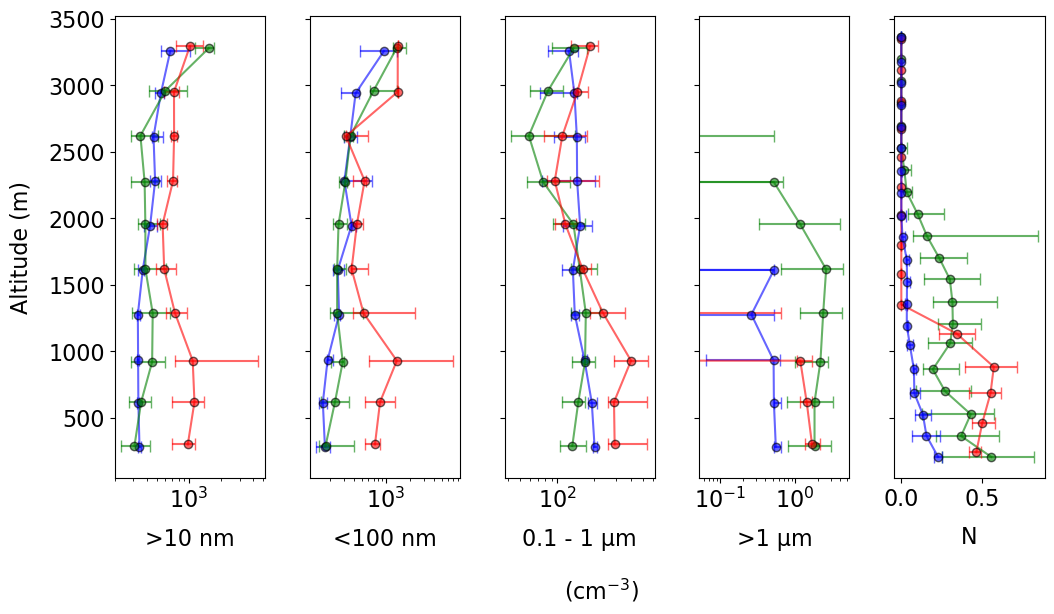

In [235]:
fig, ax = plt.subplots(1, 5, sharey='all', figsize=(12, 6))
#plt.rcParams['font.size'] = '10'
ax[0].errorbar(ocean_transport_plot['CNgt10nm_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['CNgt10nm_ZIEMBA'], ocean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[1].errorbar(ocean_transport_plot['nSMPS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['nSMPS_ZIEMBA'], ocean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '<100nm')
ax[2].errorbar(ocean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '100nm - 1um')
ax[3].errorbar(ocean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>1um')
ax[0].errorbar(Caribbean_transport_plot['CNgt10nm_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['CNgt10nm_ZIEMBA'], Caribbean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '>10nm')
ax[1].errorbar(Caribbean_transport_plot['nSMPS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['nSMPS_ZIEMBA'], Caribbean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '<100nm')
ax[2].errorbar(Caribbean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '100nm - 0.1um')
ax[3].errorbar(Caribbean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '>1um')
ax[0].errorbar(North_America_transport_plot['CNgt10nm_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['CNgt10nm_ZIEMBA'], North_America_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '>10nm')
ax[1].errorbar(North_America_transport_plot['nSMPS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['nSMPS_ZIEMBA'], North_America_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '<100nm')
ax[2].errorbar(North_America_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '100nm - 1um')
ax[3].errorbar(North_America_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '>1um')
ax[4].errorbar(Caribbeann_transport_median['N_FCDP'], Caribbeann_transport_median['GPS_Altitude_THORNHILL'], xerr=[Caribbeann_transport_25['N_FCDP'], Caribbeann_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann')
ax[4].errorbar(North_Americaa_transport_median['N_FCDP'], North_Americaa_transport_median['GPS_Altitude_THORNHILL'], xerr=[North_Americaa_transport_25['N_FCDP'], North_Americaa_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[4].errorbar(ocean_transporttt_median['N_FCDP'], ocean_transporttt_median['GPS_Altitude_THORNHILL'], xerr=[ocean_transporttt_25['N_FCDP'], ocean_transporttt_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'ocean')
ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel('>10 nm', fontsize = 16, labelpad=11)
ax[1].set_xlabel('<100 nm', fontsize = 16, labelpad=11)
ax[2].set_xlabel('0.1 - 1 μm', fontsize = 16, labelpad=11)
ax[3].set_xlabel('>1 μm', fontsize = 16, labelpad=11)
ax[4].set_xlabel('N', fontsize = 16, labelpad=11)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
#labels = ['a)', 'b)', 'c)', 'd)']
#for i in range(4):
    #trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    #ax[i].text(
        #-0.01, 1.05, labels[i],
        #transform=ax[i].transAxes + trans,
        #fontsize='large', verticalalignment='top',
        #bbox=dict(facecolor='1', edgecolor='none', pad=3.0))


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.5, -0.1, '(cm$^{-3}$)', ha='left', va='bottom', fontsize=16)

# Set the title

plt.show()


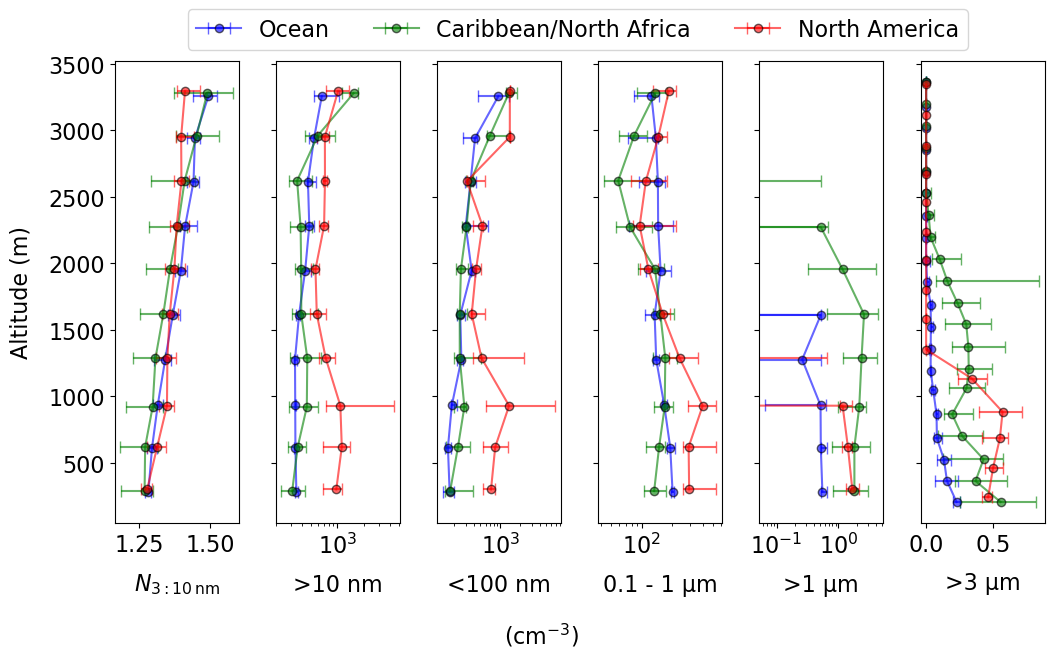

In [236]:
fig, ax = plt.subplots(1, 6, sharey='all', figsize=(12, 6))
#plt.rcParams['font.size'] = '10'
ax[0].errorbar(ocean_transport_plot['3/10'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['3/10'], ocean_transport_plot_75['3/10']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[0].errorbar(Caribbean_transport_plot['3/10'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['3/10'], Caribbean_transport_plot_75['3/10']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann/North Africa')
ax[0].errorbar(North_America_transport_plot['3/10'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['3/10'], North_America_transport_plot_75['3/10']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[1].errorbar(ocean_transport_plot['CNgt10nm_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['CNgt10nm_ZIEMBA'], ocean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[2].errorbar(ocean_transport_plot['nSMPS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['nSMPS_ZIEMBA'], ocean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[3].errorbar(ocean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[4].errorbar(ocean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[ocean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], ocean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[1].errorbar(Caribbean_transport_plot['CNgt10nm_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['CNgt10nm_ZIEMBA'], Caribbean_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann/North Africa')
ax[2].errorbar(Caribbean_transport_plot['nSMPS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['nSMPS_ZIEMBA'], Caribbean_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann/North Africa')
ax[3].errorbar(Caribbean_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann/North Africa')
ax[4].errorbar(Caribbean_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot['GPS_Altitude_THORNHILL'], xerr=[Caribbean_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], Caribbean_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbeann/North Africa')
ax[1].errorbar(North_America_transport_plot['CNgt10nm_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['CNgt10nm_ZIEMBA'], North_America_transport_plot_75['CNgt10nm_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[2].errorbar(North_America_transport_plot['nSMPS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['nSMPS_ZIEMBA'], North_America_transport_plot_75['nSMPS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[3].errorbar(North_America_transport_plot['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_100to1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_100to1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[4].errorbar(North_America_transport_plot['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot['GPS_Altitude_THORNHILL'], xerr=[North_America_transport_plot_25['IntegN_gt1000nm_LAS_ZIEMBA'], North_America_transport_plot_75['IntegN_gt1000nm_LAS_ZIEMBA']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')
ax[5].errorbar(ocean_transporttt_median['N_FCDP'], ocean_transporttt_median['GPS_Altitude_THORNHILL'], xerr=[ocean_transporttt_25['N_FCDP'], ocean_transporttt_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = 'Ocean')
ax[5].errorbar(Caribbeann_transport_median['N_FCDP'], Caribbeann_transport_median['GPS_Altitude_THORNHILL'], xerr=[Caribbeann_transport_25['N_FCDP'], Caribbeann_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = 'Caribbean/North Africa')
ax[5].errorbar(North_Americaa_transport_median['N_FCDP'], North_Americaa_transport_median['GPS_Altitude_THORNHILL'], xerr=[North_Americaa_transport_25['N_FCDP'], North_Americaa_transport_75['N_FCDP']], marker='o', markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = 'North America')

ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel(r'$N_{3:10\,\mathrm{nm}}$', fontsize = 16, labelpad=11)
#ax[0].set_xlabel('N₃:₁₀ nm', fontsize = 16, labelpad=11)
ax[1].set_xlabel('>10 nm', fontsize = 16, labelpad=11)
ax[2].set_xlabel('<100 nm', fontsize = 16, labelpad=11)
ax[3].set_xlabel('0.1 - 1 μm', fontsize = 16, labelpad=11)
ax[4].set_xlabel('>1 μm', fontsize = 16, labelpad=11)
ax[5].set_xlabel('>3 μm', fontsize = 16, labelpad=11)
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[4].set_xscale('log')
#ax[5].legend(bbox_to_anchor=(-6, 1, 4, 4), loc = 3, ncol = 3, fontsize='16')
for ax_ in ax:
    ax_.tick_params(axis='both', which='both', labelsize=16)
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())
#for ax_ in ax:
   # ax_.tick_params(axis='both', which='both', labelsize=16)
'''labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
for i in range(6):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i].text(
        -0.01, 1, labels[i],
        transform=ax[i].transAxes + trans,
        fontsize='large', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=3.0))'''


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
fig.text(0.45, -0.1, '(cm$^{-3}$)', ha='left', va='bottom', fontsize=16)
#plt.tight_layout()
# Set the title

plt.show()


In [237]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent",
    size="pop", size_max=45, log_x=True)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()